<a href="https://hufe09.github.io"><button>Hufe Blog</button></a>
<a id="top"></a>

# 最佳券商股选择

[Tushare](http://tushare.org/trading.html)是一个免费、开源的python财经数据接口包。主要实现对股票等金融数据从数据采集、清洗加工 到 数据存储的过程，能够为金融分析人员提供快速、整洁、和多样的便于分析的数据，为他们在数据获取方面极大地减轻工作量，使他们更加专注于策略和模型的研究与实现上。考虑到Python pandas包在金融量化分析中体现出的优势，Tushare返回的绝大部分的数据格式都是pandas DataFrame类型，非常便于用pandas/NumPy/Matplotlib进行数据分析和可视化。当然，如果您习惯了用Excel或者关系型数据库做分析，您也可以通过Tushare的数据存储功能，将数据全部保存到本地后进行分析。应一些用户的请求，从0.2.5版本开始，Tushare同时兼容Python 2.x和Python 3.x，对部分代码进行了重构，并优化了一些算法，确保数据获取的高效和稳定。

In [1]:
# !pip install tushare

In [2]:
import tushare as ts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns

In [3]:
def get_font(url, file_path):
    import requests
    r = requests.get(url)
    print("Download: " + file_path)
    with open(file_path, "wb") as f:
        f.write(r.content)
        f.close()
    return file_path


url = "https://github.com/hufe09/pydata_practice/raw/master/fonts/msyh.ttf"
file_path = "msyh.ttf"

In [4]:
pd.set_option('display.max_columns', 100)  # 设置显示数据的最大列数，防止出现省略号…，导致数据显示不全
pd.set_option('expand_frame_repr', False)  # 当列太多时不自动换行
%matplotlib inline
font = FontProperties(fname=get_font(url, file_path),
                      size=12)  # 指定文字,用来正常显示中文标签
# font = FontProperties(fname='msyh.ttf', size=12)  # 指定文字,用来正常显示中文标签

sns.set_style('darkgrid')

Download: msyh.ttf


In [5]:
def get_all_securties():
    df_all = ts.get_industry_classified()
    df_finance = df_all[df_all['c_name'] == '金融行业']
    return df_finance[df_finance['name'].str.contains('证')]


all_securties = get_all_securties()
all_securties

code  name c_name
1846  600030  中信证券   金融行业
1848  600109  国金证券   金融行业
1850  600369  西南证券   金融行业
1855  600837  海通证券   金融行业
1856  600958  东方证券   金融行业
1857  600999  招商证券   金融行业
1862  601198  东兴证券   金融行业
1867  601377  兴业证券   金融行业
1869  601555  东吴证券   金融行业
1872  601688  华泰证券   金融行业
1873  601788  光大证券   金融行业
1875  601901  方正证券   金融行业
1882  000562  宏源证券   金融行业
1884  000686  东北证券   金融行业
1886  000728  国元证券   金融行业
1887  000750  国海证券   金融行业
1888  000776  广发证券   金融行业
1889  000783  长江证券   金融行业
1891  002500  山西证券   金融行业
1892  002673  西部证券   金融行业
1893  002736  国信证券   金融行业

In [6]:
all_securties.shape

(21, 3)

通过Tushare 的API拿到的证券股只有21支  

从[散户大家庭](http://www.shdjt.com/flsort.asp?lb=991036)获取更完整的券商股列表

code是数字，默认读取到的是int类型，所以添加converters={'code':str}转换为str

In [7]:
all_securties = pd.read_excel('securties.xlsx', converters={'code':str})
all_securties

code   name c_name
0   601375   中原证券   金融服务
1   601108   财通证券   金融服务
2   002736   国信证券   金融服务
3   600155   华创阳安   金融服务
4   000783   长江证券   金融服务
5   300309   吉艾科技   金融服务
6   600837   海通证券   金融服务
7   600958   东方证券   金融服务
8   000987   越秀金控   金融服务
9   601688   华泰证券   金融服务
10  600864   哈投股份   金融服务
11  601901   方正证券   金融服务
12  000750   国海证券   金融服务
13  601377   兴业证券   金融服务
14  002673   西部证券   金融服务
15  601099    太平洋   金融服务
16  600999   招商证券   金融服务
17  002500   山西证券   金融服务
18  000166   申万宏源   金融服务
19  000728   国元证券   金融服务
20  000776   广发证券   金融服务
21  600030   中信证券   金融服务
22  002926   华西证券   金融服务
23  600695   绿庭投资   金融服务
24  601878   浙商证券   金融服务
25  601198   东兴证券   金融服务
26  600109   国金证券   金融服务
27  002797   第一创业   金融服务
28  601788   光大证券   金融服务
29  600909   华安证券   金融服务
30  600369   西南证券   金融服务
31  601066   中信建投   金融服务
32  601990   南京证券   金融服务
33  000686   东北证券   金融服务
34  601555  XD东吴证   金融服务
35  601162   天风证券   金融服务
36  600061   国投资本   金融服务
37  601211   国泰君安   金融服务
38  000617   中油资本   金融服务
39  000712   锦龙股份   金融服务
40  002670   国盛金控   金融服务
41  601881   中国银河   金融服务
42  600621   华鑫股份   金融服务
43  002939   长城证券   金融服务

# 广发证券数据探索

In [8]:
def set_start_and_end_dates():
    import datetime
    today = datetime.date.today()
    this_month_start = datetime.datetime(today.year, today.month, 1)
    this_month_of_last_year = (
        this_month_start - datetime.timedelta(days=365)).strftime('%Y-%m-%d')
    last_month_end = (this_month_start -
                      datetime.timedelta(days=1)).strftime('%Y-%m-%d')
    return this_month_of_last_year, last_month_end


start_date = set_start_and_end_dates()[0]
end_date = set_start_and_end_dates()[1]
start_date, end_date

('2018-07-01', '2019-06-30')

In [9]:
# 选择000776(广发证券)一年的数据
df_776 = ts.get_hist_data("000776", start=start_date, end=end_date)
#　随机打印１０条
df_776.sample(10)

open   high  close    low     volume  price_change  p_change     ma5    ma10    ma20      v_ma5     v_ma10      v_ma20
date                                                                                                                               
2018-09-28  13.77  13.91  13.85  13.71  141468.52          0.07      0.51  13.766  13.560  13.465  138074.98  103517.27    94155.85
2018-11-22  13.81  13.85  13.50  13.40  303608.47         -0.27     -1.96  13.826  13.401  12.982  468806.19  415721.00   465082.96
2018-11-07  12.94  12.94  12.75  12.70  403839.03         -0.25     -1.92  12.928  12.531  12.247  531528.88  546982.45   526230.26
2019-03-20  16.65  16.99  16.74  16.51  626835.12          0.07      0.42  16.592  16.793  16.835  577682.01  887336.43  1110027.16
2019-05-20  13.15  13.43  13.24  13.05  445198.09         -0.15     -1.12  13.690  13.911  14.871  380168.39  387815.62   436560.27
2019-06-10  12.65  12.65  12.50  12.26  352330.47         -0.17     -1.34  12.726  12.941  13.231  310903.20  356701.08   346287.43
2019-01-08  13.25  13.56  13.28  13.15  222198.95         -0.06     -0.45  12.882  12.674  12.844  366850.43  266821.13   217328.27
2019-01-11  13.28  13.46  13.41  13.19  162109.62          0.19      1.44  13.340  12.958  12.878  276661.40  294091.28   229893.79
2019-01-17  13.75  13.85  13.59  13.51  185143.14         -0.16     -1.16  13.570  13.436  12.976  207590.13  283692.80   239430.46
2018-11-13  12.72  13.35  13.13  12.68  486351.00          0.23      1.78  12.796  12.828  12.312  338720.71  449296.04   551274.06

返回值说明：

- date：日期
- open：开盘价
- high：最高价
- close：收盘价
- low：最低价
- volume：成交量
- price_change：价格变动
- p_change：涨跌幅
- ma5：5日均价
- ma10：10日均价
- ma20:20日均价
- v_ma5:5日均量
- v_ma10:10日均量
- v_ma20:20日均量

In [10]:
df_776.index

Index(['2019-06-28', '2019-06-27', '2019-06-26', '2019-06-25', '2019-06-24',
       '2019-06-21', '2019-06-20', '2019-06-19', '2019-06-18', '2019-06-17',
       ...
       '2018-07-13', '2018-07-12', '2018-07-11', '2018-07-10', '2018-07-09',
       '2018-07-06', '2018-07-05', '2018-07-04', '2018-07-03', '2018-07-02'],
      dtype='object', name='date', length=242)

将index转换为DatetimeIndex

In [11]:
df_776.index = pd.to_datetime(df_776.index)
df_776.index

DatetimeIndex(['2019-06-28', '2019-06-27', '2019-06-26', '2019-06-25',
               '2019-06-24', '2019-06-21', '2019-06-20', '2019-06-19',
               '2019-06-18', '2019-06-17',
               ...
               '2018-07-13', '2018-07-12', '2018-07-11', '2018-07-10',
               '2018-07-09', '2018-07-06', '2018-07-05', '2018-07-04',
               '2018-07-03', '2018-07-02'],
              dtype='datetime64[ns]', name='date', length=242, freq=None)

In [12]:
df_776.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 242 entries, 2019-06-28 to 2018-07-02
Data columns (total 13 columns):
open            242 non-null float64
high            242 non-null float64
close           242 non-null float64
low             242 non-null float64
volume          242 non-null float64
price_change    242 non-null float64
p_change        242 non-null float64
ma5             242 non-null float64
ma10            242 non-null float64
ma20            242 non-null float64
v_ma5           242 non-null float64
v_ma10          242 non-null float64
v_ma20          242 non-null float64
dtypes: float64(13)
memory usage: 26.5 KB


In [13]:
df_776.describe()

open        high       close         low        volume  price_change    p_change         ma5        ma10        ma20         v_ma5        v_ma10        v_ma20
count  242.000000  242.000000  242.000000  242.000000  2.420000e+02    242.000000  242.000000  242.000000  242.000000  242.000000  2.420000e+02  2.420000e+02  2.420000e+02
mean    13.839008   14.067190   13.857107   13.647851  4.079348e+05      0.003595    0.055083   13.852025   13.846624   13.859893  4.063375e+05  4.009339e+05  3.955153e+05
std      1.430819    1.482699    1.425262    1.379863  3.519368e+05      0.343136    2.374670    1.392734    1.358784    1.278358  3.105349e+05  2.897587e+05  2.663443e+05
min     10.730000   11.200000   10.950000   10.610000  5.247819e+04     -1.800000   -9.960000   11.458000   11.725000   12.209000  5.919811e+04  7.398160e+04  8.872394e+04
25%     13.050000   13.220000   13.065000   12.900000  1.663747e+05     -0.147500   -1.077500   13.090500   13.139000   13.151250  1.739338e+05  1.795661e+05  1.896839e+05
50%     13.325000   13.500000   13.370000   13.210000  3.035284e+05     -0.010000   -0.075000   13.354000   13.352000   13.321500  3.171440e+05  3.243132e+05  3.296915e+05
75%     13.935000   14.142500   13.960000   13.800000  5.300575e+05      0.157500    1.085000   13.838000   13.775500   14.052000  5.592717e+05  5.429869e+05  5.136851e+05
max     18.150000   18.680000   18.100000   17.380000  2.209525e+06      1.630000   10.010000   17.390000   17.203000   16.960000  1.630309e+06  1.429831e+06  1.144389e+06

## 观察广发过去一年的涨幅

In [14]:
df_776['p_change'].sum()

13.329999999999998

## 观察广发过去一年的成交量

In [15]:
df_776['volume'].sum() / 1000000

98.72022961000002

广发近一年成交量总数为九千八百万

## 数据可视化

### 折线图

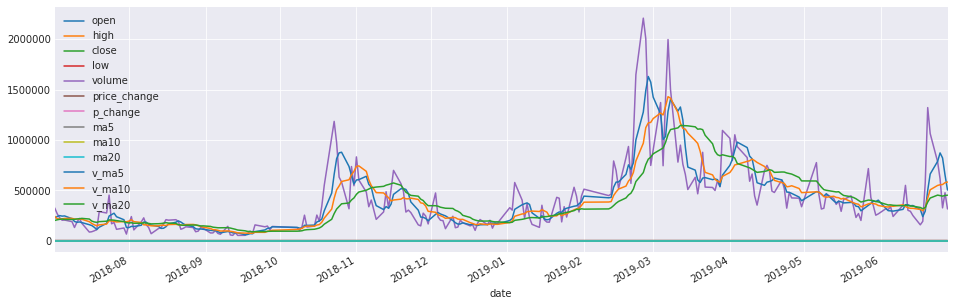

In [16]:
df_776.plot(figsize=[16, 5])

### 给Pandas Plots带来交互性
**Cufflinks**把[plotly](http://www.plot.ly) 的力量和[pandas](http://pandas.pydata.org/)的灵活性结合在一起，便于绘图。

Github地址[santosjorge/cufflinks](https://github.com/santosjorge/cufflinks)

 使用[Plotly and Cufflinks](https://nbviewer.jupyter.org/gist/santosjorge/aba934a0d20023a136c2)实现与[Pandas可视化](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)对等的效果

In [17]:
# !pip install plotly # Plotly是cufflinks依赖包
# !pip install cufflinks

In [18]:
import plotly.offline
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True, theme='ggplot')

In [19]:
df_776.iplot(title='广发证券')

**广发证券烛台图表**

一种描述一段时间内财务数据价格变动的图表。

In [20]:
df_776.iplot(kind='candle', title='广发证券')

In [21]:
help(df_776.iplot)

Help on method _iplot in module cufflinks.plotlytools:

_iplot(kind='scatter', data=None, layout=None, filename='', sharing=None, title='', xTitle='', yTitle='', zTitle='', theme=None, colors=None, colorscale=None, fill=False, width=None, dash='solid', mode='', interpolation='linear', symbol='circle', size=12, barmode='', sortbars=False, bargap=None, bargroupgap=None, bins=None, histnorm='', histfunc='count', orientation='v', boxpoints=False, annotations=None, keys=False, bestfit=False, bestfit_colors=None, mean=False, mean_colors=None, categories='', x='', y='', z='', text='', gridcolor=None, zerolinecolor=None, margin=None, labels=None, values=None, secondary_y='', secondary_y_title='', subplots=False, shape=None, error_x=None, error_y=None, error_type='data', locations=None, lon=None, lat=None, asFrame=False, asDates=False, asFigure=False, asImage=False, dimensions=None, asPlot=False, asUrl=False, online=None, **kwargs) method of pandas.core.frame.DataFrame instance
           Retur

### 不同时间维度的折线图
分别以天，月，季度，年为维度绘图

In [22]:
df_776_month = df_776.resample('M').mean()
df_776_Q = df_776.resample('Q').mean()
df_776_Y = df_776.resample('A-JUL').mean()

In [23]:
# days_xticks = pd.period_range(this_month_of_last_year, last_month_end, periods=30,freq='30D')
days_xticks = pd.period_range(start_date, end_date, freq='60D')
days_xticks = [str(i) for i in days_xticks]
days_xticks

['2018-07-01',
 '2018-08-30',
 '2018-10-29',
 '2018-12-28',
 '2019-02-26',
 '2019-04-27',
 '2019-06-26']

In [24]:
quarter_xticks = pd.period_range(start_date, end_date, freq="Q")
quarter_xticks = [str(i) for i in quarter_xticks]
quarter_xticks

['2018Q3', '2018Q4', '2019Q1', '2019Q2']

In [25]:
year_xticks = pd.period_range(start_date, end_date, freq="A-JUL")
year_xticks = [str(i) for i in year_xticks]
year_xticks

['2018', '2019']

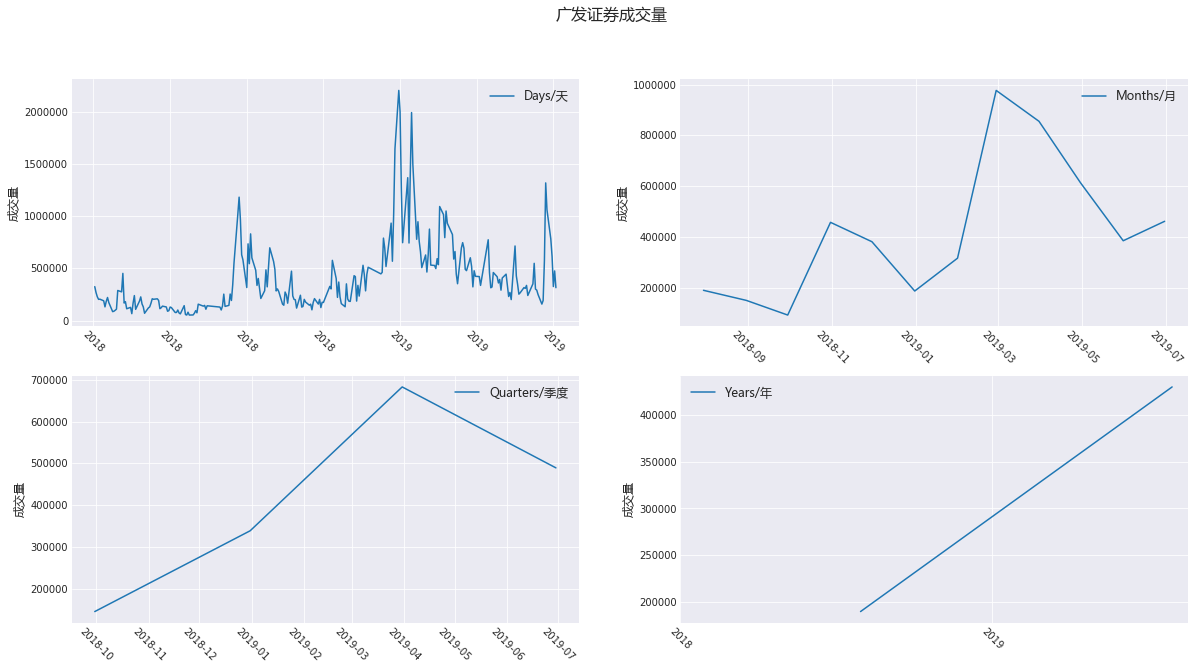

In [26]:
fig = plt.figure(figsize=[20, 10])
plt.suptitle('广发证券成交量', FontProperties=font, fontsize=16)
plt.subplot(221)
plt.plot(df_776.volume, '-', label='Days/天')
plt.xticks(days_xticks, rotation=-45)
plt.ylabel('成交量', FontProperties=font)
plt.legend(prop=font, loc="best")
plt.subplot(222)
plt.plot(df_776_month.volume, '-', label='Months/月')
plt.xticks(rotation=-45)
plt.ylabel('成交量', FontProperties=font)
plt.legend(prop=font, loc="best")
plt.subplot(223)
plt.plot(df_776_Q.volume, '-', label='Quarters/季度')
plt.xticks(rotation=-45)
plt.ylabel('成交量', FontProperties=font)
plt.legend(prop=font, loc="best")
plt.subplot(224)
plt.plot(df_776_Y.volume, '-', label='Years/年')
plt.xticks(year_xticks, rotation=-45)
plt.ylabel('成交量', FontProperties=font)
plt.legend(prop=font, loc="best")
plt.show()

### 箱线图

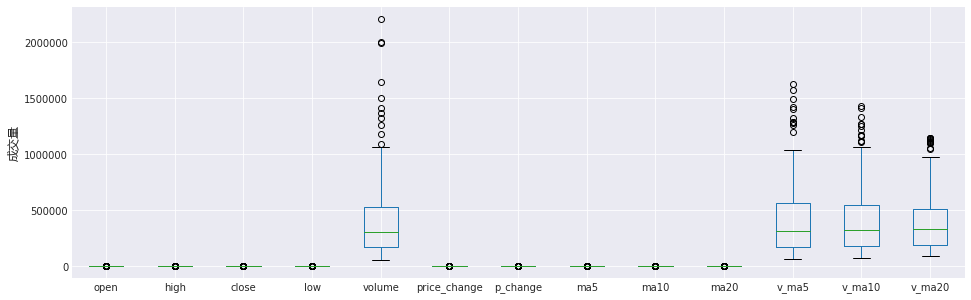

In [27]:
df_776.boxplot(figsize=[16, 5])
plt.ylabel('成交量', FontProperties=font)
plt.show()

以月为单位，绘制成交量`volumns`,涨幅`p_change`箱线图。

将现在的数据按月为单位分组。

>Q:如何判断Timestamp('2019-06-01 00:00:00') 属于'2019-06'

- Python原生办法

In [28]:
date_Ym = sorted(
    set(
        df_776.index.map(lambda x: str(x.year) + "-" + str(x.month).rjust(
            2, '0'))))
print(date_Ym)

['2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06']


In [29]:
datas_py = []
for t in date_Ym:
    month = []
    for i in df_776['volume'].index:
        if i.strftime('%Y-%m') == t:
            # 将单位转换为百万
            month.append(df_776['volume'][i] / 1000000)
    datas_py.append(month)

In [30]:
sum([len(i) for i in datas_py]), df_776.shape

(242, (242, 13))

- Pandas会非常方便  
`df['2019-07']`

In [31]:
months_of_past_year = pd.period_range(start_date, end_date, freq="M")
months_of_past_year = list(months_of_past_year.strftime('%Y-%m'))
months_of_past_year

['2018-07',
 '2018-08',
 '2018-09',
 '2018-10',
 '2018-11',
 '2018-12',
 '2019-01',
 '2019-02',
 '2019-03',
 '2019-04',
 '2019-05',
 '2019-06']

In [32]:
datas_pd = []
for month in months_of_past_year:
    # 将单位转换为百万
    datas_pd.append(df_776[month]['volume'].values / 1000000)
datas_pd[:2]

[array([0.06577248, 0.1262319 , 0.11296996, 0.18083352, 0.16775911,
        0.45269384, 0.27521725, 0.28854103, 0.10929952, 0.09841938,
        0.08912714, 0.0854211 , 0.1723872 , 0.22116741, 0.18445516,
        0.13106657, 0.18938977, 0.20500872, 0.20320244, 0.22773822,
        0.26829919, 0.32529656]),
 array([0.1239274 , 0.12941125, 0.09484718, 0.08906327, 0.13034072,
        0.13807438, 0.12265313, 0.11365363, 0.19247892, 0.2085322 ,
        0.20383836, 0.20890292, 0.16552795, 0.13066067, 0.12129968,
        0.06957352, 0.13032786, 0.15911244, 0.22680181, 0.18636731,
        0.10727201, 0.23939266, 0.16645873])]

In [33]:
df_776.shape, sum([len(i) for i in datas_py]), sum([len(i) for i in datas_pd])

((242, 13), 242, 242)

In [34]:
df_datas_pd = pd.DataFrame(datas_pd, index=pd.to_datetime(date_Ym))
df_datas_pd.head()

0         1         2         3         4         5         6         7         8         9         10        11        12        13        14        15        16        17        18        19        20        21        22
2018-07-01  0.065772  0.126232  0.112970  0.180834  0.167759  0.452694  0.275217  0.288541  0.109300  0.098419  0.089127  0.085421  0.172387  0.221167  0.184455  0.131067  0.189390  0.205009  0.203202  0.227738  0.268299  0.325297       NaN
2018-08-01  0.123927  0.129411  0.094847  0.089063  0.130341  0.138074  0.122653  0.113654  0.192479  0.208532  0.203838  0.208903  0.165528  0.130661  0.121300  0.069574  0.130328  0.159112  0.226802  0.186367  0.107272  0.239393  0.166459
2018-09-01  0.141469  0.108512  0.145341  0.138032  0.157021  0.073949  0.094868  0.070052  0.053450  0.052478  0.079827  0.052733  0.057503  0.142796  0.063839  0.072270  0.100707  0.077539  0.076803       NaN       NaN       NaN       NaN
2018-10-01  0.545551  0.736310  0.316984  0.582290  0.631045  0.972374  1.184543  1.021385  0.551592  0.343358  0.192640  0.254433  0.145337  0.135671  0.253448  0.139442  0.101318  0.129169       NaN       NaN       NaN       NaN       NaN
2018-11-01  0.166347  0.245387  0.273532  0.147055  0.157603  0.279164  0.303608  0.284235  0.491666  0.566349  0.698172  0.505923  0.323161  0.486351  0.286007  0.211736  0.305670  0.403839  0.337248  0.482865  0.601740  0.831952       NaN

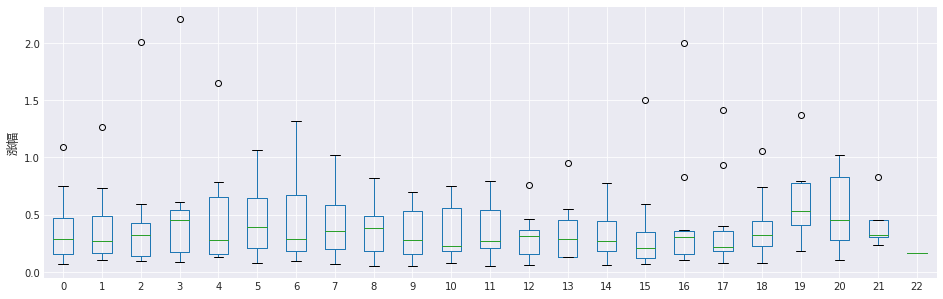

In [35]:
df_datas_pd.boxplot(figsize=[16, 5])
plt.ylabel('涨幅', FontProperties=font)
plt.show()

观察数据可以发现，我们获取到的数据有大量缺失，并不是每一天都有对应的值，所以接下来我们需要给每一天都补充数据进去，缺失的用当月已有数据的平均值填充。

## 深度清洗

### 生成过去一年的日期序列

In [36]:
days_of_past_year = pd.period_range(start_date, end_date)
days_of_past_year

PeriodIndex(['2018-07-01', '2018-07-02', '2018-07-03', '2018-07-04',
             '2018-07-05', '2018-07-06', '2018-07-07', '2018-07-08',
             '2018-07-09', '2018-07-10',
             ...
             '2019-06-21', '2019-06-22', '2019-06-23', '2019-06-24',
             '2019-06-25', '2019-06-26', '2019-06-27', '2019-06-28',
             '2019-06-29', '2019-06-30'],
            dtype='period[D]', length=365, freq='D')

In [37]:
print(df_776.keys() == df_776.columns)
df_776.keys()

[ True  True  True  True  True  True  True  True  True  True  True  True
  True]


Index(['open', 'high', 'close', 'low', 'volume', 'price_change', 'p_change',
       'ma5', 'ma10', 'ma20', 'v_ma5', 'v_ma10', 'v_ma20'],
      dtype='object')

### 生成与天序列共同长度的数组，作为接下来数据的index

In [38]:
zeros_arr = np.zeros((len(days_of_past_year)))
zeros_arr

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [39]:
df_776_1 = pd.DataFrame(zeros_arr, index=days_of_past_year)
df_776_1.index = df_776_1.index.to_timestamp()
df_776_1.sample(10)

0
2019-04-13  0.0
2019-04-29  0.0
2019-01-01  0.0
2019-01-12  0.0
2019-03-03  0.0
2018-08-16  0.0
2018-09-19  0.0
2018-07-05  0.0
2018-11-27  0.0
2019-05-17  0.0

In [40]:
df_776_1.index, df_776.index

(DatetimeIndex(['2018-07-01', '2018-07-02', '2018-07-03', '2018-07-04',
                '2018-07-05', '2018-07-06', '2018-07-07', '2018-07-08',
                '2018-07-09', '2018-07-10',
                ...
                '2019-06-21', '2019-06-22', '2019-06-23', '2019-06-24',
                '2019-06-25', '2019-06-26', '2019-06-27', '2019-06-28',
                '2019-06-29', '2019-06-30'],
               dtype='datetime64[ns]', length=365, freq='D'),
 DatetimeIndex(['2019-06-28', '2019-06-27', '2019-06-26', '2019-06-25',
                '2019-06-24', '2019-06-21', '2019-06-20', '2019-06-19',
                '2019-06-18', '2019-06-17',
                ...
                '2018-07-13', '2018-07-12', '2018-07-11', '2018-07-10',
                '2018-07-09', '2018-07-06', '2018-07-05', '2018-07-04',
                '2018-07-03', '2018-07-02'],
               dtype='datetime64[ns]', name='date', length=242, freq=None))

### 合并数据集
有一下这几种方式
- DataFrame.merge()  
默认合并方法是连接键相交，可以使用外连接来合并。
- DataFrame.concat()
- DataFrame_left.join(DataFrame_right)
- DataFrame_left.combine_first(DataFrame_right)

In [41]:
df_merge = df_776_1.join(df_776, how='outer')
df_merge.head()

0   open   high  close    low     volume  price_change  p_change     ma5    ma10    ma20      v_ma5     v_ma10     v_ma20
2018-07-01  0.0    NaN    NaN    NaN    NaN        NaN           NaN       NaN     NaN     NaN     NaN        NaN        NaN        NaN
2018-07-02  0.0  13.26  13.26  13.25  12.90  325296.56         -0.02     -0.15  13.138  13.218  13.678  224538.60  241317.88  200789.11
2018-07-03  0.0  13.12  13.39  13.34  13.02  268299.19          0.09      0.68  13.196  13.177  13.635  239998.68  219023.56  207395.36
2018-07-04  0.0  13.28  13.32  13.28  13.07  227738.22         -0.06     -0.45  13.238  13.160  13.584  249116.58  214612.31  212227.74
2018-07-05  0.0  13.21  13.35  13.18  13.11  203202.44         -0.10     -0.75  13.264  13.168  13.530  243917.61  215883.21  215031.83

In [42]:
df_merge = pd.concat([df_776_1, df_776], axis=1)
df_merge.head()

0   open   high  close    low     volume  price_change  p_change     ma5    ma10    ma20      v_ma5     v_ma10     v_ma20
2018-07-01  0.0    NaN    NaN    NaN    NaN        NaN           NaN       NaN     NaN     NaN     NaN        NaN        NaN        NaN
2018-07-02  0.0  13.26  13.26  13.25  12.90  325296.56         -0.02     -0.15  13.138  13.218  13.678  224538.60  241317.88  200789.11
2018-07-03  0.0  13.12  13.39  13.34  13.02  268299.19          0.09      0.68  13.196  13.177  13.635  239998.68  219023.56  207395.36
2018-07-04  0.0  13.28  13.32  13.28  13.07  227738.22         -0.06     -0.45  13.238  13.160  13.584  249116.58  214612.31  212227.74
2018-07-05  0.0  13.21  13.35  13.18  13.11  203202.44         -0.10     -0.75  13.264  13.168  13.530  243917.61  215883.21  215031.83

In [43]:
df_merge = df_776_1.combine_first(df_776)
df_merge.head()

0  close   high    low    ma10    ma20     ma5   open  p_change  price_change     v_ma10     v_ma20      v_ma5     volume
2018-07-01  0.0    NaN    NaN    NaN     NaN     NaN     NaN    NaN       NaN           NaN        NaN        NaN        NaN        NaN
2018-07-02  0.0  13.25  13.26  12.90  13.218  13.678  13.138  13.26     -0.15         -0.02  241317.88  200789.11  224538.60  325296.56
2018-07-03  0.0  13.34  13.39  13.02  13.177  13.635  13.196  13.12      0.68          0.09  219023.56  207395.36  239998.68  268299.19
2018-07-04  0.0  13.28  13.32  13.07  13.160  13.584  13.238  13.28     -0.45         -0.06  214612.31  212227.74  249116.58  227738.22
2018-07-05  0.0  13.18  13.35  13.11  13.168  13.530  13.264  13.21     -0.75         -0.10  215883.21  215031.83  243917.61  203202.44

In [44]:
df_merge = pd.merge(df_776_1,
                    df_776,
                    left_index=True,
                    right_index=True,
                    how='outer')
df_merge.head()

0   open   high  close    low     volume  price_change  p_change     ma5    ma10    ma20      v_ma5     v_ma10     v_ma20
2018-07-01  0.0    NaN    NaN    NaN    NaN        NaN           NaN       NaN     NaN     NaN     NaN        NaN        NaN        NaN
2018-07-02  0.0  13.26  13.26  13.25  12.90  325296.56         -0.02     -0.15  13.138  13.218  13.678  224538.60  241317.88  200789.11
2018-07-03  0.0  13.12  13.39  13.34  13.02  268299.19          0.09      0.68  13.196  13.177  13.635  239998.68  219023.56  207395.36
2018-07-04  0.0  13.28  13.32  13.28  13.07  227738.22         -0.06     -0.45  13.238  13.160  13.584  249116.58  214612.31  212227.74
2018-07-05  0.0  13.21  13.35  13.18  13.11  203202.44         -0.10     -0.75  13.264  13.168  13.530  243917.61  215883.21  215031.83

### 空值填充
如果其中某一天数据为空，则用当月的平均值代替  
先在`df_merge` DataFrame中添加两列

In [45]:
df_merge['month'] = df_merge.index.strftime('%Y-%m')
df_merge['days'] = df_merge.index.strftime('%Y-%m-%d')
df_merge.drop([0], axis='columns', inplace=True)
df_merge.sample(10)

open   high  close    low     volume  price_change  p_change     ma5    ma10    ma20      v_ma5     v_ma10      v_ma20    month        days
2018-11-07  12.94  12.94  12.75  12.70  403839.03         -0.25     -1.92  12.928  12.531  12.247  531528.88  546982.45   526230.26  2018-11  2018-11-07
2018-09-16    NaN    NaN    NaN    NaN        NaN           NaN       NaN     NaN     NaN     NaN        NaN        NaN         NaN  2018-09  2018-09-16
2018-07-26  13.63  13.68  13.52  13.43  180833.52         -0.05     -0.37  13.468  13.247  13.244  273008.95  191969.91   203518.74  2018-07  2018-07-26
2018-10-09  13.52  13.57  13.57  13.45  101318.24         -0.02     -0.15  13.718  13.620  13.474  125161.73  115973.09    95643.68  2018-10  2018-10-09
2019-01-30  12.70  12.84  12.57  12.56  284849.25         -0.18     -1.41  12.974  13.195  13.253  365987.03  323754.72   309639.02  2019-01  2019-01-30
2019-03-22  16.88  16.94  16.73  16.50  532139.38         -0.18     -1.06  16.770  16.717  16.960  626352.62  678573.67  1046808.11  2019-03  2019-03-22
2019-04-16  15.86  16.60  16.56  15.82  747761.25          0.51      3.18  16.180  16.387  16.299  581173.06  710309.82   693725.60  2019-04  2019-04-16
2019-05-02    NaN    NaN    NaN    NaN        NaN           NaN       NaN     NaN     NaN     NaN        NaN        NaN         NaN  2019-05  2019-05-02
2019-02-18  13.91  14.61  14.56  13.86  823827.94          0.80      5.81  13.874  13.362  13.388  658471.60  542234.41   424567.25  2019-02  2019-02-18
2019-04-12  15.98  16.16  16.01  15.86  353310.69          0.03      0.19  16.244  16.381  16.332  575471.02  777055.97   678388.75  2019-04  2019-04-12

In [46]:
df_merge.isnull().sum()

open            123
high            123
close           123
low             123
volume          123
price_change    123
p_change        123
ma5             123
ma10            123
ma20            123
v_ma5           123
v_ma10          123
v_ma20          123
month             0
days              0
dtype: int64

In [47]:
df_merge.notnull().head()

open   high  close    low  volume  price_change  p_change    ma5   ma10   ma20  v_ma5  v_ma10  v_ma20  month  days
2018-07-01  False  False  False  False   False         False     False  False  False  False  False   False   False   True  True
2018-07-02   True   True   True   True    True          True      True   True   True   True   True    True    True   True  True
2018-07-03   True   True   True   True    True          True      True   True   True   True   True    True    True   True  True
2018-07-04   True   True   True   True    True          True      True   True   True   True   True    True    True   True  True
2018-07-05   True   True   True   True    True          True      True   True   True   True   True    True    True   True  True

In [48]:
# 平均值代替NaN
for column in df_776.columns:
    for month in months_of_past_year:
        df_merge[column][month].fillna(df_merge[column][month].mean(),
                                       inplace=True)

In [49]:
def month_column(datas, column, dates):
    column_arr = []
    for date in dates:
        column_arr.append(datas[date][column].values)
    df_column = pd.DataFrame(column_arr, index=dates)
    return df_column

成交量

In [50]:
df_volume_776 = month_column(df_merge, 'volume', months_of_past_year)
df_volume_776 = df_volume_776 / 1000000  # 将单位转换为百万
df_volume_776

0         1         2         3         4         5         6         7         8         9         10        11        12        13        14        15        16        17        18        19        20        21        22        23        24        25        26        27        28        29        30
2018-07  0.190014  0.325297  0.268299  0.227738  0.203202  0.205009  0.190014  0.190014  0.189390  0.131067  0.184455  0.221167  0.172387  0.190014  0.190014  0.085421  0.089127  0.098419  0.109300  0.288541  0.190014  0.190014  0.275217  0.452694  0.167759  0.180834  0.112970  0.190014  0.190014  0.126232  0.065772
2018-08  0.166459  0.239393  0.107272  0.150370  0.150370  0.186367  0.226802  0.159112  0.130328  0.069574  0.150370  0.150370  0.121300  0.130661  0.165528  0.208903  0.203838  0.150370  0.150370  0.208532  0.192479  0.113654  0.122653  0.138074  0.150370  0.150370  0.130341  0.089063  0.094847  0.129411  0.123927
2018-09  0.092589  0.092589  0.076803  0.077539  0.100707  0.072270  0.063839  0.092589  0.092589  0.142796  0.057503  0.052733  0.079827  0.052478  0.092589  0.092589  0.053450  0.070052  0.094868  0.073949  0.157021  0.092589  0.092589  0.092589  0.138032  0.145341  0.108512  0.141469  0.092589  0.092589       NaN
2018-10  0.457605  0.457605  0.457605  0.457605  0.457605  0.457605  0.457605  0.129169  0.101318  0.139442  0.253448  0.135671  0.457605  0.457605  0.145337  0.254433  0.192640  0.343358  0.551592  0.457605  0.457605  1.021385  1.184543  0.972374  0.631045  0.582290  0.457605  0.457605  0.316984  0.736310  0.545551
2018-11  0.831952  0.601740  0.381346  0.381346  0.482865  0.337248  0.403839  0.305670  0.211736  0.381346  0.381346  0.286007  0.486351  0.323161  0.505923  0.698172  0.381346  0.381346  0.566349  0.491666  0.284235  0.303608  0.279164  0.381346  0.381346  0.157603  0.147055  0.273532  0.245387  0.166347       NaN
2018-12  0.187195  0.187195  0.473916  0.236174  0.202913  0.199160  0.119421  0.187195  0.187195  0.242726  0.129030  0.134991  0.203200  0.177713  0.187195  0.187195  0.147117  0.157078  0.102634  0.173571  0.210295  0.187195  0.187195  0.158107  0.202914  0.124334  0.175362  0.173242  0.187195  0.187195  0.187195
2019-01  0.316544  0.327774  0.303448  0.577780  0.316544  0.316544  0.403051  0.222199  0.369604  0.226343  0.162110  0.316544  0.316544  0.132214  0.351999  0.206485  0.185143  0.183608  0.316544  0.316544  0.430705  0.421540  0.186616  0.337738  0.234634  0.316544  0.316544  0.530532  0.442181  0.284849  0.443424
2019-02  0.511569  0.977017  0.977017  0.977017  0.977017  0.977017  0.977017  0.977017  0.977017  0.977017  0.447963  0.462528  0.791398  0.696016  0.518588  0.977017  0.977017  0.823828  0.935289  0.569216  1.025975  1.648369  0.977017  0.977017  2.209525  2.005903  1.261771  0.747308       NaN       NaN       NaN
2019-03  0.901926  0.855416  0.855416  1.371518  0.744225  1.410657  1.997111  1.500480  0.855416  0.855416  0.780090  0.948593  0.758680  0.658521  0.508089  0.855416  0.855416  0.629488  0.465477  0.626835  0.877824  0.532139  0.855416  0.855416  0.528632  0.498693  0.593647  0.536390  1.094718  0.855416  0.855416
2019-04  1.017057  0.795894  1.051713  0.933821  0.613901  0.613901  0.613901  0.825606  0.590198  0.662436  0.445804  0.353311  0.613901  0.613901  0.696553  0.747761  0.694178  0.492588  0.478756  0.613901  0.613901  0.602675  0.519168  0.323086  0.477597  0.424620  0.613901  0.613901  0.422007  0.337096       NaN
2019-05  0.385181  0.385181  0.385181  0.385181  0.385181  0.775456  0.459380  0.314384  0.322199  0.460974  0.385181  0.385181  0.420377  0.360824  0.394594  0.291609  0.408617  0.385181  0.385181  0.445198  0.336156  0.230755  0.269601  0.201008  0.385181  0.385181  0.715793  0.428903  0.348440  0.253213  0.266146
2019-06  0.461753  0.461753  0.316225  0.308378  0.337149  0.240434  0.461753  0.461753  0.461753  0.352330  0.549232  0.301999  0.291822  0.249998  0.461753  0.461753  0.157704  0.192329  0.575719  

涨幅

In [51]:
df_p_change_776 = month_column(df_merge, 'p_change', months_of_past_year)
df_p_change_776

0         1         2         3         4         5         6         7         8         9         10        11        12        13        14        15        16        17        18        19        20        21        22        23         24        25        26        27        28        29        30
2018-07  0.047273 -0.150000  0.680000 -0.450000 -0.750000 -0.380000  0.047273  0.047273  1.370000  0.000000 -1.950000  1.760000 -1.050000  0.047273  0.047273 -0.380000 -0.460000 -0.840000  0.230000  2.320000  0.047273  0.047273  0.910000  1.950000  -0.440000 -0.370000 -0.440000  0.047273  0.047273 -0.450000 -0.070000
2018-08 -1.050000 -1.890000 -0.460000  0.171739  0.171739 -1.080000  3.440000 -0.530000  1.290000 -0.230000  0.171739  0.171739 -0.070000 -0.150000 -0.080000  2.100000  0.380000  0.171739  0.171739  1.520000 -0.220000  0.300000  0.220000  1.190000   0.171739  0.171739  0.440000 -0.660000 -0.070000 -0.440000  0.000000
2018-09  0.140526  0.140526  0.000000  0.000000 -0.370000 -0.300000  0.000000  0.140526  0.140526 -0.750000 -0.680000 -0.380000  1.140000  0.000000  0.140526  0.140526 -0.450000  0.680000  0.450000  0.520000  1.710000  0.140526  0.140526  0.140526   0.000000  0.730000 -0.140000  0.510000  0.140526  0.140526       NaN
2018-10 -0.546667 -0.546667 -0.546667 -0.546667 -0.546667 -0.546667 -0.546667 -1.880000 -0.150000  0.070000 -3.020000 -2.960000 -0.546667 -0.546667 -3.370000 -5.910000 -0.690000 -5.110000  0.820000 -0.546667 -0.546667  9.960000 -1.400000  0.750000   1.820000 -3.180000 -0.546667 -0.546667 -1.090000  4.850000  0.650000
2018-11  2.340000  3.940000  0.402727  0.402727 -1.590000  0.080000 -1.920000 -1.180000  0.000000  0.402727  0.402727  2.380000  1.780000 -1.520000  3.020000  4.200000  0.402727  0.402727  2.950000 -4.200000  0.580000 -1.960000 -2.150000  0.402727   0.402727 -0.230000 -0.530000  2.750000 -2.000000  2.120000       NaN
2018-12 -0.292000 -0.292000  2.750000  0.940000 -1.360000 -2.900000  0.150000 -0.292000 -0.292000 -2.830000  0.920000  0.530000  1.140000 -2.540000 -0.292000 -0.292000  0.840000 -1.520000 -0.620000 -0.230000 -2.100000 -0.292000 -0.292000 -0.480000  -0.480000 -1.120000  0.890000  2.180000 -0.292000 -0.292000 -0.292000
2019-01  0.029091 -3.470000  0.730000  7.220000  0.029091  0.029091  0.910000 -0.450000  1.280000 -1.710000  1.440000  0.029091  0.029091 -0.450000  3.000000  0.000000 -1.160000  1.620000  0.029091  0.029091 -2.390000 -2.820000  0.000000  1.680000  -0.230000  0.029091  0.029091 -2.630000 -1.470000 -1.410000  0.950000
2019-02  2.210000  1.834000  1.834000  1.834000  1.834000  1.834000  1.834000  1.834000  1.834000  1.834000  2.310000  0.230000  3.680000  1.230000 -1.430000  1.834000  1.834000  5.810000  1.100000  0.880000  0.000000  9.630000  1.834000  1.834000  10.010000 -3.020000 -2.070000 -3.060000       NaN       NaN       NaN
2019-03  2.490000 -0.038095 -0.038095  0.950000  0.060000  4.390000  1.570000 -9.950000 -0.038095 -0.038095  3.010000  1.310000 -1.410000 -2.980000  1.290000 -0.038095 -0.038095  1.940000 -0.770000  0.420000  1.020000 -1.060000 -0.038095 -0.038095  -3.410000 -3.090000 -1.150000 -1.810000  6.380000 -0.038095 -0.038095
2019-04  1.300000 -0.490000  3.130000  0.710000 -0.168571 -0.168571 -0.168571 -2.360000 -0.790000 -0.610000 -1.960000  0.190000 -0.168571 -0.168571  0.250000  3.180000  0.720000 -1.260000  1.460000 -0.168571 -0.168571 -2.930000 -0.250000  0.310000  -2.770000 -0.190000 -0.168571 -0.168571 -2.220000  1.040000       NaN
2019-05 -0.870000 -0.870000 -0.870000 -0.870000 -0.870000 -9.960000  1.360000 -1.060000 -0.640000  3.510000 -0.870000 -0.870000 -3.110000 -1.070000  0.940000  0.070000 -4.290000 -0.870000 -0.870000 -1.120000  0.830000 -1.120000 -0.610000 -0.230000  -0.870000 -0.870000  1.530000  0.070000 -1.050000 -0.760000 -0.690000
2019-06  0.320000  0.320000 -0.310000 -1.470000  0.390000 -0.940000  0.320000  0.320000  0.320000 -1.340000  4.640000 -1.070000  0.390000 -2.000000  0.320000  0.320000  0.550000 -0.550000

### Python原生方法清洗数据

以月为单位，生成每月每天对应的序列。如果其中某一天数据为空，则用当月的平均值代替

In [52]:
#coding = utf-8
def days_of_month(month, start=1):
    from datetime import date, timedelta
    import pandas as pd
    CURRENTMONTH = month
    year = CURRENTMONTH[0:4]
    month = CURRENTMONTH[5:7]
    traverseDay = date(int(year), int(month), start)
    intMonth = int(CURRENTMONTH[5:7])
    days = []
    while True:
        if intMonth == traverseDay.month:
            days.append(pd.to_datetime(traverseDay.strftime('%Y-%m-%d')))
            traverseDay = traverseDay + timedelta(days=1)
        else:
            break
    return days


days_of_month('2019-02')

[Timestamp('2019-02-01 00:00:00'),
 Timestamp('2019-02-02 00:00:00'),
 Timestamp('2019-02-03 00:00:00'),
 Timestamp('2019-02-04 00:00:00'),
 Timestamp('2019-02-05 00:00:00'),
 Timestamp('2019-02-06 00:00:00'),
 Timestamp('2019-02-07 00:00:00'),
 Timestamp('2019-02-08 00:00:00'),
 Timestamp('2019-02-09 00:00:00'),
 Timestamp('2019-02-10 00:00:00'),
 Timestamp('2019-02-11 00:00:00'),
 Timestamp('2019-02-12 00:00:00'),
 Timestamp('2019-02-13 00:00:00'),
 Timestamp('2019-02-14 00:00:00'),
 Timestamp('2019-02-15 00:00:00'),
 Timestamp('2019-02-16 00:00:00'),
 Timestamp('2019-02-17 00:00:00'),
 Timestamp('2019-02-18 00:00:00'),
 Timestamp('2019-02-19 00:00:00'),
 Timestamp('2019-02-20 00:00:00'),
 Timestamp('2019-02-21 00:00:00'),
 Timestamp('2019-02-22 00:00:00'),
 Timestamp('2019-02-23 00:00:00'),
 Timestamp('2019-02-24 00:00:00'),
 Timestamp('2019-02-25 00:00:00'),
 Timestamp('2019-02-26 00:00:00'),
 Timestamp('2019-02-27 00:00:00'),
 Timestamp('2019-02-28 00:00:00')]

In [53]:
def clean_days_volume(days):
    days_values = []
    for i in days:
        t = i.strftime('%Y-%m-%d')
        m = i.strftime('%Y-%m')
        value = (df_776[t]['volume'].values[0] /
                 1000000) if df_776[t]['volume'].values.size > 0 else (
                     df_776[m]['volume'].mean() / 1000000)
        days_values.append(value)
    return days_values

In [54]:
volume_776_1 = []
for t in months_of_past_year:
    days = days_of_month(t)
    volume_776_1.append(clean_days_volume(days))

In [55]:
df_volume_776_1 = pd.DataFrame(volume_776_1, index=months_of_past_year)
# df_volume_776_1.columns = months_of_past_year
df_volume_776_1

0         1         2         3         4         5         6         7         8         9         10        11        12        13        14        15        16        17        18        19        20        21        22        23        24        25        26        27        28        29        30
2018-07  0.190014  0.325297  0.268299  0.227738  0.203202  0.205009  0.190014  0.190014  0.189390  0.131067  0.184455  0.221167  0.172387  0.190014  0.190014  0.085421  0.089127  0.098419  0.109300  0.288541  0.190014  0.190014  0.275217  0.452694  0.167759  0.180834  0.112970  0.190014  0.190014  0.126232  0.065772
2018-08  0.166459  0.239393  0.107272  0.150370  0.150370  0.186367  0.226802  0.159112  0.130328  0.069574  0.150370  0.150370  0.121300  0.130661  0.165528  0.208903  0.203838  0.150370  0.150370  0.208532  0.192479  0.113654  0.122653  0.138074  0.150370  0.150370  0.130341  0.089063  0.094847  0.129411  0.123927
2018-09  0.092589  0.092589  0.076803  0.077539  0.100707  0.072270  0.063839  0.092589  0.092589  0.142796  0.057503  0.052733  0.079827  0.052478  0.092589  0.092589  0.053450  0.070052  0.094868  0.073949  0.157021  0.092589  0.092589  0.092589  0.138032  0.145341  0.108512  0.141469  0.092589  0.092589       NaN
2018-10  0.457605  0.457605  0.457605  0.457605  0.457605  0.457605  0.457605  0.129169  0.101318  0.139442  0.253448  0.135671  0.457605  0.457605  0.145337  0.254433  0.192640  0.343358  0.551592  0.457605  0.457605  1.021385  1.184543  0.972374  0.631045  0.582290  0.457605  0.457605  0.316984  0.736310  0.545551
2018-11  0.831952  0.601740  0.381346  0.381346  0.482865  0.337248  0.403839  0.305670  0.211736  0.381346  0.381346  0.286007  0.486351  0.323161  0.505923  0.698172  0.381346  0.381346  0.566349  0.491666  0.284235  0.303608  0.279164  0.381346  0.381346  0.157603  0.147055  0.273532  0.245387  0.166347       NaN
2018-12  0.187195  0.187195  0.473916  0.236174  0.202913  0.199160  0.119421  0.187195  0.187195  0.242726  0.129030  0.134991  0.203200  0.177713  0.187195  0.187195  0.147117  0.157078  0.102634  0.173571  0.210295  0.187195  0.187195  0.158107  0.202914  0.124334  0.175362  0.173242  0.187195  0.187195  0.187195
2019-01  0.316544  0.327774  0.303448  0.577780  0.316544  0.316544  0.403051  0.222199  0.369604  0.226343  0.162110  0.316544  0.316544  0.132214  0.351999  0.206485  0.185143  0.183608  0.316544  0.316544  0.430705  0.421540  0.186616  0.337738  0.234634  0.316544  0.316544  0.530532  0.442181  0.284849  0.443424
2019-02  0.511569  0.977017  0.977017  0.977017  0.977017  0.977017  0.977017  0.977017  0.977017  0.977017  0.447963  0.462528  0.791398  0.696016  0.518588  0.977017  0.977017  0.823828  0.935289  0.569216  1.025975  1.648369  0.977017  0.977017  2.209525  2.005903  1.261771  0.747308       NaN       NaN       NaN
2019-03  0.901926  0.855416  0.855416  1.371518  0.744225  1.410657  1.997111  1.500480  0.855416  0.855416  0.780090  0.948593  0.758680  0.658521  0.508089  0.855416  0.855416  0.629488  0.465477  0.626835  0.877824  0.532139  0.855416  0.855416  0.528632  0.498693  0.593647  0.536390  1.094718  0.855416  0.855416
2019-04  1.017057  0.795894  1.051713  0.933821  0.613901  0.613901  0.613901  0.825606  0.590198  0.662436  0.445804  0.353311  0.613901  0.613901  0.696553  0.747761  0.694178  0.492588  0.478756  0.613901  0.613901  0.602675  0.519168  0.323086  0.477597  0.424620  0.613901  0.613901  0.422007  0.337096       NaN
2019-05  0.385181  0.385181  0.385181  0.385181  0.385181  0.775456  0.459380  0.314384  0.322199  0.460974  0.385181  0.385181  0.420377  0.360824  0.394594  0.291609  0.408617  0.385181  0.385181  0.445198  0.336156  0.230755  0.269601  0.201008  0.385181  0.385181  0.715793  0.428903  0.348440  0.253213  0.266146
2019-06  0.461753  0.461753  0.316225  0.308378  0.337149  0.240434  0.461753  0.461753  0.461753  0.352330  0.549232  0.301999  0.291822  0.249998  0.461753  0.461753  0.157704  0.192329  0.575719  

对比下pandas方法清洗的数据与Python写法清洗的数据

In [56]:
df_volume_776 == df_volume_776_1

0      1      2      3      4      5      6      7      8      9      10    11     12     13     14     15     16     17    18     19     20     21     22     23     24    25     26     27     28     29     30
2018-07  False   True   True   True   True   True  False  False   True   True   True  True   True  False  False   True   True   True  True   True  False  False   True   True   True  True   True  False  False   True   True
2018-08   True   True   True   True   True   True   True   True   True   True   True  True   True   True   True   True   True   True  True   True   True   True   True   True   True  True   True   True   True   True   True
2018-09   True   True   True   True   True   True   True   True   True   True   True  True   True   True   True   True   True   True  True   True   True   True   True   True   True  True   True   True   True   True  False
2018-10  False  False  False  False  False  False  False   True   True   True   True  True  False  False   True   True   True   True  True  False  False   True   True   True   True  True  False  False   True   True   True
2018-11   True   True  False  False   True   True   True   True   True  False  False  True   True   True   True   True  False  False  True   True   True   True   True  False  False  True   True   True   True   True  False
2018-12   True   True   True   True   True   True   True   True   True   True   True  True   True   True   True   True   True   True  True   True   True   True   True   True   True  True   True   True   True   True   True
2019-01   True   True   True   True   True   True   True   True   True   True   True  True   True   True   True   True   True   True  True   True   True   True   True   True   True  True   True   True   True   True   True
2019-02   True   True   True   True   True   True   True   True   True   True   True  True   True   True   True   True   True   True  True   True   True   True   True   True   True  True   True   True  False  False  False
2019-03   True  False  False   True   True   True   True   True  False  False   True  True   True   True   True  False  False   True  True   True   True   True  False  False   True  True   True   True   True  False  False
2019-04   True   True   True   True   True   True   True   True   True   True   True  True   True   True   True   True   True   True  True   True   True   True   True   True   True  True   True   True   True   True  False
2019-05   True   True   True   True   True   True   True   True   True   True   True  True   True   True   True   True   True   True  True   True   True   True   True   True   True  True   True   True   True   True   True
2019-06   True   True   True   True   True   True   True   True   True   True   True  True   True   True   True   True   True   True  True   True   True   True   True   True   True  True   True   True   True   True  False

In [57]:
df_volume_776.loc['2018-07'][0], df_volume_776_1.loc['2018-07'][0]

(0.19001352136363636, 0.1900135213636364)

>上面部分数据对比出现False是因为浮点数精度不同导致，对本次分析影响不大，可以忽略。

### 将清洗过程分装为一个函数

In [58]:
def deep_clean(data_frame, start_date, end_date):

    days_of_start_to_end = pd.period_range(start_date, end_date)
    months_of_start_to_end = pd.period_range(start_date, end_date, freq="M")
    months_of_start_to_end = list(months_of_start_to_end.strftime('%Y-%m'))

    zeros_arr = np.zeros((len(days_of_start_to_end)))

    data_frame_1 = pd.DataFrame(zeros_arr, index=days_of_start_to_end)
    data_frame_1.index = data_frame_1.index.to_timestamp()

    df_merge = pd.merge(data_frame_1,
                        data_frame,
                        left_index=True,
                        right_index=True,
                        how='outer')

    df_merge['month'] = df_merge.index.strftime('%Y-%m')
    df_merge['days'] = df_merge.index.strftime('%Y-%m-%d')
    df_merge.drop([0], axis='columns', inplace=True)

    # 平均值代替NaN
    for column in data_frame.columns:
        for month in months_of_start_to_end:
            df_merge[column][month].fillna(df_merge[column][month].mean(),
                                           inplace=True)

    return df_merge


def month_column(datas, column, dates):
    column_arr = []
    for date in dates:
        column_arr.append(datas[date][column].values)
    df_column = pd.DataFrame(column_arr, index=dates)
    return df_column

## 绘制箱线图

In [59]:
df_volume_776.index, df_volume_776.keys()

(Index(['2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
        '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06'],
       dtype='object'), RangeIndex(start=0, stop=31, step=1))

In [60]:
df_776_clean = deep_clean(df_776, start_date, end_date)

使用Matplotlib绘制成交量箱线图

/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning:

Invalid value encountered in percentile



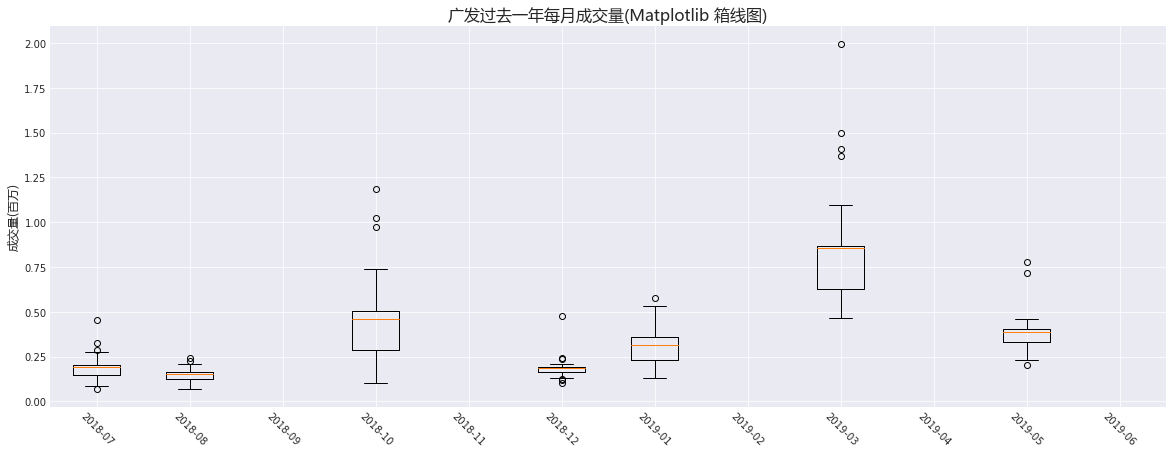

In [61]:
df_volume_776 = month_column(df_776_clean, 'volume',
                             months_of_past_year) / 1000000
fig, ax = plt.subplots(figsize=(20, 7))
plt.boxplot(df_volume_776)
ax.set_title('广发过去一年每月成交量(Matplotlib 箱线图)', FontProperties=font, fontsize=16)
ax.set_ylabel('成交量(百万)', FontProperties=font)
ax.set_xticklabels(labels=months_of_past_year, rotation=-45)
plt.show()

使用Seaborn绘制涨幅箱线图

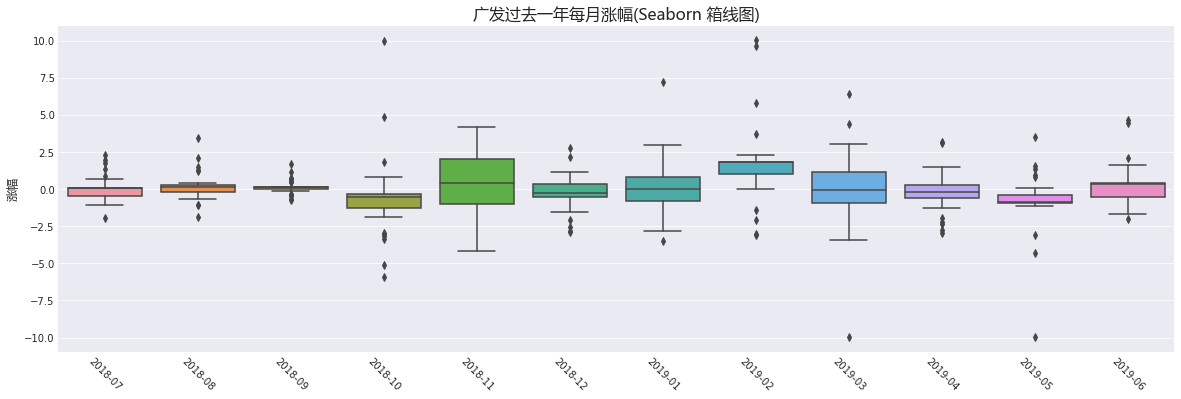

In [62]:
df_p_change_776 = month_column(df_776_clean, 'p_change', months_of_past_year)
fig, ax = plt.subplots(figsize=(20, 6))
sns.boxplot(data=df_p_change_776.T)
ax.set_xticklabels(months_of_past_year, rotation=-45)
ax.set_title('广发过去一年每月涨幅(Seaborn 箱线图)', FontProperties=font, fontsize=16)
ax.set_ylabel('涨幅', FontProperties=font)
plt.show()

# 多股分析

还是选择1年内的数据

In [63]:
def get_securties_detail(all_securties):
    datas = {}
    for i in all_securties.index:
        ts_data = ts.get_hist_data(all_securties.loc[i]['code'],
                                   start=start_date,
                                   end=end_date)
        if ts_data is not None:
            datas[all_securties.loc[i]['name']] = deep_clean(
                ts_data, start_date, end_date)
    return datas


securties_datas = get_securties_detail(all_securties)

for i in securties_datas:
    print(i + '\n' + "-" * 100)
    display(securties_datas[i])

中原证券
----------------------------------------------------------------------------------------------------


open      high     close       low         volume  price_change  p_change       ma5      ma10      ma20          v_ma5         v_ma10         v_ma20    month        days
2018-07-01  4.575000  4.644545  4.581364  4.516364  110175.113182     -0.002727 -0.039545  4.579273  4.560500  4.640727  112824.411818  109191.163182  110201.719091  2018-07  2018-07-01
2018-07-02  4.670000  4.670000  4.540000  4.480000  102586.890000     -0.130000 -2.780000  4.566000  4.530000  4.924000  116504.730000  127345.590000  112764.490000  2018-07  2018-07-02
2018-07-03  4.520000  4.610000  4.610000  4.500000   84523.300000      0.080000  1.770000  4.580000  4.529000  4.886000  113184.310000  116415.180000  113579.020000  2018-07  2018-07-03
2018-07-04  4.580000  4.600000  4.510000  4.490000   70693.000000     -0.090000 -1.960000  4.578000  4.526000  4.840000  110620.310000  107409.380000  113784.380000  2018-07  2018-07-04
2018-07-05  4.540000  4.590000  4.460000  4.460000   93527.460000     -0.050000 -1.110000  4.558000  4.534000  4.793000   94548.720000  103372.490000  114281.770000  2018-07  2018-07-05
2018-07-06  4.480000  4.620000  4.560000  4.430000  136035.300000      0.100000  2.240000  4.536000  4.543000  4.748000   97473.190000  104972.170000  113143.770000  2018-07  2018-07-06
2018-07-07  4.575000  4.644545  4.581364  4.516364  110175.113182     -0.002727 -0.039545  4.579273  4.560500  4.640727  112824.411818  109191.163182  110201.719091  2018-07  2018-07-07
2018-07-08  4.575000  4.644545  4.581364  4.516364  110175.113182     -0.002727 -0.039545  4.579273  4.560500  4.640727  112824.411818  109191.163182  110201.719091  2018-07  2018-07-08
2018-07-09  4.560000  4.630000  4.610000  4.530000  108313.030000      0.050000  1.100000  4.550000  4.558000  4.714000   98618.420000  107561.570000  110694.170000  2018-07  2018-07-09
2018-07-10  4.600000  4.630000  4.600000  4.560000   76107.010000     -0.020000 -0.430000  4.548000  4.564000  4.679000   96935.160000  105059.730000  109447.800000  2018-07  2018-07-10
2018-07-11  4.550000  4.550000  4.430000  4.360000  108959.610000     -0.180000 -3.900000  4.532000  4.555000  4.633000  104588.480000  107604.400000  111042.540000  2018-07  2018-07-11
2018-07-12  4.420000  4.620000  4.580000  4.410000  135487.340000      0.160000  3.620000  4.556000  4.557000  4.600000  112980.460000  103764.590000  114585.850000  2018-07  2018-07-12
2018-07-13  4.590000  4.630000  4.560000  4.530000   85185.300000     -0.030000 -0.650000  4.556000  4.546000  4.565000  102810.460000  100141.820000  115410.780000  2018-07  2018-07-13
2018-07-14  4.575000  4.644545  4.581364  4.516364  110175.113182     -0.002727 -0.039545  4.579273  4.560500  4.640727  112824.411818  109191.163182  110201.719091  2018-07  2018-07-14
2018-07-15  4.575000  4.644545  4.581364  4.516364  110175.113182     -0.002727 -0.039545  4.579273  4.560500  4.640727  112824.411818  109191.163182  110201.719091  2018-07  2018-07-15
2018-07-16  4.580000  4.590000  4.550000  4.540000   60039.000000     -0.010000 -0.220000  4.544000  4.547000  4.539000   93155.650000   95887.040000  111616.310000  2018-07  2018-07-16
2018-07-17  4.580000  4.580000  4.560000  4.520000   58792.000000      0.010000  0.220000  4.536000  4.542000  4.536000   89692.650000   93313.910000  104864.540000  2018-07  2018-07-17
2018-07-18  4.560000  4.590000  4.520000  4.500000   66077.300000     -0.040000 -0.880000  4.554000  4.543000  4.535000   81116.190000   92852.340000  100130.860000  2018-07  2018-07-18
2018-07-19  4.500000  4.540000  4.460000  4.440000   73389.520000     -0.050000 -1.110000  4.530000  4.543000  4.539000   68696.620000   90838.540000   97105.510000  2018-07  2018-07-19
2018-07-20  4.460000  4.650000  4.600000  4.420000  190293.560000      0.140000  3.140000  4.538000  4.547000  4.545000   89718.280000   96264.370000  100618.270000  2018-07  2018-07-20
2018-07-21  4.575000  4.644545  4.581364  4.516364  110175.113182     -0.002727 -0.039545  4.579273  4.560500 

财通证券
----------------------------------------------------------------------------------------------------


open       high      close        low        volume  price_change  p_change        ma5       ma10       ma20         v_ma5         v_ma10         v_ma20    month        days
2018-07-01  10.836818  11.075000  10.873636  10.680909  1.340615e+05 -1.892426e-18  0.030455  10.886455  10.879591  11.190000  1.374925e+05  130174.557727  130507.551818  2018-07  2018-07-01
2018-07-02  11.220000  11.250000  10.850000  10.720000  1.299980e+05 -4.300000e-01 -3.810000  11.084000  11.141000  12.040000  1.313576e+05  134345.330000  135298.200000  2018-07  2018-07-02
2018-07-03  10.880000  11.050000  11.030000  10.730000  8.920056e+04  1.800000e-01  1.660000  11.066000  11.081000  11.958000  1.249329e+05  122561.560000  135100.320000  2018-07  2018-07-03
2018-07-04  10.960000  11.040000  10.730000  10.690000  8.836044e+04 -3.000000e-01 -2.720000  10.996000  10.994000  11.852000  1.230496e+05  119281.630000  135014.420000  2018-07  2018-07-04
2018-07-05  10.790000  11.030000  10.710000  10.680000  1.186447e+05 -2.000000e-02 -0.190000  10.920000  10.982000  11.741000  1.131299e+05  114942.210000  135287.460000  2018-07  2018-07-05
2018-07-06  10.710000  11.030000  10.740000  10.240000  1.575400e+05  3.000000e-02  0.280000  10.812000  10.953000  11.627000  1.167487e+05  120525.090000  135089.660000  2018-07  2018-07-06
2018-07-07  10.836818  11.075000  10.873636  10.680909  1.340615e+05 -1.892426e-18  0.030455  10.886455  10.879591  11.190000  1.374925e+05  130174.557727  130507.551818  2018-07  2018-07-07
2018-07-08  10.836818  11.075000  10.873636  10.680909  1.340615e+05 -1.892426e-18  0.030455  10.886455  10.879591  11.190000  1.374925e+05  130174.557727  130507.551818  2018-07  2018-07-08
2018-07-09  10.700000  10.930000  10.930000  10.670000  8.870148e+04  1.900000e-01  1.770000  10.828000  10.956000  11.536000  1.084894e+05  119923.540000  133512.720000  2018-07  2018-07-09
2018-07-10  10.940000  11.050000  11.010000  10.880000  1.064791e+05  9.000000e-02  0.820000  10.824000  10.945000  11.430000  1.119451e+05  118439.020000  128037.000000  2018-07  2018-07-10
2018-07-11  10.600000  10.770000  10.370000  10.180000  1.139021e+05 -4.600000e-01 -4.250000  10.752000  10.874000  11.289000  1.170535e+05  120051.550000  125803.750000  2018-07  2018-07-11
2018-07-12  10.430000  11.100000  10.910000  10.400000  2.105058e+05  5.400000e-01  5.210000  10.792000  10.856000  11.195000  1.354257e+05  124277.780000  130350.270000  2018-07  2018-07-12
2018-07-13  10.800000  10.870000  10.710000  10.650000  1.331439e+05 -2.000000e-01 -1.830000  10.786000  10.799000  11.074000  1.305465e+05  123647.610000  129550.660000  2018-07  2018-07-13
2018-07-14  10.836818  11.075000  10.873636  10.680909  1.340615e+05 -1.892426e-18  0.030455  10.886455  10.879591  11.190000  1.374925e+05  130174.557727  130507.551818  2018-07  2018-07-14
2018-07-15  10.836818  11.075000  10.873636  10.680909  1.340615e+05 -1.892426e-18  0.030455  10.886455  10.879591  11.190000  1.374925e+05  130174.557727  130507.551818  2018-07  2018-07-15
2018-07-16  10.750000  10.780000  10.640000  10.580000  7.054916e+04 -8.000000e-02 -0.750000  10.728000  10.778000  10.960000  1.269160e+05  117702.720000  126024.020000  2018-07  2018-07-16
2018-07-17  10.610000  10.650000  10.640000  10.540000  5.917717e+04  1.000000e-02  0.090000  10.654000  10.739000  10.910000  1.174556e+05  114700.380000  118630.970000  2018-07  2018-07-17
2018-07-18  10.710000  10.800000  10.560000  10.540000  7.911704e+04 -7.000000e-02 -0.660000  10.692000  10.722000  10.858000  1.104986e+05  113776.040000  116528.840000  2018-07  2018-07-18
2018-07-19  10.510000  10.650000  10.420000  10.330000  6.996813e+04 -1.400000e-01 -1.330000  10.594000  10.693000  10.838000  8.239109e+04  108908.390000  111925.300000  2018-07  2018-07-19
2018-07-20  10.370000  10.960000  10.800000  10.320000  1.908583e+05  4.200000e-01  4.050000  10.612000  10.699000  10.826000  9.393397e+04  112240.230000  116382.660000  2018-07  2018-07-20
2018-0

国信证券
----------------------------------------------------------------------------------------------------


open       high      close        low         volume  price_change  p_change        ma5       ma10       ma20          v_ma5         v_ma10         v_ma20    month        days
2018-07-01   8.976818   9.084545   8.984545   8.894545   36389.578182     -0.002273 -0.016364   8.968273   8.926727   9.024136   39031.935455   38662.720455   41060.784545  2018-07  2018-07-01
2018-07-02   9.100000   9.160000   8.890000   8.850000   51012.370000     -0.210000 -2.310000   8.798000   8.788000   9.391000   51110.690000   53833.980000   45132.260000  2018-07  2018-07-02
2018-07-03   8.920000   9.050000   9.040000   8.900000   54172.420000      0.150000  1.690000   8.864000   8.794000   9.339000   55313.610000   48387.590000   46417.950000  2018-07  2018-07-03
2018-07-04   9.010000   9.080000   8.940000   8.900000   27377.760000     -0.100000 -1.110000   8.936000   8.794000   9.281000   55424.300000   45735.560000   46232.290000  2018-07  2018-07-04
2018-07-05   8.930000   9.060000   8.820000   8.810000   32534.610000     -0.120000 -1.340000   8.958000   8.817000   9.214000   49493.560000   43892.650000   45747.310000  2018-07  2018-07-05
2018-07-06   8.850000   9.080000   8.910000   8.750000   38268.140000      0.090000  1.020000   8.920000   8.837000   9.152000   40673.060000   43817.820000   45333.260000  2018-07  2018-07-06
2018-07-07   8.976818   9.084545   8.984545   8.894545   36389.578182     -0.002273 -0.016364   8.968273   8.926727   9.024136   39031.935455   38662.720455   41060.784545  2018-07  2018-07-07
2018-07-08   8.976818   9.084545   8.984545   8.894545   36389.578182     -0.002273 -0.016364   8.968273   8.926727   9.024136   39031.935455   38662.720455   41060.784545  2018-07  2018-07-08
2018-07-09   8.920000   9.060000   9.040000   8.910000   29576.470000      0.130000  1.460000   8.950000   8.874000   9.104000   36385.880000   43748.290000   43976.170000  2018-07  2018-07-09
2018-07-10   9.040000   9.060000   9.000000   8.960000   20582.030000     -0.040000 -0.440000   8.942000   8.903000   9.057000   29667.800000   42490.710000   43485.950000  2018-07  2018-07-10
2018-07-11   8.900000   8.900000   8.740000   8.690000   35726.000000     -0.260000 -2.890000   8.902000   8.919000   8.997000   31337.450000   43380.870000   43696.210000  2018-07  2018-07-11
2018-07-12   8.660000   9.060000   8.980000   8.660000   36104.570000      0.240000  2.750000   8.934000   8.946000   8.953000   32051.440000   40772.500000   44159.840000  2018-07  2018-07-12
2018-07-13   8.990000   9.050000   9.000000   8.950000   25996.130000      0.020000  0.220000   8.952000   8.936000   8.904000   29597.040000   35135.050000   43815.710000  2018-07  2018-07-13
2018-07-14   8.976818   9.084545   8.984545   8.894545   36389.578182     -0.002273 -0.016364   8.968273   8.926727   9.024136   39031.935455   38662.720455   41060.784545  2018-07  2018-07-14
2018-07-15   8.976818   9.084545   8.984545   8.894545   36389.578182     -0.002273 -0.016364   8.968273   8.926727   9.024136   39031.935455   38662.720455   41060.784545  2018-07  2018-07-15
2018-07-16   9.000000   9.030000   9.000000   8.950000   18845.510000      0.000000  0.000000   8.944000   8.947000   8.868000   27450.850000   31918.360000   42876.170000  2018-07  2018-07-16
2018-07-17   9.000000   9.000000   8.950000   8.910000   16813.030000     -0.050000 -0.560000   8.934000   8.938000   8.866000   26697.050000   28182.430000   38285.010000  2018-07  2018-07-17
2018-07-18   8.940000   9.030000   8.900000   8.880000   20757.000000     -0.050000 -0.560000   8.966000   8.934000   8.864000   23703.250000   27520.350000   36627.950000  2018-07  2018-07-18
2018-07-19   8.900000   8.970000   8.860000   8.830000   26232.000000     -0.040000 -0.450000   8.942000   8.938000   8.878000   21728.730000   26890.090000   35391.370000  2018-07  2018-07-19
2018-07-20   8.890000   9.080000   9.050000   8.800000   57025.800000      0.190000  2.140000   8.952000   8.952000   8.895000   27934.670000   28765.850000 

华创阳安
----------------------------------------------------------------------------------------------------


open       high      close        low         volume  price_change  p_change        ma5       ma10       ma20          v_ma5         v_ma10         v_ma20    month        days
2018-07-01   7.103636   7.217273   7.098636   7.002727   65184.250909     -0.001364 -0.005455   7.089364   7.051091   7.094273   70893.935455   75309.978182   77264.901818  2018-07  2018-07-01
2018-07-02   7.170000   7.190000   6.920000   6.790000   80454.940000     -0.270000 -3.750000   7.008000   6.871000   7.311000   94216.720000   99782.270000   69115.650000  2018-07  2018-07-02
2018-07-03   6.890000   7.120000   7.080000   6.880000   77534.350000      0.170000  2.460000   7.038000   6.906000   7.273000   94912.790000   96935.250000   70951.460000  2018-07  2018-07-03
2018-07-04   7.030000   7.090000   6.980000   6.940000   59718.100000     -0.110000 -1.550000   7.054000   6.930000   7.226000   94523.370000   97481.690000   72441.840000  2018-07  2018-07-04
2018-07-05   7.220000   7.600000   7.080000   7.030000  138944.500000      0.100000  1.430000   7.048000   6.997000   7.183000   93481.340000  103871.360000   78038.410000  2018-07  2018-07-05
2018-07-06   7.010000   7.250000   7.120000   6.820000  107740.680000      0.040000  0.560000   7.036000   7.017000   7.142000   92878.510000   97235.570000   80724.180000  2018-07  2018-07-06
2018-07-07   7.103636   7.217273   7.098636   7.002727   65184.250909     -0.001364 -0.005455   7.089364   7.051091   7.094273   70893.935455   75309.978182   77264.901818  2018-07  2018-07-07
2018-07-08   7.103636   7.217273   7.098636   7.002727   65184.250909     -0.001364 -0.005455   7.089364   7.051091   7.094273   70893.935455   75309.978182   77264.901818  2018-07  2018-07-08
2018-07-09   7.110000   7.200000   7.180000   7.060000   83837.580000      0.070000  0.980000   7.088000   7.048000   7.114000   93555.040000   93885.880000   82624.210000  2018-07  2018-07-09
2018-07-10   7.190000   7.220000   7.200000   7.120000   61771.370000      0.010000  0.140000   7.112000   7.075000   7.089000   90402.450000   92657.620000   83779.120000  2018-07  2018-07-10
2018-07-11   7.070000   7.130000   7.020000   6.890000   62319.860000     -0.180000 -2.500000   7.120000   7.087000   7.051000   90922.800000   92723.080000   85120.780000  2018-07  2018-07-11
2018-07-12   7.040000   7.260000   7.160000   6.950000   79750.010000      0.140000  1.990000   7.136000   7.092000   7.028000   79083.900000   86282.620000   87216.680000  2018-07  2018-07-12
2018-07-13   7.180000   7.190000   7.080000   7.060000   53776.070000     -0.080000 -1.120000   7.128000   7.082000   7.001000   68290.980000   80584.750000   88331.710000  2018-07  2018-07-13
2018-07-14   7.103636   7.217273   7.098636   7.002727   65184.250909     -0.001364 -0.005455   7.089364   7.051091   7.094273   70893.935455   75309.978182   77264.901818  2018-07  2018-07-14
2018-07-15   7.103636   7.217273   7.098636   7.002727   65184.250909     -0.001364 -0.005455   7.089364   7.051091   7.094273   70893.935455   75309.978182   77264.901818  2018-07  2018-07-15
2018-07-16   7.010000   7.110000   7.040000   7.010000   32045.000000     -0.040000 -0.560000   7.100000   7.094000   6.983000   57932.460000   75743.750000   87763.010000  2018-07  2018-07-16
2018-07-17   7.070000   7.070000   7.030000   6.990000   24139.940000     -0.010000 -0.140000   7.066000   7.089000   6.998000   50406.180000   70404.310000   83669.780000  2018-07  2018-07-17
2018-07-18   7.030000   7.110000   6.950000   6.940000   30482.000000     -0.080000 -1.140000   7.052000   7.086000   7.008000   44038.600000   67480.700000   82481.200000  2018-07  2018-07-18
2018-07-19   6.930000   6.990000   6.850000   6.830000   37295.010000     -0.100000 -1.440000   6.990000   7.063000   7.030000   35547.600000   57315.750000   80593.550000  2018-07  2018-07-19
2018-07-20   6.910000   7.150000   7.060000   6.850000   76339.980000      0.210000  3.070000   6.986000   7.057000   7.037000   40060.390000   54175.680000 

长江证券
----------------------------------------------------------------------------------------------------


open      high     close       low         volume  price_change  p_change       ma5      ma10      ma20          v_ma5         v_ma10         v_ma20    month        days
2018-07-01  5.321818  5.390000  5.332273  5.265455  141696.372727      0.003182  0.076818  5.331727  5.319864  5.397909  144888.906364  136558.521364  138075.295909  2018-07  2018-07-01
2018-07-02  5.430000  5.450000  5.300000  5.260000  137065.000000     -0.130000 -2.390000  5.334000  5.311000  5.686000  142384.390000  151663.590000  145120.890000  2018-07  2018-07-02
2018-07-03  5.300000  5.370000  5.370000  5.270000  116379.690000      0.070000  1.320000  5.342000  5.319000  5.640000  140917.440000  138464.150000  147010.370000  2018-07  2018-07-03
2018-07-04  5.350000  5.380000  5.330000  5.320000   80270.960000     -0.040000 -0.740000  5.350000  5.315000  5.590000  140663.260000  127311.640000  146729.170000  2018-07  2018-07-04
2018-07-05  5.330000  5.400000  5.230000  5.230000  107213.880000     -0.100000 -1.880000  5.332000  5.316000  5.536000  121186.600000  124180.110000  148528.220000  2018-07  2018-07-05
2018-07-06  5.250000  5.390000  5.290000  5.170000  149399.560000      0.060000  1.150000  5.304000  5.316000  5.484000  118065.820000  127064.460000  146086.200000  2018-07  2018-07-06
2018-07-07  5.321818  5.390000  5.332273  5.265455  141696.372727      0.003182  0.076818  5.331727  5.319864  5.397909  144888.906364  136558.521364  138075.295909  2018-07  2018-07-07
2018-07-08  5.321818  5.390000  5.332273  5.265455  141696.372727      0.003182  0.076818  5.331727  5.319864  5.397909  144888.906364  136558.521364  138075.295909  2018-07  2018-07-08
2018-07-09  5.280000  5.410000  5.400000  5.280000  147084.750000      0.110000  2.080000  5.324000  5.329000  5.452000  120069.770000  131227.080000  136357.490000  2018-07  2018-07-09
2018-07-10  5.370000  5.390000  5.380000  5.340000   95792.210000     -0.020000 -0.370000  5.326000  5.334000  5.423000  115952.270000  128434.860000  135101.340000  2018-07  2018-07-10
2018-07-11  5.320000  5.320000  5.210000  5.180000  129821.190000     -0.170000 -3.160000  5.302000  5.326000  5.385000  125862.320000  133262.790000  137052.230000  2018-07  2018-07-11
2018-07-12  5.210000  5.410000  5.390000  5.210000  182515.120000      0.180000  3.460000  5.334000  5.333000  5.365000  140922.570000  131054.580000  140190.930000  2018-07  2018-07-12
2018-07-13  5.390000  5.400000  5.380000  5.350000   76285.220000     -0.010000 -0.190000  5.352000  5.328000  5.344000  126299.700000  122182.760000  137871.090000  2018-07  2018-07-13
2018-07-14  5.321818  5.390000  5.332273  5.265455  141696.372727      0.003182  0.076818  5.331727  5.319864  5.397909  144888.906364  136558.521364  138075.295909  2018-07  2018-07-14
2018-07-15  5.321818  5.390000  5.332273  5.265455  141696.372727      0.003182  0.076818  5.331727  5.319864  5.397909  144888.906364  136558.521364  138075.295909  2018-07  2018-07-15
2018-07-16  5.380000  5.390000  5.370000  5.320000   81900.220000     -0.010000 -0.190000  5.346000  5.335000  5.323000  113262.790000  116666.280000  134164.930000  2018-07  2018-07-16
2018-07-17  5.250000  5.250000  5.220000  5.190000   92351.100000      0.000000  0.000000  5.314000  5.320000  5.320000  112574.570000  114263.420000  126363.780000  2018-07  2018-07-17
2018-07-18  5.230000  5.270000  5.190000  5.190000   80960.370000     -0.030000 -0.570000  5.310000  5.306000  5.311000  102802.410000  114332.360000  120822.000000  2018-07  2018-07-18
2018-07-19  5.200000  5.230000  5.160000  5.080000  102608.440000     -0.030000 -0.580000  5.264000  5.299000  5.308000   86821.070000  113871.820000  119025.970000  2018-07  2018-07-19
2018-07-20  5.130000  5.310000  5.250000  5.100000  194089.920000      0.090000  1.740000  5.238000  5.295000  5.306000  110382.010000  118340.850000  122702.660000  2018-07  2018-07-20
2018-07-21  5.321818  5.390000  5.332273  5.265455  141696.372727      0.003182  0.076818  5.331727  5.319864 

吉艾科技
----------------------------------------------------------------------------------------------------


open       high      close        low         volume  price_change   p_change        ma5       ma10       ma20          v_ma5         v_ma10         v_ma20    month        days
2018-07-01  20.443636  20.846364  20.461364  20.189545   37143.079545     -0.001364   0.032727  20.453364  20.406273  20.558045   36822.711818   37914.022273   38337.876364  2018-07  2018-07-01
2018-07-02  22.310000  22.310000  21.880000  21.440000  148540.770000      1.600000   7.890000  20.532000  20.380000  21.255000   41409.340000   46098.050000   30272.080000  2018-07  2018-07-02
2018-07-03  21.230000  21.520000  20.600000  20.600000   85014.050000     -1.280000  -5.850000  20.576000  20.489000  21.175000   54864.840000   49740.660000   33679.240000  2018-07  2018-07-03
2018-07-04  20.330000  22.200000  20.690000  20.330000   64064.910000      0.090000   0.440000  20.680000  20.553000  21.085000   65020.020000   45609.990000   36044.740000  2018-07  2018-07-04
2018-07-05  20.230000  20.630000  19.850000  19.800000   45998.290000     -0.840000  -4.060000  20.660000  20.497000  20.956000   70723.500000   45493.390000   37846.210000  2018-07  2018-07-05
2018-07-06  19.920000  19.920000  19.380000  19.150000   43637.700000     -0.470000  -2.370000  20.480000  20.392000  20.820000   77451.140000   48232.550000   39474.270000  2018-07  2018-07-06
2018-07-07  20.443636  20.846364  20.461364  20.189545   37143.079545     -0.001364   0.032727  20.453364  20.406273  20.558045   36822.711818   37914.022273   38337.876364  2018-07  2018-07-07
2018-07-08  20.443636  20.846364  20.461364  20.189545   37143.079545     -0.001364   0.032727  20.453364  20.406273  20.558045   36822.711818   37914.022273   38337.876364  2018-07  2018-07-08
2018-07-09  19.000000  19.640000  19.630000  19.000000   31545.280000      0.250000   1.290000  20.030000  20.281000  20.698000   54052.050000   47730.690000   40401.960000  2018-07  2018-07-09
2018-07-10  19.700000  20.340000  20.150000  19.580000   32819.510000      0.520000   2.650000  19.940000  20.258000  20.598000   43613.140000   49238.990000   41532.440000  2018-07  2018-07-10
2018-07-11  19.590000  19.680000  19.560000  19.200000   22626.000000     -0.590000  -2.930000  19.714000  20.197000  20.469000   35325.360000   50172.690000   42172.090000  2018-07  2018-07-11
2018-07-12  19.600000  20.230000  20.080000  19.510000   27081.570000      0.520000   2.660000  19.760000  20.210000  20.372000   31542.010000   51132.760000   42906.660000  2018-07  2018-07-12
2018-07-13  20.060000  20.490000  20.200000  20.030000   22160.320000      0.120000   0.600000  19.924000  20.202000  20.281000   27246.540000   52348.840000   43537.150000  2018-07  2018-07-13
2018-07-14  20.443636  20.846364  20.461364  20.189545   37143.079545     -0.001364   0.032727  20.453364  20.406273  20.558045   36822.711818   37914.022273   38337.876364  2018-07  2018-07-14
2018-07-15  20.443636  20.846364  20.461364  20.189545   37143.079545     -0.001364   0.032727  20.453364  20.406273  20.558045   36822.711818   37914.022273   38337.876364  2018-07  2018-07-15
2018-07-16  20.200000  21.050000  20.860000  20.100000   42130.340000      0.660000   3.270000  20.170000  20.100000  20.240000   29363.550000   41707.800000   43902.930000  2018-07  2018-07-16
2018-07-17  20.700000  20.800000  20.540000  20.420000   21102.000000     -0.320000  -1.530000  20.248000  20.094000  20.292000   27020.050000   35316.590000   42528.630000  2018-07  2018-07-17
2018-07-18  20.650000  21.090000  20.740000  20.570000   29854.270000      0.200000   0.970000  20.484000  20.099000  20.326000   28465.700000   31895.530000   38752.760000  2018-07  2018-07-18
2018-07-19  20.590000  20.860000  20.540000  20.460000   15579.000000     -0.200000  -0.960000  20.576000  20.168000  20.333000   26165.190000   28853.600000   37173.490000  2018-07  2018-07-19
2018-07-20  20.540000  21.360000  21.040000  20.540000   45572.730000      0.500000   2.430000  20.744000  20.334000  20.363000   30847.6

海通证券
----------------------------------------------------------------------------------------------------


open       high      close        low        volume  price_change  p_change        ma5       ma10       ma20         v_ma5        v_ma10         v_ma20    month        days
2018-07-01   9.330455   9.437727   9.345455   9.234091  3.807453e+05      0.001364  0.028182   9.328364   9.288091   9.387818  3.902445e+05  3.707963e+05  387722.486818  2018-07  2018-07-01
2018-07-02   9.430000   9.440000   9.230000   9.150000  4.075373e+05     -0.240000 -2.530000   9.250000   9.245000   9.781000  3.797807e+05  4.120977e+05  444536.970000  2018-07  2018-07-02
2018-07-03   9.250000   9.370000   9.350000   9.170000  2.988764e+05      0.120000  1.300000   9.280000   9.251000   9.718000  3.682847e+05  3.685039e+05  442560.080000  2018-07  2018-07-03
2018-07-04   9.340000   9.350000   9.250000   9.220000  1.798246e+05     -0.100000 -1.070000   9.304000   9.244000   9.653000  3.507832e+05  3.469277e+05  433086.830000  2018-07  2018-07-04
2018-07-05   9.240000   9.350000   9.110000   9.090000  2.405859e+05     -0.130000 -1.410000   9.284000   9.239000   9.586000  3.072153e+05  3.320996e+05  426221.950000  2018-07  2018-07-05
2018-07-06   9.140000   9.300000   9.190000   8.980000  3.536179e+05      0.090000  0.990000   9.226000   9.228000   9.519000  2.960884e+05  3.359458e+05  415664.070000  2018-07  2018-07-06
2018-07-07   9.330455   9.437727   9.345455   9.234091  3.807453e+05      0.001364  0.028182   9.328364   9.288091   9.387818  3.902445e+05  3.707963e+05  387722.486818  2018-07  2018-07-07
2018-07-08   9.330455   9.437727   9.345455   9.234091  3.807453e+05      0.001364  0.028182   9.328364   9.288091   9.387818  3.902445e+05  3.707963e+05  387722.486818  2018-07  2018-07-08
2018-07-09   9.200000   9.380000   9.350000   9.180000  2.926145e+05      0.160000  1.740000   9.250000   9.250000   9.471000  2.731039e+05  3.264423e+05  392526.270000  2018-07  2018-07-09
2018-07-10   9.350000   9.380000   9.320000   9.260000  3.298492e+05     -0.040000 -0.430000   9.244000   9.262000   9.420000  2.792984e+05  3.237916e+05  394094.700000  2018-07  2018-07-10
2018-07-11   9.110000   9.150000   9.090000   9.000000  3.381487e+05     -0.220000 -2.360000   9.212000   9.258000   9.360000  3.109633e+05  3.308732e+05  394028.290000  2018-07  2018-07-11
2018-07-12   9.110000   9.420000   9.360000   9.090000  5.008648e+05      0.270000  2.970000   9.262000   9.273000   9.322000  3.630190e+05  3.351172e+05  404376.890000  2018-07  2018-07-12
2018-07-13   9.350000   9.370000   9.300000   9.260000  2.513975e+05     -0.060000 -0.640000   9.284000   9.255000   9.282000  3.425750e+05  3.193317e+05  398660.950000  2018-07  2018-07-13
2018-07-14   9.330455   9.437727   9.345455   9.234091  3.807453e+05      0.001364  0.028182   9.328364   9.288091   9.387818  3.902445e+05  3.707963e+05  387722.486818  2018-07  2018-07-14
2018-07-15   9.330455   9.437727   9.345455   9.234091  3.807453e+05      0.001364  0.028182   9.328364   9.288091   9.387818  3.902445e+05  3.707963e+05  387722.486818  2018-07  2018-07-15
2018-07-16   9.310000   9.340000   9.260000   9.190000  2.506864e+05     -0.040000 -0.430000   9.266000   9.258000   9.252000  3.341893e+05  3.036466e+05  357872.170000  2018-07  2018-07-16
2018-07-17   9.240000   9.240000   9.160000   9.100000  3.335072e+05     -0.100000 -1.080000   9.234000   9.239000   9.245000  3.349209e+05  3.071097e+05  337806.770000  2018-07  2018-07-17
2018-07-18   9.190000   9.230000   9.140000   9.120000  2.597333e+05     -0.020000 -0.220000   9.244000   9.228000   9.236000  3.192378e+05  3.151005e+05  331014.130000  2018-07  2018-07-18
2018-07-19   9.140000   9.230000   9.130000   9.070000  2.334265e+05     -0.010000 -0.110000   9.198000   9.230000   9.235000  2.657502e+05  3.143846e+05  323242.120000  2018-07  2018-07-19
2018-07-20   9.030000   9.410000   9.390000   9.030000  5.781042e+05      0.260000  2.850000   9.216000   9.250000   9.239000  3.310915e+05  3.368332e+05  336389.550000  2018-07  2018-07-20
2018-07-21   9.330455   9.4

东方证券
----------------------------------------------------------------------------------------------------


open       high      close        low         volume  price_change  p_change        ma5       ma10       ma20          v_ma5         v_ma10         v_ma20    month        days
2018-07-01   8.839545   8.985455   8.858636   8.713636  117170.787727      0.010909  0.143182   8.860364   8.860045   9.126545  119916.736818  122159.281818  124458.113636  2018-07  2018-07-01
2018-07-02   9.150000   9.150000   8.920000   8.750000  116598.450000     -0.210000 -2.300000   8.996000   9.057000   9.856000  125398.290000  149649.150000  124246.620000  2018-07  2018-07-02
2018-07-03   8.880000   8.980000   8.970000   8.760000  123663.110000      0.050000  0.560000   9.000000   9.010000   9.776000  125710.340000  138218.460000  125248.780000  2018-07  2018-07-03
2018-07-04   8.920000   8.970000   8.930000   8.860000   79507.880000     -0.030000 -0.340000   8.998000   8.977000   9.690000  123250.210000  126361.360000  124915.880000  2018-07  2018-07-04
2018-07-05   8.880000   9.020000   8.920000   8.610000  123780.320000      0.010000  0.110000   8.976000   8.977000   9.602000  116319.210000  122664.790000  126380.550000  2018-07  2018-07-05
2018-07-06   8.840000   9.080000   8.930000   8.650000  127467.490000      0.030000  0.340000   8.934000   8.969000   9.511000  114203.450000  122192.650000  125252.290000  2018-07  2018-07-06
2018-07-07   8.839545   8.985455   8.858636   8.713636  117170.787727      0.010909  0.143182   8.860364   8.860045   9.126545  119916.736818  122159.281818  124458.113636  2018-07  2018-07-07
2018-07-08   8.839545   8.985455   8.858636   8.713636  117170.787727      0.010909  0.143182   8.860364   8.860045   9.126545  119916.736818  122159.281818  124458.113636  2018-07  2018-07-08
2018-07-09   8.890000   9.080000   9.080000   8.890000  127929.420000      0.150000  1.680000   8.966000   8.981000   9.437000  116469.640000  120933.970000  125272.600000  2018-07  2018-07-09
2018-07-10   8.910000   8.920000   8.810000   8.730000   91731.000000     -0.060000 -0.680000   8.934000   8.967000   9.344000  110083.220000  117896.780000  124590.480000  2018-07  2018-07-10
2018-07-11   8.690000   8.690000   8.270000   8.130000  162198.120000     -0.530000 -6.020000   8.802000   8.900000   9.217000  126621.270000  124935.740000  128644.450000  2018-07  2018-07-11
2018-07-12   8.270000   8.590000   8.540000   8.250000  152811.190000      0.270000  3.270000   8.726000   8.851000   9.111000  132427.440000  124373.330000  132933.040000  2018-07  2018-07-12
2018-07-13   8.560000   8.690000   8.660000   8.500000  132785.300000      0.130000  1.520000   8.672000   8.803000   9.008000  133491.010000  123847.230000  135973.310000  2018-07  2018-07-13
2018-07-14   8.839545   8.985455   8.858636   8.713636  117170.787727      0.010909  0.143182   8.860364   8.860045   9.126545  119916.736818  122159.281818  124458.113636  2018-07  2018-07-14
2018-07-15   8.839545   8.985455   8.858636   8.713636  117170.787727      0.010909  0.143182   8.860364   8.860045   9.126545  119916.736818  122159.281818  124458.113636  2018-07  2018-07-15
2018-07-16   8.690000   8.840000   8.670000   8.600000  107464.490000      0.020000  0.230000   8.590000   8.778000   8.918000  129398.020000  122933.830000  136291.490000  2018-07  2018-07-16
2018-07-17   8.680000   8.850000   8.780000   8.670000   82354.430000      0.100000  1.150000   8.584000   8.759000   8.885000  127522.710000  118802.960000  128510.710000  2018-07  2018-07-17
2018-07-18   8.740000   8.870000   8.710000   8.700000   66550.040000     -0.060000 -0.680000   8.672000   8.737000   8.857000  108393.090000  117507.180000  121934.270000  2018-07  2018-07-18
2018-07-19   8.720000   8.760000   8.530000   8.480000   86932.000000     -0.190000 -2.180000   8.670000   8.698000   8.838000   95217.250000  113822.350000  118243.570000  2018-07  2018-07-19
2018-07-20   8.550000   8.880000   8.830000   8.510000  146443.810000      0.290000  3.400000   8.704000   8.688000   8.829000   97948.950000  115719.980000 

越秀金控
----------------------------------------------------------------------------------------------------


open      high     close       low         volume  price_change  p_change       ma5      ma10      ma20         v_ma5        v_ma10        v_ma20    month        days
2018-07-01  7.489545  7.641364  7.509545  7.370455   32366.853182      0.006818  0.118636  7.510364  7.544318  7.840182  30545.571818  30593.098636  34628.169545  2018-07  2018-07-01
2018-07-02  7.830000  7.880000  7.780000  7.710000   22015.000000     -0.080000 -1.020000  7.798000  7.918000  8.687000  25431.840000  35906.640000  47481.080000  2018-07  2018-07-02
2018-07-03  7.780000  7.860000  7.850000  7.690000   20591.890000      0.070000  0.900000  7.782000  7.899000  8.600000  23970.550000  31492.020000  46499.920000  2018-07  2018-07-03
2018-07-04  7.880000  7.880000  7.680000  7.670000   19981.000000     -0.170000 -2.170000  7.770000  7.843000  8.505000  22843.780000  29048.570000  45251.740000  2018-07  2018-07-04
2018-07-05  7.680000  7.760000  7.370000  7.330000   25352.000000     -0.310000 -4.040000  7.708000  7.773000  8.393000  23228.480000  28495.770000  44046.390000  2018-07  2018-07-05
2018-07-06  7.370000  7.490000  7.160000  7.090000   39146.540000     -0.210000 -2.850000  7.568000  7.698000  8.256000  25417.290000  27058.220000  39934.500000  2018-07  2018-07-06
2018-07-07  7.489545  7.641364  7.509545  7.370455   32366.853182      0.006818  0.118636  7.510364  7.544318  7.840182  30545.571818  30593.098636  34628.169545  2018-07  2018-07-07
2018-07-08  7.489545  7.641364  7.509545  7.370455   32366.853182      0.006818  0.118636  7.510364  7.544318  7.840182  30545.571818  30593.098636  34628.169545  2018-07  2018-07-08
2018-07-09  7.160000  7.430000  7.390000  7.160000   26004.520000      0.230000  3.210000  7.490000  7.644000  8.138000  26215.190000  25823.510000  36422.960000  2018-07  2018-07-09
2018-07-10  7.340000  7.500000  7.400000  7.330000   23272.440000      0.010000  0.140000  7.400000  7.591000  8.030000  26751.300000  25360.920000  34507.710000  2018-07  2018-07-10
2018-07-11  7.310000  7.310000  7.170000  7.030000   39460.020000     -0.230000 -3.110000  7.298000  7.534000  7.912000  30647.100000  26745.440000  34414.670000  2018-07  2018-07-11
2018-07-12  7.050000  7.480000  7.370000  7.050000   33728.520000      0.200000  2.790000  7.298000  7.503000  7.822000  32322.410000  27775.440000  33142.500000  2018-07  2018-07-12
2018-07-13  7.370000  7.600000  7.520000  7.300000   48319.500000      0.150000  2.040000  7.370000  7.469000  7.747000  34157.000000  29787.140000  33960.670000  2018-07  2018-07-13
2018-07-14  7.489545  7.641364  7.509545  7.370455   32366.853182      0.006818  0.118636  7.510364  7.544318  7.840182  30545.571818  30593.098636  34628.169545  2018-07  2018-07-14
2018-07-15  7.489545  7.641364  7.509545  7.370455   32366.853182      0.006818  0.118636  7.510364  7.544318  7.840182  30545.571818  30593.098636  34628.169545  2018-07  2018-07-15
2018-07-16  7.470000  7.500000  7.400000  7.330000   20974.690000     -0.120000 -1.600000  7.372000  7.431000  7.675000  33151.030000  29683.110000  32794.870000  2018-07  2018-07-16
2018-07-17  7.400000  7.440000  7.300000  7.190000   19599.500000     -0.100000 -1.350000  7.352000  7.376000  7.638000  32416.450000  29583.870000  30537.950000  2018-07  2018-07-17
2018-07-18  7.320000  7.360000  7.310000  7.220000   23338.150000      0.010000  0.140000  7.380000  7.339000  7.591000  29192.070000  29919.590000  29484.080000  2018-07  2018-07-18
2018-07-19  7.280000  7.480000  7.180000  7.170000   24999.500000     -0.130000 -1.780000  7.342000  7.320000  7.547000  27446.270000  29884.340000  29190.060000  2018-07  2018-07-19
2018-07-20  7.180000  7.690000  7.550000  7.140000   52123.110000      0.370000  5.150000  7.348000  7.359000  7.529000  28206.990000  31182.000000  29120.110000  2018-07  2018-07-20
2018-07-21  7.489545  7.641364  7.509545  7.370455   32366.853182      0.006818  0.118636  7.510364  7.544318  7.840182  30545.571818  30593.098636  34628.169545  2018-07  2

华泰证券
----------------------------------------------------------------------------------------------------


open       high      close        low        volume  price_change  p_change        ma5    ma10       ma20         v_ma5        v_ma10         v_ma20    month        days
2018-07-01  14.869091  15.125000  14.920909  14.675000  4.009540e+05      0.024545  0.187727  14.835545  14.700  14.886500  4.222078e+05  4.121623e+05  406058.524091  2018-07  2018-07-01
2018-07-02  14.860000  14.890000  14.350000  14.150000  5.173096e+05     -0.620000 -4.140000  14.466000  14.550  15.676000  4.627776e+05  4.793283e+05  385258.450000  2018-07  2018-07-02
2018-07-03  14.340000  14.710000  14.660000  14.220000  4.019061e+05      0.320000  2.230000  14.502000  14.489  15.569000  4.771147e+05  4.598669e+05  392808.890000  2018-07  2018-07-03
2018-07-04  14.630000  14.690000  14.400000  14.340000  3.048992e+05     -0.260000 -1.770000  14.550000  14.450  15.444000  4.761617e+05  4.147091e+05  393721.480000  2018-07  2018-07-04
2018-07-05  14.410000  14.660000  14.180000  14.150000  3.072522e+05     -0.220000 -1.530000  14.514000  14.444  15.298000  4.180443e+05  3.953598e+05  391435.030000  2018-07  2018-07-05
2018-07-06  14.260000  14.560000  14.290000  13.780000  5.530848e+05      0.120000  0.850000  14.376000  14.419  15.157000  4.168903e+05  4.161436e+05  397295.800000  2018-07  2018-07-06
2018-07-07  14.869091  15.125000  14.920909  14.675000  4.009540e+05      0.024545  0.187727  14.835545  14.700  14.886500  4.222078e+05  4.121623e+05  406058.524091  2018-07  2018-07-07
2018-07-08  14.869091  15.125000  14.920909  14.675000  4.009540e+05      0.024545  0.187727  14.835545  14.700  14.886500  4.222078e+05  4.121623e+05  406058.524091  2018-07  2018-07-08
2018-07-09  14.310000  14.670000  14.660000  14.310000  3.403899e+05      0.360000  2.520000  14.438000  14.452  15.053000  3.815064e+05  4.221420e+05  400252.920000  2018-07  2018-07-09
2018-07-10  14.580000  14.780000  14.700000  14.500000  3.432796e+05      0.050000  0.340000  14.446000  14.474  14.946000  3.697811e+05  4.234479e+05  406873.050000  2018-07  2018-07-10
2018-07-11  14.390000  14.390000  14.160000  13.940000  3.691576e+05     -0.530000 -3.610000  14.398000  14.474  14.809000  3.826328e+05  4.293972e+05  415176.070000  2018-07  2018-07-11
2018-07-12  14.120000  14.940000  14.720000  14.110000  5.725318e+05      0.560000  3.960000  14.506000  14.510  14.718000  4.356887e+05  4.268665e+05  430619.710000  2018-07  2018-07-12
2018-07-13  14.720000  14.770000  14.640000  14.550000  2.573783e+05     -0.080000 -0.540000  14.576000  14.476  14.622000  3.765474e+05  3.967189e+05  429217.760000  2018-07  2018-07-13
2018-07-14  14.869091  15.125000  14.920909  14.675000  4.009540e+05      0.024545  0.187727  14.835545  14.700  14.886500  4.222078e+05  4.121623e+05  406058.524091  2018-07  2018-07-14
2018-07-15  14.869091  15.125000  14.920909  14.675000  4.009540e+05      0.024545  0.187727  14.835545  14.700  14.886500  4.222078e+05  4.121623e+05  406058.524091  2018-07  2018-07-15
2018-07-16  14.660000  14.720000  14.710000  14.520000  2.186799e+05      0.070000  0.480000  14.586000  14.512  14.531000  3.522054e+05  3.668559e+05  423092.120000  2018-07  2018-07-16
2018-07-17  14.660000  14.670000  14.560000  14.440000  2.016381e+05     -0.140000 -0.950000  14.558000  14.502  14.496000  3.238771e+05  3.468291e+05  403348.030000  2018-07  2018-07-17
2018-07-18  14.600000  14.730000  14.510000  14.500000  2.340716e+05     -0.050000 -0.340000  14.628000  14.513  14.482000  2.968599e+05  3.397464e+05  377227.760000  2018-07  2018-07-18
2018-07-19  14.490000  14.720000  14.580000  14.490000  3.004998e+05      0.060000  0.410000  14.600000  14.553  14.499000  2.424536e+05  3.390711e+05  367215.490000  2018-07  2018-07-19
2018-07-20  14.530000  15.520000  15.430000  14.530000  8.061451e+05      0.860000  5.900000  14.758000  14.667  14.543000  3.522069e+05  3.643772e+05  390260.390000  2018-07  2018-07-20
2018-07-21  14.869091  15.125000  14.920909  14.675000  4.009540e+05      0.024545  0.1877

哈投股份
----------------------------------------------------------------------------------------------------


open      high     close       low        volume  price_change   p_change       ma5      ma10      ma20         v_ma5         v_ma10         v_ma20    month        days
2018-07-01  4.367273  4.433182  4.378182  4.305909  6.590259e+04     -0.002273  -0.033182  4.372000  4.378455  4.504364  6.700852e+04   67320.345455   62186.316364  2018-07  2018-07-01
2018-07-02  4.470000  4.530000  4.410000  4.390000  4.467100e+04     -0.090000  -2.000000  4.404000  4.514000  4.828000  8.294477e+04   68088.620000   49595.930000  2018-07  2018-07-02
2018-07-03  4.440000  4.500000  4.460000  4.360000  4.024428e+04      0.040000   0.910000  4.412000  4.496000  4.797000  6.147200e+04   65586.750000   49618.820000  2018-07  2018-07-03
2018-07-04  4.470000  4.480000  4.430000  4.400000  4.062810e+04     -0.030000  -0.670000  4.432000  4.469000  4.757000  5.229096e+04   66201.750000   49694.670000  2018-07  2018-07-04
2018-07-05  4.440000  4.480000  4.360000  4.340000  4.991955e+04     -0.070000  -1.580000  4.432000  4.445000  4.715000  4.778387e+04   68238.950000   50930.450000  2018-07  2018-07-05
2018-07-06  4.360000  4.470000  4.440000  4.250000  6.559611e+04      0.080000   1.830000  4.420000  4.421000  4.676000  4.821181e+04   70286.860000   52714.970000  2018-07  2018-07-06
2018-07-07  4.367273  4.433182  4.378182  4.305909  6.590259e+04     -0.002273  -0.033182  4.372000  4.378455  4.504364  6.700852e+04   67320.345455   62186.316364  2018-07  2018-07-07
2018-07-08  4.367273  4.433182  4.378182  4.305909  6.590259e+04     -0.002273  -0.033182  4.372000  4.378455  4.504364  6.700852e+04   67320.345455   62186.316364  2018-07  2018-07-08
2018-07-09  4.380000  4.450000  4.430000  4.320000  1.263054e+05     -0.010000  -0.230000  4.424000  4.414000  4.642000  6.453869e+04   73741.730000   57401.360000  2018-07  2018-07-09
2018-07-10  4.410000  4.420000  4.410000  4.370000  6.117403e+04     -0.020000  -0.450000  4.414000  4.413000  4.609000  6.872464e+04   65098.320000   58949.800000  2018-07  2018-07-10
2018-07-11  4.360000  4.360000  4.190000  4.090000  8.754232e+04     -0.220000  -4.990000  4.366000  4.399000  4.562000  7.810748e+04   65199.220000   62406.700000  2018-07  2018-07-11
2018-07-12  4.160000  4.320000  4.290000  4.160000  7.020317e+04      0.120000   2.880000  4.352000  4.392000  4.522000  8.216420e+04   64974.040000   64640.970000  2018-07  2018-07-12
2018-07-13  4.270000  4.330000  4.280000  4.270000  6.205604e+04     -0.010000  -0.230000  4.320000  4.370000  4.477000  8.145619e+04   64834.000000   65764.620000  2018-07  2018-07-13
2018-07-14  4.367273  4.433182  4.378182  4.305909  6.590259e+04     -0.002273  -0.033182  4.372000  4.378455  4.504364  6.700852e+04   67320.345455   62186.316364  2018-07  2018-07-14
2018-07-15  4.367273  4.433182  4.378182  4.305909  6.590259e+04     -0.002273  -0.033182  4.372000  4.378455  4.504364  6.700852e+04   67320.345455   62186.316364  2018-07  2018-07-15
2018-07-16  4.310000  4.310000  4.240000  4.220000  5.038900e+04     -0.050000  -1.170000  4.282000  4.353000  4.434000  6.627291e+04   65405.800000   66747.210000  2018-07  2018-07-16
2018-07-17  4.250000  4.260000  4.260000  4.190000  4.926600e+04      0.010000   0.230000  4.252000  4.333000  4.415000  6.389131e+04   66307.970000   65947.360000  2018-07  2018-07-17
2018-07-18  4.260000  4.320000  4.280000  4.240000  6.530501e+04      0.020000   0.470000  4.270000  4.318000  4.394000  5.944384e+04   68775.660000   67488.710000  2018-07  2018-07-18
2018-07-19  4.270000  4.300000  4.180000  4.170000  4.974790e+04     -0.110000  -2.560000  4.248000  4.300000  4.373000  5.535279e+04   68758.500000   68498.720000  2018-07  2018-07-19
2018-07-20  4.190000  4.310000  4.290000  4.150000  6.934801e+04      0.110000   2.630000  4.250000  4.285000  4.353000  5.681118e+04   69133.690000   69710.280000  2018-07  2018-07-20
2018-07-21  4.367273  4.433182  4.378182  4.305909  6.590259e+04     -0.002273  -0.033182  4.372000  4.378455  4.504364  6.700852e+

方正证券
----------------------------------------------------------------------------------------------------


open      high     close       low         volume  price_change  p_change       ma5      ma10      ma20          v_ma5         v_ma10         v_ma20    month        days
2018-07-01  6.654091  6.777727  6.687273  6.574545  266706.208182      0.004545  0.085455  6.659091  6.594682  6.451000  310160.195455  321183.998636  317307.005909  2018-07  2018-07-01
2018-07-02  6.610000  6.750000  6.670000  6.530000  449858.190000     -0.020000 -0.300000  6.466000  6.316000  6.106000  497188.140000  432286.360000  261218.160000  2018-07  2018-07-02
2018-07-03  6.630000  6.770000  6.750000  6.600000  443986.000000      0.070000  1.050000  6.570000  6.395000  6.147000  539937.420000  429726.300000  280103.800000  2018-07  2018-07-03
2018-07-04  6.690000  6.720000  6.560000  6.480000  313902.030000     -0.190000 -2.810000  6.648000  6.430000  6.177000  566660.540000  413432.080000  292017.540000  2018-07  2018-07-04
2018-07-05  6.510000  6.670000  6.560000  6.500000  256654.980000     -0.010000 -0.150000  6.644000  6.472000  6.210000  435346.200000  407617.720000  300095.840000  2018-07  2018-07-05
2018-07-06  6.560000  6.740000  6.600000  6.360000  401844.220000      0.040000  0.610000  6.628000  6.503000  6.243000  373249.080000  413450.480000  313398.080000  2018-07  2018-07-06
2018-07-07  6.654091  6.777727  6.687273  6.574545  266706.208182      0.004545  0.085455  6.659091  6.594682  6.451000  310160.195455  321183.998636  317307.005909  2018-07  2018-07-07
2018-07-08  6.654091  6.777727  6.687273  6.574545  266706.208182      0.004545  0.085455  6.659091  6.594682  6.451000  310160.195455  321183.998636  317307.005909  2018-07  2018-07-08
2018-07-09  6.610000  6.800000  6.790000  6.570000  381897.000000      0.190000  2.880000  6.652000  6.559000  6.291000  359656.850000  428422.500000  326609.200000  2018-07  2018-07-09
2018-07-10  6.700000  6.780000  6.770000  6.660000  258214.810000     -0.020000 -0.290000  6.656000  6.613000  6.336000  322502.610000  431220.010000  335945.660000  2018-07  2018-07-10
2018-07-11  6.600000  6.640000  6.510000  6.460000  255706.670000     -0.250000 -3.700000  6.646000  6.647000  6.368000  310863.540000  438762.040000  345545.010000  2018-07  2018-07-11
2018-07-12  6.520000  6.770000  6.700000  6.510000  273072.720000      0.180000  2.760000  6.674000  6.659000  6.412000  314147.080000  374746.640000  356564.790000  2018-07  2018-07-12
2018-07-13  6.690000  6.770000  6.650000  6.640000  166181.550000     -0.060000 -0.890000  6.684000  6.656000  6.449000  267014.550000  320131.820000  359361.700000  2018-07  2018-07-13
2018-07-14  6.654091  6.777727  6.687273  6.574545  266706.208182      0.004545  0.085455  6.659091  6.594682  6.451000  310160.195455  321183.998636  317307.005909  2018-07  2018-07-14
2018-07-15  6.654091  6.777727  6.687273  6.574545  266706.208182      0.004545  0.085455  6.659091  6.594682  6.451000  310160.195455  321183.998636  317307.005909  2018-07  2018-07-15
2018-07-16  6.670000  6.700000  6.650000  6.560000  122252.930000      0.000000  0.000000  6.656000  6.654000  6.485000  215085.740000  287371.290000  359828.820000  2018-07  2018-07-16
2018-07-17  6.620000  6.650000  6.450000  6.370000  233967.690000     -0.200000 -3.010000  6.592000  6.624000  6.510000  210236.310000  266369.460000  348047.880000  2018-07  2018-07-17
2018-07-18  6.460000  6.500000  6.410000  6.370000  147741.380000     -0.040000 -0.620000  6.572000  6.609000  6.520000  188643.250000  249753.400000  331592.740000  2018-07  2018-07-18
2018-07-19  6.380000  6.510000  6.430000  6.370000  132546.120000      0.020000  0.310000  6.518000  6.596000  6.534000  160537.930000  237342.510000  322480.110000  2018-07  2018-07-19
2018-07-20  6.420000  6.770000  6.730000  6.380000  403907.160000      0.310000  4.830000  6.534000  6.609000  6.556000  208083.060000  237548.800000  325499.640000  2018-07  2018-07-20
2018-07-21  6.654091  6.777727  6.687273  6.574545  266706.208182      0.004545  0.085455  6.659091  6.594682 

国海证券
----------------------------------------------------------------------------------------------------


open      high     close       low        volume  price_change  p_change       ma5      ma10      ma20         v_ma5         v_ma10         v_ma20    month        days
2018-07-01  3.481818  3.531364  3.486364  3.442727  1.720722e+05     -0.001364 -0.025909  3.485455  3.479364  3.526136  1.742188e+05  163135.902727  157993.669545  2018-07  2018-07-01
2018-07-02  3.550000  3.600000  3.470000  3.450000  1.404878e+05     -0.100000 -2.800000  3.504000  3.485000  3.675000  1.614424e+05  170890.070000  159193.870000  2018-07  2018-07-02
2018-07-03  3.490000  3.550000  3.550000  3.460000  1.329675e+05      0.080000  2.310000  3.516000  3.494000  3.657000  1.629586e+05  149406.690000  160050.270000  2018-07  2018-07-03
2018-07-04  3.530000  3.560000  3.510000  3.490000  9.072966e+04     -0.040000 -1.130000  3.524000  3.496000  3.634000  1.575855e+05  141835.670000  158224.020000  2018-07  2018-07-04
2018-07-05  3.520000  3.550000  3.430000  3.430000  1.134705e+05     -0.080000 -2.280000  3.506000  3.496000  3.607000  1.297234e+05  138745.990000  156690.090000  2018-07  2018-07-05
2018-07-06  3.430000  3.540000  3.480000  3.380000  1.758801e+05      0.050000  1.460000  3.488000  3.494000  3.584000  1.307071e+05  145530.890000  153338.770000  2018-07  2018-07-06
2018-07-07  3.481818  3.531364  3.486364  3.442727  1.720722e+05     -0.001364 -0.025909  3.485455  3.479364  3.526136  1.742188e+05  163135.902727  157993.669545  2018-07  2018-07-07
2018-07-08  3.481818  3.531364  3.486364  3.442727  1.720722e+05     -0.001364 -0.025909  3.485455  3.479364  3.526136  1.742188e+05  163135.902727  157993.669545  2018-07  2018-07-08
2018-07-09  3.490000  3.540000  3.540000  3.470000  1.136747e+05      0.060000  1.720000  3.502000  3.503000  3.569000  1.253445e+05  143393.440000  143147.080000  2018-07  2018-07-09
2018-07-10  3.530000  3.540000  3.510000  3.470000  1.638454e+05     -0.030000 -0.850000  3.494000  3.505000  3.553000  1.315201e+05  147239.330000  145049.000000  2018-07  2018-07-10
2018-07-11  3.470000  3.470000  3.410000  3.370000  1.907784e+05     -0.100000 -2.850000  3.474000  3.499000  3.531000  1.515298e+05  154557.650000  149541.010000  2018-07  2018-07-11
2018-07-12  3.400000  3.520000  3.490000  3.400000  1.913526e+05      0.080000  2.350000  3.486000  3.496000  3.517000  1.671062e+05  148414.800000  154719.060000  2018-07  2018-07-12
2018-07-13  3.490000  3.500000  3.450000  3.430000  1.840064e+05     -0.040000 -1.150000  3.480000  3.484000  3.500000  1.687315e+05  149719.300000  159846.780000  2018-07  2018-07-13
2018-07-14  3.481818  3.531364  3.486364  3.442727  1.720722e+05     -0.001364 -0.025909  3.485455  3.479364  3.526136  1.742188e+05  163135.902727  157993.669545  2018-07  2018-07-14
2018-07-15  3.481818  3.531364  3.486364  3.442727  1.720722e+05     -0.001364 -0.025909  3.485455  3.479364  3.526136  1.742188e+05  163135.902727  157993.669545  2018-07  2018-07-15
2018-07-16  3.440000  3.460000  3.420000  3.410000  8.193737e+04     -0.030000 -0.870000  3.456000  3.479000  3.482000  1.623840e+05  143864.250000  157377.160000  2018-07  2018-07-16
2018-07-17  3.420000  3.430000  3.420000  3.400000  8.699948e+04      0.000000  0.000000  3.438000  3.466000  3.480000  1.470148e+05  139267.450000  144337.070000  2018-07  2018-07-17
2018-07-18  3.410000  3.450000  3.410000  3.400000  1.247752e+05     -0.010000 -0.290000  3.438000  3.456000  3.476000  1.338142e+05  142672.010000  142253.840000  2018-07  2018-07-18
2018-07-19  3.410000  3.430000  3.380000  3.370000  1.057820e+05     -0.030000 -0.880000  3.416000  3.451000  3.474000  1.167001e+05  141903.160000  140324.570000  2018-07  2018-07-19
2018-07-20  3.380000  3.470000  3.450000  3.350000  3.047279e+05      0.070000  2.070000  3.416000  3.448000  3.471000  1.408444e+05  154787.930000  150159.410000  2018-07  2018-07-20
2018-07-21  3.481818  3.531364  3.486364  3.442727  1.720722e+05     -0.001364 -0.025909  3.485455  3.479364  3.526136  1.742188e+05  163135.902727  157

兴业证券
----------------------------------------------------------------------------------------------------


open      high     close       low        volume  price_change  p_change       ma5      ma10      ma20          v_ma5         v_ma10         v_ma20    month        days
2018-07-01  5.153182  5.219545  5.159091  5.091364  3.519653e+05     -0.020000 -0.380455  5.186000  5.191864  5.278273  332122.247727  279860.356364  263952.075000  2018-07  2018-07-01
2018-07-02  5.270000  5.280000  5.160000  5.130000  2.176862e+05     -0.110000 -2.090000  5.190000  5.214000  5.535000  237145.170000  269316.740000  276630.830000  2018-07  2018-07-02
2018-07-03  5.150000  5.260000  5.250000  5.110000  2.091851e+05      0.090000  1.740000  5.202000  5.207000  5.506000  231344.270000  243406.550000  277594.960000  2018-07  2018-07-03
2018-07-04  5.230000  5.260000  5.180000  5.160000  1.396514e+05     -0.070000 -1.330000  5.210000  5.192000  5.473000  221680.650000  230740.610000  276198.740000  2018-07  2018-07-04
2018-07-05  5.200000  5.240000  5.110000  5.090000  1.787998e+05     -0.070000 -1.350000  5.196000  5.184000  5.438000  195640.730000  217692.910000  274490.080000  2018-07  2018-07-05
2018-07-06  5.120000  5.260000  5.130000  5.030000  2.437772e+05      0.020000  0.390000  5.166000  5.174000  5.393000  197819.940000  216072.320000  248880.770000  2018-07  2018-07-06
2018-07-07  5.153182  5.219545  5.159091  5.091364  3.519653e+05     -0.020000 -0.380455  5.186000  5.191864  5.278273  332122.247727  279860.356364  263952.075000  2018-07  2018-07-07
2018-07-08  5.153182  5.219545  5.159091  5.091364  3.519653e+05     -0.020000 -0.380455  5.186000  5.191864  5.278273  332122.247727  279860.356364  263952.075000  2018-07  2018-07-08
2018-07-09  5.160000  5.220000  5.210000  5.120000  1.851621e+05      0.080000  1.560000  5.176000  5.183000  5.358000  191315.120000  214230.150000  234800.310000  2018-07  2018-07-09
2018-07-10  5.270000  5.300000  5.230000  5.200000  2.084363e+05      0.030000  0.580000  5.172000  5.187000  5.326000  191165.360000  211254.810000  233245.730000  2018-07  2018-07-10
2018-07-11  5.160000  5.170000  5.120000  5.080000  2.013046e+05     -0.110000 -2.100000  5.160000  5.185000  5.288000  203495.990000  212588.320000  233877.140000  2018-07  2018-07-11
2018-07-12  5.130000  5.310000  5.270000  5.120000  3.226747e+05      0.140000  2.730000  5.192000  5.194000  5.262000  232270.970000  213955.850000  241081.920000  2018-07  2018-07-12
2018-07-13  5.260000  5.290000  5.270000  5.240000  1.447066e+05     -0.010000 -0.190000  5.220000  5.193000  5.234000  212456.840000  205138.390000  237851.370000  2018-07  2018-07-13
2018-07-14  5.153182  5.219545  5.159091  5.091364  3.519653e+05     -0.020000 -0.380455  5.186000  5.191864  5.278273  332122.247727  279860.356364  263952.075000  2018-07  2018-07-14
2018-07-15  5.153182  5.219545  5.159091  5.091364  3.519653e+05     -0.020000 -0.380455  5.186000  5.191864  5.278273  332122.247727  279860.356364  263952.075000  2018-07  2018-07-15
2018-07-16  5.270000  5.280000  5.220000  5.210000  1.268348e+05     -0.050000 -0.950000  5.222000  5.199000  5.207000  200791.370000  196053.250000  232684.990000  2018-07  2018-07-16
2018-07-17  5.220000  5.230000  5.180000  5.140000  1.647181e+05     -0.050000 -0.960000  5.212000  5.192000  5.200000  192047.720000  191606.540000  217506.540000  2018-07  2018-07-17
2018-07-18  5.180000  5.210000  5.160000  5.150000  1.454594e+05     -0.020000 -0.390000  5.220000  5.190000  5.191000  180878.700000  192187.350000  211463.980000  2018-07  2018-07-18
2018-07-19  5.170000  5.200000  5.130000  5.120000  1.469638e+05     -0.030000 -0.580000  5.192000  5.192000  5.188000  145736.520000  189003.750000  203348.330000  2018-07  2018-07-19
2018-07-20  5.140000  5.290000  5.270000  5.100000  3.139232e+05      0.130000  2.530000  5.192000  5.206000  5.190000  179579.850000  196018.340000  206045.330000  2018-07  2018-07-20
2018-07-21  5.153182  5.219545  5.159091  5.091364  3.519653e+05     -0.020000 -0.380455  5.186000  5.191864  5.278273  332122.2477

西部证券
----------------------------------------------------------------------------------------------------


open       high      close        low         volume  price_change  p_change        ma5       ma10       ma20          v_ma5         v_ma10         v_ma20    month        days
2018-07-01   7.441364   7.579091   7.457273   7.327273  261349.310000     -0.003182 -0.020000   7.448727   7.402636   7.355136  278002.878636  280207.791818  287515.357273  2018-07  2018-07-01
2018-07-02   7.470000   7.550000   7.270000   7.150000  279217.910000     -0.280000 -3.710000   7.362000   7.187000   7.340000  340478.430000  332890.020000  316179.980000  2018-07  2018-07-02
2018-07-03   7.300000   7.560000   7.550000   7.270000  336385.160000      0.280000  3.850000   7.412000   7.249000   7.326000  346563.740000  319239.570000  302566.590000  2018-07  2018-07-03
2018-07-04   7.460000   7.520000   7.380000   7.250000  242582.220000     -0.170000 -2.250000   7.430000   7.277000   7.311000  349344.630000  314459.850000  286123.070000  2018-07  2018-07-04
2018-07-05   7.340000   7.530000   7.240000   7.190000  248065.560000     -0.140000 -1.900000   7.398000   7.318000   7.292000  296419.010000  315091.940000  285525.320000  2018-07  2018-07-05
2018-07-06   7.270000   7.530000   7.260000   7.010000  370685.590000      0.020000  0.280000   7.340000   7.333000   7.272000  295387.290000  316003.630000  288354.110000  2018-07  2018-07-06
2018-07-07   7.441364   7.579091   7.457273   7.327273  261349.310000     -0.003182 -0.020000   7.448727   7.402636   7.355136  278002.878636  280207.791818  287515.357273  2018-07  2018-07-07
2018-07-08   7.441364   7.579091   7.457273   7.327273  261349.310000     -0.003182 -0.020000   7.448727   7.402636   7.355136  278002.878636  280207.791818  287515.357273  2018-07  2018-07-08
2018-07-09   7.240000   7.420000   7.390000   7.230000  186595.230000      0.130000  1.790000   7.364000   7.363000   7.271000  276862.750000  308670.590000  285408.830000  2018-07  2018-07-09
2018-07-10   7.370000   7.530000   7.500000   7.310000  254496.880000      0.110000  1.490000   7.354000   7.383000   7.276000  260485.100000  303524.420000  290450.010000  2018-07  2018-07-10
2018-07-11   7.340000   7.380000   7.270000   7.170000  242675.950000     -0.230000 -3.070000   7.332000   7.381000   7.267000  260503.840000  304924.240000  296766.540000  2018-07  2018-07-11
2018-07-12   7.250000   7.760000   7.620000   7.250000  448381.530000      0.350000  4.810000   7.408000   7.403000   7.289000  300567.040000  298493.020000  309744.170000  2018-07  2018-07-12
2018-07-13   7.600000   7.680000   7.620000   7.520000  251203.160000      0.000000  0.000000   7.480000   7.410000   7.308000  276670.550000  286028.920000  313999.760000  2018-07  2018-07-13
2018-07-14   7.441364   7.579091   7.457273   7.327273  261349.310000     -0.003182 -0.020000   7.448727   7.402636   7.355136  278002.878636  280207.791818  287515.357273  2018-07  2018-07-14
2018-07-15   7.441364   7.579091   7.457273   7.327273  261349.310000     -0.003182 -0.020000   7.448727   7.402636   7.355136  278002.878636  280207.791818  287515.357273  2018-07  2018-07-15
2018-07-16   7.600000   7.630000   7.520000   7.490000  163192.500000     -0.100000 -1.310000   7.506000   7.435000   7.311000  271990.000000  274426.380000  303658.200000  2018-07  2018-07-16
2018-07-17   7.540000   7.540000   7.450000   7.340000  206532.880000     -0.070000 -0.930000   7.496000   7.425000   7.337000  262397.200000  261441.150000  290340.360000  2018-07  2018-07-17
2018-07-18   7.450000   7.530000   7.320000   7.310000  162168.940000     -0.130000 -1.750000   7.506000   7.419000   7.348000  246295.800000  253399.820000  283929.840000  2018-07  2018-07-18
2018-07-19   7.320000   7.400000   7.270000   7.220000  121949.720000     -0.050000 -0.680000   7.436000   7.422000   7.370000  181009.440000  240788.240000  277940.090000  2018-07  2018-07-19
2018-07-20   7.260000   7.500000   7.470000   7.230000  331300.750000      0.200000  2.750000   7.406000   7.443000   7.388000  197028.960000  236849.750000 

太平洋
----------------------------------------------------------------------------------------------------


open      high     close       low        volume  price_change  p_change       ma5      ma10      ma20         v_ma5        v_ma10        v_ma20    month        days
2018-07-01  2.327727  2.365455  2.337727  2.304545  3.506058e+05      0.002273  0.108636  2.327545  2.314091  2.343273  3.655655e+05  3.598577e+05  3.710607e+05  2018-07  2018-07-01
2018-07-02  2.320000  2.330000  2.280000  2.250000  3.795385e+05     -0.060000 -2.560000  2.286000  2.285000  2.460000  4.388195e+05  4.624407e+05  3.871622e+05  2018-07  2018-07-02
2018-07-03  2.260000  2.310000  2.300000  2.260000  3.213473e+05      0.030000  1.320000  2.292000  2.285000  2.442000  4.345666e+05  4.064682e+05  3.838210e+05  2018-07  2018-07-03
2018-07-04  2.290000  2.300000  2.270000  2.270000  2.284889e+05     -0.030000 -1.300000  2.296000  2.282000  2.423000  4.232269e+05  3.765980e+05  3.847989e+05  2018-07  2018-07-04
2018-07-05  2.260000  2.300000  2.260000  2.250000  2.178300e+05     -0.010000 -0.440000  2.290000  2.282000  2.403000  3.348981e+05  3.584881e+05  3.735655e+05  2018-07  2018-07-05
2018-07-06  2.260000  2.300000  2.280000  2.210000  4.017603e+05      0.020000  0.890000  2.278000  2.281000  2.382000  3.097930e+05  3.674558e+05  3.716922e+05  2018-07  2018-07-06
2018-07-07  2.327727  2.365455  2.337727  2.304545  3.506058e+05      0.002273  0.108636  2.327545  2.314091  2.343273  3.655655e+05  3.598577e+05  3.710607e+05  2018-07  2018-07-07
2018-07-08  2.327727  2.365455  2.337727  2.304545  3.506058e+05      0.002273  0.108636  2.327545  2.314091  2.343273  3.655655e+05  3.598577e+05  3.710607e+05  2018-07  2018-07-08
2018-07-09  2.270000  2.320000  2.310000  2.260000  3.130892e+05      0.040000  1.760000  2.284000  2.285000  2.366000  2.965031e+05  3.676613e+05  3.689646e+05  2018-07  2018-07-09
2018-07-10  2.360000  2.390000  2.340000  2.330000  5.760288e+05      0.030000  1.300000  2.292000  2.292000  2.351000  3.474394e+05  3.910030e+05  3.870981e+05  2018-07  2018-07-10
2018-07-11  2.320000  2.330000  2.280000  2.250000  3.811317e+05     -0.070000 -2.980000  2.294000  2.295000  2.333000  3.779680e+05  4.005974e+05  3.982015e+05  2018-07  2018-07-11
2018-07-12  2.280000  2.380000  2.350000  2.280000  5.114472e+05      0.060000  2.620000  2.312000  2.301000  2.320000  4.366914e+05  3.857948e+05  4.100139e+05  2018-07  2018-07-12
2018-07-13  2.350000  2.350000  2.350000  2.330000  2.355077e+05     -0.010000 -0.420000  2.326000  2.302000  2.307000  4.034409e+05  3.566170e+05  4.105010e+05  2018-07  2018-07-13
2018-07-14  2.327727  2.365455  2.337727  2.304545  3.506058e+05      0.002273  0.108636  2.327545  2.314091  2.343273  3.655655e+05  3.598577e+05  3.710607e+05  2018-07  2018-07-14
2018-07-15  2.327727  2.365455  2.337727  2.304545  3.506058e+05      0.002273  0.108636  2.327545  2.314091  2.343273  3.655655e+05  3.598577e+05  3.710607e+05  2018-07  2018-07-15
2018-07-16  2.340000  2.350000  2.330000  2.320000  1.759078e+05     -0.020000 -0.850000  2.330000  2.307000  2.296000  3.760046e+05  3.362539e+05  3.993473e+05  2018-07  2018-07-16
2018-07-17  2.330000  2.340000  2.320000  2.300000  1.779161e+05     -0.020000 -0.850000  2.326000  2.309000  2.297000  2.963821e+05  3.219108e+05  3.641895e+05  2018-07  2018-07-17
2018-07-18  2.320000  2.340000  2.300000  2.290000  2.257030e+05     -0.020000 -0.860000  2.330000  2.312000  2.297000  2.652964e+05  3.216322e+05  3.491151e+05  2018-07  2018-07-18
2018-07-19  2.300000  2.330000  2.290000  2.280000  1.715535e+05     -0.010000 -0.430000  2.318000  2.315000  2.299000  1.973176e+05  3.170045e+05  3.377463e+05  2018-07  2018-07-19
2018-07-20  2.290000  2.360000  2.340000  2.270000  4.009922e+05      0.050000  2.180000  2.316000  2.321000  2.301000  2.304145e+05  3.169277e+05  3.421917e+05  2018-07  2018-07-20
2018-07-21  2.327727  2.365455  2.337727  2.304545  3.506058e+05      0.002273  0.108636  2.327545  2.314091  2.343273  3.655655e+05  3.598577e+05  3.710607e+05  2018-07  2018-07-21
2018-07-22  

招商证券
----------------------------------------------------------------------------------------------------


open       high      close        low         volume  price_change  p_change        ma5       ma10       ma20          v_ma5         v_ma10         v_ma20    month        days
2018-07-01  13.253182  13.444545  13.259545  13.086364   84217.830455     -0.009091 -0.051818  13.253182  13.219227  13.474727   87637.926364   87552.924091   90813.992273  2018-07  2018-07-01
2018-07-02  13.740000  13.750000  13.270000  13.210000  102770.180000     -0.410000 -3.000000  13.356000  13.325000  14.327000   97783.490000  110727.580000   92481.890000  2018-07  2018-07-02
2018-07-03  13.280000  13.460000  13.420000  13.200000   90912.800000      0.140000  1.050000  13.344000  13.319000  14.221000   97034.490000  100003.590000   94221.520000  2018-07  2018-07-03
2018-07-04  13.430000  13.430000  13.230000  13.150000   79043.820000     -0.180000 -1.340000  13.374000  13.311000  14.096000   98297.570000   95324.230000   95271.020000  2018-07  2018-07-04
2018-07-05  13.200000  13.400000  13.000000  12.970000   84064.440000     -0.220000 -1.660000  13.320000  13.298000  13.960000   95162.640000   92675.370000   96583.020000  2018-07  2018-07-05
2018-07-06  12.990000  13.220000  13.000000  12.680000  115797.940000     -0.010000 -0.080000  13.184000  13.265000  13.821000   94517.840000   95359.320000   97839.030000  2018-07  2018-07-06
2018-07-07  13.253182  13.444545  13.259545  13.086364   84217.830455     -0.009091 -0.051818  13.253182  13.219227  13.474727   87637.926364   87552.924091   90813.992273  2018-07  2018-07-07
2018-07-08  13.253182  13.444545  13.259545  13.086364   84217.830455     -0.009091 -0.051818  13.253182  13.219227  13.474727   87637.926364   87552.924091   90813.992273  2018-07  2018-07-08
2018-07-09  13.000000  13.250000  13.210000  13.000000   56476.040000      0.200000  1.540000  13.172000  13.264000  13.714000   85259.010000   91521.250000   95843.800000  2018-07  2018-07-09
2018-07-10  13.190000  13.280000  13.200000  13.130000   49265.050000     -0.010000 -0.080000  13.128000  13.236000  13.609000   76929.460000   86981.970000   95367.080000  2018-07  2018-07-10
2018-07-11  13.010000  13.010000  12.780000  12.650000   91965.050000     -0.430000 -3.250000  13.038000  13.206000  13.482000   79513.700000   88905.640000   97157.500000  2018-07  2018-07-11
2018-07-12  12.740000  13.380000  13.190000  12.720000  105068.860000      0.410000  3.210000  13.076000  13.198000  13.393000   83714.590000   89438.610000   98244.440000  2018-07  2018-07-12
2018-07-13  13.200000  13.280000  13.160000  13.140000   54953.420000     -0.030000 -0.230000  13.108000  13.146000  13.300000   71545.680000   83031.760000   97711.840000  2018-07  2018-07-13
2018-07-14  13.253182  13.444545  13.259545  13.086364   84217.830455     -0.009091 -0.051818  13.253182  13.219227  13.474727   87637.926364   87552.924091   90813.992273  2018-07  2018-07-14
2018-07-15  13.253182  13.444545  13.259545  13.086364   84217.830455     -0.009091 -0.051818  13.253182  13.219227  13.474727   87637.926364   87552.924091   90813.992273  2018-07  2018-07-15
2018-07-16  13.180000  13.250000  13.110000  13.070000   38491.170000     -0.050000 -0.380000  13.088000  13.130000  13.228000   67948.710000   76603.860000   93665.720000  2018-07  2018-07-16
2018-07-17  13.140000  13.140000  12.970000  12.900000   40926.000000     -0.130000 -0.990000  13.042000  13.085000  13.202000   66280.900000   71605.180000   85804.380000  2018-07  2018-07-17
2018-07-18  13.060000  13.130000  12.870000  12.860000   50051.000000     -0.110000 -0.850000  13.060000  13.049000  13.180000   57898.090000   68705.900000   82015.070000  2018-07  2018-07-18
2018-07-19  12.920000  12.990000  12.730000  12.650000   75952.580000     -0.140000 -1.090000  12.968000  13.022000  13.160000   52074.830000   67894.710000   80285.040000  2018-07  2018-07-19
2018-07-20  12.700000  13.380000  13.260000  12.650000  167761.560000      0.520000  4.080000  12.988000  13.048000  13.157000   74636.460000   73091.070000 

山西证券
----------------------------------------------------------------------------------------------------


open      high     close       low         volume  price_change  p_change       ma5      ma10      ma20          v_ma5         v_ma10         v_ma20    month        days
2018-07-01  6.655909  6.765000  6.659545  6.570909  192823.388182     -0.001818 -0.011364  6.656364  6.634318  6.700591  200490.693636  198352.752727  206512.892727  2018-07  2018-07-01
2018-07-02  6.740000  6.750000  6.570000  6.480000  180075.120000     -0.170000 -2.520000  6.624000  6.583000  6.951000  216515.610000  233415.910000  217437.340000  2018-07  2018-07-02
2018-07-03  6.580000  6.710000  6.680000  6.500000  192336.360000      0.110000  1.670000  6.644000  6.590000  6.919000  219282.430000  209037.060000  216782.150000  2018-07  2018-07-03
2018-07-04  6.700000  6.700000  6.590000  6.550000  133686.440000     -0.090000 -1.350000  6.642000  6.583000  6.873000  214514.370000  198857.600000  213763.400000  2018-07  2018-07-04
2018-07-05  6.570000  6.660000  6.430000  6.420000  151546.700000     -0.160000 -2.430000  6.602000  6.583000  6.816000  177821.560000  191026.280000  208883.940000  2018-07  2018-07-05
2018-07-06  6.470000  7.010000  6.640000  6.330000  367543.440000      0.210000  3.270000  6.582000  6.594000  6.774000  205037.610000  210765.820000  213613.120000  2018-07  2018-07-06
2018-07-07  6.655909  6.765000  6.659545  6.570909  192823.388182     -0.001818 -0.011364  6.656364  6.634318  6.700591  200490.693636  198352.752727  206512.892727  2018-07  2018-07-07
2018-07-08  6.655909  6.765000  6.659545  6.570909  192823.388182     -0.001818 -0.011364  6.656364  6.634318  6.700591  200490.693636  198352.752727  206512.892727  2018-07  2018-07-08
2018-07-09  6.650000  6.740000  6.740000  6.630000  204720.080000      0.100000  1.510000  6.616000  6.620000  6.750000  209966.600000  213241.110000  213961.530000  2018-07  2018-07-09
2018-07-10  6.770000  6.790000  6.750000  6.690000  177512.160000      0.010000  0.150000  6.630000  6.637000  6.726000  207001.760000  213142.100000  216159.150000  2018-07  2018-07-10
2018-07-11  6.630000  6.660000  6.510000  6.410000  234652.230000     -0.240000 -3.560000  6.614000  6.628000  6.687000  227194.920000  220854.640000  221270.970000  2018-07  2018-07-11
2018-07-12  6.510000  6.750000  6.710000  6.510000  247687.080000      0.200000  3.070000  6.670000  6.636000  6.667000  246423.000000  212122.280000  226105.690000  2018-07  2018-07-12
2018-07-13  6.710000  6.740000  6.650000  6.630000  153651.560000     -0.060000 -0.890000  6.672000  6.627000  6.638000  203644.620000  204341.120000  224014.990000  2018-07  2018-07-13
2018-07-14  6.655909  6.765000  6.659545  6.570909  192823.388182     -0.001818 -0.011364  6.656364  6.634318  6.700591  200490.693636  198352.752727  206512.892727  2018-07  2018-07-14
2018-07-15  6.655909  6.765000  6.659545  6.570909  192823.388182     -0.001818 -0.011364  6.656364  6.634318  6.700591  200490.693636  198352.752727  206512.892727  2018-07  2018-07-15
2018-07-16  6.680000  6.700000  6.640000  6.610000   83312.510000     -0.010000 -0.150000  6.652000  6.634000  6.609000  179363.110000  194664.860000  214040.380000  2018-07  2018-07-16
2018-07-17  6.630000  6.660000  6.640000  6.560000   87261.050000      0.000000  0.000000  6.630000  6.630000  6.610000  161312.890000  184157.330000  196597.190000  2018-07  2018-07-17
2018-07-18  6.660000  6.700000  6.560000  6.560000  123850.230000     -0.080000 -1.210000  6.640000  6.627000  6.605000  139152.490000  183173.700000  191015.650000  2018-07  2018-07-18
2018-07-19  6.560000  6.630000  6.480000  6.460000  107692.660000     -0.080000 -1.220000  6.594000  6.632000  6.608000  111153.600000  178788.300000  184907.290000  2018-07  2018-07-19
2018-07-20  6.480000  6.720000  6.670000  6.450000  286958.620000      0.190000  2.930000  6.598000  6.635000  6.615000  137815.010000  170729.820000  190747.820000  2018-07  2018-07-20
2018-07-21  6.655909  6.765000  6.659545  6.570909  192823.388182     -0.001818 -0.011364  6.656364  6.634318 

申万宏源
----------------------------------------------------------------------------------------------------


open      high     close       low        volume  price_change  p_change       ma5      ma10      ma20         v_ma5         v_ma10         v_ma20    month        days
2018-07-01  4.373636  4.418636  4.383182  4.344091  1.470848e+05      0.003182  0.078182  4.371818  4.357955  4.390727  1.506616e+05  148799.632273  157788.665000  2018-07  2018-07-01
2018-07-02  4.350000  4.380000  4.330000  4.280000  1.675424e+05     -0.040000 -0.920000  4.318000  4.332000  4.504000  1.599831e+05  184986.520000  178134.680000  2018-07  2018-07-02
2018-07-03  4.330000  4.360000  4.360000  4.300000  1.619766e+05      0.030000  0.690000  4.320000  4.336000  4.491000  1.594389e+05  167750.100000  179578.640000  2018-07  2018-07-03
2018-07-04  4.350000  4.370000  4.330000  4.310000  1.329896e+05     -0.030000 -0.690000  4.334000  4.328000  4.475000  1.608608e+05  156842.970000  178445.680000  2018-07  2018-07-04
2018-07-05  4.330000  4.370000  4.270000  4.270000  1.184963e+05     -0.060000 -1.390000  4.332000  4.324000  4.456000  1.509736e+05  150752.990000  177938.800000  2018-07  2018-07-05
2018-07-06  4.260000  4.360000  4.310000  4.250000  1.641940e+05      0.040000  0.940000  4.320000  4.320000  4.438000  1.490398e+05  152520.990000  175490.680000  2018-07  2018-07-06
2018-07-07  4.373636  4.418636  4.383182  4.344091  1.470848e+05      0.003182  0.078182  4.371818  4.357955  4.390727  1.506616e+05  148799.632273  157788.665000  2018-07  2018-07-07
2018-07-08  4.373636  4.418636  4.383182  4.344091  1.470848e+05      0.003182  0.078182  4.371818  4.357955  4.390727  1.506616e+05  148799.632273  157788.665000  2018-07  2018-07-08
2018-07-09  4.320000  4.380000  4.380000  4.320000  1.125972e+05      0.070000  1.620000  4.330000  4.324000  4.424000  1.380507e+05  149016.940000  168235.320000  2018-07  2018-07-09
2018-07-10  4.380000  4.400000  4.380000  4.360000  1.052902e+05      0.000000  0.000000  4.334000  4.327000  4.409000  1.267134e+05  143076.190000  160962.750000  2018-07  2018-07-10
2018-07-11  4.350000  4.360000  4.290000  4.270000  1.483820e+05     -0.090000 -2.060000  4.326000  4.330000  4.386000  1.297919e+05  145326.350000  161604.060000  2018-07  2018-07-11
2018-07-12  4.280000  4.410000  4.390000  4.280000  1.639132e+05      0.100000  2.330000  4.350000  4.341000  4.371000  1.388753e+05  144924.470000  161946.950000  2018-07  2018-07-12
2018-07-13  4.380000  4.400000  4.370000  4.360000  1.021173e+05     -0.020000 -0.460000  4.362000  4.341000  4.354000  1.264600e+05  137749.880000  160239.990000  2018-07  2018-07-13
2018-07-14  4.373636  4.418636  4.383182  4.344091  1.470848e+05      0.003182  0.078182  4.371818  4.357955  4.390727  1.506616e+05  148799.632273  157788.665000  2018-07  2018-07-14
2018-07-15  4.373636  4.418636  4.383182  4.344091  1.470848e+05      0.003182  0.078182  4.371818  4.357955  4.390727  1.506616e+05  148799.632273  157788.665000  2018-07  2018-07-15
2018-07-16  4.370000  4.420000  4.400000  4.370000  1.472632e+05      0.030000  0.690000  4.366000  4.348000  4.340000  1.333932e+05  135721.960000  160354.240000  2018-07  2018-07-16
2018-07-17  4.410000  4.410000  4.380000  4.350000  8.707982e+04     -0.020000 -0.460000  4.366000  4.350000  4.343000  1.297511e+05  128232.280000  147991.190000  2018-07  2018-07-17
2018-07-18  4.370000  4.400000  4.320000  4.320000  1.077480e+05     -0.060000 -1.370000  4.372000  4.349000  4.339000  1.216243e+05  125708.120000  141275.540000  2018-07  2018-07-18
2018-07-19  4.320000  4.360000  4.310000  4.290000  9.397837e+04     -0.010000 -0.230000  4.356000  4.353000  4.339000  1.076373e+05  123256.330000  137004.660000  2018-07  2018-07-19
2018-07-20  4.300000  4.420000  4.400000  4.290000  2.301030e+05      0.090000  2.090000  4.362000  4.362000  4.341000  1.332345e+05  129847.220000  141184.110000  2018-07  2018-07-20
2018-07-21  4.373636  4.418636  4.383182  4.344091  1.470848e+05      0.003182  0.078182  4.371818  4.357955  4.390727  1.506616e+05  148799.632273  157

国元证券
----------------------------------------------------------------------------------------------------


open      high     close       low         volume  price_change  p_change       ma5      ma10      ma20          v_ma5         v_ma10         v_ma20    month        days
2018-07-01  7.071364  7.162273  7.071818  6.981364  118471.209545     -0.009545 -0.120455  7.092364  7.097636  7.245636  122263.517727  119926.115909  121881.476364  2018-07  2018-07-01
2018-07-02  7.260000  7.270000  7.080000  7.010000  138786.340000     -0.170000 -2.350000  7.214000  7.177000  7.688000  133430.560000  141774.010000  121609.980000  2018-07  2018-07-02
2018-07-03  7.090000  7.220000  7.200000  7.020000  110666.150000      0.120000  1.700000  7.216000  7.173000  7.630000  133126.480000  128102.750000  123597.370000  2018-07  2018-07-03
2018-07-04  7.180000  7.200000  7.110000  7.080000   71154.140000     -0.090000 -1.250000  7.202000  7.159000  7.563000  129290.070000  120496.870000  122337.120000  2018-07  2018-07-04
2018-07-05  7.150000  7.230000  7.050000  7.030000  113853.960000     -0.060000 -0.840000  7.168000  7.165000  7.494000  114386.990000  118274.430000  123487.400000  2018-07  2018-07-05
2018-07-06  7.060000  7.300000  7.160000  7.010000  154895.340000      0.110000  1.560000  7.120000  7.167000  7.430000  117871.190000  121414.900000  125193.160000  2018-07  2018-07-06
2018-07-07  7.071364  7.162273  7.071818  6.981364  118471.209545     -0.009545 -0.120455  7.092364  7.097636  7.245636  122263.517727  119926.115909  121881.476364  2018-07  2018-07-07
2018-07-08  7.071364  7.162273  7.071818  6.981364  118471.209545     -0.009545 -0.120455  7.092364  7.097636  7.245636  122263.517727  119926.115909  121881.476364  2018-07  2018-07-08
2018-07-09  7.130000  7.270000  7.260000  7.110000  103755.250000      0.100000  1.400000  7.156000  7.185000  7.383000  110864.970000  122147.760000  123771.060000  2018-07  2018-07-09
2018-07-10  7.220000  7.240000  7.220000  7.170000   87404.470000     -0.040000 -0.550000  7.160000  7.188000  7.336000  106212.630000  119669.550000  123743.710000  2018-07  2018-07-10
2018-07-11  7.110000  7.110000  6.940000  6.760000  180561.080000     -0.280000 -3.880000  7.126000  7.164000  7.276000  128094.020000  128692.050000  129441.720000  2018-07  2018-07-11
2018-07-12  6.890000  7.140000  7.100000  6.870000  142312.550000      0.160000  2.310000  7.136000  7.152000  7.236000  133785.740000  124086.360000  129903.440000  2018-07  2018-07-12
2018-07-13  7.100000  7.140000  7.080000  7.040000   75746.380000     -0.020000 -0.280000  7.120000  7.120000  7.192000  117955.950000  117913.570000  129046.380000  2018-07  2018-07-13
2018-07-14  7.071364  7.162273  7.071818  6.981364  118471.209545     -0.009545 -0.120455  7.092364  7.097636  7.245636  122263.517727  119926.115909  121881.476364  2018-07  2018-07-14
2018-07-15  7.071364  7.162273  7.071818  6.981364  118471.209545     -0.009545 -0.120455  7.092364  7.097636  7.245636  122263.517727  119926.115909  121881.476364  2018-07  2018-07-15
2018-07-16  7.070000  7.110000  7.010000  6.980000   68928.180000     -0.070000 -0.990000  7.070000  7.113000  7.145000  110990.530000  110927.750000  126350.880000  2018-07  2018-07-16
2018-07-17  7.030000  7.040000  6.940000  6.870000   93588.400000     -0.070000 -1.000000  7.014000  7.087000  7.130000  112227.320000  109219.980000  118661.360000  2018-07  2018-07-17
2018-07-18  6.930000  6.990000  6.880000  6.880000   60594.500000     -0.060000 -0.860000  7.002000  7.064000  7.112000   88234.000000  108164.010000  114330.440000  2018-07  2018-07-18
2018-07-19  6.890000  6.950000  6.810000  6.780000   89806.720000     -0.070000 -1.020000  6.944000  7.040000  7.103000   77732.840000  105759.290000  112016.860000  2018-07  2018-07-19
2018-07-20  6.800000  7.010000  6.980000  6.760000  141886.690000      0.170000  2.500000  6.924000  7.022000  7.095000   90960.900000  104458.420000  112936.660000  2018-07  2018-07-20
2018-07-21  7.071364  7.162273  7.071818  6.981364  118471.209545     -0.009545 -0.120455  7.092364  7.097636 

广发证券
----------------------------------------------------------------------------------------------------


open       high      close        low        volume  price_change  p_change        ma5       ma10       ma20          v_ma5         v_ma10         v_ma20    month        days
2018-07-01  13.226818  13.373182  13.265909  13.113182  1.900135e+05      0.005455  0.047273  13.240636  13.204136  13.319591  198872.935909  196884.138636  203281.621818  2018-07  2018-07-01
2018-07-02  13.260000  13.260000  13.250000  12.900000  3.252966e+05     -0.020000 -0.150000  13.138000  13.218000  13.678000  224538.600000  241317.880000  200789.110000  2018-07  2018-07-02
2018-07-03  13.120000  13.390000  13.340000  13.020000  2.682992e+05      0.090000  0.680000  13.196000  13.177000  13.635000  239998.680000  219023.560000  207395.360000  2018-07  2018-07-03
2018-07-04  13.280000  13.320000  13.280000  13.070000  2.277382e+05     -0.060000 -0.450000  13.238000  13.160000  13.584000  249116.580000  214612.310000  212227.740000  2018-07  2018-07-04
2018-07-05  13.210000  13.350000  13.180000  13.110000  2.032024e+05     -0.100000 -0.750000  13.264000  13.168000  13.530000  243917.610000  215883.210000  215031.830000  2018-07  2018-07-05
2018-07-06  13.140000  13.350000  13.130000  12.900000  2.050087e+05     -0.050000 -0.380000  13.236000  13.168000  13.467000  245909.030000  221358.190000  211130.170000  2018-07  2018-07-06
2018-07-07  13.226818  13.373182  13.265909  13.113182  1.900135e+05      0.005455  0.047273  13.240636  13.204136  13.319591  198872.935909  196884.138636  203281.621818  2018-07  2018-07-07
2018-07-08  13.226818  13.373182  13.265909  13.113182  1.900135e+05      0.005455  0.047273  13.240636  13.204136  13.319591  198872.935909  196884.138636  203281.621818  2018-07  2018-07-08
2018-07-09  13.140000  13.380000  13.310000  13.140000  1.893898e+05      0.180000  1.370000  13.248000  13.193000  13.426000  218727.670000  221633.130000  211095.830000  2018-07  2018-07-09
2018-07-10  13.290000  13.390000  13.310000  13.240000  1.310666e+05      0.000000  0.000000  13.242000  13.219000  13.386000  191281.140000  215639.910000  212337.500000  2018-07  2018-07-10
2018-07-11  13.050000  13.150000  13.050000  12.940000  1.844552e+05     -0.260000 -1.950000  13.196000  13.217000  13.329000  182624.530000  215870.550000  215536.700000  2018-07  2018-07-11
2018-07-12  13.050000  13.370000  13.280000  13.040000  2.211674e+05      0.230000  1.760000  13.216000  13.240000  13.296000  186217.530000  215067.570000  219483.680000  2018-07  2018-07-12
2018-07-13  13.260000  13.280000  13.140000  13.130000  1.723872e+05     -0.140000 -1.050000  13.218000  13.227000  13.256000  179693.220000  212801.120000  221587.250000  2018-07  2018-07-13
2018-07-14  13.226818  13.373182  13.265909  13.113182  1.900135e+05      0.005455  0.047273  13.240636  13.204136  13.319591  198872.935909  196884.138636  203281.621818  2018-07  2018-07-14
2018-07-15  13.226818  13.373182  13.265909  13.113182  1.900135e+05      0.005455  0.047273  13.240636  13.204136  13.319591  198872.935909  196884.138636  203281.621818  2018-07  2018-07-15
2018-07-16  13.140000  13.190000  13.090000  13.040000  8.542110e+04     -0.050000 -0.380000  13.174000  13.211000  13.215000  158899.490000  188813.580000  215065.730000  2018-07  2018-07-16
2018-07-17  13.100000  13.100000  13.030000  12.980000  8.912714e+04     -0.060000 -0.460000  13.118000  13.180000  13.179000  150511.600000  170896.370000  194959.970000  2018-07  2018-07-17
2018-07-18  13.040000  13.100000  12.920000  12.920000  9.841938e+04     -0.110000 -0.840000  13.092000  13.144000  13.152000  133304.450000  157964.490000  186288.400000  2018-07  2018-07-18
2018-07-19  12.930000  13.050000  12.950000  12.820000  1.092995e+05      0.030000  0.230000  13.026000  13.121000  13.145000  110930.870000  148574.200000  182228.710000  2018-07  2018-07-19
2018-07-20  12.900000  13.370000  13.250000  12.840000  2.885410e+05      0.300000  2.320000  13.048000  13.133000  13.151000  134161.630000  156927.430000  189142.810000  2018-

中信证券
----------------------------------------------------------------------------------------------------


open       high      close        low        volume  price_change  p_change        ma5       ma10    ma20         v_ma5        v_ma10        v_ma20    month        days
2018-07-01  16.544091  16.765909  16.564091  16.357273  7.601122e+05      0.015000  0.103182  16.512000  16.438091  16.695  7.753825e+05  7.610444e+05  7.603877e+05  2018-07  2018-07-01
2018-07-02  16.500000  16.530000  16.040000  15.890000  8.829230e+05     -0.530000 -3.200000  16.238000  16.451000  17.572  7.631528e+05  8.875441e+05  7.644962e+05  2018-07  2018-07-02
2018-07-03  16.130000  16.400000  16.310000  15.920000  7.590975e+05      0.270000  1.680000  16.228000  16.356000  17.453  7.770878e+05  8.030024e+05  7.754715e+05  2018-07  2018-07-03
2018-07-04  16.240000  16.320000  16.100000  16.030000  5.090364e+05     -0.220000 -1.350000  16.238000  16.257000  17.319  7.566046e+05  7.589096e+05  7.728765e+05  2018-07  2018-07-04
2018-07-05  16.110000  16.380000  16.020000  16.010000  5.431744e+05     -0.070000 -0.430000  16.208000  16.231000  17.186  6.917150e+05  6.917654e+05  7.737965e+05  2018-07  2018-07-05
2018-07-06  16.080000  16.380000  16.160000  15.680000  1.018940e+06      0.140000  0.870000  16.126000  16.194000  17.044  7.426342e+05  7.286925e+05  7.619566e+05  2018-07  2018-07-06
2018-07-07  16.544091  16.765909  16.564091  16.357273  7.601122e+05      0.015000  0.103182  16.512000  16.438091  16.695  7.753825e+05  7.610444e+05  7.603877e+05  2018-07  2018-07-07
2018-07-08  16.544091  16.765909  16.564091  16.357273  7.601122e+05      0.015000  0.103182  16.512000  16.438091  16.695  7.753825e+05  7.610444e+05  7.603877e+05  2018-07  2018-07-08
2018-07-09  16.230000  16.530000  16.510000  16.230000  7.377058e+05      0.340000  2.100000  16.220000  16.229000  16.940  7.135907e+05  7.383718e+05  7.551861e+05  2018-07  2018-07-09
2018-07-10  16.530000  16.650000  16.520000  16.380000  5.460630e+05      0.010000  0.060000  16.262000  16.245000  16.830  6.709838e+05  7.240358e+05  7.556068e+05  2018-07  2018-07-10
2018-07-11  16.050000  16.180000  16.090000  15.910000  6.725382e+05     -0.430000 -2.600000  16.260000  16.249000  16.693  7.036842e+05  7.301444e+05  7.628832e+05  2018-07  2018-07-11
2018-07-12  16.100000  16.780000  16.590000  16.090000  9.315937e+05      0.510000  3.170000  16.374000  16.291000  16.595  7.813681e+05  7.365415e+05  7.866579e+05  2018-07  2018-07-12
2018-07-13  16.700000  16.750000  16.600000  16.510000  5.021707e+05      0.020000  0.120000  16.462000  16.294000  16.492  6.780143e+05  7.103242e+05  7.878099e+05  2018-07  2018-07-13
2018-07-14  16.544091  16.765909  16.564091  16.357273  7.601122e+05      0.015000  0.103182  16.512000  16.438091  16.695  7.753825e+05  7.610444e+05  7.603877e+05  2018-07  2018-07-14
2018-07-15  16.544091  16.765909  16.564091  16.357273  7.601122e+05      0.015000  0.103182  16.512000  16.438091  16.695  7.753825e+05  7.610444e+05  7.603877e+05  2018-07  2018-07-15
2018-07-16  16.680000  16.730000  16.530000  16.420000  4.717839e+05     -0.070000 -0.420000  16.466000  16.343000  16.397  6.248299e+05  6.692103e+05  7.783772e+05  2018-07  2018-07-16
2018-07-17  16.530000  16.560000  16.330000  16.200000  5.808679e+05     -0.190000 -1.150000  16.428000  16.345000  16.351  6.317909e+05  6.513874e+05  7.271949e+05  2018-07  2018-07-17
2018-07-18  16.420000  16.510000  16.200000  16.160000  5.980688e+05     -0.130000 -0.800000  16.450000  16.355000  16.306  6.168970e+05  6.602906e+05  7.096001e+05  2018-07  2018-07-18
2018-07-19  16.220000  16.440000  16.260000  16.150000  5.819098e+05      0.070000  0.430000  16.384000  16.379000  16.305  5.469602e+05  6.641641e+05  6.779648e+05  2018-07  2018-07-19
2018-07-20  16.270000  16.980000  16.830000  16.170000  1.483474e+06      0.580000  3.570000  16.430000  16.446000  16.320  7.432209e+05  7.106176e+05  7.196550e+05  2018-07  2018-07-20
2018-07-21  16.544091  16.765909  16.564091  16.357273  7.601122e+05      0.015000  0.103182  16.512000  16.438

华西证券
----------------------------------------------------------------------------------------------------


open       high      close        low         volume  price_change  p_change        ma5       ma10       ma20          v_ma5         v_ma10         v_ma20    month        days
2018-07-01   9.778636   9.969091   9.805909   9.659091  218697.633182     -0.001818  0.007727   9.799545   9.764409   9.948409  229711.680909  221369.398636  209457.012727  2018-07  2018-07-01
2018-07-02  10.000000  10.040000   9.690000   9.620000  182119.230000     -0.350000 -3.490000   9.858000   9.764000  10.617000  225885.660000  213908.820000  190108.770000  2018-07  2018-07-02
2018-07-03   9.670000   9.870000   9.840000   9.620000  141518.160000      0.150000  1.550000   9.846000   9.765000  10.529000  207786.320000  198387.420000  189692.530000  2018-07  2018-07-03
2018-07-04   9.800000   9.800000   9.540000   9.500000  170527.160000     -0.300000 -3.050000   9.794000   9.732000  10.419000  209927.670000  196060.740000  191513.450000  2018-07  2018-07-04
2018-07-05   9.600000   9.880000   9.530000   9.520000  230546.690000     -0.010000 -0.100000   9.728000   9.743000  10.306000  190657.860000  199172.950000  193897.800000  2018-07  2018-07-05
2018-07-06   9.550000   9.790000   9.570000   9.270000  238699.560000      0.040000  0.420000   9.634000   9.736000  10.195000  192682.160000  205352.660000  192647.080000  2018-07  2018-07-06
2018-07-07   9.778636   9.969091   9.805909   9.659091  218697.633182     -0.001818  0.007727   9.799545   9.764409   9.948409  229711.680909  221369.398636  209457.012727  2018-07  2018-07-07
2018-07-08   9.778636   9.969091   9.805909   9.659091  218697.633182     -0.001818  0.007727   9.799545   9.764409   9.948409  229711.680909  221369.398636  209457.012727  2018-07  2018-07-08
2018-07-09   9.580000   9.730000   9.720000   9.560000  145181.840000      0.150000  1.570000   9.640000   9.749000  10.108000  185294.680000  205590.170000  189972.170000  2018-07  2018-07-09
2018-07-10   9.700000   9.770000   9.740000   9.630000  148271.340000      0.020000  0.210000   9.620000   9.733000  10.021000  186645.320000  197215.820000  190529.890000  2018-07  2018-07-10
2018-07-11   9.560000   9.600000   9.410000   9.280000  182410.660000     -0.330000 -3.390000   9.594000   9.694000   9.915000  189022.020000  199474.850000  192818.080000  2018-07  2018-07-11
2018-07-12   9.420000  10.180000  10.050000   9.420000  476722.190000      0.640000  6.800000   9.698000   9.713000   9.859000  238257.120000  214457.490000  208929.720000  2018-07  2018-07-12
2018-07-13   9.980000  10.010000   9.840000   9.810000  273049.560000     -0.210000 -2.090000   9.752000   9.693000   9.790000  245127.120000  218904.640000  216047.920000  2018-07  2018-07-13
2018-07-14   9.778636   9.969091   9.805909   9.659091  218697.633182     -0.001818  0.007727   9.799545   9.764409   9.948409  229711.680909  221369.398636  209457.012727  2018-07  2018-07-14
2018-07-15   9.778636   9.969091   9.805909   9.659091  218697.633182     -0.001818  0.007727   9.799545   9.764409   9.948409  229711.680909  221369.398636  209457.012727  2018-07  2018-07-15
2018-07-16   9.880000   9.910000   9.760000   9.680000  179335.840000     -0.080000 -0.810000   9.760000   9.700000   9.732000  251957.920000  218626.300000  216267.560000  2018-07  2018-07-16
2018-07-17   9.730000   9.760000   9.750000   9.650000  105661.930000     -0.010000 -0.100000   9.762000   9.691000   9.728000  243436.040000  215040.680000  206714.050000  2018-07  2018-07-17
2018-07-18   9.750000   9.840000   9.570000   9.570000  157690.170000     -0.180000 -1.850000   9.794000   9.694000   9.713000  238491.940000  213756.980000  204908.860000  2018-07  2018-07-18
2018-07-19   9.560000   9.670000   9.490000   9.470000  104072.010000     -0.080000 -0.840000   9.682000   9.690000   9.717000  163961.900000  201109.510000  200141.230000  2018-07  2018-07-19
2018-07-20   9.470000  10.050000   9.870000   9.460000  369490.250000      0.380000  4.000000   9.688000   9.720000   9.728000  183250.040000  214188.580000 

绿庭投资
----------------------------------------------------------------------------------------------------


open      high     close       low         volume  price_change   p_change       ma5      ma10      ma20          v_ma5         v_ma10         v_ma20    month        days
2018-07-01  3.782273  3.903182  3.775455  3.663636  279177.817727     -0.003182   0.008636  3.765091  3.748136  4.068182  287294.255000  292390.416364  255296.612273  2018-07  2018-07-01
2018-07-02  4.010000  4.150000  3.950000  3.860000  460902.440000      0.120000   3.130000  3.718000  3.786000  5.103000  370062.790000  286624.780000  154931.310000  2018-07  2018-07-02
2018-07-03  3.870000  3.960000  3.920000  3.790000  249049.160000     -0.040000  -1.010000  3.780000  3.718000  4.952000  336850.910000  310799.300000  166910.060000  2018-07  2018-07-03
2018-07-04  3.920000  4.000000  3.670000  3.540000  220757.230000     -0.260000  -6.620000  3.766000  3.671000  4.792000  290067.190000  332180.120000  176983.570000  2018-07  2018-07-04
2018-07-05  3.780000  4.040000  4.040000  3.730000  242189.700000      0.370000  10.080000  3.882000  3.702000  4.657000  289687.950000  355023.290000  187838.810000  2018-07  2018-07-05
2018-07-06  4.090000  4.100000  3.920000  3.740000  358478.880000     -0.120000  -2.970000  3.900000  3.742000  4.511000  306275.480000  330366.700000  204671.260000  2018-07  2018-07-06
2018-07-07  3.782273  3.903182  3.775455  3.663636  279177.817727     -0.003182   0.008636  3.765091  3.748136  4.068182  287294.255000  292390.416364  255296.612273  2018-07  2018-07-07
2018-07-08  3.782273  3.903182  3.775455  3.663636  279177.817727     -0.003182   0.008636  3.765091  3.748136  4.068182  287294.255000  292390.416364  255296.612273  2018-07  2018-07-08
2018-07-09  3.940000  3.990000  3.920000  3.860000  229391.000000     -0.010000  -0.250000  3.894000  3.806000  4.376000  259973.190000  315017.990000  214752.410000  2018-07  2018-07-09
2018-07-10  3.880000  3.910000  3.800000  3.690000  282839.910000     -0.120000  -3.060000  3.870000  3.825000  4.236000  266731.340000  301791.130000  228069.850000  2018-07  2018-07-10
2018-07-11  3.720000  3.720000  3.460000  3.420000  359089.780000     -0.340000  -8.950000  3.828000  3.797000  4.084000  294397.850000  292232.520000  245506.180000  2018-07  2018-07-11
2018-07-12  3.450000  3.640000  3.560000  3.440000  243995.880000      0.100000   2.890000  3.732000  3.807000  3.947000  294759.090000  292223.520000  257112.170000  2018-07  2018-07-12
2018-07-13  3.640000  3.920000  3.700000  3.610000  408826.910000      0.140000   3.930000  3.688000  3.794000  3.848000  304828.700000  305552.090000  274221.160000  2018-07  2018-07-13
2018-07-14  3.782273  3.903182  3.775455  3.663636  279177.817727     -0.003182   0.008636  3.765091  3.748136  4.068182  287294.255000  292390.416364  255296.612273  2018-07  2018-07-14
2018-07-15  3.782273  3.903182  3.775455  3.663636  279177.817727     -0.003182   0.008636  3.765091  3.748136  4.068182  287294.255000  292390.416364  255296.612273  2018-07  2018-07-15
2018-07-16  3.650000  3.890000  3.700000  3.650000  265818.910000      0.010000   0.270000  3.644000  3.769000  3.778000  312114.280000  286043.740000  286334.260000  2018-07  2018-07-16
2018-07-17  3.840000  3.970000  3.770000  3.710000  312856.780000      0.080000   2.170000  3.638000  3.754000  3.736000  318117.650000  292424.500000  301611.900000  2018-07  2018-07-17
2018-07-18  3.840000  3.890000  3.800000  3.690000  264326.880000      0.030000   0.800000  3.706000  3.767000  3.719000  299165.070000  296781.460000  314480.790000  2018-07  2018-07-18
2018-07-19  3.750000  3.770000  3.620000  3.560000  204670.950000     -0.170000  -4.490000  3.718000  3.725000  3.714000  291300.090000  293029.590000  324026.440000  2018-07  2018-07-19
2018-07-20  3.600000  3.780000  3.710000  3.520000  190985.000000      0.100000   2.770000  3.720000  3.704000  3.723000  247731.700000  276280.200000  303323.450000  2018-07  2018-07-20
2018-07-21  3.782273  3.903182  3.775455  3.663636  279177.817727     -0.003182   0.00863

浙商证券
----------------------------------------------------------------------------------------------------


open      high     close       low         volume  price_change  p_change       ma5      ma10      ma20          v_ma5         v_ma10         v_ma20    month        days
2018-07-01  7.831364  7.973182  7.802727  7.664091  208386.183182     -0.028182 -0.312273  7.856909  7.915227  8.353045  210868.807727  196976.658182  178788.173182  2018-07  2018-07-01
2018-07-02  8.410000  8.430000  7.900000  7.760000  297912.590000     -0.500000 -5.950000  8.266000  8.439000  9.549000  207298.980000  173784.660000  136197.580000  2018-07  2018-07-02
2018-07-03  7.900000  8.060000  8.050000  7.840000  217736.950000      0.150000  1.900000  8.186000  8.343000  9.422000  215953.720000  180717.050000  142285.520000  2018-07  2018-07-03
2018-07-04  8.060000  8.140000  7.880000  7.860000  172666.270000     -0.170000 -2.110000  8.102000  8.252000  9.280000  222993.950000  181864.660000  147797.020000  2018-07  2018-07-04
2018-07-05  7.900000  8.100000  7.770000  7.700000  182259.310000     -0.110000 -1.400000  8.000000  8.195000  9.128000  213580.420000  183567.710000  151475.810000  2018-07  2018-07-05
2018-07-06  7.760000  8.040000  7.710000  7.420000  262389.190000     -0.050000 -0.640000  7.862000  8.110000  8.964000  226592.860000  197756.840000  155847.840000  2018-07  2018-07-06
2018-07-07  7.831364  7.973182  7.802727  7.664091  208386.183182     -0.028182 -0.312273  7.856909  7.915227  8.353045  210868.807727  196976.658182  178788.173182  2018-07  2018-07-07
2018-07-08  7.831364  7.973182  7.802727  7.664091  208386.183182     -0.028182 -0.312273  7.856909  7.915227  8.353045  210868.807727  196976.658182  178788.173182  2018-07  2018-07-08
2018-07-09  7.700000  7.880000  7.870000  7.680000  156861.530000      0.160000  2.080000  7.856000  8.061000  8.823000  198382.650000  202840.810000  158813.770000  2018-07  2018-07-09
2018-07-10  7.870000  7.920000  7.870000  7.770000  133259.410000      0.010000  0.130000  7.820000  8.003000  8.677000  181487.140000  198720.430000  161522.780000  2018-07  2018-07-10
2018-07-11  7.720000  7.720000  7.430000  7.220000  218990.000000     -0.430000 -5.470000  7.730000  7.916000  8.506000  190751.890000  206872.920000  168900.280000  2018-07  2018-07-11
2018-07-12  7.420000  7.840000  7.780000  7.410000  271362.470000      0.360000  4.850000  7.732000  7.866000  8.370000  208572.520000  211076.470000  179327.520000  2018-07  2018-07-12
2018-07-13  7.800000  7.850000  7.720000  7.680000  146906.410000     -0.060000 -0.770000  7.734000  7.798000  8.225000  185475.960000  206034.410000  182739.230000  2018-07  2018-07-13
2018-07-14  7.831364  7.973182  7.802727  7.664091  208386.183182     -0.028182 -0.312273  7.856909  7.915227  8.353045  210868.807727  196976.658182  178788.173182  2018-07  2018-07-14
2018-07-15  7.831364  7.973182  7.802727  7.664091  208386.183182     -0.028182 -0.312273  7.856909  7.915227  8.353045  210868.807727  196976.658182  178788.173182  2018-07  2018-07-15
2018-07-16  7.790000  7.800000  7.630000  7.610000  102608.930000     -0.080000 -1.040000  7.686000  7.771000  8.105000  174625.440000  186504.050000  180144.350000  2018-07  2018-07-16
2018-07-17  7.700000  7.770000  7.690000  7.630000  121440.630000      0.060000  0.790000  7.650000  7.735000  8.039000  172261.690000  176874.420000  178795.730000  2018-07  2018-07-17
2018-07-18  7.710000  7.820000  7.640000  7.600000  111587.640000     -0.050000 -0.650000  7.692000  7.711000  7.982000  150781.220000  170766.550000  176315.600000  2018-07  2018-07-18
2018-07-19  7.680000  7.720000  7.470000  7.430000  108453.440000     -0.160000 -2.100000  7.630000  7.681000  7.938000  118199.410000  163385.970000  173476.840000  2018-07  2018-07-19
2018-07-20  7.550000  7.950000  7.820000  7.400000  262460.250000      0.340000  4.540000  7.650000  7.692000  7.901000  141310.180000  163393.070000  180574.950000  2018-07  2018-07-20
2018-07-21  7.831364  7.973182  7.802727  7.664091  208386.183182     -0.028182 -0.312273  7.856909  7.915227 

东兴证券
----------------------------------------------------------------------------------------------------


open       high      close        low         volume  price_change  p_change        ma5       ma10       ma20          v_ma5         v_ma10         v_ma20    month        days
2018-07-01  12.689545  12.829545  12.695000  12.539091   75120.265455     -0.020909 -0.155909  12.723545  12.753455  13.096773   80489.849545   85236.246818  110741.113636  2018-07  2018-07-01
2018-07-02  12.910000  13.000000  12.740000  12.560000   87448.630000     -0.300000 -2.300000  12.826000  13.060000  13.936000   99288.520000  142408.110000  157573.880000  2018-07  2018-07-02
2018-07-03  12.780000  12.930000  12.910000  12.630000   76464.110000      0.180000  1.410000  12.852000  12.948000  13.870000   96221.660000  120708.450000  157140.510000  2018-07  2018-07-03
2018-07-04  12.890000  12.900000  12.660000  12.590000   56096.710000     -0.240000 -1.860000  12.838000  12.824000  13.776000   93258.840000  108520.020000  155510.980000  2018-07  2018-07-04
2018-07-05  12.630000  12.850000  12.700000  12.400000   75371.680000      0.030000  0.240000  12.810000  12.810000  13.674000   81815.560000   93365.850000  152510.380000  2018-07  2018-07-05
2018-07-06  12.690000  13.050000  12.720000  12.420000  100508.850000      0.070000  0.550000  12.746000  12.794000  13.570000   79178.000000   91150.410000  147732.780000  2018-07  2018-07-06
2018-07-07  12.689545  12.829545  12.695000  12.539091   75120.265455     -0.020909 -0.155909  12.723545  12.753455  13.096773   80489.849545   85236.246818  110741.113636  2018-07  2018-07-07
2018-07-08  12.689545  12.829545  12.695000  12.539091   75120.265455     -0.020909 -0.155909  12.723545  12.753455  13.096773   80489.849545   85236.246818  110741.113636  2018-07  2018-07-08
2018-07-09  12.800000  12.940000  12.920000  12.740000   69578.120000      0.190000  1.490000  12.782000  12.804000  13.473000   75603.890000   87446.210000  142263.980000  2018-07  2018-07-09
2018-07-10  12.870000  12.960000  12.920000  12.780000   52678.230000      0.000000  0.000000  12.784000  12.818000  13.370000   70846.720000   83534.190000  135338.040000  2018-07  2018-07-10
2018-07-11  12.650000  12.660000  12.600000  12.380000   83502.400000     -0.310000 -2.400000  12.772000  12.805000  13.249000   76327.860000   84793.350000  131479.920000  2018-07  2018-07-11
2018-07-12  12.580000  12.950000  12.830000  12.560000  108339.460000      0.220000  1.750000  12.798000  12.804000  13.154000   82921.410000   82368.480000  130526.420000  2018-07  2018-07-12
2018-07-13  12.800000  12.800000  12.660000  12.630000   56238.580000     -0.170000 -1.320000  12.786000  12.766000  13.026000   74067.360000   76622.680000  117848.700000  2018-07  2018-07-13
2018-07-14  12.689545  12.829545  12.695000  12.539091   75120.265455     -0.020909 -0.155909  12.723545  12.753455  13.096773   80489.849545   85236.246818  110741.113636  2018-07  2018-07-14
2018-07-15  12.689545  12.829545  12.695000  12.539091   75120.265455     -0.020909 -0.155909  12.723545  12.753455  13.096773   80489.849545   85236.246818  110741.113636  2018-07  2018-07-15
2018-07-16  12.650000  12.730000  12.630000  12.520000   44629.310000     -0.030000 -0.240000  12.728000  12.755000  12.908000   69077.600000   72340.750000  107374.430000  2018-07  2018-07-16
2018-07-17  12.630000  12.640000  12.610000  12.460000   45253.160000     -0.020000 -0.160000  12.666000  12.725000  12.837000   67592.580000   69219.650000   94964.050000  2018-07  2018-07-17
2018-07-18  12.600000  12.690000  12.600000  12.530000   43705.070000     -0.020000 -0.160000  12.666000  12.719000  12.772000   59633.120000   67980.490000   88250.250000  2018-07  2018-07-18
2018-07-19  12.610000  12.680000  12.400000  12.380000   54658.890000     -0.190000 -1.510000  12.580000  12.689000  12.750000   48897.000000   65909.210000   79637.530000  2018-07  2018-07-19
2018-07-20  12.350000  12.680000  12.630000  12.310000  137322.700000      0.230000  1.850000  12.574000  12.680000  12.737000   65113.830000   69590.590000 

国金证券
----------------------------------------------------------------------------------------------------


open      high     close       low         volume  price_change  p_change       ma5      ma10      ma20          v_ma5         v_ma10         v_ma20    month        days
2018-07-01  7.039091  7.133636  7.051364  6.951364  164653.359091     -0.001364 -0.001364  7.045091  7.012955  7.090818  173840.243182  173592.565455  174909.558182  2018-07  2018-07-01
2018-07-02  7.090000  7.110000  6.870000  6.790000  179059.440000     -0.240000 -3.380000  6.950000  6.897000  7.373000  201170.610000  205871.440000  156659.190000  2018-07  2018-07-02
2018-07-03  6.900000  7.150000  7.130000  6.870000  248631.000000      0.270000  3.940000  6.996000  6.911000  7.334000  210146.570000  192598.310000  164277.460000  2018-07  2018-07-03
2018-07-04  7.120000  7.120000  7.050000  6.990000  156754.120000     -0.090000 -1.260000  7.032000  6.913000  7.285000  214865.880000  190654.360000  167470.780000  2018-07  2018-07-04
2018-07-05  7.000000  7.150000  6.900000  6.850000  188859.030000     -0.150000 -2.130000  7.012000  6.934000  7.231000  188831.510000  188107.660000  171910.530000  2018-07  2018-07-05
2018-07-06  6.900000  7.190000  7.070000  6.800000  257697.160000      0.180000  2.610000  7.004000  6.959000  7.185000  206200.150000  198555.770000  177998.960000  2018-07  2018-07-06
2018-07-07  7.039091  7.133636  7.051364  6.951364  164653.359091     -0.001364 -0.001364  7.045091  7.012955  7.090818  173840.243182  173592.565455  174909.558182  2018-07  2018-07-07
2018-07-08  7.039091  7.133636  7.051364  6.951364  164653.359091     -0.001364 -0.001364  7.045091  7.012955  7.090818  173840.243182  173592.565455  174909.558182  2018-07  2018-07-08
2018-07-09  7.080000  7.190000  7.160000  7.030000  172067.080000      0.090000  1.270000  7.062000  7.006000  7.153000  204801.680000  202986.150000  179941.090000  2018-07  2018-07-09
2018-07-10  7.150000  7.170000  7.140000  7.070000  134426.140000     -0.020000 -0.280000  7.064000  7.030000  7.120000  181960.710000  196053.640000  182224.580000  2018-07  2018-07-10
2018-07-11  7.000000  7.000000  6.890000  6.760000  196816.550000     -0.250000 -3.500000  7.032000  7.032000  7.072000  189973.190000  202419.540000  188398.320000  2018-07  2018-07-11
2018-07-12  6.900000  7.130000  7.090000  6.900000  187726.910000      0.200000  2.900000  7.070000  7.041000  7.043000  189746.770000  189289.140000  192699.820000  2018-07  2018-07-12
2018-07-13  7.090000  7.110000  7.080000  7.020000   96022.440000     -0.010000 -0.140000  7.072000  7.038000  7.009000  157411.820000  181805.990000  192295.010000  2018-07  2018-07-13
2018-07-14  7.039091  7.133636  7.051364  6.951364  164653.359091     -0.001364 -0.001364  7.045091  7.012955  7.090818  173840.243182  173592.565455  174909.558182  2018-07  2018-07-14
2018-07-15  7.039091  7.133636  7.051364  6.951364  164653.359091     -0.001364 -0.001364  7.045091  7.012955  7.090818  173840.243182  173592.565455  174909.558182  2018-07  2018-07-15
2018-07-16  7.060000  7.090000  7.010000  6.980000   88554.660000     -0.060000 -0.850000  7.042000  7.052000  6.975000  140709.340000  172755.510000  189313.470000  2018-07  2018-07-16
2018-07-17  7.000000  7.020000  7.020000  6.940000   85847.750000      0.010000  0.140000  7.018000  7.041000  6.976000  130993.660000  156477.180000  174537.750000  2018-07  2018-07-17
2018-07-18  7.030000  7.070000  6.940000  6.940000   88132.780000     -0.070000 -1.000000  7.028000  7.030000  6.972000  109256.910000  149615.050000  170134.700000  2018-07  2018-07-18
2018-07-19  6.940000  6.980000  6.860000  6.830000  102155.850000     -0.080000 -1.150000  6.982000  7.026000  6.980000   92142.700000  140944.730000  164526.190000  2018-07  2018-07-19
2018-07-20  6.860000  7.080000  7.010000  6.820000  218874.090000      0.150000  2.190000  6.968000  7.020000  6.990000  116713.030000  137062.430000  167809.100000  2018-07  2018-07-20
2018-07-21  7.039091  7.133636  7.051364  6.951364  164653.359091     -0.001364 -0.001364  7.045091  7.012955 

第一创业
----------------------------------------------------------------------------------------------------


open      high     close       low        volume  price_change  p_change    ma5      ma10      ma20         v_ma5         v_ma10         v_ma20    month        days
2018-07-01  6.247273  6.336364  6.231818  6.141818  4.141432e+05     -0.030909 -0.460455  6.285  6.335409  6.531318  4.364866e+05  449309.273182  518998.878636  2018-07  2018-07-01
2018-07-02  6.750000  6.790000  6.540000  6.450000  4.800723e+05     -0.230000 -3.400000  6.660  6.641000  6.970000  5.680827e+05  637128.250000  663754.910000  2018-07  2018-07-02
2018-07-03  6.540000  6.650000  6.650000  6.460000  3.986429e+05      0.110000  1.680000  6.654  6.631000  6.948000  5.401952e+05  566032.800000  657070.080000  2018-07  2018-07-03
2018-07-04  6.620000  6.630000  6.400000  6.320000  4.468314e+05     -0.250000 -3.760000  6.604  6.599000  6.909000  5.213568e+05  536302.570000  657705.920000  2018-07  2018-07-04
2018-07-05  6.420000  6.540000  6.230000  6.220000  4.381662e+05     -0.170000 -2.660000  6.518  6.575000  6.852000  4.623688e+05  518374.290000  634583.370000  2018-07  2018-07-05
2018-07-06  6.260000  6.430000  6.300000  6.070000  5.532788e+05      0.070000  1.120000  6.424  6.548000  6.796000  4.633983e+05  522959.040000  608339.300000  2018-07  2018-07-06
2018-07-07  6.247273  6.336364  6.231818  6.141818  4.141432e+05     -0.030909 -0.460455  6.285  6.335409  6.531318  4.364866e+05  449309.273182  518998.878636  2018-07  2018-07-07
2018-07-08  6.247273  6.336364  6.231818  6.141818  4.141432e+05     -0.030909 -0.460455  6.285  6.335409  6.531318  4.364866e+05  449309.273182  518998.878636  2018-07  2018-07-08
2018-07-09  6.320000  6.400000  6.400000  6.280000  3.105563e+05      0.100000  1.590000  6.396  6.528000  6.755000  4.294951e+05  498788.900000  590299.320000  2018-07  2018-07-09
2018-07-10  6.390000  6.410000  6.380000  6.320000  3.318632e+05     -0.020000 -0.310000  6.342  6.498000  6.710000  4.161392e+05  478167.190000  576389.640000  2018-07  2018-07-10
2018-07-11  6.210000  6.270000  6.100000  5.970000  4.969064e+05     -0.280000 -4.390000  6.282  6.443000  6.644000  4.261542e+05  473755.460000  570462.130000  2018-07  2018-07-11
2018-07-12  6.110000  6.320000  6.260000  6.100000  4.890122e+05      0.160000  2.620000  6.288  6.403000  6.597000  4.363234e+05  449346.090000  569231.410000  2018-07  2018-07-12
2018-07-13  6.270000  6.280000  6.210000  6.180000  2.976780e+05     -0.050000 -0.800000  6.270  6.347000  6.537000  3.852032e+05  424300.760000  547478.320000  2018-07  2018-07-13
2018-07-14  6.247273  6.336364  6.231818  6.141818  4.141432e+05     -0.030909 -0.460455  6.285  6.335409  6.531318  4.364866e+05  449309.273182  518998.878636  2018-07  2018-07-14
2018-07-15  6.247273  6.336364  6.231818  6.141818  4.141432e+05     -0.030909 -0.460455  6.285  6.335409  6.531318  4.364866e+05  449309.273182  518998.878636  2018-07  2018-07-15
2018-07-16  6.170000  6.220000  6.110000  6.090000  3.146379e+05     -0.100000 -1.610000  6.212  6.304000  6.473000  3.860195e+05  407757.330000  522442.790000  2018-07  2018-07-16
2018-07-17  6.100000  6.120000  6.120000  6.040000  2.486750e+05      0.010000  0.160000  6.160  6.251000  6.441000  3.693819e+05  392760.540000  479396.670000  2018-07  2018-07-17
2018-07-18  6.130000  6.170000  6.060000  6.050000  2.420176e+05     -0.060000 -0.980000  6.152  6.217000  6.408000  3.184042e+05  372279.170000  454290.870000  2018-07  2018-07-18
2018-07-19  6.060000  6.100000  5.980000  5.970000  2.626746e+05     -0.080000 -1.320000  6.096  6.192000  6.384000  2.731367e+05  354730.010000  436552.150000  2018-07  2018-07-19
2018-07-20  5.980000  6.170000  6.140000  5.890000  5.760285e+05      0.160000  2.680000  6.082  6.176000  6.362000  3.288067e+05  357004.980000  439982.010000  2018-07  2018-07-20
2018-07-21  6.247273  6.336364  6.231818  6.141818  4.141432e+05     -0.030909 -0.460455  6.285  6.335409  6.531318  4.364866e+05  449309.273182  518998.878636  2018-07  2018-07-21
2018-07-22  6.247273  6.336364  6.

光大证券
----------------------------------------------------------------------------------------------------


open       high      close        low         volume  price_change  p_change        ma5       ma10       ma20          v_ma5         v_ma10         v_ma20    month        days
2018-07-01  10.788636  10.963636  10.812727  10.664091   83570.962727      0.007727  0.091364  10.798727  10.754955  10.860455   89827.218182   89534.289091   91302.510455  2018-07  2018-07-01
2018-07-02  10.950000  10.950000  10.750000  10.670000   98229.860000     -0.230000 -2.100000  10.744000  10.684000  11.285000  118272.770000  110081.970000   94171.190000  2018-07  2018-07-02
2018-07-03  10.740000  10.990000  10.930000  10.700000   87244.770000      0.190000  1.770000  10.812000  10.719000  11.222000  116042.900000  101323.800000   94723.280000  2018-07  2018-07-03
2018-07-04  10.880000  11.020000  10.890000  10.860000   66644.250000     -0.050000 -0.460000  10.860000  10.737000  11.155000  112209.840000   97399.640000   94461.020000  2018-07  2018-07-04
2018-07-05  10.900000  11.000000  10.620000  10.540000   87760.110000     -0.280000 -2.570000  10.832000  10.742000  11.078000   95093.170000   98095.910000   96107.880000  2018-07  2018-07-05
2018-07-06  10.470000  10.720000  10.550000  10.340000   71727.060000      0.130000  1.250000  10.748000  10.726000  11.003000   82321.210000   98167.170000   95082.250000  2018-07  2018-07-06
2018-07-07  10.788636  10.963636  10.812727  10.664091   83570.962727      0.007727  0.091364  10.798727  10.754955  10.860455   89827.218182   89534.289091   91302.510455  2018-07  2018-07-07
2018-07-08  10.788636  10.963636  10.812727  10.664091   83570.962727      0.007727  0.091364  10.798727  10.754955  10.860455   89827.218182   89534.289091   91302.510455  2018-07  2018-07-08
2018-07-09  10.560000  10.730000  10.720000  10.560000   50160.430000      0.170000  1.610000  10.742000  10.743000  10.949000   72707.320000   95490.050000   93479.950000  2018-07  2018-07-09
2018-07-10  10.680000  10.740000  10.730000  10.630000   49406.900000      0.010000  0.090000  10.702000  10.757000  10.894000   65139.750000   90591.320000   93290.550000  2018-07  2018-07-10
2018-07-11  10.550000  10.570000  10.310000  10.200000   91296.510000     -0.420000 -3.910000  10.586000  10.723000  10.820000   70070.200000   91140.020000   93272.980000  2018-07  2018-07-11
2018-07-12  10.260000  10.750000  10.710000  10.260000  124102.270000      0.400000  3.880000  10.604000  10.718000  10.775000   77338.630000   86215.900000   95655.160000  2018-07  2018-07-12
2018-07-13  10.720000  11.100000  10.830000  10.620000   94390.010000      0.110000  1.030000  10.660000  10.704000  10.734000   81871.220000   82096.220000   96280.450000  2018-07  2018-07-13
2018-07-14  10.788636  10.963636  10.812727  10.664091   83570.962727      0.007727  0.091364  10.798727  10.754955  10.860455   89827.218182   89534.289091   91302.510455  2018-07  2018-07-14
2018-07-15  10.788636  10.963636  10.812727  10.664091   83570.962727      0.007727  0.091364  10.798727  10.754955  10.860455   89827.218182   89534.289091   91302.510455  2018-07  2018-07-15
2018-07-16  10.850000  11.020000  10.870000  10.820000   63465.400000      0.030000  0.280000  10.690000  10.716000  10.700000   84532.220000   78619.770000   94350.870000  2018-07  2018-07-16
2018-07-17  10.860000  10.960000  10.730000  10.630000   59915.780000     -0.150000 -1.380000  10.690000  10.696000  10.708000   86633.990000   75886.870000   88605.340000  2018-07  2018-07-17
2018-07-18  10.690000  10.830000  10.670000  10.640000   55313.720000     -0.060000 -0.560000  10.762000  10.674000  10.706000   79437.440000   74753.820000   86076.730000  2018-07  2018-07-18
2018-07-19  10.670000  10.760000  10.470000  10.350000   82750.660000     -0.190000 -1.780000  10.714000  10.659000  10.701000   71167.110000   74252.870000   86174.390000  2018-07  2018-07-19
2018-07-20  10.500000  10.880000  10.810000  10.370000  106016.340000      0.340000  3.250000  10.710000  10.685000  10.706000   73492.380000   77681.800000 

华安证券
----------------------------------------------------------------------------------------------------


open      high     close       low         volume  price_change  p_change       ma5      ma10      ma20          v_ma5         v_ma10         v_ma20    month        days
2018-07-01  5.583636  5.655909  5.589091  5.520455   73572.172273  1.498170e-18  0.012727  5.587455  5.571500  5.666864   75714.272727   73829.795909   79122.911364  2018-07  2018-07-01
2018-07-02  5.720000  5.750000  5.610000  5.560000   68044.880000 -1.100000e-01 -1.920000  5.616000  5.587000  5.979000   78494.100000   95579.000000   91345.670000  2018-07  2018-07-02
2018-07-03  5.560000  5.610000  5.590000  5.510000   53840.880000  5.000000e-02  0.900000  5.620000  5.579000  5.942000   76232.320000   82130.170000   91157.810000  2018-07  2018-07-03
2018-07-04  5.580000  5.590000  5.480000  5.440000   55261.000000 -1.100000e-01 -1.970000  5.604000  5.563000  5.896000   76765.620000   74382.180000   91301.460000  2018-07  2018-07-04
2018-07-05  5.480000  5.580000  5.430000  5.420000   53253.180000 -5.000000e-02 -0.910000  5.568000  5.561000  5.848000   60754.860000   69009.160000   89455.470000  2018-07  2018-07-05
2018-07-06  5.450000  5.600000  5.510000  5.350000   92332.710000  7.000000e-02  1.290000  5.524000  5.559000  5.801000   64546.530000   71184.200000   87701.860000  2018-07  2018-07-06
2018-07-07  5.583636  5.655909  5.589091  5.520455   73572.172273  1.498170e-18  0.012727  5.587455  5.571500  5.666864   75714.272727   73829.795909   79122.911364  2018-07  2018-07-07
2018-07-08  5.583636  5.655909  5.589091  5.520455   73572.172273  1.498170e-18  0.012727  5.587455  5.571500  5.666864   75714.272727   73829.795909   79122.911364  2018-07  2018-07-08
2018-07-09  5.500000  5.600000  5.590000  5.490000   65876.170000  8.000000e-02  1.450000  5.520000  5.568000  5.765000   64112.790000   71303.450000   84247.390000  2018-07  2018-07-09
2018-07-10  5.600000  5.640000  5.600000  5.560000   47077.000000  1.000000e-02  0.180000  5.522000  5.571000  5.723000   62760.010000   69496.160000   81338.600000  2018-07  2018-07-10
2018-07-11  5.570000  5.570000  5.420000  5.360000   65335.600000 -1.800000e-01 -3.210000  5.510000  5.557000  5.671000   64774.930000   70770.280000   81924.730000  2018-07  2018-07-11
2018-07-12  5.460000  5.630000  5.600000  5.440000  106179.000000  1.800000e-01  3.320000  5.544000  5.556000  5.634000   75360.100000   68057.480000   84039.380000  2018-07  2018-07-12
2018-07-13  5.590000  5.600000  5.580000  5.560000   46638.000000 -2.000000e-02 -0.360000  5.558000  5.541000  5.594000   66221.150000   65383.840000   83127.830000  2018-07  2018-07-13
2018-07-14  5.583636  5.655909  5.589091  5.520455   73572.172273  1.498170e-18  0.012727  5.587455  5.571500  5.666864   75714.272727   73829.795909   79122.911364  2018-07  2018-07-14
2018-07-15  5.583636  5.655909  5.589091  5.520455   73572.172273  1.498170e-18  0.012727  5.587455  5.571500  5.666864   75714.272727   73829.795909   79122.911364  2018-07  2018-07-15
2018-07-16  5.620000  5.620000  5.530000  5.500000   54114.000000 -5.000000e-02 -0.900000  5.546000  5.533000  5.560000   63868.720000   63990.750000   79784.880000  2018-07  2018-07-16
2018-07-17  5.510000  5.560000  5.550000  5.510000   32747.570000  1.000000e-02  0.180000  5.536000  5.529000  5.554000   61002.830000   61881.420000   72005.800000  2018-07  2018-07-17
2018-07-18  5.550000  5.600000  5.520000  5.510000   45226.000000 -3.000000e-02 -0.540000  5.556000  5.533000  5.548000   56980.910000   60877.920000   67630.050000  2018-07  2018-07-18
2018-07-19  5.520000  5.550000  5.450000  5.420000   43951.000000 -7.000000e-02 -1.270000  5.526000  5.535000  5.548000   44535.310000   59947.710000   64478.430000  2018-07  2018-07-19
2018-07-20  5.450000  5.670000  5.620000  5.420000  127388.000000  1.700000e-01  3.120000  5.534000  5.546000  5.553000   60685.310000   63453.230000   67318.720000  2018-07  2018-07-20
2018-07-21  5.583636  5.655909  5.589091  5.520455   73572.172273  1.498170e-18  0.012727  5.587455  5.571500 

西南证券
----------------------------------------------------------------------------------------------------


open      high     close       low        volume  price_change  p_change       ma5      ma10      ma20          v_ma5         v_ma10         v_ma20    month        days
2018-07-01  3.792273  3.850909  3.802273  3.748636  1.297695e+05      0.004091  0.125455  3.794636  3.777591  3.792136  130535.813182  125580.527273  129844.986818  2018-07  2018-07-01
2018-07-02  3.840000  3.840000  3.740000  3.710000  1.271165e+05     -0.110000 -2.860000  3.762000  3.719000  3.877000  136849.580000  150140.990000  145136.670000  2018-07  2018-07-02
2018-07-03  3.740000  3.820000  3.820000  3.720000  1.200949e+05      0.080000  2.140000  3.780000  3.735000  3.862000  136380.130000  136419.240000  142879.480000  2018-07  2018-07-03
2018-07-04  3.800000  3.820000  3.770000  3.750000  7.613798e+04     -0.040000 -1.050000  3.792000  3.741000  3.843000  134591.010000  126419.330000  140101.390000  2018-07  2018-07-04
2018-07-05  3.770000  3.820000  3.690000  3.680000  9.896486e+04     -0.080000 -2.120000  3.772000  3.749000  3.822000  111787.710000  122192.450000  138440.320000  2018-07  2018-07-05
2018-07-06  3.700000  3.830000  3.780000  3.670000  1.555960e+05      0.080000  2.160000  3.760000  3.758000  3.805000  115582.050000  125953.710000  136578.510000  2018-07  2018-07-06
2018-07-07  3.792273  3.850909  3.802273  3.748636  1.297695e+05      0.004091  0.125455  3.794636  3.777591  3.792136  130535.813182  125580.527273  129844.986818  2018-07  2018-07-07
2018-07-08  3.792273  3.850909  3.802273  3.748636  1.297695e+05      0.004091  0.125455  3.794636  3.777591  3.792136  130535.813182  125580.527273  129844.986818  2018-07  2018-07-08
2018-07-09  3.770000  3.860000  3.850000  3.760000  1.123674e+05      0.080000  2.120000  3.782000  3.772000  3.797000  112632.220000  124740.900000  131611.830000  2018-07  2018-07-09
2018-07-10  3.830000  3.860000  3.830000  3.810000  1.098885e+05     -0.020000 -0.520000  3.784000  3.782000  3.787000  110590.940000  123485.540000  132520.250000  2018-07  2018-07-10
2018-07-11  3.800000  3.810000  3.700000  3.660000  1.252139e+05     -0.140000 -3.650000  3.770000  3.781000  3.771000  120406.110000  127498.560000  134372.010000  2018-07  2018-07-11
2018-07-12  3.710000  3.840000  3.830000  3.710000  1.393065e+05      0.130000  3.510000  3.798000  3.785000  3.766000  128474.440000  120131.070000  133448.890000  2018-07  2018-07-12
2018-07-13  3.830000  3.830000  3.800000  3.790000  8.394559e+04     -0.030000 -0.780000  3.802000  3.781000  3.760000  114144.360000  114863.200000  132355.290000  2018-07  2018-07-13
2018-07-14  3.792273  3.850909  3.802273  3.748636  1.297695e+05      0.004091  0.125455  3.794636  3.777591  3.792136  130535.813182  125580.527273  129844.986818  2018-07  2018-07-14
2018-07-15  3.792273  3.850909  3.802273  3.748636  1.297695e+05      0.004091  0.125455  3.794636  3.777591  3.792136  130535.813182  125580.527273  129844.986818  2018-07  2018-07-15
2018-07-16  3.780000  3.810000  3.770000  3.740000  8.041824e+04     -0.030000 -0.790000  3.786000  3.784000  3.752000  107754.520000  110193.370000  130167.180000  2018-07  2018-07-16
2018-07-17  3.770000  3.780000  3.770000  3.730000  7.141269e+04      0.000000  0.000000  3.774000  3.779000  3.757000  100059.370000  105325.150000  120872.200000  2018-07  2018-07-17
2018-07-18  3.760000  3.800000  3.750000  3.750000  6.816000e+04     -0.020000 -0.530000  3.784000  3.777000  3.759000   88648.600000  104527.360000  115473.340000  2018-07  2018-07-18
2018-07-19  3.750000  3.780000  3.720000  3.700000  6.580557e+04     -0.030000 -0.800000  3.762000  3.780000  3.765000   73948.420000  101211.430000  111701.940000  2018-07  2018-07-19
2018-07-20  3.680000  3.770000  3.740000  3.610000  1.875086e+05      0.070000  1.910000  3.750000  3.776000  3.767000   94661.020000  104402.690000  115178.200000  2018-07  2018-07-20
2018-07-21  3.792273  3.850909  3.802273  3.748636  1.297695e+05      0.004091  0.125455  3.794636  3.777591  3.792136  130535.8131

中信建投
----------------------------------------------------------------------------------------------------


open       high      close        low        volume  price_change   p_change        ma5       ma10       ma20         v_ma5        v_ma10        v_ma20    month        days
2018-07-01   9.779545  10.131818   9.830000   9.548636  8.609503e+05     -0.036364  -0.261818   9.928455   9.938000   9.963273  9.400763e+05  8.901789e+05  8.401828e+05  2018-07  2018-07-01
2018-07-02  10.860000  10.970000  10.290000  10.160000  9.803440e+05     -0.470000  -4.370000  11.070000  10.172000  10.172000  1.257008e+06  7.021385e+05  7.021385e+05  2018-07  2018-07-02
2018-07-03  10.180000  10.630000  10.380000  10.170000  8.233102e+05      0.090000   0.880000  10.862000  10.193000  10.193000  1.401526e+06  7.142556e+05  7.142556e+05  2018-07  2018-07-03
2018-07-04  10.250000  10.250000   9.330000   9.330000  1.157738e+06     -1.040000 -10.030000  10.366000  10.346000  10.115000  1.160595e+06  8.297239e+05  7.545722e+05  2018-07  2018-07-04
2018-07-05   9.450000   9.950000   9.480000   9.340000  1.043752e+06      0.150000   1.610000  10.048000  10.436000  10.062000  1.052855e+06  9.338244e+05  7.786704e+05  2018-07  2018-07-05
2018-07-06   9.310000   9.760000   9.370000   8.920000  1.048547e+06     -0.110000  -1.160000   9.770000  10.429000  10.008000  1.010738e+06  1.037742e+06  7.994302e+05  2018-07  2018-07-06
2018-07-07   9.779545  10.131818   9.830000   9.548636  8.609503e+05     -0.036364  -0.261818   9.928455   9.938000   9.963273  9.400763e+05  8.901789e+05  8.401828e+05  2018-07  2018-07-07
2018-07-08   9.779545  10.131818   9.830000   9.548636  8.609503e+05     -0.036364  -0.261818   9.928455   9.938000   9.963273  9.400763e+05  8.901789e+05  8.401828e+05  2018-07  2018-07-08
2018-07-09   9.420000   9.580000   9.410000   9.220000  7.392658e+05      0.060000   0.640000   9.594000  10.332000   9.966000  9.625223e+05  1.109765e+06  7.951327e+05  2018-07  2018-07-09
2018-07-10   9.370000   9.720000   9.710000   9.280000  8.671261e+05      0.300000   3.190000   9.460000  10.161000   9.949000  9.712855e+05  1.186406e+06  7.999322e+05  2018-07  2018-07-10
2018-07-11   9.400000   9.670000   9.340000   9.160000  7.327521e+05     -0.350000  -3.610000   9.462000   9.914000   9.911000  8.862884e+05  1.023442e+06  7.957335e+05  2018-07  2018-07-11
2018-07-12   9.220000  10.270000  10.270000   9.220000  1.033324e+06      0.930000   9.960000   9.620000   9.834000   9.932000  8.842030e+05  9.685288e+05  8.097094e+05  2018-07  2018-07-12
2018-07-13  10.100000  10.240000   9.860000   9.760000  1.131545e+06     -0.410000  -3.990000   9.718000   9.744000   9.928000  9.008028e+05  9.557704e+05  8.275892e+05  2018-07  2018-07-13
2018-07-14   9.779545  10.131818   9.830000   9.548636  8.609503e+05     -0.036364  -0.261818   9.928455   9.938000   9.963273  9.400763e+05  8.901789e+05  8.401828e+05  2018-07  2018-07-14
2018-07-15   9.779545  10.131818   9.830000   9.548636  8.609503e+05     -0.036364  -0.261818   9.928455   9.938000   9.963273  9.400763e+05  8.901789e+05  8.401828e+05  2018-07  2018-07-15
2018-07-16   9.780000   9.870000   9.630000   9.450000  6.348834e+05     -0.240000  -2.430000   9.762000   9.678000   9.912000  8.799263e+05  9.212243e+05  8.174468e+05  2018-07  2018-07-16
2018-07-17   9.550000   9.800000   9.790000   9.480000  5.813221e+05      0.160000   1.660000   9.778000   9.619000   9.906000  8.227655e+05  8.970255e+05  8.056406e+05  2018-07  2018-07-17
2018-07-18   9.790000   9.880000   9.350000   9.320000  6.589412e+05     -0.440000  -4.490000   9.780000   9.621000   9.984000  8.080033e+05  8.471458e+05  8.384349e+05  2018-07  2018-07-18
2018-07-19   9.260000   9.510000   9.410000   9.210000  4.365300e+05      0.070000   0.750000   9.608000   9.614000  10.025000  6.886444e+05  7.864237e+05  8.601240e+05  2018-07  2018-07-19
2018-07-20   9.350000  10.230000   9.820000   9.200000  1.069250e+06      0.410000   4.360000   9.600000   9.659000  10.044000  6.761853e+05  7.884940e+05  9.131180e+05  2018-07  2018-07-20
2018-07-21   9.779545  10.1

南京证券
----------------------------------------------------------------------------------------------------


open       high      close        low        volume  price_change   p_change        ma5       ma10       ma20         v_ma5        v_ma10        v_ma20    month        days
2018-07-01  10.888182  11.383182  10.950455  10.517273  9.472821e+05     -0.030909  -0.180000  11.008182  10.885000  10.203227  1.044664e+06  1.075437e+06  9.670108e+05  2018-07  2018-07-01
2018-07-02  11.110000  11.480000  10.990000  10.780000  1.276414e+06      0.140000   1.290000  10.894000   9.782000   8.915000  1.405822e+06  9.446467e+05  7.273688e+05  2018-07  2018-07-02
2018-07-03  10.650000  10.760000  10.530000  10.220000  1.117558e+06     -0.450000  -4.100000  10.886000  10.108000   9.031000  1.442258e+06  1.052476e+06  7.552394e+05  2018-07  2018-07-03
2018-07-04  10.400000  10.400000   9.490000   9.490000  9.458711e+05     -1.050000  -9.960000  10.608000  10.257000   9.061000  1.246132e+06  1.142419e+06  7.679482e+05  2018-07  2018-07-04
2018-07-05   9.750000  10.440000  10.440000   9.560000  8.619546e+05      0.950000  10.010000  10.456000  10.421000   9.148000  1.091555e+06  1.226159e+06  7.738236e+05  2018-07  2018-07-05
2018-07-06  10.500000  11.310000  10.600000   9.980000  1.582775e+06      0.160000   1.530000  10.410000  10.513000   9.233000  1.156914e+06  1.334202e+06  8.214090e+05  2018-07  2018-07-06
2018-07-07  10.888182  11.383182  10.950455  10.517273  9.472821e+05     -0.030909  -0.180000  11.008182  10.885000  10.203227  1.044664e+06  1.075437e+06  9.670108e+05  2018-07  2018-07-07
2018-07-08  10.888182  11.383182  10.950455  10.517273  9.472821e+05     -0.030909  -0.180000  11.008182  10.885000  10.203227  1.044664e+06  1.075437e+06  9.670108e+05  2018-07  2018-07-08
2018-07-09  10.460000  11.000000  10.840000  10.310000  1.080698e+06      0.250000   2.360000  10.380000  10.637000   9.322000  1.117771e+06  1.261797e+06  8.358139e+05  2018-07  2018-07-09
2018-07-10  10.650000  11.580000  11.140000  10.350000  1.197060e+06      0.300000   2.770000  10.502000  10.694000   9.418000  1.133672e+06  1.287965e+06  8.548269e+05  2018-07  2018-07-10
2018-07-11  10.660000  11.950000  11.040000  10.520000  1.335617e+06     -0.100000  -0.900000  10.812000  10.710000   9.499000  1.211621e+06  1.228877e+06  8.788664e+05  2018-07  2018-07-11
2018-07-12  10.790000  12.140000  12.140000  10.710000  5.048738e+05      1.100000   9.960000  11.152000  10.804000   9.833000  1.140205e+06  1.115880e+06  9.040027e+05  2018-07  2018-07-12
2018-07-13  12.800000  13.290000  12.570000  12.080000  1.581751e+06      0.430000   3.540000  11.546000  10.978000  10.161000  1.140000e+06  1.148457e+06  9.829987e+05  2018-07  2018-07-13
2018-07-14  10.888182  11.383182  10.950455  10.517273  9.472821e+05     -0.030909  -0.180000  11.008182  10.885000  10.203227  1.044664e+06  1.075437e+06  9.670108e+05  2018-07  2018-07-14
2018-07-15  10.888182  11.383182  10.950455  10.517273  9.472821e+05     -0.030909  -0.180000  11.008182  10.885000  10.203227  1.044664e+06  1.075437e+06  9.670108e+05  2018-07  2018-07-15
2018-07-16  12.600000  13.100000  11.840000  11.630000  1.281843e+06     -0.730000  -5.810000  11.746000  11.063000  10.423000  1.180229e+06  1.149000e+06  1.046823e+06  2018-07  2018-07-16
2018-07-17  11.440000  11.630000  11.500000  11.000000  9.802122e+05     -0.320000  -2.710000  11.818000  11.160000  10.634000  1.136859e+06  1.135266e+06  1.093871e+06  2018-07  2018-07-17
2018-07-18  11.380000  11.420000  10.970000  10.840000  7.560418e+05     -0.520000  -4.530000  11.804000  11.308000  10.783000  1.020944e+06  1.116283e+06  1.129351e+06  2018-07  2018-07-18
2018-07-19  10.790000  11.050000  10.600000  10.390000  5.919464e+05     -0.360000  -3.290000  11.496000  11.324000  10.873000  1.038359e+06  1.089282e+06  1.157720e+06  2018-07  2018-07-19
2018-07-20  10.490000  11.640000  11.300000  10.260000  1.264065e+06      0.720000   6.800000  11.242000  11.394000  10.954000  9.748217e+05  1.057411e+06  1.195807e+06  2018-07  2018-07-20
2018-07-21  10.888182  11.3

东北证券
----------------------------------------------------------------------------------------------------


open      high     close       low         volume  price_change  p_change       ma5      ma10      ma20          v_ma5         v_ma10         v_ma20    month        days
2018-07-01  6.285909  6.365455  6.289091  6.208182  104043.593636     -0.003182 -0.034091  6.287455  6.269636  6.352364  107127.582727  104152.032727  103515.929545  2018-07  2018-07-01
2018-07-02  6.390000  6.410000  6.240000  6.150000   87347.290000     -0.170000 -2.650000  6.284000  6.237000  6.649000  108179.730000  115229.140000  103932.720000  2018-07  2018-07-02
2018-07-03  6.260000  6.370000  6.370000  6.210000   92277.950000      0.130000  2.080000  6.304000  6.253000  6.608000  103143.540000  101820.900000  105222.410000  2018-07  2018-07-03
2018-07-04  6.350000  6.370000  6.300000  6.250000   61834.790000     -0.070000 -1.100000  6.320000  6.255000  6.559000  102436.920000   95764.660000  104786.510000  2018-07  2018-07-04
2018-07-05  6.280000  6.380000  6.170000  6.170000   72332.710000     -0.130000 -2.060000  6.298000  6.262000  6.504000   85360.050000   92297.110000  104514.190000  2018-07  2018-07-05
2018-07-06  6.180000  6.380000  6.250000  6.130000  121898.290000      0.080000  1.300000  6.266000  6.266000  6.453000   87138.210000   95645.070000  104355.330000  2018-07  2018-07-06
2018-07-07  6.285909  6.365455  6.289091  6.208182  104043.593636     -0.003182 -0.034091  6.287455  6.269636  6.352364  107127.582727  104152.032727  103515.929545  2018-07  2018-07-07
2018-07-08  6.285909  6.365455  6.289091  6.208182  104043.593636     -0.003182 -0.034091  6.287455  6.269636  6.352364  107127.582727  104152.032727  103515.929545  2018-07  2018-07-08
2018-07-09  6.270000  6.370000  6.350000  6.260000   75575.310000      0.100000  1.600000  6.288000  6.286000  6.418000   84783.810000   96481.770000   98587.970000  2018-07  2018-07-09
2018-07-10  6.370000  6.410000  6.330000  6.260000  101281.200000     -0.020000 -0.320000  6.280000  6.292000  6.385000   86584.460000   94864.000000   99810.910000  2018-07  2018-07-10
2018-07-11  6.250000  6.280000  6.110000  6.030000  120339.400000     -0.220000 -3.480000  6.242000  6.281000  6.339000   98285.380000  100361.150000  101992.330000  2018-07  2018-07-11
2018-07-12  6.120000  6.380000  6.350000  6.100000  159648.300000      0.240000  3.930000  6.278000  6.288000  6.315000  115748.500000  100554.270000  106244.770000  2018-07  2018-07-12
2018-07-13  6.350000  6.390000  6.300000  6.270000   79911.840000     -0.050000 -0.790000  6.288000  6.277000  6.285000  107351.210000   97244.710000  106809.200000  2018-07  2018-07-13
2018-07-14  6.285909  6.365455  6.289091  6.208182  104043.593636     -0.003182 -0.034091  6.287455  6.269636  6.352364  107127.582727  104152.032727  103515.929545  2018-07  2018-07-14
2018-07-15  6.285909  6.365455  6.289091  6.208182  104043.593636     -0.003182 -0.034091  6.287455  6.269636  6.352364  107127.582727  104152.032727  103515.929545  2018-07  2018-07-15
2018-07-16  6.300000  6.300000  6.230000  6.190000   75967.200000     -0.070000 -1.110000  6.264000  6.276000  6.257000  107429.590000   96106.700000  105667.920000  2018-07  2018-07-16
2018-07-17  6.240000  6.240000  6.210000  6.150000   78579.170000     -0.020000 -0.320000  6.240000  6.260000  6.257000  102889.180000   94736.820000   98278.860000  2018-07  2018-07-17
2018-07-18  6.210000  6.260000  6.160000  6.150000   78642.080000     -0.050000 -0.810000  6.250000  6.246000  6.251000   94549.720000   96417.550000   96091.110000  2018-07  2018-07-18
2018-07-19  6.160000  6.200000  6.090000  6.060000   90638.010000     -0.070000 -1.140000  6.198000  6.238000  6.250000   80747.660000   98248.080000   95272.600000  2018-07  2018-07-19
2018-07-20  6.090000  6.300000  6.270000  6.070000  162273.620000      0.180000  2.960000  6.192000  6.240000  6.253000   97220.020000  102285.610000   98965.340000  2018-07  2018-07-20
2018-07-21  6.285909  6.365455  6.289091  6.208182  104043.593636     -0.003182 -0.034091  6.287455  6.269636 

XD东吴证
----------------------------------------------------------------------------------------------------


open       high      close        low        volume  price_change  p_change        ma5       ma10       ma20          v_ma5         v_ma10         v_ma20    month        days
2018-07-01   6.636818   6.718636   6.640000   6.555455  8.954912e+04     -0.006364 -0.078636   6.644545   6.637455   6.717864   91492.143636   89336.135000   87992.513182  2018-07  2018-07-01
2018-07-02   6.830000   6.830000   6.650000   6.600000  7.266200e+04     -0.180000 -2.630000   6.700000   6.632000   6.952000   89922.030000   95619.040000   84341.890000  2018-07  2018-07-02
2018-07-03   6.600000   6.830000   6.830000   6.600000  8.596319e+04      0.180000  2.710000   6.734000   6.659000   6.925000   88509.430000   87632.190000   86172.690000  2018-07  2018-07-03
2018-07-04   6.810000   6.820000   6.750000   6.700000  6.436953e+04     -0.070000 -1.030000   6.752000   6.669000   6.891000   88107.960000   85092.000000   87067.050000  2018-07  2018-07-04
2018-07-05   6.750000   6.840000   6.650000   6.640000  7.452207e+04     -0.090000 -1.330000   6.742000   6.686000   6.854000   76069.210000   84047.150000   86403.250000  2018-07  2018-07-05
2018-07-06   6.640000   6.830000   6.660000   6.520000  1.074209e+05      0.010000  0.150000   6.708000   6.693000   6.817000   80987.530000   86249.770000   85966.500000  2018-07  2018-07-06
2018-07-07   6.636818   6.718636   6.640000   6.555455  8.954912e+04     -0.006364 -0.078636   6.644545   6.637455   6.717864   91492.143636   89336.135000   87992.513182  2018-07  2018-07-07
2018-07-08   6.636818   6.718636   6.640000   6.555455  8.954912e+04     -0.006364 -0.078636   6.644545   6.637455   6.717864   91492.143636   89336.135000   87992.513182  2018-07  2018-07-08
2018-07-09   6.700000   6.800000   6.800000   6.650000  6.741980e+04      0.120000  1.800000   6.738000   6.719000   6.796000   79939.090000   84930.560000   83660.120000  2018-07  2018-07-09
2018-07-10   6.770000   6.790000   6.750000   6.700000  7.086590e+04     -0.040000 -0.590000   6.722000   6.728000   6.772000   76919.630000   82714.530000   84308.240000  2018-07  2018-07-10
2018-07-11   6.640000   6.640000   6.430000   6.370000  1.283320e+05     -0.320000 -4.740000   6.658000   6.705000   6.731000   89712.130000   88910.040000   87881.590000  2018-07  2018-07-11
2018-07-12   6.430000   6.660000   6.630000   6.420000  1.374602e+05      0.190000  2.950000   6.654000   6.698000   6.707000  102299.760000   89184.480000   91380.950000  2018-07  2018-07-12
2018-07-13   6.640000   6.660000   6.620000   6.590000  5.989524e+04     -0.020000 -0.300000   6.646000   6.677000   6.679000   92794.640000   86891.080000   91275.160000  2018-07  2018-07-13
2018-07-14   6.636818   6.718636   6.640000   6.555455  8.954912e+04     -0.006364 -0.078636   6.644545   6.637455   6.717864   91492.143636   89336.135000   87992.513182  2018-07  2018-07-14
2018-07-15   6.636818   6.718636   6.640000   6.555455  8.954912e+04     -0.006364 -0.078636   6.644545   6.637455   6.717864   91492.143636   89336.135000   87992.513182  2018-07  2018-07-15
2018-07-16   6.620000   6.660000   6.560000   6.510000  6.366901e+04     -0.060000 -0.910000   6.598000   6.668000   6.650000   92044.480000   85991.790000   90805.410000  2018-07  2018-07-16
2018-07-17   6.580000   6.580000   6.540000   6.460000  5.973459e+04     -0.020000 -0.300000   6.556000   6.639000   6.649000   89818.220000   83368.930000   85500.560000  2018-07  2018-07-17
2018-07-18   6.530000   6.570000   6.470000   6.460000  5.987500e+04     -0.060000 -0.920000   6.564000   6.611000   6.640000   76126.820000   82919.470000   84005.740000  2018-07  2018-07-18
2018-07-19   6.470000   6.510000   6.390000   6.370000  6.556974e+04     -0.080000 -1.240000   6.516000   6.585000   6.636000   61748.720000   82024.240000   83035.690000  2018-07  2018-07-19
2018-07-20   6.380000   6.600000   6.510000   6.340000  1.503229e+05      0.120000  1.880000   6.494000   6.570000   6.632000   79834.240000   86314.440000   86282.100000  2018-

天风证券
----------------------------------------------------------------------------------------------------


open       high      close        low        volume  price_change  p_change        ma5       ma10       ma20         v_ma5        v_ma10         v_ma20    month        days
2018-07-01        NaN        NaN        NaN        NaN           NaN           NaN       NaN        NaN        NaN        NaN           NaN           NaN            NaN  2018-07  2018-07-01
2018-07-02        NaN        NaN        NaN        NaN           NaN           NaN       NaN        NaN        NaN        NaN           NaN           NaN            NaN  2018-07  2018-07-02
2018-07-03        NaN        NaN        NaN        NaN           NaN           NaN       NaN        NaN        NaN        NaN           NaN           NaN            NaN  2018-07  2018-07-03
2018-07-04        NaN        NaN        NaN        NaN           NaN           NaN       NaN        NaN        NaN        NaN           NaN           NaN            NaN  2018-07  2018-07-04
2018-07-05        NaN        NaN        NaN        NaN           NaN           NaN       NaN        NaN        NaN        NaN           NaN           NaN            NaN  2018-07  2018-07-05
2018-07-06        NaN        NaN        NaN        NaN           NaN           NaN       NaN        NaN        NaN        NaN           NaN           NaN            NaN  2018-07  2018-07-06
2018-07-07        NaN        NaN        NaN        NaN           NaN           NaN       NaN        NaN        NaN        NaN           NaN           NaN            NaN  2018-07  2018-07-07
2018-07-08        NaN        NaN        NaN        NaN           NaN           NaN       NaN        NaN        NaN        NaN           NaN           NaN            NaN  2018-07  2018-07-08
2018-07-09        NaN        NaN        NaN        NaN           NaN           NaN       NaN        NaN        NaN        NaN           NaN           NaN            NaN  2018-07  2018-07-09
2018-07-10        NaN        NaN        NaN        NaN           NaN           NaN       NaN        NaN        NaN        NaN           NaN           NaN            NaN  2018-07  2018-07-10
2018-07-11        NaN        NaN        NaN        NaN           NaN           NaN       NaN        NaN        NaN        NaN           NaN           NaN            NaN  2018-07  2018-07-11
2018-07-12        NaN        NaN        NaN        NaN           NaN           NaN       NaN        NaN        NaN        NaN           NaN           NaN            NaN  2018-07  2018-07-12
2018-07-13        NaN        NaN        NaN        NaN           NaN           NaN       NaN        NaN        NaN        NaN           NaN           NaN            NaN  2018-07  2018-07-13
2018-07-14        NaN        NaN        NaN        NaN           NaN           NaN       NaN        NaN        NaN        NaN           NaN           NaN            NaN  2018-07  2018-07-14
2018-07-15        NaN        NaN        NaN        NaN           NaN           NaN       NaN        NaN        NaN        NaN           NaN           NaN            NaN  2018-07  2018-07-15
2018-07-16        NaN        NaN        NaN        NaN           NaN           NaN       NaN        NaN        NaN        NaN           NaN           NaN            NaN  2018-07  2018-07-16
2018-07-17        NaN        NaN        NaN        NaN           NaN           NaN       NaN        NaN        NaN        NaN           NaN           NaN            NaN  2018-07  2018-07-17
2018-07-18        NaN        NaN        NaN        NaN           NaN           NaN       NaN        NaN        NaN        NaN           NaN           NaN            NaN  2018-07  2018-07-18
2018-07-19        NaN        NaN        NaN        NaN           NaN           NaN       NaN        NaN        NaN        NaN           NaN           NaN            NaN  2018-07  2018-07-19
2018-07-20        NaN        NaN        NaN        NaN           NaN           NaN       NaN        NaN        NaN        NaN           NaN           NaN            NaN  2018-07  2018-07-20
2018-07-21        NaN      

国投资本
----------------------------------------------------------------------------------------------------


open       high      close        low         volume  price_change  p_change        ma5       ma10       ma20          v_ma5         v_ma10         v_ma20    month        days
2018-07-01   9.094545   9.252727   9.112727   8.971364   65352.516818      0.011818  0.150455   9.099818   9.081864   9.244682   61696.000909   58623.450000   56651.198636  2018-07  2018-07-01
2018-07-02   9.270000   9.270000   8.900000   8.800000   54777.710000     -0.380000 -4.090000   9.130000   9.119000   9.803000   55623.070000   55503.310000   53606.550000  2018-07  2018-07-02
2018-07-03   8.900000   9.190000   9.180000   8.900000   93880.920000      0.280000  3.150000   9.128000   9.112000   9.716000   64836.180000   56657.880000   55965.490000  2018-07  2018-07-03
2018-07-04   9.190000   9.260000   9.110000   9.060000   50899.630000     -0.070000 -0.760000   9.124000   9.094000   9.629000   67867.540000   57299.580000   55567.840000  2018-07  2018-07-04
2018-07-05   9.110000   9.280000   9.040000   9.030000   40585.510000     -0.060000 -0.660000   9.102000   9.110000   9.537000   61019.460000   55990.230000   54295.060000  2018-07  2018-07-05
2018-07-06   9.050000   9.150000   8.950000   8.710000   64604.520000     -0.090000 -1.000000   9.036000   9.097000   9.438000   60949.660000   57278.800000   54759.260000  2018-07  2018-07-06
2018-07-07   9.094545   9.252727   9.112727   8.971364   65352.516818      0.011818  0.150455   9.099818   9.081864   9.244682   61696.000909   58623.450000   56651.198636  2018-07  2018-07-07
2018-07-08   9.094545   9.252727   9.112727   8.971364   65352.516818      0.011818  0.150455   9.099818   9.081864   9.244682   61696.000909   58623.450000   56651.198636  2018-07  2018-07-08
2018-07-09   8.960000   9.260000   9.250000   8.940000   57631.130000      0.320000  3.580000   9.106000   9.118000   9.382000   61520.340000   58571.710000   53175.020000  2018-07  2018-07-09
2018-07-10   9.210000   9.250000   9.130000   9.050000   45626.130000     -0.120000 -1.300000   9.096000   9.112000   9.326000   51869.380000   58352.780000   52913.490000  2018-07  2018-07-10
2018-07-11   9.000000   9.010000   8.800000   8.700000   64373.390000     -0.330000 -3.610000   9.034000   9.079000   9.250000   54564.140000   61215.840000   54430.400000  2018-07  2018-07-11
2018-07-12   8.770000   9.140000   9.100000   8.770000   66576.170000      0.310000  3.530000   9.046000   9.074000   9.203000   59762.270000   60390.870000   56145.990000  2018-07  2018-07-12
2018-07-13   9.080000   9.130000   9.020000   8.980000   45287.550000     -0.080000 -0.880000   9.060000   9.048000   9.147000   55898.870000   58424.270000   56364.150000  2018-07  2018-07-13
2018-07-14   9.094545   9.252727   9.112727   8.971364   65352.516818      0.011818  0.150455   9.099818   9.081864   9.244682   61696.000909   58623.450000   56651.198636  2018-07  2018-07-14
2018-07-15   9.094545   9.252727   9.112727   8.971364   65352.516818      0.011818  0.150455   9.099818   9.081864   9.244682   61696.000909   58623.450000   56651.198636  2018-07  2018-07-15
2018-07-16   9.080000   9.130000   9.020000   8.970000   39071.280000     -0.010000 -0.110000   9.014000   9.060000   9.090000   52186.900000   56853.620000   56178.470000  2018-07  2018-07-16
2018-07-17   9.020000   9.040000   8.950000   8.870000   41711.790000     -0.070000 -0.780000   8.978000   9.037000   9.075000   51404.040000   51636.710000   54147.300000  2018-07  2018-07-17
2018-07-18   9.000000   9.060000   8.970000   8.950000   38749.350000      0.010000  0.110000   9.012000   9.023000   9.059000   46279.230000   50421.680000   53860.630000  2018-07  2018-07-18
2018-07-19   8.990000   9.040000   8.810000   8.750000   50081.880000     -0.160000 -1.780000   8.954000   9.000000   9.055000   42980.370000   51371.320000   53680.770000  2018-07  2018-07-19
2018-07-20   8.760000   9.140000   9.070000   8.760000   75586.740000      0.260000  2.950000   8.964000   9.012000   9.055000   49040.210000   52469.540000 

国泰君安
----------------------------------------------------------------------------------------------------


open       high      close        low        volume  price_change  p_change        ma5       ma10       ma20          v_ma5         v_ma10         v_ma20    month        days
2018-07-01  14.541364  14.721818  14.560909  14.380909  1.555377e+05      0.018636  0.137727  14.542091  14.530273  14.820182  160870.463636  159760.408636  155606.726364  2018-07  2018-07-01
2018-07-02  14.740000  14.750000  14.420000  14.250000  1.330119e+05     -0.320000 -2.170000  14.690000  14.835000  15.701000  155661.710000  180422.380000  142418.190000  2018-07  2018-07-02
2018-07-03  14.430000  14.650000  14.530000  14.350000  1.562703e+05      0.120000  0.830000  14.644000  14.763000  15.591000  155525.440000  168122.910000  145841.980000  2018-07  2018-07-03
2018-07-04  14.520000  14.550000  14.290000  14.250000  1.248568e+05     -0.240000 -1.650000  14.562000  14.673000  15.468000  155709.580000  158129.550000  147517.910000  2018-07  2018-07-04
2018-07-05  14.280000  14.450000  14.150000  14.100000  1.363471e+05     -0.140000 -0.980000  14.424000  14.610000  15.341000  142694.310000  153420.860000  149749.080000  2018-07  2018-07-05
2018-07-06  14.210000  14.390000  14.120000  13.850000  1.945259e+05     -0.010000 -0.070000  14.302000  14.521000  15.208000  149002.410000  158725.370000  153493.530000  2018-07  2018-07-06
2018-07-07  14.541364  14.721818  14.560909  14.380909  1.555377e+05      0.018636  0.137727  14.542091  14.530273  14.820182  160870.463636  159760.408636  155606.726364  2018-07  2018-07-07
2018-07-08  14.541364  14.721818  14.560909  14.380909  1.555377e+05      0.018636  0.137727  14.542091  14.530273  14.820182  160870.463636  159760.408636  155606.726364  2018-07  2018-07-08
2018-07-09  14.150000  14.470000  14.450000  14.150000  1.495191e+05      0.350000  2.480000  14.308000  14.499000  15.111000  152303.840000  153982.780000  153325.690000  2018-07  2018-07-09
2018-07-10  14.410000  14.590000  14.530000  14.360000  1.105206e+05      0.070000  0.480000  14.308000  14.476000  15.015000  143153.900000  149339.670000  153178.460000  2018-07  2018-07-10
2018-07-11  14.280000  14.320000  14.160000  13.980000  1.328739e+05     -0.360000 -2.480000  14.282000  14.422000  14.894000  144757.320000  150233.450000  156008.570000  2018-07  2018-07-11
2018-07-12  14.190000  14.690000  14.600000  14.150000  2.044322e+05      0.450000  3.180000  14.372000  14.398000  14.808000  158374.340000  150534.330000  162282.490000  2018-07  2018-07-12
2018-07-13  14.620000  14.750000  14.540000  14.490000  1.125260e+05     -0.050000 -0.340000  14.456000  14.379000  14.707000  141974.350000  145488.380000  162269.100000  2018-07  2018-07-13
2018-07-14  14.541364  14.721818  14.560909  14.380909  1.555377e+05      0.018636  0.137727  14.542091  14.530273  14.820182  160870.463636  159760.408636  155606.726364  2018-07  2018-07-14
2018-07-15  14.541364  14.721818  14.560909  14.380909  1.555377e+05      0.018636  0.137727  14.542091  14.530273  14.820182  160870.463636  159760.408636  155606.726364  2018-07  2018-07-15
2018-07-16  14.550000  14.610000  14.370000  14.300000  1.173148e+05     -0.160000 -1.100000  14.440000  14.374000  14.605000  135533.490000  143918.660000  162170.520000  2018-07  2018-07-16
2018-07-17  14.370000  14.400000  14.300000  14.210000  7.586699e+04     -0.070000 -0.490000  14.394000  14.351000  14.557000  128602.760000  135878.330000  152000.620000  2018-07  2018-07-17
2018-07-18  14.370000  14.440000  14.140000  14.110000  1.532775e+05     -0.150000 -1.050000  14.390000  14.336000  14.505000  132683.490000  138720.410000  148424.980000  2018-07  2018-07-18
2018-07-19  14.190000  14.350000  14.190000  14.090000  1.397672e+05      0.060000  0.420000  14.308000  14.340000  14.475000  119750.500000  139062.420000  146241.640000  2018-07  2018-07-19
2018-07-20  14.190000  14.700000  14.660000  14.120000  3.564726e+05      0.480000  3.380000  14.332000  14.394000  14.458000  168539.820000  155257.090000  156991.230000  2018-

中油资本
----------------------------------------------------------------------------------------------------


open       high      close        low        volume  price_change  p_change        ma5       ma10       ma20         v_ma5        v_ma10        v_ma20    month        days
2018-07-01  10.877273  11.018636  10.883182  10.717727  10615.115000      0.015909  0.157273  10.854636  10.798591  10.910455  10357.574545   9568.755000   9194.527273  2018-07  2018-07-01
2018-07-02  11.200000  11.200000  10.930000  10.900000  12313.840000     -0.310000 -2.760000  10.840000  10.737000  11.437000  10300.940000  10279.420000   8619.890000  2018-07  2018-07-02
2018-07-03  10.800000  10.910000  10.820000  10.550000  12177.270000      0.120000  1.120000  10.880000  10.752000  11.353000  11064.470000   9316.460000   8939.250000  2018-07  2018-07-03
2018-07-04  10.880000  10.880000  10.650000  10.590000   6651.000000     -0.170000 -1.570000  10.874000  10.744000  11.256000  10925.820000   8993.880000   8992.950000  2018-07  2018-07-04
2018-07-05  10.650000  10.740000  10.480000  10.370000   6744.000000     -0.170000 -1.600000  10.824000  10.744000  11.154000  10612.280000   8889.300000   9104.590000  2018-07  2018-07-05
2018-07-06  10.510000  10.630000  10.500000  10.300000   6846.000000      0.020000  0.190000  10.676000  10.726000  11.052000   8946.420000   9084.000000   9143.490000  2018-07  2018-07-06
2018-07-07  10.877273  11.018636  10.883182  10.717727  10615.115000      0.015909  0.157273  10.854636  10.798591  10.910455  10357.574545   9568.755000   9194.527273  2018-07  2018-07-07
2018-07-08  10.877273  11.018636  10.883182  10.717727  10615.115000      0.015909  0.157273  10.854636  10.798591  10.910455  10357.574545   9568.755000   9194.527273  2018-07  2018-07-08
2018-07-09  10.500000  10.790000  10.770000  10.500000   7398.830000      0.270000  2.570000  10.644000  10.742000  10.975000   7963.420000   9132.180000   8992.340000  2018-07  2018-07-09
2018-07-10  10.770000  10.820000  10.800000  10.700000   5810.000000      0.030000  0.280000  10.640000  10.760000  10.915000   6689.970000   8877.220000   8762.340000  2018-07  2018-07-10
2018-07-11  10.680000  10.720000  10.590000  10.360000   8078.000000     -0.210000 -1.940000  10.628000  10.751000  10.845000   6975.370000   8950.600000   8817.210000  2018-07  2018-07-11
2018-07-12  10.650000  10.900000  10.820000  10.510000  13058.120000      0.230000  2.170000  10.696000  10.760000  10.803000   8238.190000   9425.240000   9047.420000  2018-07  2018-07-12
2018-07-13  10.810000  10.890000  10.780000  10.730000   7284.920000     -0.040000 -0.370000  10.752000  10.714000  10.757000   8325.970000   8636.200000   9129.520000  2018-07  2018-07-13
2018-07-14  10.877273  11.018636  10.883182  10.717727  10615.115000      0.015909  0.157273  10.854636  10.798591  10.910455  10357.574545   9568.755000   9194.527273  2018-07  2018-07-14
2018-07-15  10.877273  11.018636  10.883182  10.717727  10615.115000      0.015909  0.157273  10.854636  10.798591  10.910455  10357.574545   9568.755000   9194.527273  2018-07  2018-07-15
2018-07-16  10.750000  10.940000  10.800000  10.670000   4232.610000      0.020000  0.190000  10.758000  10.701000  10.719000   7692.730000   7828.080000   9053.750000  2018-07  2018-07-16
2018-07-17  10.800000  10.800000  10.730000  10.620000   5102.170000     -0.070000 -0.650000  10.744000  10.692000  10.722000   7551.160000   7120.570000   8218.510000  2018-07  2018-07-17
2018-07-18  10.790000  10.840000  10.700000  10.700000   4349.640000     -0.030000 -0.280000  10.766000  10.697000  10.721000   6805.490000   6890.430000   7942.150000  2018-07  2018-07-18
2018-07-19  10.750000  10.770000  10.610000  10.540000   4225.000000     -0.090000 -0.840000  10.724000  10.710000  10.727000   5038.870000   6638.530000   7763.910000  2018-07  2018-07-19
2018-07-20  10.630000  11.460000  11.010000  10.400000  20622.950000      0.400000  3.770000  10.770000  10.761000  10.744000   7706.470000   8016.220000   8550.110000  2018-07  2018-07-20
2018-07-21  10.877273  11.018636  10.883182  10.

锦龙股份
----------------------------------------------------------------------------------------------------


open       high      close        low         volume  price_change  p_change        ma5       ma10       ma20          v_ma5         v_ma10         v_ma20    month        days
2018-07-01   9.615909   9.800909   9.622273   9.443636   53333.742727     -0.025000 -0.229545   9.647727   9.644409   9.993500   53136.119545   51732.905909   53672.580909  2018-07  2018-07-01
2018-07-02   9.960000  10.030000   9.770000   9.670000   43146.950000     -0.210000 -2.100000   9.808000   9.774000  11.123000   49009.710000   62890.300000   51657.470000  2018-07  2018-07-02
2018-07-03   9.720000   9.880000   9.830000   9.600000   49562.270000      0.060000  0.610000   9.816000   9.756000  10.966000   49862.160000   57002.230000   53139.970000  2018-07  2018-07-03
2018-07-04   9.840000   9.840000   9.560000   9.550000   37663.750000     -0.270000 -2.750000   9.780000   9.742000  10.793000   49981.150000   50442.870000   53916.340000  2018-07  2018-07-04
2018-07-05   9.530000   9.850000   9.430000   9.420000   42883.950000     -0.130000 -1.360000   9.714000   9.725000  10.615000   46861.730000   46606.300000   54927.030000  2018-07  2018-07-05
2018-07-06   9.440000   9.780000   9.590000   9.360000   55636.840000      0.160000  1.700000   9.636000   9.706000  10.446000   45778.750000   47901.910000   56440.560000  2018-07  2018-07-06
2018-07-07   9.615909   9.800909   9.622273   9.443636   53333.742727     -0.025000 -0.229545   9.647727   9.644409   9.993500   53136.119545   51732.905909   53672.580909  2018-07  2018-07-07
2018-07-08   9.615909   9.800909   9.622273   9.443636   53333.742727     -0.025000 -0.229545   9.647727   9.644409   9.993500   53136.119545   51732.905909   53672.580909  2018-07  2018-07-08
2018-07-09   9.650000   9.900000   9.870000   9.540000   54819.130000      0.280000  2.920000   9.656000   9.732000  10.321000   48113.190000   48561.450000   56359.370000  2018-07  2018-07-09
2018-07-10   9.900000   9.920000   9.840000   9.700000   40071.390000     -0.030000 -0.300000   9.658000   9.737000  10.191000   46215.010000   48038.590000   56972.990000  2018-07  2018-07-10
2018-07-11   9.700000   9.710000   9.460000   9.240000   62696.850000     -0.380000 -3.860000   9.638000   9.709000  10.041000   51221.630000   50601.390000   58926.940000  2018-07  2018-07-11
2018-07-12   9.100000   9.700000   9.540000   9.030000   70233.480000      0.080000  0.850000   9.660000   9.687000   9.909000   56691.540000   51776.630000   60725.620000  2018-07  2018-07-12
2018-07-13   9.520000   9.550000   9.480000   9.370000   36668.830000     -0.060000 -0.630000   9.638000   9.637000   9.773000   52897.940000   49338.340000   61100.960000  2018-07  2018-07-13
2018-07-14   9.615909   9.800909   9.622273   9.443636   53333.742727     -0.025000 -0.229545   9.647727   9.644409   9.993500   53136.119545   51732.905909   53672.580909  2018-07  2018-07-14
2018-07-15   9.615909   9.800909   9.622273   9.443636   53333.742727     -0.025000 -0.229545   9.647727   9.644409   9.993500   53136.119545   51732.905909   53672.580909  2018-07  2018-07-15
2018-07-16   9.480000   9.560000   9.390000   9.360000   27977.480000     -0.090000 -0.950000   9.542000   9.599000   9.687000   47529.610000   47821.400000   55355.850000  2018-07  2018-07-16
2018-07-17   9.380000   9.660000   9.600000   9.360000   44485.660000      0.210000  2.240000   9.494000   9.576000   9.666000   48412.460000   47313.740000   52157.990000  2018-07  2018-07-17
2018-07-18   9.660000   9.680000   9.450000   9.400000   32053.480000     -0.150000 -1.560000   9.492000   9.565000   9.654000   42283.790000   46752.710000   48597.790000  2018-07  2018-07-18
2018-07-19   9.440000   9.490000   9.190000   9.110000   31111.390000     -0.260000 -2.750000   9.422000   9.541000   9.633000   34459.370000   45575.450000   46090.870000  2018-07  2018-07-19
2018-07-20   9.180000   9.710000   9.600000   9.090000   66019.800000      0.410000  4.460000   9.446000   9.542000   9.624000   40329.560000   46613.750000 

国盛金控
----------------------------------------------------------------------------------------------------


open       high      close        low         volume  price_change  p_change        ma5       ma10       ma20          v_ma5         v_ma10         v_ma20    month        days
2018-07-01  10.695455  10.879091  10.763182  10.582273   22645.623182     -0.003182 -0.025000  10.938909  11.265273  11.998000   23687.648636   23562.171818   24854.827727  2018-07  2018-07-01
2018-07-02  10.600000  10.770000  10.680000  10.410000   33382.810000     -0.090000 -0.840000  12.630000  13.272000  13.796000   28034.100000   26896.540000   25659.560000  2018-07  2018-07-02
2018-07-03  10.520000  10.680000  10.680000  10.500000   22275.450000      0.000000  0.000000  11.982000  12.950000  13.602000   28704.020000   24080.530000   25675.740000  2018-07  2018-07-03
2018-07-04  10.550000  10.760000  10.680000  10.550000   19200.510000      0.000000  0.000000  11.338000  12.619000  13.394000   28221.090000   24024.650000   25727.840000  2018-07  2018-07-04
2018-07-05  10.730000  10.780000  10.680000  10.550000   20292.740000      0.000000  0.000000  10.698000  12.297000  13.191000   26376.070000   24156.270000   25862.180000  2018-07  2018-07-05
2018-07-06  10.080000  10.680000  10.680000   9.800000   60203.980000      0.000000  0.000000  10.680000  11.976000  12.995000   31071.100000   28217.580000   27580.030000  2018-07  2018-07-06
2018-07-07  10.695455  10.879091  10.763182  10.582273   22645.623182     -0.003182 -0.025000  10.938909  11.265273  11.998000   23687.648636   23562.171818   24854.827727  2018-07  2018-07-07
2018-07-08  10.695455  10.879091  10.763182  10.582273   22645.623182     -0.003182 -0.025000  10.938909  11.265273  11.998000   23687.648636   23562.171818   24854.827727  2018-07  2018-07-08
2018-07-09  10.660000  10.720000  10.680000  10.530000   16970.700000      0.000000  0.000000  10.680000  11.655000  12.816000   27788.680000   27911.390000   27288.250000  2018-07  2018-07-09
2018-07-10  10.610000  10.720000  10.680000  10.610000   13900.110000      0.000000  0.000000  10.680000  11.331000  12.641000   26113.610000   27408.820000   27349.420000  2018-07  2018-07-10
2018-07-11  10.670000  10.680000  10.680000  10.500000   20568.140000      0.000000  0.000000  10.680000  11.009000  12.463000   26387.130000   27304.110000   27562.340000  2018-07  2018-07-11
2018-07-12  10.660000  10.940000  10.790000  10.610000   27484.070000      0.110000  1.030000  10.702000  10.700000  12.303000   27825.400000   27100.740000   26610.860000  2018-07  2018-07-12
2018-07-13  10.710000  10.770000  10.680000  10.640000   12544.480000     -0.110000 -1.020000  10.702000  10.691000  12.143000   18293.500000   24682.300000   25927.890000  2018-07  2018-07-13
2018-07-14  10.695455  10.879091  10.763182  10.582273   22645.623182     -0.003182 -0.025000  10.938909  11.265273  11.998000   23687.648636   23562.171818   24854.827727  2018-07  2018-07-14
2018-07-15  10.695455  10.879091  10.763182  10.582273   22645.623182     -0.003182 -0.025000  10.938909  11.265273  11.998000   23687.648636   23562.171818   24854.827727  2018-07  2018-07-15
2018-07-16  10.690000  10.700000  10.680000  10.530000   14995.790000      0.000000  0.000000  10.702000  10.691000  11.982000   17898.520000   22843.600000   24870.070000  2018-07  2018-07-16
2018-07-17  10.670000  10.690000  10.680000  10.580000   12968.030000      0.000000  0.000000  10.702000  10.691000  11.821000   17712.100000   21912.860000   22996.690000  2018-07  2018-07-17
2018-07-18  10.680000  10.720000  10.680000  10.610000   12979.980000      0.000000  0.000000  10.702000  10.691000  11.655000   16194.470000   21290.800000   22657.730000  2018-07  2018-07-18
2018-07-19  10.670000  10.700000  10.690000  10.590000   14039.270000      0.010000  0.090000  10.682000  10.692000  11.495000   13505.510000   20665.460000   22410.860000  2018-07  2018-07-19
2018-07-20  10.670000  11.750000  11.140000  10.600000   42895.930000      0.450000  4.210000  10.774000  10.738000  11.357000   19575.800000   18934.650000 

中国银河
----------------------------------------------------------------------------------------------------


open       high      close        low        volume  price_change   p_change        ma5       ma10       ma20         v_ma5        v_ma10         v_ma20    month        days
2018-07-01   7.717727   7.855455   7.735909   7.604091  1.657802e+05     -0.006364  -0.052273   7.743364   7.726091   7.924682  1.741876e+05  1.692534e+05  168255.759091  2018-07  2018-07-01
2018-07-02   8.090000   8.100000   7.910000   7.800000  1.651369e+05     -0.220000  -2.710000   7.882000   7.830000   8.481000  1.886201e+05  1.947841e+05  163348.820000  2018-07  2018-07-02
2018-07-03   7.900000   8.040000   8.030000   7.820000  1.343331e+05      0.120000   1.520000   7.940000   7.829000   8.433000  1.851583e+05  1.824409e+05  163201.330000  2018-07  2018-07-03
2018-07-04   7.980000   8.000000   7.730000   7.670000  1.585642e+05     -0.300000  -3.740000   7.942000   7.807000   8.363000  1.915123e+05  1.747864e+05  165859.590000  2018-07  2018-07-04
2018-07-05   7.740000   8.040000   7.730000   7.700000  1.842472e+05      0.000000   0.000000   7.906000   7.824000   8.292000  1.696749e+05  1.700540e+05  168852.630000  2018-07  2018-07-05
2018-07-06   7.640000   7.830000   7.610000   7.380000  1.698406e+05      0.000000   0.000000   7.802000   7.815000   8.213000  1.624244e+05  1.721907e+05  168257.450000  2018-07  2018-07-06
2018-07-07   7.717727   7.855455   7.735909   7.604091  1.657802e+05     -0.006364  -0.052273   7.743364   7.726091   7.924682  1.741876e+05  1.692534e+05  168255.759091  2018-07  2018-07-07
2018-07-08   7.717727   7.855455   7.735909   7.604091  1.657802e+05     -0.006364  -0.052273   7.743364   7.726091   7.924682  1.741876e+05  1.692534e+05  168255.759091  2018-07  2018-07-08
2018-07-09   7.560000   7.750000   7.720000   7.560000  1.314941e+05      0.110000   1.450000   7.764000   7.823000   8.146000  1.556959e+05  1.721580e+05  167816.580000  2018-07  2018-07-09
2018-07-10   7.710000   7.750000   7.710000   7.650000  1.128817e+05     -0.020000  -0.260000   7.700000   7.820000   8.072000  1.514056e+05  1.682819e+05  166302.690000  2018-07  2018-07-10
2018-07-11   7.540000   7.570000   7.340000   7.210000  1.841258e+05     -0.370000  -4.800000   7.622000   7.782000   7.975000  1.565179e+05  1.740151e+05  169133.290000  2018-07  2018-07-11
2018-07-12   7.370000   7.730000   7.660000   7.350000  2.243058e+05      0.310000   4.220000   7.608000   7.757000   7.902000  1.645296e+05  1.671023e+05  175752.240000  2018-07  2018-07-12
2018-07-13   7.620000   7.700000   7.640000   7.580000  1.489923e+05     -0.010000  -0.130000   7.614000   7.708000   7.820000  1.603600e+05  1.613922e+05  178123.170000  2018-07  2018-07-13
2018-07-14   7.717727   7.855455   7.735909   7.604091  1.657802e+05     -0.006364  -0.052273   7.743364   7.726091   7.924682  1.741876e+05  1.692534e+05  168255.759091  2018-07  2018-07-14
2018-07-15   7.717727   7.855455   7.735909   7.604091  1.657802e+05     -0.006364  -0.052273   7.743364   7.726091   7.924682  1.741876e+05  1.692534e+05  168255.759091  2018-07  2018-07-15
2018-07-16   7.660000   7.710000   7.630000   7.550000  1.039905e+05     -0.010000  -0.130000   7.596000   7.680000   7.755000  1.548592e+05  1.552775e+05  175030.830000  2018-07  2018-07-16
2018-07-17   7.580000   7.640000   7.560000   7.480000  9.261421e+04     -0.070000  -0.920000   7.566000   7.633000   7.731000  1.508057e+05  1.511056e+05  166773.290000  2018-07  2018-07-17
2018-07-18   7.550000   7.620000   7.490000   7.480000  8.141790e+04     -0.070000  -0.930000   7.596000   7.609000   7.708000  1.302641e+05  1.433910e+05  159088.700000  2018-07  2018-07-18
2018-07-19   7.500000   7.590000   7.390000   7.360000  1.003081e+05     -0.100000  -1.330000   7.542000   7.575000   7.700000  1.054646e+05  1.349971e+05  152525.560000  2018-07  2018-07-19
2018-07-20   7.410000   7.730000   7.620000   7.320000  2.471427e+05      0.230000   3.110000   7.538000   7.576000   7.696000  1.250947e+05  1.427273e+05  157459.020000  2018-07  2018-07-20
2018-0

华鑫股份
----------------------------------------------------------------------------------------------------


open       high      close        low         volume  price_change  p_change        ma5       ma10       ma20          v_ma5         v_ma10         v_ma20    month        days
2018-07-01   9.538636   9.720000   9.500455   9.315909   99934.358182     -0.041364 -0.390455   9.565273   9.635045  10.055773  104494.707273  106375.906364  110342.337727  2018-07  2018-07-01
2018-07-02  10.100000  10.240000   9.740000   9.610000  139025.560000     -0.430000 -4.230000   9.872000   9.980000  11.250000  142073.020000  128915.850000  116039.250000  2018-07  2018-07-02
2018-07-03   9.860000  10.050000  10.020000   9.680000  114435.510000      0.300000  3.090000   9.936000   9.934000  11.101000  138005.250000  125690.960000  117581.270000  2018-07  2018-07-03
2018-07-04   9.980000  10.080000   9.710000   9.600000   96960.710000     -0.320000 -3.190000   9.888000   9.855000  10.922000  129792.790000  126591.280000  117482.150000  2018-07  2018-07-04
2018-07-05   9.600000   9.880000   9.350000   9.310000   85569.010000     -0.350000 -3.610000   9.800000   9.822000  10.730000  112022.590000  121521.440000  116822.380000  2018-07  2018-07-05
2018-07-06   9.450000   9.980000   9.730000   9.330000  134026.890000      0.380000  4.060000   9.710000   9.805000  10.563000  114003.540000  123326.100000  116840.500000  2018-07  2018-07-06
2018-07-07   9.538636   9.720000   9.500455   9.315909   99934.358182     -0.041364 -0.390455   9.565273   9.635045  10.055773  104494.707273  106375.906364  110342.337727  2018-07  2018-07-07
2018-07-08   9.538636   9.720000   9.500455   9.315909   99934.358182     -0.041364 -0.390455   9.565273   9.635045  10.055773  104494.707273  106375.906364  110342.337727  2018-07  2018-07-08
2018-07-09   9.720000   9.930000   9.850000   9.720000   95188.050000      0.120000  1.230000   9.732000   9.802000  10.444000  105236.030000  123654.530000  111778.690000  2018-07  2018-07-09
2018-07-10   9.890000  10.080000  10.000000   9.750000   99486.200000      0.140000  1.420000   9.728000   9.832000  10.330000  102246.170000  120125.710000  112743.600000  2018-07  2018-07-10
2018-07-11   9.770000   9.800000   9.440000   9.250000  135067.840000     -0.550000 -5.510000   9.674000   9.781000  10.185000  109867.600000  119830.190000  115890.540000  2018-07  2018-07-11
2018-07-12   9.400000   9.830000   9.760000   9.400000  115883.540000      0.330000  3.500000   9.756000   9.778000  10.068000  115930.500000  113976.550000  118441.860000  2018-07  2018-07-12
2018-07-13   9.820000   9.880000   9.730000   9.680000   60307.360000     -0.040000 -0.410000   9.756000   9.733000   9.952000  101186.600000  107595.070000  117310.240000  2018-07  2018-07-13
2018-07-14   9.538636   9.720000   9.500455   9.315909   99934.358182     -0.041364 -0.390455   9.565273   9.635045  10.055773  104494.707273  106375.906364  110342.337727  2018-07  2018-07-14
2018-07-15   9.538636   9.720000   9.500455   9.315909   99934.358182     -0.041364 -0.390455   9.565273   9.635045  10.055773  104494.707273  106375.906364  110342.337727  2018-07  2018-07-15
2018-07-16   9.770000   9.780000   9.590000   9.500000   52676.000000     -0.140000 -1.440000   9.704000   9.718000   9.849000   92684.190000   98960.110000  113937.980000  2018-07  2018-07-16
2018-07-17   9.520000   9.610000   9.530000   9.300000   64553.200000     -0.050000 -0.520000   9.610000   9.669000   9.802000   85697.590000   93971.880000  109831.420000  2018-07  2018-07-17
2018-07-18   9.580000   9.620000   9.260000   9.200000   72353.110000     -0.260000 -2.730000   9.574000   9.624000   9.740000   73154.640000   91511.120000  109051.200000  2018-07  2018-07-18
2018-07-19   9.260000   9.350000   8.970000   8.960000   75239.110000     -0.290000 -3.130000   9.416000   9.586000   9.704000   65025.760000   90478.130000  105999.780000  2018-07  2018-07-19
2018-07-20   8.970000   9.320000   9.190000   8.600000  143855.200000      0.220000  2.450000   9.308000   9.532000   9.669000   81735.320000   91460.960000 

长城证券
----------------------------------------------------------------------------------------------------


open   high      close        low        volume  price_change   p_change        ma5       ma10       ma20          v_ma5         v_ma10         v_ma20    month        days
2018-07-01        NaN    NaN        NaN        NaN           NaN           NaN        NaN        NaN        NaN        NaN            NaN            NaN            NaN  2018-07  2018-07-01
2018-07-02        NaN    NaN        NaN        NaN           NaN           NaN        NaN        NaN        NaN        NaN            NaN            NaN            NaN  2018-07  2018-07-02
2018-07-03        NaN    NaN        NaN        NaN           NaN           NaN        NaN        NaN        NaN        NaN            NaN            NaN            NaN  2018-07  2018-07-03
2018-07-04        NaN    NaN        NaN        NaN           NaN           NaN        NaN        NaN        NaN        NaN            NaN            NaN            NaN  2018-07  2018-07-04
2018-07-05        NaN    NaN        NaN        NaN           NaN           NaN        NaN        NaN        NaN        NaN            NaN            NaN            NaN  2018-07  2018-07-05
2018-07-06        NaN    NaN        NaN        NaN           NaN           NaN        NaN        NaN        NaN        NaN            NaN            NaN            NaN  2018-07  2018-07-06
2018-07-07        NaN    NaN        NaN        NaN           NaN           NaN        NaN        NaN        NaN        NaN            NaN            NaN            NaN  2018-07  2018-07-07
2018-07-08        NaN    NaN        NaN        NaN           NaN           NaN        NaN        NaN        NaN        NaN            NaN            NaN            NaN  2018-07  2018-07-08
2018-07-09        NaN    NaN        NaN        NaN           NaN           NaN        NaN        NaN        NaN        NaN            NaN            NaN            NaN  2018-07  2018-07-09
2018-07-10        NaN    NaN        NaN        NaN           NaN           NaN        NaN        NaN        NaN        NaN            NaN            NaN            NaN  2018-07  2018-07-10
2018-07-11        NaN    NaN        NaN        NaN           NaN           NaN        NaN        NaN        NaN        NaN            NaN            NaN            NaN  2018-07  2018-07-11
2018-07-12        NaN    NaN        NaN        NaN           NaN           NaN        NaN        NaN        NaN        NaN            NaN            NaN            NaN  2018-07  2018-07-12
2018-07-13        NaN    NaN        NaN        NaN           NaN           NaN        NaN        NaN        NaN        NaN            NaN            NaN            NaN  2018-07  2018-07-13
2018-07-14        NaN    NaN        NaN        NaN           NaN           NaN        NaN        NaN        NaN        NaN            NaN            NaN            NaN  2018-07  2018-07-14
2018-07-15        NaN    NaN        NaN        NaN           NaN           NaN        NaN        NaN        NaN        NaN            NaN            NaN            NaN  2018-07  2018-07-15
2018-07-16        NaN    NaN        NaN        NaN           NaN           NaN        NaN        NaN        NaN        NaN            NaN            NaN            NaN  2018-07  2018-07-16
2018-07-17        NaN    NaN        NaN        NaN           NaN           NaN        NaN        NaN        NaN        NaN            NaN            NaN            NaN  2018-07  2018-07-17
2018-07-18        NaN    NaN        NaN        NaN           NaN           NaN        NaN        NaN        NaN        NaN            NaN            NaN            NaN  2018-07  2018-07-18
2018-07-19        NaN    NaN        NaN        NaN           NaN           NaN        NaN        NaN        NaN        NaN            NaN            NaN            NaN  2018-07  2018-07-19
2018-07-20        NaN    NaN        NaN        NaN           NaN           NaN        NaN        NaN        NaN        NaN            NaN            NaN            NaN  2018-07  2018-07-20
2018-07-21        NaN    NaN        NaN        N

In [64]:
len(securties_datas)

44

## 成交量分析

In [65]:
def securties_volume(datas):
    securties_volume_dict = {}
    for i in datas:
        if datas[i] is not None:
            securties_volume_dict[i] = datas[i]['volume'] / 1000000
    return securties_volume_dict


securties_volume_dict = securties_volume(securties_datas)

for i in securties_volume_dict:
    print(i + '\n' + "-" * 100)
    display(securties_volume_dict[i])

中原证券
----------------------------------------------------------------------------------------------------


2018-07-01    0.110175
2018-07-02    0.102587
2018-07-03    0.084523
2018-07-04    0.070693
2018-07-05    0.093527
2018-07-06    0.136035
2018-07-07    0.110175
2018-07-08    0.110175
2018-07-09    0.108313
2018-07-10    0.076107
2018-07-11    0.108960
2018-07-12    0.135487
2018-07-13    0.085185
2018-07-14    0.110175
2018-07-15    0.110175
2018-07-16    0.060039
2018-07-17    0.058792
2018-07-18    0.066077
2018-07-19    0.073390
2018-07-20    0.190294
2018-07-21    0.110175
2018-07-22    0.110175
2018-07-23    0.185417
2018-07-24    0.235514
2018-07-25    0.121815
2018-07-26    0.145046
2018-07-27    0.094277
2018-07-28    0.110175
2018-07-29    0.110175
2018-07-30    0.116660
                ...   
2019-06-01    0.219834
2019-06-02    0.219834
2019-06-03    0.140826
2019-06-04    0.130142
2019-06-05    0.094288
2019-06-06    0.132092
2019-06-07    0.219834
2019-06-08    0.219834
2019-06-09    0.219834
2019-06-10    0.133368
2019-06-11    0.323116
2019-06-12    0.185500
2019-06-13 

财通证券
----------------------------------------------------------------------------------------------------


2018-07-01    0.134061
2018-07-02    0.129998
2018-07-03    0.089201
2018-07-04    0.088360
2018-07-05    0.118645
2018-07-06    0.157540
2018-07-07    0.134061
2018-07-08    0.134061
2018-07-09    0.088701
2018-07-10    0.106479
2018-07-11    0.113902
2018-07-12    0.210506
2018-07-13    0.133144
2018-07-14    0.134061
2018-07-15    0.134061
2018-07-16    0.070549
2018-07-17    0.059177
2018-07-18    0.079117
2018-07-19    0.069968
2018-07-20    0.190858
2018-07-21    0.134061
2018-07-22    0.134061
2018-07-23    0.331607
2018-07-24    0.322117
2018-07-25    0.160179
2018-07-26    0.124784
2018-07-27    0.123615
2018-07-28    0.134061
2018-07-29    0.134061
2018-07-30    0.093652
                ...   
2019-06-01    0.787491
2019-06-02    0.787491
2019-06-03    0.505676
2019-06-04    0.440021
2019-06-05    0.550593
2019-06-06    0.448830
2019-06-07    0.787491
2019-06-08    0.787491
2019-06-09    0.787491
2019-06-10    0.735833
2019-06-11    1.084107
2019-06-12    0.745647
2019-06-13 

国信证券
----------------------------------------------------------------------------------------------------


2018-07-01    0.036390
2018-07-02    0.051012
2018-07-03    0.054172
2018-07-04    0.027378
2018-07-05    0.032535
2018-07-06    0.038268
2018-07-07    0.036390
2018-07-08    0.036390
2018-07-09    0.029576
2018-07-10    0.020582
2018-07-11    0.035726
2018-07-12    0.036105
2018-07-13    0.025996
2018-07-14    0.036390
2018-07-15    0.036390
2018-07-16    0.018846
2018-07-17    0.016813
2018-07-18    0.020757
2018-07-19    0.026232
2018-07-20    0.057026
2018-07-21    0.036390
2018-07-22    0.036390
2018-07-23    0.055125
2018-07-24    0.087745
2018-07-25    0.039279
2018-07-26    0.038453
2018-07-27    0.025642
2018-07-28    0.036390
2018-07-29    0.036390
2018-07-30    0.030750
                ...   
2019-06-01    0.186017
2019-06-02    0.186017
2019-06-03    0.159915
2019-06-04    0.131565
2019-06-05    0.139035
2019-06-06    0.115556
2019-06-07    0.186017
2019-06-08    0.186017
2019-06-09    0.186017
2019-06-10    0.152268
2019-06-11    0.225557
2019-06-12    0.136532
2019-06-13 

华创阳安
----------------------------------------------------------------------------------------------------


2018-07-01    0.065184
2018-07-02    0.080455
2018-07-03    0.077534
2018-07-04    0.059718
2018-07-05    0.138944
2018-07-06    0.107741
2018-07-07    0.065184
2018-07-08    0.065184
2018-07-09    0.083838
2018-07-10    0.061771
2018-07-11    0.062320
2018-07-12    0.079750
2018-07-13    0.053776
2018-07-14    0.065184
2018-07-15    0.065184
2018-07-16    0.032045
2018-07-17    0.024140
2018-07-18    0.030482
2018-07-19    0.037295
2018-07-20    0.076340
2018-07-21    0.065184
2018-07-22    0.065184
2018-07-23    0.071298
2018-07-24    0.110629
2018-07-25    0.061514
2018-07-26    0.051808
2018-07-27    0.044906
2018-07-28    0.065184
2018-07-29    0.065184
2018-07-30    0.047815
                ...   
2019-06-01    0.444245
2019-06-02    0.444245
2019-06-03    0.309510
2019-06-04    0.480180
2019-06-05    0.613213
2019-06-06    0.511740
2019-06-07    0.444245
2019-06-08    0.444245
2019-06-09    0.444245
2019-06-10    0.408346
2019-06-11    0.680629
2019-06-12    0.577189
2019-06-13 

长江证券
----------------------------------------------------------------------------------------------------


2018-07-01    0.141696
2018-07-02    0.137065
2018-07-03    0.116380
2018-07-04    0.080271
2018-07-05    0.107214
2018-07-06    0.149400
2018-07-07    0.141696
2018-07-08    0.141696
2018-07-09    0.147085
2018-07-10    0.095792
2018-07-11    0.129821
2018-07-12    0.182515
2018-07-13    0.076285
2018-07-14    0.141696
2018-07-15    0.141696
2018-07-16    0.081900
2018-07-17    0.092351
2018-07-18    0.080960
2018-07-19    0.102608
2018-07-20    0.194090
2018-07-21    0.141696
2018-07-22    0.141696
2018-07-23    0.159987
2018-07-24    0.475865
2018-07-25    0.200818
2018-07-26    0.134924
2018-07-27    0.128933
2018-07-28    0.141696
2018-07-29    0.141696
2018-07-30    0.155586
                ...   
2019-06-01    0.356198
2019-06-02    0.356198
2019-06-03    0.231787
2019-06-04    0.235300
2019-06-05    0.223739
2019-06-06    0.267095
2019-06-07    0.356198
2019-06-08    0.356198
2019-06-09    0.356198
2019-06-10    0.311462
2019-06-11    0.460272
2019-06-12    0.265592
2019-06-13 

吉艾科技
----------------------------------------------------------------------------------------------------


2018-07-01    0.037143
2018-07-02    0.148541
2018-07-03    0.085014
2018-07-04    0.064065
2018-07-05    0.045998
2018-07-06    0.043638
2018-07-07    0.037143
2018-07-08    0.037143
2018-07-09    0.031545
2018-07-10    0.032820
2018-07-11    0.022626
2018-07-12    0.027082
2018-07-13    0.022160
2018-07-14    0.037143
2018-07-15    0.037143
2018-07-16    0.042130
2018-07-17    0.021102
2018-07-18    0.029854
2018-07-19    0.015579
2018-07-20    0.045573
2018-07-21    0.037143
2018-07-22    0.037143
2018-07-23    0.020176
2018-07-24    0.027168
2018-07-25    0.025530
2018-07-26    0.014812
2018-07-27    0.017506
2018-07-28    0.037143
2018-07-29    0.037143
2018-07-30    0.014744
                ...   
2019-06-01    0.165159
2019-06-02    0.165159
2019-06-03    0.078551
2019-06-04    0.045828
2019-06-05    0.148227
2019-06-06    0.047121
2019-06-07    0.165159
2019-06-08    0.165159
2019-06-09    0.165159
2019-06-10    0.123636
2019-06-11    0.182694
2019-06-12    0.285481
2019-06-13 

海通证券
----------------------------------------------------------------------------------------------------


2018-07-01    0.380745
2018-07-02    0.407537
2018-07-03    0.298876
2018-07-04    0.179825
2018-07-05    0.240586
2018-07-06    0.353618
2018-07-07    0.380745
2018-07-08    0.380745
2018-07-09    0.292614
2018-07-10    0.329849
2018-07-11    0.338149
2018-07-12    0.500865
2018-07-13    0.251397
2018-07-14    0.380745
2018-07-15    0.380745
2018-07-16    0.250686
2018-07-17    0.333507
2018-07-18    0.259733
2018-07-19    0.233427
2018-07-20    0.578104
2018-07-21    0.380745
2018-07-22    0.380745
2018-07-23    0.674591
2018-07-24    1.096586
2018-07-25    0.486193
2018-07-26    0.469246
2018-07-27    0.263961
2018-07-28    0.380745
2018-07-29    0.380745
2018-07-30    0.286952
                ...   
2019-06-01    1.002512
2019-06-02    1.002512
2019-06-03    0.722347
2019-06-04    0.900961
2019-06-05    1.274070
2019-06-06    0.852959
2019-06-07    1.002512
2019-06-08    1.002512
2019-06-09    1.002512
2019-06-10    0.724926
2019-06-11    1.324896
2019-06-12    0.827966
2019-06-13 

东方证券
----------------------------------------------------------------------------------------------------


2018-07-01    0.117171
2018-07-02    0.116598
2018-07-03    0.123663
2018-07-04    0.079508
2018-07-05    0.123780
2018-07-06    0.127467
2018-07-07    0.117171
2018-07-08    0.117171
2018-07-09    0.127929
2018-07-10    0.091731
2018-07-11    0.162198
2018-07-12    0.152811
2018-07-13    0.132785
2018-07-14    0.117171
2018-07-15    0.117171
2018-07-16    0.107464
2018-07-17    0.082354
2018-07-18    0.066550
2018-07-19    0.086932
2018-07-20    0.146444
2018-07-21    0.117171
2018-07-22    0.117171
2018-07-23    0.157222
2018-07-24    0.208823
2018-07-25    0.095951
2018-07-26    0.090989
2018-07-27    0.076293
2018-07-28    0.117171
2018-07-29    0.117171
2018-07-30    0.093467
                ...   
2019-06-01    0.308393
2019-06-02    0.308393
2019-06-03    0.228638
2019-06-04    0.205486
2019-06-05    0.212293
2019-06-06    0.202983
2019-06-07    0.308393
2019-06-08    0.308393
2019-06-09    0.308393
2019-06-10    0.199011
2019-06-11    0.386409
2019-06-12    0.260367
2019-06-13 

越秀金控
----------------------------------------------------------------------------------------------------


2018-07-01    0.032367
2018-07-02    0.022015
2018-07-03    0.020592
2018-07-04    0.019981
2018-07-05    0.025352
2018-07-06    0.039147
2018-07-07    0.032367
2018-07-08    0.032367
2018-07-09    0.026005
2018-07-10    0.023272
2018-07-11    0.039460
2018-07-12    0.033729
2018-07-13    0.048320
2018-07-14    0.032367
2018-07-15    0.032367
2018-07-16    0.020975
2018-07-17    0.019599
2018-07-18    0.023338
2018-07-19    0.025000
2018-07-20    0.052123
2018-07-21    0.032367
2018-07-22    0.032367
2018-07-23    0.039044
2018-07-24    0.049318
2018-07-25    0.022687
2018-07-26    0.042012
2018-07-27    0.018816
2018-07-28    0.032367
2018-07-29    0.032367
2018-07-30    0.022226
                ...   
2019-06-01    0.046880
2019-06-02    0.046880
2019-06-03    0.036585
2019-06-04    0.023627
2019-06-05    0.034201
2019-06-06    0.032821
2019-06-07    0.046880
2019-06-08    0.046880
2019-06-09    0.046880
2019-06-10    0.024695
2019-06-11    0.051853
2019-06-12    0.026887
2019-06-13 

华泰证券
----------------------------------------------------------------------------------------------------


2018-07-01    0.400954
2018-07-02    0.517310
2018-07-03    0.401906
2018-07-04    0.304899
2018-07-05    0.307252
2018-07-06    0.553085
2018-07-07    0.400954
2018-07-08    0.400954
2018-07-09    0.340390
2018-07-10    0.343280
2018-07-11    0.369158
2018-07-12    0.572532
2018-07-13    0.257378
2018-07-14    0.400954
2018-07-15    0.400954
2018-07-16    0.218680
2018-07-17    0.201638
2018-07-18    0.234072
2018-07-19    0.300500
2018-07-20    0.806145
2018-07-21    0.400954
2018-07-22    0.400954
2018-07-23    0.686943
2018-07-24    0.753023
2018-07-25    0.444446
2018-07-26    0.442681
2018-07-27    0.315122
2018-07-28    0.400954
2018-07-29    0.400954
2018-07-30    0.234561
                ...   
2019-06-01    0.948207
2019-06-02    0.948207
2019-06-03    0.455296
2019-06-04    0.320843
2019-06-05    0.429566
2019-06-06    0.343708
2019-06-07    0.948207
2019-06-08    0.948207
2019-06-09    0.948207
2019-06-10    0.564729
2019-06-11    0.771790
2019-06-12    0.564826
2019-06-13 

哈投股份
----------------------------------------------------------------------------------------------------


2018-07-01    0.065903
2018-07-02    0.044671
2018-07-03    0.040244
2018-07-04    0.040628
2018-07-05    0.049920
2018-07-06    0.065596
2018-07-07    0.065903
2018-07-08    0.065903
2018-07-09    0.126305
2018-07-10    0.061174
2018-07-11    0.087542
2018-07-12    0.070203
2018-07-13    0.062056
2018-07-14    0.065903
2018-07-15    0.065903
2018-07-16    0.050389
2018-07-17    0.049266
2018-07-18    0.065305
2018-07-19    0.049748
2018-07-20    0.069348
2018-07-21    0.065903
2018-07-22    0.065903
2018-07-23    0.073335
2018-07-24    0.106956
2018-07-25    0.060042
2018-07-26    0.068788
2018-07-27    0.080512
2018-07-28    0.065903
2018-07-29    0.065903
2018-07-30    0.070910
                ...   
2019-06-01    0.735674
2019-06-02    0.735674
2019-06-03    0.318182
2019-06-04    0.829879
2019-06-05    0.761857
2019-06-06    0.515762
2019-06-07    0.735674
2019-06-08    0.735674
2019-06-09    0.735674
2019-06-10    0.496742
2019-06-11    1.013985
2019-06-12    0.918141
2019-06-13 

方正证券
----------------------------------------------------------------------------------------------------


2018-07-01    0.266706
2018-07-02    0.449858
2018-07-03    0.443986
2018-07-04    0.313902
2018-07-05    0.256655
2018-07-06    0.401844
2018-07-07    0.266706
2018-07-08    0.266706
2018-07-09    0.381897
2018-07-10    0.258215
2018-07-11    0.255707
2018-07-12    0.273073
2018-07-13    0.166182
2018-07-14    0.266706
2018-07-15    0.266706
2018-07-16    0.122253
2018-07-17    0.233968
2018-07-18    0.147741
2018-07-19    0.132546
2018-07-20    0.403907
2018-07-21    0.266706
2018-07-22    0.266706
2018-07-23    0.390125
2018-07-24    0.411268
2018-07-25    0.209251
2018-07-26    0.184074
2018-07-27    0.186866
2018-07-28    0.266706
2018-07-29    0.266706
2018-07-30    0.134810
                ...   
2019-06-01    0.317366
2019-06-02    0.317366
2019-06-03    0.327841
2019-06-04    0.284296
2019-06-05    0.305348
2019-06-06    0.256176
2019-06-07    0.317366
2019-06-08    0.317366
2019-06-09    0.317366
2019-06-10    0.481174
2019-06-11    0.460903
2019-06-12    0.279821
2019-06-13 

国海证券
----------------------------------------------------------------------------------------------------


2018-07-01    0.172072
2018-07-02    0.140488
2018-07-03    0.132967
2018-07-04    0.090730
2018-07-05    0.113471
2018-07-06    0.175880
2018-07-07    0.172072
2018-07-08    0.172072
2018-07-09    0.113675
2018-07-10    0.163845
2018-07-11    0.190778
2018-07-12    0.191353
2018-07-13    0.184006
2018-07-14    0.172072
2018-07-15    0.172072
2018-07-16    0.081937
2018-07-17    0.086999
2018-07-18    0.124775
2018-07-19    0.105782
2018-07-20    0.304728
2018-07-21    0.172072
2018-07-22    0.172072
2018-07-23    0.222899
2018-07-24    0.433418
2018-07-25    0.191778
2018-07-26    0.263300
2018-07-27    0.211907
2018-07-28    0.172072
2018-07-29    0.172072
2018-07-30    0.163961
                ...   
2019-06-01    0.744863
2019-06-02    0.744863
2019-06-03    0.450018
2019-06-04    0.422445
2019-06-05    0.417803
2019-06-06    0.414558
2019-06-07    0.744863
2019-06-08    0.744863
2019-06-09    0.744863
2019-06-10    0.545578
2019-06-11    1.678839
2019-06-12    1.023224
2019-06-13 

兴业证券
----------------------------------------------------------------------------------------------------


2018-07-01    0.351965
2018-07-02    0.217686
2018-07-03    0.209185
2018-07-04    0.139651
2018-07-05    0.178800
2018-07-06    0.243777
2018-07-07    0.351965
2018-07-08    0.351965
2018-07-09    0.185162
2018-07-10    0.208436
2018-07-11    0.201305
2018-07-12    0.322675
2018-07-13    0.144707
2018-07-14    0.351965
2018-07-15    0.351965
2018-07-16    0.126835
2018-07-17    0.164718
2018-07-18    0.145459
2018-07-19    0.146964
2018-07-20    0.313923
2018-07-21    0.351965
2018-07-22    0.351965
2018-07-23    0.319084
2018-07-24    1.599269
2018-07-25    1.003037
2018-07-26    0.477906
2018-07-27    0.287347
2018-07-28    0.351965
2018-07-29    0.351965
2018-07-30    0.826458
                ...   
2019-06-01    0.572174
2019-06-02    0.572174
2019-06-03    0.382656
2019-06-04    0.371857
2019-06-05    0.459405
2019-06-06    0.355322
2019-06-07    0.572174
2019-06-08    0.572174
2019-06-09    0.572174
2019-06-10    0.535675
2019-06-11    0.796812
2019-06-12    0.464411
2019-06-13 

西部证券
----------------------------------------------------------------------------------------------------


2018-07-01    0.261349
2018-07-02    0.279218
2018-07-03    0.336385
2018-07-04    0.242582
2018-07-05    0.248066
2018-07-06    0.370686
2018-07-07    0.261349
2018-07-08    0.261349
2018-07-09    0.186595
2018-07-10    0.254497
2018-07-11    0.242676
2018-07-12    0.448382
2018-07-13    0.251203
2018-07-14    0.261349
2018-07-15    0.261349
2018-07-16    0.163192
2018-07-17    0.206533
2018-07-18    0.162169
2018-07-19    0.121950
2018-07-20    0.331301
2018-07-21    0.261349
2018-07-22    0.261349
2018-07-23    0.272925
2018-07-24    0.436272
2018-07-25    0.315764
2018-07-26    0.285928
2018-07-27    0.227269
2018-07-28    0.261349
2018-07-29    0.261349
2018-07-30    0.231957
                ...   
2019-06-01    0.400618
2019-06-02    0.400618
2019-06-03    0.222125
2019-06-04    0.232539
2019-06-05    0.203757
2019-06-06    0.866412
2019-06-07    0.400618
2019-06-08    0.400618
2019-06-09    0.400618
2019-06-10    0.557483
2019-06-11    0.747489
2019-06-12    0.405284
2019-06-13 

太平洋
----------------------------------------------------------------------------------------------------


2018-07-01    0.350606
2018-07-02    0.379539
2018-07-03    0.321347
2018-07-04    0.228489
2018-07-05    0.217830
2018-07-06    0.401760
2018-07-07    0.350606
2018-07-08    0.350606
2018-07-09    0.313089
2018-07-10    0.576029
2018-07-11    0.381132
2018-07-12    0.511447
2018-07-13    0.235508
2018-07-14    0.350606
2018-07-15    0.350606
2018-07-16    0.175908
2018-07-17    0.177916
2018-07-18    0.225703
2018-07-19    0.171554
2018-07-20    0.400992
2018-07-21    0.350606
2018-07-22    0.350606
2018-07-23    0.324143
2018-07-24    0.682000
2018-07-25    0.326834
2018-07-26    0.750869
2018-07-27    0.367003
2018-07-28    0.350606
2018-07-29    0.350606
2018-07-30    0.306829
                ...   
2019-06-01    1.217922
2019-06-02    1.217922
2019-06-03    0.902685
2019-06-04    0.681644
2019-06-05    0.810402
2019-06-06    0.707770
2019-06-07    1.217922
2019-06-08    1.217922
2019-06-09    1.217922
2019-06-10    0.725706
2019-06-11    1.930519
2019-06-12    1.109131
2019-06-13 

招商证券
----------------------------------------------------------------------------------------------------


2018-07-01    0.084218
2018-07-02    0.102770
2018-07-03    0.090913
2018-07-04    0.079044
2018-07-05    0.084064
2018-07-06    0.115798
2018-07-07    0.084218
2018-07-08    0.084218
2018-07-09    0.056476
2018-07-10    0.049265
2018-07-11    0.091965
2018-07-12    0.105069
2018-07-13    0.054953
2018-07-14    0.084218
2018-07-15    0.084218
2018-07-16    0.038491
2018-07-17    0.040926
2018-07-18    0.050051
2018-07-19    0.075953
2018-07-20    0.167762
2018-07-21    0.084218
2018-07-22    0.084218
2018-07-23    0.153555
2018-07-24    0.165996
2018-07-25    0.080818
2018-07-26    0.060795
2018-07-27    0.052725
2018-07-28    0.084218
2018-07-29    0.084218
2018-07-30    0.068648
                ...   
2019-06-01    0.162048
2019-06-02    0.162048
2019-06-03    0.092071
2019-06-04    0.095212
2019-06-05    0.083766
2019-06-06    0.083838
2019-06-07    0.162048
2019-06-08    0.162048
2019-06-09    0.162048
2019-06-10    0.099599
2019-06-11    0.214090
2019-06-12    0.123073
2019-06-13 

山西证券
----------------------------------------------------------------------------------------------------


2018-07-01    0.192823
2018-07-02    0.180075
2018-07-03    0.192336
2018-07-04    0.133686
2018-07-05    0.151547
2018-07-06    0.367543
2018-07-07    0.192823
2018-07-08    0.192823
2018-07-09    0.204720
2018-07-10    0.177512
2018-07-11    0.234652
2018-07-12    0.247687
2018-07-13    0.153652
2018-07-14    0.192823
2018-07-15    0.192823
2018-07-16    0.083313
2018-07-17    0.087261
2018-07-18    0.123850
2018-07-19    0.107693
2018-07-20    0.286959
2018-07-21    0.192823
2018-07-22    0.192823
2018-07-23    0.255821
2018-07-24    0.401557
2018-07-25    0.187226
2018-07-26    0.169210
2018-07-27    0.192084
2018-07-28    0.192823
2018-07-29    0.192823
2018-07-30    0.187264
                ...   
2019-06-01    0.231678
2019-06-02    0.231678
2019-06-03    0.180741
2019-06-04    0.130476
2019-06-05    0.155219
2019-06-06    0.182699
2019-06-07    0.231678
2019-06-08    0.231678
2019-06-09    0.231678
2019-06-10    0.214980
2019-06-11    0.339187
2019-06-12    0.212922
2019-06-13 

申万宏源
----------------------------------------------------------------------------------------------------


2018-07-01    0.147085
2018-07-02    0.167542
2018-07-03    0.161977
2018-07-04    0.132990
2018-07-05    0.118496
2018-07-06    0.164194
2018-07-07    0.147085
2018-07-08    0.147085
2018-07-09    0.112597
2018-07-10    0.105290
2018-07-11    0.148382
2018-07-12    0.163913
2018-07-13    0.102117
2018-07-14    0.147085
2018-07-15    0.147085
2018-07-16    0.147263
2018-07-17    0.087080
2018-07-18    0.107748
2018-07-19    0.093978
2018-07-20    0.230103
2018-07-21    0.147085
2018-07-22    0.147085
2018-07-23    0.179916
2018-07-24    0.296375
2018-07-25    0.187872
2018-07-26    0.154877
2018-07-27    0.138674
2018-07-28    0.147085
2018-07-29    0.147085
2018-07-30    0.147890
                ...   
2019-06-01    0.630836
2019-06-02    0.630836
2019-06-03    0.372698
2019-06-04    0.338706
2019-06-05    0.378333
2019-06-06    0.360495
2019-06-07    0.630836
2019-06-08    0.630836
2019-06-09    0.630836
2019-06-10    0.488874
2019-06-11    0.866776
2019-06-12    0.524710
2019-06-13 

国元证券
----------------------------------------------------------------------------------------------------


2018-07-01    0.118471
2018-07-02    0.138786
2018-07-03    0.110666
2018-07-04    0.071154
2018-07-05    0.113854
2018-07-06    0.154895
2018-07-07    0.118471
2018-07-08    0.118471
2018-07-09    0.103755
2018-07-10    0.087404
2018-07-11    0.180561
2018-07-12    0.142313
2018-07-13    0.075746
2018-07-14    0.118471
2018-07-15    0.118471
2018-07-16    0.068928
2018-07-17    0.093588
2018-07-18    0.060595
2018-07-19    0.089807
2018-07-20    0.141887
2018-07-21    0.118471
2018-07-22    0.118471
2018-07-23    0.150889
2018-07-24    0.268892
2018-07-25    0.142286
2018-07-26    0.115362
2018-07-27    0.094761
2018-07-28    0.118471
2018-07-29    0.118471
2018-07-30    0.115120
                ...   
2019-06-01    0.253934
2019-06-02    0.253934
2019-06-03    0.236203
2019-06-04    0.158187
2019-06-05    0.217640
2019-06-06    0.182249
2019-06-07    0.253934
2019-06-08    0.253934
2019-06-09    0.253934
2019-06-10    0.405484
2019-06-11    0.374368
2019-06-12    0.274072
2019-06-13 

广发证券
----------------------------------------------------------------------------------------------------


2018-07-01    0.190014
2018-07-02    0.325297
2018-07-03    0.268299
2018-07-04    0.227738
2018-07-05    0.203202
2018-07-06    0.205009
2018-07-07    0.190014
2018-07-08    0.190014
2018-07-09    0.189390
2018-07-10    0.131067
2018-07-11    0.184455
2018-07-12    0.221167
2018-07-13    0.172387
2018-07-14    0.190014
2018-07-15    0.190014
2018-07-16    0.085421
2018-07-17    0.089127
2018-07-18    0.098419
2018-07-19    0.109300
2018-07-20    0.288541
2018-07-21    0.190014
2018-07-22    0.190014
2018-07-23    0.275217
2018-07-24    0.452694
2018-07-25    0.167759
2018-07-26    0.180834
2018-07-27    0.112970
2018-07-28    0.190014
2018-07-29    0.190014
2018-07-30    0.126232
                ...   
2019-06-01    0.461753
2019-06-02    0.461753
2019-06-03    0.316225
2019-06-04    0.308378
2019-06-05    0.337149
2019-06-06    0.240434
2019-06-07    0.461753
2019-06-08    0.461753
2019-06-09    0.461753
2019-06-10    0.352330
2019-06-11    0.549232
2019-06-12    0.301999
2019-06-13 

中信证券
----------------------------------------------------------------------------------------------------


2018-07-01    0.760112
2018-07-02    0.882923
2018-07-03    0.759097
2018-07-04    0.509036
2018-07-05    0.543174
2018-07-06    1.018940
2018-07-07    0.760112
2018-07-08    0.760112
2018-07-09    0.737706
2018-07-10    0.546063
2018-07-11    0.672538
2018-07-12    0.931594
2018-07-13    0.502171
2018-07-14    0.760112
2018-07-15    0.760112
2018-07-16    0.471784
2018-07-17    0.580868
2018-07-18    0.598069
2018-07-19    0.581910
2018-07-20    1.483474
2018-07-21    0.760112
2018-07-22    0.760112
2018-07-23    1.234323
2018-07-24    1.505444
2018-07-25    0.595181
2018-07-26    0.890149
2018-07-27    0.567719
2018-07-28    0.760112
2018-07-29    0.760112
2018-07-30    0.573972
                ...   
2019-06-01    1.582093
2019-06-02    1.582093
2019-06-03    1.083302
2019-06-04    0.663408
2019-06-05    1.144200
2019-06-06    0.895867
2019-06-07    1.582093
2019-06-08    1.582093
2019-06-09    1.582093
2019-06-10    1.055966
2019-06-11    2.217439
2019-06-12    1.253616
2019-06-13 

华西证券
----------------------------------------------------------------------------------------------------


2018-07-01    0.218698
2018-07-02    0.182119
2018-07-03    0.141518
2018-07-04    0.170527
2018-07-05    0.230547
2018-07-06    0.238700
2018-07-07    0.218698
2018-07-08    0.218698
2018-07-09    0.145182
2018-07-10    0.148271
2018-07-11    0.182411
2018-07-12    0.476722
2018-07-13    0.273050
2018-07-14    0.218698
2018-07-15    0.218698
2018-07-16    0.179336
2018-07-17    0.105662
2018-07-18    0.157690
2018-07-19    0.104072
2018-07-20    0.369490
2018-07-21    0.218698
2018-07-22    0.218698
2018-07-23    0.385254
2018-07-24    0.538261
2018-07-25    0.257502
2018-07-26    0.162813
2018-07-27    0.132292
2018-07-28    0.218698
2018-07-29    0.218698
2018-07-30    0.112005
                ...   
2019-06-01    0.245435
2019-06-02    0.245435
2019-06-03    0.159992
2019-06-04    0.179530
2019-06-05    0.213947
2019-06-06    0.232561
2019-06-07    0.245435
2019-06-08    0.245435
2019-06-09    0.245435
2019-06-10    0.181634
2019-06-11    0.329315
2019-06-12    0.176514
2019-06-13 

绿庭投资
----------------------------------------------------------------------------------------------------


2018-07-01    0.279178
2018-07-02    0.460902
2018-07-03    0.249049
2018-07-04    0.220757
2018-07-05    0.242190
2018-07-06    0.358479
2018-07-07    0.279178
2018-07-08    0.279178
2018-07-09    0.229391
2018-07-10    0.282840
2018-07-11    0.359090
2018-07-12    0.243996
2018-07-13    0.408827
2018-07-14    0.279178
2018-07-15    0.279178
2018-07-16    0.265819
2018-07-17    0.312857
2018-07-18    0.264327
2018-07-19    0.204671
2018-07-20    0.190985
2018-07-21    0.279178
2018-07-22    0.279178
2018-07-23    0.161958
2018-07-24    0.171248
2018-07-25    0.333313
2018-07-26    0.544243
2018-07-27    0.305671
2018-07-28    0.279178
2018-07-29    0.279178
2018-07-30    0.214707
                ...   
2019-06-01    0.124388
2019-06-02    0.124388
2019-06-03    0.077961
2019-06-04    0.113344
2019-06-05    0.079097
2019-06-06    0.073813
2019-06-07    0.124388
2019-06-08    0.124388
2019-06-09    0.124388
2019-06-10    0.069487
2019-06-11    0.205533
2019-06-12    0.146151
2019-06-13 

浙商证券
----------------------------------------------------------------------------------------------------


2018-07-01    0.208386
2018-07-02    0.297913
2018-07-03    0.217737
2018-07-04    0.172666
2018-07-05    0.182259
2018-07-06    0.262389
2018-07-07    0.208386
2018-07-08    0.208386
2018-07-09    0.156862
2018-07-10    0.133259
2018-07-11    0.218990
2018-07-12    0.271362
2018-07-13    0.146906
2018-07-14    0.208386
2018-07-15    0.208386
2018-07-16    0.102609
2018-07-17    0.121441
2018-07-18    0.111588
2018-07-19    0.108453
2018-07-20    0.262460
2018-07-21    0.208386
2018-07-22    0.208386
2018-07-23    0.392642
2018-07-24    0.481419
2018-07-25    0.260148
2018-07-26    0.172624
2018-07-27    0.173819
2018-07-28    0.208386
2018-07-29    0.208386
2018-07-30    0.214464
                ...   
2019-06-01    0.340234
2019-06-02    0.340234
2019-06-03    0.210298
2019-06-04    0.184479
2019-06-05    0.223035
2019-06-06    0.189688
2019-06-07    0.340234
2019-06-08    0.340234
2019-06-09    0.340234
2019-06-10    0.398298
2019-06-11    0.655507
2019-06-12    0.368425
2019-06-13 

东兴证券
----------------------------------------------------------------------------------------------------


2018-07-01    0.075120
2018-07-02    0.087449
2018-07-03    0.076464
2018-07-04    0.056097
2018-07-05    0.075372
2018-07-06    0.100509
2018-07-07    0.075120
2018-07-08    0.075120
2018-07-09    0.069578
2018-07-10    0.052678
2018-07-11    0.083502
2018-07-12    0.108339
2018-07-13    0.056239
2018-07-14    0.075120
2018-07-15    0.075120
2018-07-16    0.044629
2018-07-17    0.045253
2018-07-18    0.043705
2018-07-19    0.054659
2018-07-20    0.137323
2018-07-21    0.075120
2018-07-22    0.075120
2018-07-23    0.109118
2018-07-24    0.151293
2018-07-25    0.083320
2018-07-26    0.069867
2018-07-27    0.052869
2018-07-28    0.075120
2018-07-29    0.075120
2018-07-30    0.057620
                ...   
2019-06-01    0.219113
2019-06-02    0.219113
2019-06-03    0.197919
2019-06-04    0.129396
2019-06-05    0.142996
2019-06-06    0.156020
2019-06-07    0.219113
2019-06-08    0.219113
2019-06-09    0.219113
2019-06-10    0.170081
2019-06-11    0.287820
2019-06-12    0.167129
2019-06-13 

国金证券
----------------------------------------------------------------------------------------------------


2018-07-01    0.164653
2018-07-02    0.179059
2018-07-03    0.248631
2018-07-04    0.156754
2018-07-05    0.188859
2018-07-06    0.257697
2018-07-07    0.164653
2018-07-08    0.164653
2018-07-09    0.172067
2018-07-10    0.134426
2018-07-11    0.196817
2018-07-12    0.187727
2018-07-13    0.096022
2018-07-14    0.164653
2018-07-15    0.164653
2018-07-16    0.088555
2018-07-17    0.085848
2018-07-18    0.088133
2018-07-19    0.102156
2018-07-20    0.218874
2018-07-21    0.164653
2018-07-22    0.164653
2018-07-23    0.250809
2018-07-24    0.335723
2018-07-25    0.145410
2018-07-26    0.152162
2018-07-27    0.132007
2018-07-28    0.164653
2018-07-29    0.164653
2018-07-30    0.134712
                ...   
2019-06-01    0.290978
2019-06-02    0.290978
2019-06-03    0.220766
2019-06-04    0.183990
2019-06-05    0.198152
2019-06-06    0.169571
2019-06-07    0.290978
2019-06-08    0.290978
2019-06-09    0.290978
2019-06-10    0.244782
2019-06-11    0.450150
2019-06-12    0.228257
2019-06-13 

第一创业
----------------------------------------------------------------------------------------------------


2018-07-01    0.414143
2018-07-02    0.480072
2018-07-03    0.398643
2018-07-04    0.446831
2018-07-05    0.438166
2018-07-06    0.553279
2018-07-07    0.414143
2018-07-08    0.414143
2018-07-09    0.310556
2018-07-10    0.331863
2018-07-11    0.496906
2018-07-12    0.489012
2018-07-13    0.297678
2018-07-14    0.414143
2018-07-15    0.414143
2018-07-16    0.314638
2018-07-17    0.248675
2018-07-18    0.242018
2018-07-19    0.262675
2018-07-20    0.576029
2018-07-21    0.414143
2018-07-22    0.414143
2018-07-23    0.502442
2018-07-24    0.766224
2018-07-25    0.436737
2018-07-26    0.360183
2018-07-27    0.504671
2018-07-28    0.414143
2018-07-29    0.414143
2018-07-30    0.430738
                ...   
2019-06-01    0.673273
2019-06-02    0.673273
2019-06-03    0.547562
2019-06-04    0.429446
2019-06-05    0.455888
2019-06-06    0.407855
2019-06-07    0.673273
2019-06-08    0.673273
2019-06-09    0.673273
2019-06-10    0.467762
2019-06-11    0.896643
2019-06-12    0.535421
2019-06-13 

光大证券
----------------------------------------------------------------------------------------------------


2018-07-01    0.083571
2018-07-02    0.098230
2018-07-03    0.087245
2018-07-04    0.066644
2018-07-05    0.087760
2018-07-06    0.071727
2018-07-07    0.083571
2018-07-08    0.083571
2018-07-09    0.050160
2018-07-10    0.049407
2018-07-11    0.091297
2018-07-12    0.124102
2018-07-13    0.094390
2018-07-14    0.083571
2018-07-15    0.083571
2018-07-16    0.063465
2018-07-17    0.059916
2018-07-18    0.055314
2018-07-19    0.082751
2018-07-20    0.106016
2018-07-21    0.083571
2018-07-22    0.083571
2018-07-23    0.112156
2018-07-24    0.181524
2018-07-25    0.089377
2018-07-26    0.060126
2018-07-27    0.097133
2018-07-28    0.083571
2018-07-29    0.083571
2018-07-30    0.049475
                ...   
2019-06-01    0.328928
2019-06-02    0.328928
2019-06-03    0.679201
2019-06-04    0.336279
2019-06-05    0.408915
2019-06-06    0.260183
2019-06-07    0.328928
2019-06-08    0.328928
2019-06-09    0.328928
2019-06-10    0.262828
2019-06-11    0.396992
2019-06-12    0.207642
2019-06-13 

华安证券
----------------------------------------------------------------------------------------------------


2018-07-01    0.073572
2018-07-02    0.068045
2018-07-03    0.053841
2018-07-04    0.055261
2018-07-05    0.053253
2018-07-06    0.092333
2018-07-07    0.073572
2018-07-08    0.073572
2018-07-09    0.065876
2018-07-10    0.047077
2018-07-11    0.065336
2018-07-12    0.106179
2018-07-13    0.046638
2018-07-14    0.073572
2018-07-15    0.073572
2018-07-16    0.054114
2018-07-17    0.032748
2018-07-18    0.045226
2018-07-19    0.043951
2018-07-20    0.127388
2018-07-21    0.073572
2018-07-22    0.073572
2018-07-23    0.126842
2018-07-24    0.170066
2018-07-25    0.088699
2018-07-26    0.089405
2018-07-27    0.073726
2018-07-28    0.073572
2018-07-29    0.073572
2018-07-30    0.059071
                ...   
2019-06-01    0.269100
2019-06-02    0.269100
2019-06-03    0.183058
2019-06-04    0.138704
2019-06-05    0.153424
2019-06-06    0.173210
2019-06-07    0.269100
2019-06-08    0.269100
2019-06-09    0.269100
2019-06-10    0.249449
2019-06-11    0.414799
2019-06-12    0.247078
2019-06-13 

西南证券
----------------------------------------------------------------------------------------------------


2018-07-01    0.129769
2018-07-02    0.127117
2018-07-03    0.120095
2018-07-04    0.076138
2018-07-05    0.098965
2018-07-06    0.155596
2018-07-07    0.129769
2018-07-08    0.129769
2018-07-09    0.112367
2018-07-10    0.109888
2018-07-11    0.125214
2018-07-12    0.139306
2018-07-13    0.083946
2018-07-14    0.129769
2018-07-15    0.129769
2018-07-16    0.080418
2018-07-17    0.071413
2018-07-18    0.068160
2018-07-19    0.065806
2018-07-20    0.187509
2018-07-21    0.129769
2018-07-22    0.129769
2018-07-23    0.181145
2018-07-24    0.324267
2018-07-25    0.121829
2018-07-26    0.143446
2018-07-27    0.220708
2018-07-28    0.129769
2018-07-29    0.129769
2018-07-30    0.157494
                ...   
2019-06-01    0.415257
2019-06-02    0.415257
2019-06-03    0.252511
2019-06-04    0.236894
2019-06-05    0.255172
2019-06-06    0.256862
2019-06-07    0.415257
2019-06-08    0.415257
2019-06-09    0.415257
2019-06-10    0.317693
2019-06-11    0.663721
2019-06-12    0.398195
2019-06-13 

中信建投
----------------------------------------------------------------------------------------------------


2018-07-01    0.860950
2018-07-02    0.980344
2018-07-03    0.823310
2018-07-04    1.157738
2018-07-05    1.043751
2018-07-06    1.048547
2018-07-07    0.860950
2018-07-08    0.860950
2018-07-09    0.739266
2018-07-10    0.867126
2018-07-11    0.732752
2018-07-12    1.033324
2018-07-13    1.131545
2018-07-14    0.860950
2018-07-15    0.860950
2018-07-16    0.634883
2018-07-17    0.581322
2018-07-18    0.658941
2018-07-19    0.436530
2018-07-20    1.069250
2018-07-21    0.860950
2018-07-22    0.860950
2018-07-23    0.675447
2018-07-24    1.589318
2018-07-25    1.190541
2018-07-26    0.839914
2018-07-27    0.605638
2018-07-28    0.860950
2018-07-29    0.860950
2018-07-30    0.551337
                ...   
2019-06-01    0.597035
2019-06-02    0.597035
2019-06-03    0.388120
2019-06-04    0.307610
2019-06-05    0.334563
2019-06-06    0.264156
2019-06-07    0.597035
2019-06-08    0.597035
2019-06-09    0.597035
2019-06-10    0.586321
2019-06-11    0.612517
2019-06-12    0.400176
2019-06-13 

南京证券
----------------------------------------------------------------------------------------------------


2018-07-01    0.947282
2018-07-02    1.276414
2018-07-03    1.117558
2018-07-04    0.945871
2018-07-05    0.861955
2018-07-06    1.582775
2018-07-07    0.947282
2018-07-08    0.947282
2018-07-09    1.080698
2018-07-10    1.197060
2018-07-11    1.335617
2018-07-12    0.504874
2018-07-13    1.581751
2018-07-14    0.947282
2018-07-15    0.947282
2018-07-16    1.281843
2018-07-17    0.980212
2018-07-18    0.756042
2018-07-19    0.591946
2018-07-20    1.264065
2018-07-21    0.947282
2018-07-22    0.947282
2018-07-23    0.953626
2018-07-24    1.100149
2018-07-25    0.670577
2018-07-26    0.613336
2018-07-27    0.354018
2018-07-28    0.947282
2018-07-29    0.947282
2018-07-30    0.475810
                ...   
2019-06-01    0.597320
2019-06-02    0.597320
2019-06-03    0.253214
2019-06-04    0.198360
2019-06-05    0.207506
2019-06-06    0.224167
2019-06-07    0.597320
2019-06-08    0.597320
2019-06-09    0.597320
2019-06-10    0.302041
2019-06-11    0.360634
2019-06-12    0.262198
2019-06-13 

东北证券
----------------------------------------------------------------------------------------------------


2018-07-01    0.104044
2018-07-02    0.087347
2018-07-03    0.092278
2018-07-04    0.061835
2018-07-05    0.072333
2018-07-06    0.121898
2018-07-07    0.104044
2018-07-08    0.104044
2018-07-09    0.075575
2018-07-10    0.101281
2018-07-11    0.120339
2018-07-12    0.159648
2018-07-13    0.079912
2018-07-14    0.104044
2018-07-15    0.104044
2018-07-16    0.075967
2018-07-17    0.078579
2018-07-18    0.078642
2018-07-19    0.090638
2018-07-20    0.162274
2018-07-21    0.104044
2018-07-22    0.104044
2018-07-23    0.142106
2018-07-24    0.217997
2018-07-25    0.109721
2018-07-26    0.119852
2018-07-27    0.077880
2018-07-28    0.104044
2018-07-29    0.104044
2018-07-30    0.092895
                ...   
2019-06-01    0.364915
2019-06-02    0.364915
2019-06-03    0.245045
2019-06-04    0.236914
2019-06-05    0.307616
2019-06-06    0.279860
2019-06-07    0.364915
2019-06-08    0.364915
2019-06-09    0.364915
2019-06-10    0.547088
2019-06-11    0.538222
2019-06-12    0.489112
2019-06-13 

XD东吴证
----------------------------------------------------------------------------------------------------


2018-07-01    0.089549
2018-07-02    0.072662
2018-07-03    0.085963
2018-07-04    0.064370
2018-07-05    0.074522
2018-07-06    0.107421
2018-07-07    0.089549
2018-07-08    0.089549
2018-07-09    0.067420
2018-07-10    0.070866
2018-07-11    0.128332
2018-07-12    0.137460
2018-07-13    0.059895
2018-07-14    0.089549
2018-07-15    0.089549
2018-07-16    0.063669
2018-07-17    0.059735
2018-07-18    0.059875
2018-07-19    0.065570
2018-07-20    0.150323
2018-07-21    0.089549
2018-07-22    0.089549
2018-07-23    0.100726
2018-07-24    0.184503
2018-07-25    0.086398
2018-07-26    0.102932
2018-07-27    0.093672
2018-07-28    0.089549
2018-07-29    0.089549
2018-07-30    0.077835
                ...   
2019-06-01    0.522969
2019-06-02    0.522969
2019-06-03    0.429611
2019-06-04    0.295000
2019-06-05    0.419758
2019-06-06    0.473790
2019-06-07    0.522969
2019-06-08    0.522969
2019-06-09    0.522969
2019-06-10    0.450884
2019-06-11    0.896990
2019-06-12    0.476002
2019-06-13 

天风证券
----------------------------------------------------------------------------------------------------


2018-07-01         NaN
2018-07-02         NaN
2018-07-03         NaN
2018-07-04         NaN
2018-07-05         NaN
2018-07-06         NaN
2018-07-07         NaN
2018-07-08         NaN
2018-07-09         NaN
2018-07-10         NaN
2018-07-11         NaN
2018-07-12         NaN
2018-07-13         NaN
2018-07-14         NaN
2018-07-15         NaN
2018-07-16         NaN
2018-07-17         NaN
2018-07-18         NaN
2018-07-19         NaN
2018-07-20         NaN
2018-07-21         NaN
2018-07-22         NaN
2018-07-23         NaN
2018-07-24         NaN
2018-07-25         NaN
2018-07-26         NaN
2018-07-27         NaN
2018-07-28         NaN
2018-07-29         NaN
2018-07-30         NaN
                ...   
2019-06-01    0.941529
2019-06-02    0.941529
2019-06-03    0.959400
2019-06-04    0.698757
2019-06-05    0.845766
2019-06-06    0.567306
2019-06-07    0.941529
2019-06-08    0.941529
2019-06-09    0.941529
2019-06-10    0.567999
2019-06-11    1.016433
2019-06-12    0.947428
2019-06-13 

国投资本
----------------------------------------------------------------------------------------------------


2018-07-01    0.065353
2018-07-02    0.054778
2018-07-03    0.093881
2018-07-04    0.050900
2018-07-05    0.040586
2018-07-06    0.064605
2018-07-07    0.065353
2018-07-08    0.065353
2018-07-09    0.057631
2018-07-10    0.045626
2018-07-11    0.064373
2018-07-12    0.066576
2018-07-13    0.045288
2018-07-14    0.065353
2018-07-15    0.065353
2018-07-16    0.039071
2018-07-17    0.041712
2018-07-18    0.038749
2018-07-19    0.050082
2018-07-20    0.075587
2018-07-21    0.065353
2018-07-22    0.065353
2018-07-23    0.079613
2018-07-24    0.125999
2018-07-25    0.061468
2018-07-26    0.048517
2018-07-27    0.070549
2018-07-28    0.065353
2018-07-29    0.065353
2018-07-30    0.072466
                ...   
2019-06-01    0.201400
2019-06-02    0.201400
2019-06-03    0.105384
2019-06-04    0.088974
2019-06-05    0.108312
2019-06-06    0.140651
2019-06-07    0.201400
2019-06-08    0.201400
2019-06-09    0.201400
2019-06-10    0.121371
2019-06-11    0.201373
2019-06-12    0.117750
2019-06-13 

国泰君安
----------------------------------------------------------------------------------------------------


2018-07-01    0.155538
2018-07-02    0.133012
2018-07-03    0.156270
2018-07-04    0.124857
2018-07-05    0.136347
2018-07-06    0.194526
2018-07-07    0.155538
2018-07-08    0.155538
2018-07-09    0.149519
2018-07-10    0.110521
2018-07-11    0.132874
2018-07-12    0.204432
2018-07-13    0.112526
2018-07-14    0.155538
2018-07-15    0.155538
2018-07-16    0.117315
2018-07-17    0.075867
2018-07-18    0.153278
2018-07-19    0.139767
2018-07-20    0.356473
2018-07-21    0.155538
2018-07-22    0.155538
2018-07-23    0.224276
2018-07-24    0.311506
2018-07-25    0.140387
2018-07-26    0.141836
2018-07-27    0.086093
2018-07-28    0.155538
2018-07-29    0.155538
2018-07-30    0.120187
                ...   
2019-06-01    0.460076
2019-06-02    0.460076
2019-06-03    0.351680
2019-06-04    0.266378
2019-06-05    0.264400
2019-06-06    0.211352
2019-06-07    0.460076
2019-06-08    0.460076
2019-06-09    0.460076
2019-06-10    0.311940
2019-06-11    0.636560
2019-06-12    0.317353
2019-06-13 

中油资本
----------------------------------------------------------------------------------------------------


2018-07-01    0.010615
2018-07-02    0.012314
2018-07-03    0.012177
2018-07-04    0.006651
2018-07-05    0.006744
2018-07-06    0.006846
2018-07-07    0.010615
2018-07-08    0.010615
2018-07-09    0.007399
2018-07-10    0.005810
2018-07-11    0.008078
2018-07-12    0.013058
2018-07-13    0.007285
2018-07-14    0.010615
2018-07-15    0.010615
2018-07-16    0.004233
2018-07-17    0.005102
2018-07-18    0.004350
2018-07-19    0.004225
2018-07-20    0.020623
2018-07-21    0.010615
2018-07-22    0.010615
2018-07-23    0.024181
2018-07-24    0.023365
2018-07-25    0.013316
2018-07-26    0.009141
2018-07-27    0.009326
2018-07-28    0.010615
2018-07-29    0.010615
2018-07-30    0.008017
                ...   
2019-06-01    0.023003
2019-06-02    0.023003
2019-06-03    0.026483
2019-06-04    0.011856
2019-06-05    0.011005
2019-06-06    0.010130
2019-06-07    0.023003
2019-06-08    0.023003
2019-06-09    0.023003
2019-06-10    0.030919
2019-06-11    0.043755
2019-06-12    0.018803
2019-06-13 

锦龙股份
----------------------------------------------------------------------------------------------------


2018-07-01    0.053334
2018-07-02    0.043147
2018-07-03    0.049562
2018-07-04    0.037664
2018-07-05    0.042884
2018-07-06    0.055637
2018-07-07    0.053334
2018-07-08    0.053334
2018-07-09    0.054819
2018-07-10    0.040071
2018-07-11    0.062697
2018-07-12    0.070233
2018-07-13    0.036669
2018-07-14    0.053334
2018-07-15    0.053334
2018-07-16    0.027977
2018-07-17    0.044486
2018-07-18    0.032053
2018-07-19    0.031111
2018-07-20    0.066020
2018-07-21    0.053334
2018-07-22    0.053334
2018-07-23    0.068820
2018-07-24    0.106564
2018-07-25    0.045516
2018-07-26    0.090389
2018-07-27    0.068195
2018-07-28    0.053334
2018-07-29    0.053334
2018-07-30    0.061261
                ...   
2019-06-01    0.111192
2019-06-02    0.111192
2019-06-03    0.097420
2019-06-04    0.075531
2019-06-05    0.091479
2019-06-06    0.093460
2019-06-07    0.111192
2019-06-08    0.111192
2019-06-09    0.111192
2019-06-10    0.107136
2019-06-11    0.153895
2019-06-12    0.092578
2019-06-13 

国盛金控
----------------------------------------------------------------------------------------------------


2018-07-01    0.022646
2018-07-02    0.033383
2018-07-03    0.022275
2018-07-04    0.019201
2018-07-05    0.020293
2018-07-06    0.060204
2018-07-07    0.022646
2018-07-08    0.022646
2018-07-09    0.016971
2018-07-10    0.013900
2018-07-11    0.020568
2018-07-12    0.027484
2018-07-13    0.012544
2018-07-14    0.022646
2018-07-15    0.022646
2018-07-16    0.014996
2018-07-17    0.012968
2018-07-18    0.012980
2018-07-19    0.014039
2018-07-20    0.042896
2018-07-21    0.022646
2018-07-22    0.022646
2018-07-23    0.030169
2018-07-24    0.034670
2018-07-25    0.019524
2018-07-26    0.014947
2018-07-27    0.011498
2018-07-28    0.022646
2018-07-29    0.022646
2018-07-30    0.025715
                ...   
2019-06-01    0.350781
2019-06-02    0.350781
2019-06-03    0.196884
2019-06-04    0.166390
2019-06-05    0.136742
2019-06-06    0.145307
2019-06-07    0.350781
2019-06-08    0.350781
2019-06-09    0.350781
2019-06-10    0.213758
2019-06-11    0.259917
2019-06-12    0.623606
2019-06-13 

中国银河
----------------------------------------------------------------------------------------------------


2018-07-01    0.165780
2018-07-02    0.165137
2018-07-03    0.134333
2018-07-04    0.158564
2018-07-05    0.184247
2018-07-06    0.169841
2018-07-07    0.165780
2018-07-08    0.165780
2018-07-09    0.131494
2018-07-10    0.112882
2018-07-11    0.184126
2018-07-12    0.224306
2018-07-13    0.148992
2018-07-14    0.165780
2018-07-15    0.165780
2018-07-16    0.103990
2018-07-17    0.092614
2018-07-18    0.081418
2018-07-19    0.100308
2018-07-20    0.247143
2018-07-21    0.165780
2018-07-22    0.165780
2018-07-23    0.234206
2018-07-24    0.438800
2018-07-25    0.223821
2018-07-26    0.142431
2018-07-27    0.157984
2018-07-28    0.165780
2018-07-29    0.165780
2018-07-30    0.115416
                ...   
2019-06-01    0.958514
2019-06-02    0.958514
2019-06-03    0.359950
2019-06-04    0.332445
2019-06-05    0.318705
2019-06-06    0.319239
2019-06-07    0.958514
2019-06-08    0.958514
2019-06-09    0.958514
2019-06-10    0.403338
2019-06-11    0.892684
2019-06-12    1.315694
2019-06-13 

华鑫股份
----------------------------------------------------------------------------------------------------


2018-07-01    0.099934
2018-07-02    0.139026
2018-07-03    0.114436
2018-07-04    0.096961
2018-07-05    0.085569
2018-07-06    0.134027
2018-07-07    0.099934
2018-07-08    0.099934
2018-07-09    0.095188
2018-07-10    0.099486
2018-07-11    0.135068
2018-07-12    0.115884
2018-07-13    0.060307
2018-07-14    0.099934
2018-07-15    0.099934
2018-07-16    0.052676
2018-07-17    0.064553
2018-07-18    0.072353
2018-07-19    0.075239
2018-07-20    0.143855
2018-07-21    0.099934
2018-07-22    0.099934
2018-07-23    0.103204
2018-07-24    0.130147
2018-07-25    0.085698
2018-07-26    0.101472
2018-07-27    0.123662
2018-07-28    0.099934
2018-07-29    0.099934
2018-07-30    0.098844
                ...   
2019-06-01    0.346112
2019-06-02    0.346112
2019-06-03    0.309563
2019-06-04    0.229803
2019-06-05    0.211951
2019-06-06    0.168844
2019-06-07    0.346112
2019-06-08    0.346112
2019-06-09    0.346112
2019-06-10    0.242971
2019-06-11    0.321616
2019-06-12    0.332861
2019-06-13 

长城证券
----------------------------------------------------------------------------------------------------


2018-07-01         NaN
2018-07-02         NaN
2018-07-03         NaN
2018-07-04         NaN
2018-07-05         NaN
2018-07-06         NaN
2018-07-07         NaN
2018-07-08         NaN
2018-07-09         NaN
2018-07-10         NaN
2018-07-11         NaN
2018-07-12         NaN
2018-07-13         NaN
2018-07-14         NaN
2018-07-15         NaN
2018-07-16         NaN
2018-07-17         NaN
2018-07-18         NaN
2018-07-19         NaN
2018-07-20         NaN
2018-07-21         NaN
2018-07-22         NaN
2018-07-23         NaN
2018-07-24         NaN
2018-07-25         NaN
2018-07-26         NaN
2018-07-27         NaN
2018-07-28         NaN
2018-07-29         NaN
2018-07-30         NaN
                ...   
2019-06-01    0.631666
2019-06-02    0.631666
2019-06-03    0.404496
2019-06-04    0.446452
2019-06-05    0.493678
2019-06-06    0.663221
2019-06-07    0.631666
2019-06-08    0.631666
2019-06-09    0.631666
2019-06-10    0.480240
2019-06-11    0.746432
2019-06-12    0.571588
2019-06-13 

In [66]:
df_volume = pd.DataFrame(securties_volume_dict)
df_volume

中原证券      财通证券      国信证券      华创阳安      长江证券      吉艾科技      海通证券      东方证券      越秀金控      华泰证券      哈投股份      方正证券      国海证券      兴业证券      西部证券       太平洋      招商证券      山西证券      申万宏源      国元证券      广发证券      中信证券      华西证券      绿庭投资      浙商证券      东兴证券      国金证券      第一创业      光大证券      华安证券      西南证券      中信建投      南京证券      东北证券     XD东吴证      天风证券      国投资本      国泰君安      中油资本      锦龙股份      国盛金控      中国银河      华鑫股份      长城证券
2018-07-01  0.110175  0.134061  0.036390  0.065184  0.141696  0.037143  0.380745  0.117171  0.032367  0.400954  0.065903  0.266706  0.172072  0.351965  0.261349  0.350606  0.084218  0.192823  0.147085  0.118471  0.190014  0.760112  0.218698  0.279178  0.208386  0.075120  0.164653  0.414143  0.083571  0.073572  0.129769  0.860950  0.947282  0.104044  0.089549       NaN  0.065353  0.155538  0.010615  0.053334  0.022646  0.165780  0.099934       NaN
2018-07-02  0.102587  0.129998  0.051012  0.080455  0.137065  0.148541  0.407537  0.116598  0.022015  0.517310  0.044671  0.449858  0.140488  0.217686  0.279218  0.379539  0.102770  0.180075  0.167542  0.138786  0.325297  0.882923  0.182119  0.460902  0.297913  0.087449  0.179059  0.480072  0.098230  0.068045  0.127117  0.980344  1.276414  0.087347  0.072662       NaN  0.054778  0.133012  0.012314  0.043147  0.033383  0.165137  0.139026       NaN
2018-07-03  0.084523  0.089201  0.054172  0.077534  0.116380  0.085014  0.298876  0.123663  0.020592  0.401906  0.040244  0.443986  0.132967  0.209185  0.336385  0.321347  0.090913  0.192336  0.161977  0.110666  0.268299  0.759097  0.141518  0.249049  0.217737  0.076464  0.248631  0.398643  0.087245  0.053841  0.120095  0.823310  1.117558  0.092278  0.085963       NaN  0.093881  0.156270  0.012177  0.049562  0.022275  0.134333  0.114436       NaN
2018-07-04  0.070693  0.088360  0.027378  0.059718  0.080271  0.064065  0.179825  0.079508  0.019981  0.304899  0.040628  0.313902  0.090730  0.139651  0.242582  0.228489  0.079044  0.133686  0.132990  0.071154  0.227738  0.509036  0.170527  0.220757  0.172666  0.056097  0.156754  0.446831  0.066644  0.055261  0.076138  1.157738  0.945871  0.061835  0.064370       NaN  0.050900  0.124857  0.006651  0.037664  0.019201  0.158564  0.096961       NaN
2018-07-05  0.093527  0.118645  0.032535  0.138944  0.107214  0.045998  0.240586  0.123780  0.025352  0.307252  0.049920  0.256655  0.113471  0.178800  0.248066  0.217830  0.084064  0.151547  0.118496  0.113854  0.203202  0.543174  0.230547  0.242190  0.182259  0.075372  0.188859  0.438166  0.087760  0.053253  0.098965  1.043751  0.861955  0.072333  0.074522       NaN  0.040586  0.136347  0.006744  0.042884  0.020293  0.184247  0.085569       NaN
2018-07-06  0.136035  0.157540  0.038268  0.107741  0.149400  0.043638  0.353618  0.127467  0.039147  0.553085  0.065596  0.401844  0.175880  0.243777  0.370686  0.401760  0.115798  0.367543  0.164194  0.154895  0.205009  1.018940  0.238700  0.358479  0.262389  0.100509  0.257697  0.553279  0.071727  0.092333  0.155596  1.048547  1.582775  0.121898  0.107421       NaN  0.064605  0.194526  0.006846  0.055637  0.060204  0.169841  0.134027       NaN
2018-07-07  0.110175  0.134061  0.036390  0.065184  0.141696  0.037143  0.380745  0.117171  0.032367  0.400954  0.065903  0.266706  0.172072  0.351965  0.261349  0.350606  0.084218  0.192823  0.147085  0.118471  0.190014  0.760112  0.218698  0.279178  0.208386  0.075120  0.164653  0.414143  0.083571  0.073572  0.129769  0.860950  0.947282  0.104044  0.089549       NaN  0.065353  0.155538  0.010615  0.053334  0.022646  0.165780  0.099934       NaN
2018-07-08  0.110175  0.134061  0.036390  0.065184  0.141696  0.037143  0.380745  0.117171  0.032367  0.400954  0.065903  0.266706  0.172072  0.351965  0.261349  0.350606  0.084218  0.192823  0.147085  0.118471  0.190014  0.760112  0.218698  0.279178  0.208386  0.075120  0.164653  0.414143  0.083571  0.073572  0.129769  0.860950  0.947282  0.104044  0.089549       NaN  0.065353  0.155538  0.010615  0.0533

In [67]:
df_volume.index

DatetimeIndex(['2018-07-01', '2018-07-02', '2018-07-03', '2018-07-04',
               '2018-07-05', '2018-07-06', '2018-07-07', '2018-07-08',
               '2018-07-09', '2018-07-10',
               ...
               '2019-06-21', '2019-06-22', '2019-06-23', '2019-06-24',
               '2019-06-25', '2019-06-26', '2019-06-27', '2019-06-28',
               '2019-06-29', '2019-06-30'],
              dtype='datetime64[ns]', length=365, freq='D')

In [68]:
df_volume.describe()

中原证券        财通证券        国信证券        华创阳安        长江证券        吉艾科技        海通证券        东方证券        越秀金控        华泰证券        哈投股份        方正证券        国海证券        兴业证券        西部证券         太平洋        招商证券        山西证券        申万宏源        国元证券        广发证券        中信证券        华西证券        绿庭投资        浙商证券        东兴证券        国金证券        第一创业        光大证券        华安证券        西南证券        中信建投        南京证券        东北证券       XD东吴证        天风证券        国投资本        国泰君安        中油资本        锦龙股份        国盛金控        中国银河        华鑫股份        长城证券
count  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  273.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  273.000000
mean     0.289168    0.684389    0.177755    0.229402    0.443343    0.098234    0.853808    0.344585    0.059736    0.673629    0.426611    0.412905    1.246171    0.740924    0.480312    1.844282    0.189614    0.348118    0.620547    0.336757    0.418236    1.443326    0.284543    0.301705    0.434329    0.231550    0.391230    0.870502    0.305904    0.299781    0.550837    0.597539    0.487094    0.315494    0.376514    0.945109    0.170155    0.349091    0.029444    0.156042    0.159874    0.463633    0.248142    0.447597
std      0.267626    0.650120    0.185084    0.211815    0.347542    0.089222    0.671204    0.314235    0.049452    0.405938    0.353575    0.371626    1.107668    0.655616    0.357474    2.059768    0.163249    0.292246    0.702038    0.285770    0.327931    1.038768    0.242427    0.231870    0.316703    0.186838    0.339577    0.617129    0.267535    0.293366    0.529970    0.314340    0.289412    0.288739    0.338941    0.654918    0.140003    0.262747    0.032429    0.109539    0.183957    0.431178    0.200077    0.321760
min      0.035452    0.035654    0.016813    0.018499    0.053804    0.006156    0.169397    0.046349    0.009206    0.196145    0.016386    0.049234    0.058061    0.103302    0.082209    0.112784    0.033029    0.067507    0.077296    0.047064    0.052478    0.276496    0.041463    0.029012    0.088948    0.036763    0.055602    0.156312    0.029886    0.031595    0.050859    0.079939    0.094347    0.040178    0.037356    0.005804    0.020565    0.075867    0.003304    0.027977    0.006107    0.056536    0.035599    0.007525
25%      0.102288    0.134061    0.047891    0.065184    0.159987    0.028484    0.380745    0.121988    0.025906    0.401906    0.087542    0.134518    0.211907    0.278468    0.230024    0.399620    0.084218    0.164311    0.174952    0.138786    0.186367    0.746080    0.115512    0.124388    0.208386    0.097602    0.164653    0.416810    0.119080    0.073572    0.151484    0.383171    0.262198    0.101281    0.098806    0.509825    0.065353    0.157593    0.010615    0.077844    0.022646    0.145280    0.101837    0.229195
50%      0.185500    0.489391    0.107936    0.147845    0.356198    0.057477    0.673866    0.244961    0.045029    0.547925    0.354169    0.284143    0.982578    0.515617    0.358267    1.217922    0.137171    0.238448    0.357540    0.253934    0.336156    1.115537    0.212148    0.241658    0.337435    0.170081    0.285423    0.673273    0.218765    0.224289    0.415257    0.535660    0.427661    0.223781    0.279279    0.864399    0.124873    0.285683    0.015717    0.117761    0.092524    0.274909    0.176323    0.385163
75%      0.392755    0.970291    0.230937    0.390443    0.635725    0.160484    1.117277    0.422617    0.077472    0.905464    0.639718    0.570112    2.051637    0.936152    0.633687    2.369286    0.225716    0.423747    0.768613    0.472136    0.532139    1.816187    0.

In [69]:
df_volume.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2018-07-01 to 2019-06-30
Freq: D
Data columns (total 44 columns):
中原证券     365 non-null float64
财通证券     365 non-null float64
国信证券     365 non-null float64
华创阳安     365 non-null float64
长江证券     365 non-null float64
吉艾科技     365 non-null float64
海通证券     365 non-null float64
东方证券     365 non-null float64
越秀金控     365 non-null float64
华泰证券     365 non-null float64
哈投股份     365 non-null float64
方正证券     365 non-null float64
国海证券     365 non-null float64
兴业证券     365 non-null float64
西部证券     365 non-null float64
太平洋      365 non-null float64
招商证券     365 non-null float64
山西证券     365 non-null float64
申万宏源     365 non-null float64
国元证券     365 non-null float64
广发证券     365 non-null float64
中信证券     365 non-null float64
华西证券     365 non-null float64
绿庭投资     365 non-null float64
浙商证券     365 non-null float64
东兴证券     365 non-null float64
国金证券     365 non-null float64
第一创业     365 non-null float64
光大证券     365 non-null float6

天风证券和长城证券有几个月没有数据，用0填充

In [70]:
print(df_volume.isnull().sum().sum())
if df_volume.isnull().sum().sum() > 0:
    df_volume.fillna(0, inplace=True)

184


In [71]:
df_volume

中原证券      财通证券      国信证券      华创阳安      长江证券      吉艾科技      海通证券      东方证券      越秀金控      华泰证券      哈投股份      方正证券      国海证券      兴业证券      西部证券       太平洋      招商证券      山西证券      申万宏源      国元证券      广发证券      中信证券      华西证券      绿庭投资      浙商证券      东兴证券      国金证券      第一创业      光大证券      华安证券      西南证券      中信建投      南京证券      东北证券     XD东吴证      天风证券      国投资本      国泰君安      中油资本      锦龙股份      国盛金控      中国银河      华鑫股份      长城证券
2018-07-01  0.110175  0.134061  0.036390  0.065184  0.141696  0.037143  0.380745  0.117171  0.032367  0.400954  0.065903  0.266706  0.172072  0.351965  0.261349  0.350606  0.084218  0.192823  0.147085  0.118471  0.190014  0.760112  0.218698  0.279178  0.208386  0.075120  0.164653  0.414143  0.083571  0.073572  0.129769  0.860950  0.947282  0.104044  0.089549  0.000000  0.065353  0.155538  0.010615  0.053334  0.022646  0.165780  0.099934  0.000000
2018-07-02  0.102587  0.129998  0.051012  0.080455  0.137065  0.148541  0.407537  0.116598  0.022015  0.517310  0.044671  0.449858  0.140488  0.217686  0.279218  0.379539  0.102770  0.180075  0.167542  0.138786  0.325297  0.882923  0.182119  0.460902  0.297913  0.087449  0.179059  0.480072  0.098230  0.068045  0.127117  0.980344  1.276414  0.087347  0.072662  0.000000  0.054778  0.133012  0.012314  0.043147  0.033383  0.165137  0.139026  0.000000
2018-07-03  0.084523  0.089201  0.054172  0.077534  0.116380  0.085014  0.298876  0.123663  0.020592  0.401906  0.040244  0.443986  0.132967  0.209185  0.336385  0.321347  0.090913  0.192336  0.161977  0.110666  0.268299  0.759097  0.141518  0.249049  0.217737  0.076464  0.248631  0.398643  0.087245  0.053841  0.120095  0.823310  1.117558  0.092278  0.085963  0.000000  0.093881  0.156270  0.012177  0.049562  0.022275  0.134333  0.114436  0.000000
2018-07-04  0.070693  0.088360  0.027378  0.059718  0.080271  0.064065  0.179825  0.079508  0.019981  0.304899  0.040628  0.313902  0.090730  0.139651  0.242582  0.228489  0.079044  0.133686  0.132990  0.071154  0.227738  0.509036  0.170527  0.220757  0.172666  0.056097  0.156754  0.446831  0.066644  0.055261  0.076138  1.157738  0.945871  0.061835  0.064370  0.000000  0.050900  0.124857  0.006651  0.037664  0.019201  0.158564  0.096961  0.000000
2018-07-05  0.093527  0.118645  0.032535  0.138944  0.107214  0.045998  0.240586  0.123780  0.025352  0.307252  0.049920  0.256655  0.113471  0.178800  0.248066  0.217830  0.084064  0.151547  0.118496  0.113854  0.203202  0.543174  0.230547  0.242190  0.182259  0.075372  0.188859  0.438166  0.087760  0.053253  0.098965  1.043751  0.861955  0.072333  0.074522  0.000000  0.040586  0.136347  0.006744  0.042884  0.020293  0.184247  0.085569  0.000000
2018-07-06  0.136035  0.157540  0.038268  0.107741  0.149400  0.043638  0.353618  0.127467  0.039147  0.553085  0.065596  0.401844  0.175880  0.243777  0.370686  0.401760  0.115798  0.367543  0.164194  0.154895  0.205009  1.018940  0.238700  0.358479  0.262389  0.100509  0.257697  0.553279  0.071727  0.092333  0.155596  1.048547  1.582775  0.121898  0.107421  0.000000  0.064605  0.194526  0.006846  0.055637  0.060204  0.169841  0.134027  0.000000
2018-07-07  0.110175  0.134061  0.036390  0.065184  0.141696  0.037143  0.380745  0.117171  0.032367  0.400954  0.065903  0.266706  0.172072  0.351965  0.261349  0.350606  0.084218  0.192823  0.147085  0.118471  0.190014  0.760112  0.218698  0.279178  0.208386  0.075120  0.164653  0.414143  0.083571  0.073572  0.129769  0.860950  0.947282  0.104044  0.089549  0.000000  0.065353  0.155538  0.010615  0.053334  0.022646  0.165780  0.099934  0.000000
2018-07-08  0.110175  0.134061  0.036390  0.065184  0.141696  0.037143  0.380745  0.117171  0.032367  0.400954  0.065903  0.266706  0.172072  0.351965  0.261349  0.350606  0.084218  0.192823  0.147085  0.118471  0.190014  0.760112  0.218698  0.279178  0.208386  0.075120  0.164653  0.414143  0.083571  0.073572  0.129769  0.860950  0.947282  0.104044  0.089549  0.000000  0.065353  0.155538  0.010615  0.0533

### 各支股票成交量箱线图

In [72]:
df_volume.iplot(kind='box', title='各支股票成交量')

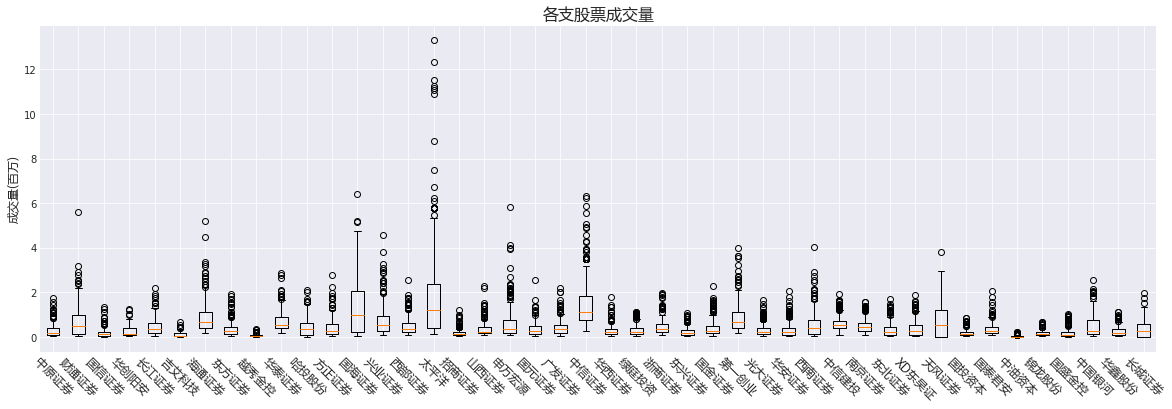

In [73]:
fig = plt.figure(figsize=[20, 6])
ax = fig.add_subplot(1, 1, 1)
ax.boxplot(df_volume.T)
ax.set_title('各支股票成交量', FontProperties=font, fontsize=16)
ax.set_xticklabels(df_volume.columns, FontProperties=font, rotation=-45)
ax.set_ylabel('成交量(百万)', FontProperties=font)
plt.show()

### 各支股票累计成交量折线图

In [74]:
total_volume = df_volume.sum()
# 将各支股票累计成交量按数量大小排序
total_volume_sort_desc = total_volume.sort_values(ascending=False)
total_volume_sort_desc

太平洋      673.163070
中信证券     526.814170
国海证券     454.852386
第一创业     317.733257
海通证券     311.640067
兴业证券     270.437398
天风证券     258.014667
财通证券     249.801852
华泰证券     245.874679
申万宏源     226.499793
中信建投     218.101626
西南证券     201.055545
南京证券     177.789456
西部证券     175.313959
中国银河     169.225982
长江证券     161.820204
浙商证券     158.530095
哈投股份     155.713126
广发证券     152.656235
方正证券     150.710258
国金证券     142.798776
XD东吴证    137.427733
国泰君安     127.418126
山西证券     127.063209
东方证券     125.773384
国元证券     122.916159
长城证券     122.194001
东北证券     115.155191
光大证券     111.655059
绿庭投资     110.122213
华安证券     109.419884
中原证券     105.546469
华西证券     103.858280
华鑫股份      90.571998
东兴证券      84.515638
华创阳安      83.731724
招商证券      69.208955
国信证券      64.880711
国投资本      62.106655
国盛金控      58.353895
锦龙股份      56.955467
吉艾科技      35.855374
越秀金控      21.803476
中油资本      10.747013
dtype: float64

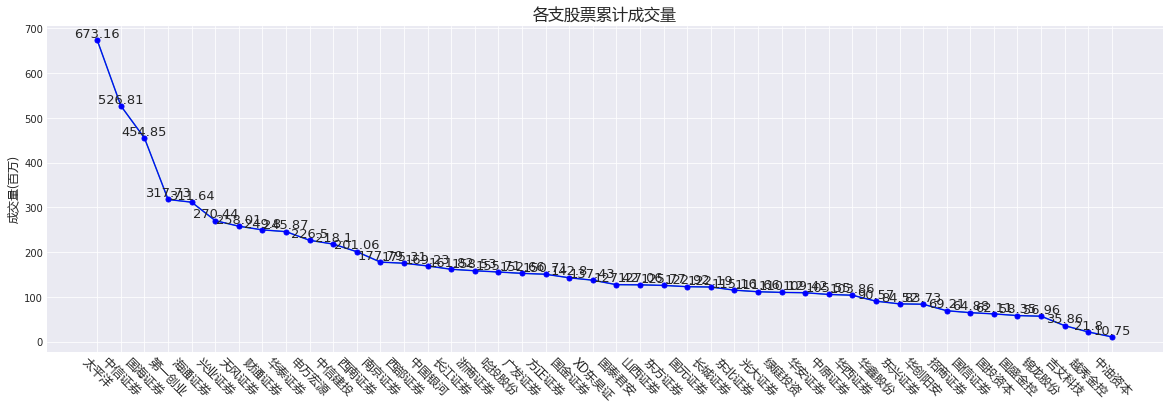

In [75]:
fig = plt.figure(figsize=[20, 6])
ax = fig.add_subplot(1, 1, 1)
ax.plot(total_volume_sort_desc)
plt.plot(total_volume_sort_desc.index,
         total_volume_sort_desc.values,
         linewidth=1,
         color='b',
         marker='o',
         markerfacecolor='blue',
         markersize=5)
ax.set_title('各支股票累计成交量', FontProperties=font, fontsize=16)
ax.set_xticklabels(total_volume_sort_desc.index,
                   FontProperties=font,
                   rotation=-45)
ax.set_ylabel('成交量(百万)', FontProperties=font)
# 设置数字标签
for a, b in zip(total_volume_sort_desc.index, total_volume_sort_desc.values):
    plt.text(a,
             b,
             np.around(b, decimals=2),
             ha='center',
             va='bottom',
             fontsize=13)
plt.show()

## 涨幅分析

In [76]:
def securties_p_change(datas):
    securties_p_change_dict = {}
    for i in datas:
        if datas[i] is not None:
            securties_p_change_dict[i] = datas[i]['p_change']
    return securties_p_change_dict


securties_p_change_dict = securties_p_change(securties_datas)

for i in securties_p_change_dict:
    print(i + '\n' + "-" * 100)
    display(securties_p_change_dict[i])

中原证券
----------------------------------------------------------------------------------------------------


2018-07-01   -0.039545
2018-07-02   -2.780000
2018-07-03    1.770000
2018-07-04   -1.960000
2018-07-05   -1.110000
2018-07-06    2.240000
2018-07-07   -0.039545
2018-07-08   -0.039545
2018-07-09    1.100000
2018-07-10   -0.430000
2018-07-11   -3.900000
2018-07-12    3.620000
2018-07-13   -0.650000
2018-07-14   -0.039545
2018-07-15   -0.039545
2018-07-16   -0.220000
2018-07-17    0.220000
2018-07-18   -0.880000
2018-07-19   -1.110000
2018-07-20    3.140000
2018-07-21   -0.039545
2018-07-22   -0.039545
2018-07-23    1.090000
2018-07-24    1.720000
2018-07-25   -1.050000
2018-07-26    0.850000
2018-07-27   -0.850000
2018-07-28   -0.039545
2018-07-29   -0.039545
2018-07-30   -2.560000
                ...   
2019-06-01    0.254737
2019-06-02    0.254737
2019-06-03   -0.400000
2019-06-04   -1.790000
2019-06-05    0.610000
2019-06-06   -1.810000
2019-06-07    0.254737
2019-06-08    0.254737
2019-06-09    0.254737
2019-06-10    0.410000
2019-06-11    5.090000
2019-06-12   -1.360000
2019-06-13 

财通证券
----------------------------------------------------------------------------------------------------


2018-07-01    0.030455
2018-07-02   -3.810000
2018-07-03    1.660000
2018-07-04   -2.720000
2018-07-05   -0.190000
2018-07-06    0.280000
2018-07-07    0.030455
2018-07-08    0.030455
2018-07-09    1.770000
2018-07-10    0.820000
2018-07-11   -4.250000
2018-07-12    5.210000
2018-07-13   -1.830000
2018-07-14    0.030455
2018-07-15    0.030455
2018-07-16   -0.750000
2018-07-17    0.090000
2018-07-18   -0.660000
2018-07-19   -1.330000
2018-07-20    4.050000
2018-07-21    0.030455
2018-07-22    0.030455
2018-07-23    4.720000
2018-07-24    0.440000
2018-07-25   -1.060000
2018-07-26    0.180000
2018-07-27   -1.870000
2018-07-28    0.030455
2018-07-29    0.030455
2018-07-30   -0.810000
                ...   
2019-06-01    0.380000
2019-06-02    0.380000
2019-06-03    0.490000
2019-06-04   -0.480000
2019-06-05    0.780000
2019-06-06   -1.060000
2019-06-07    0.380000
2019-06-08    0.380000
2019-06-09    0.380000
2019-06-10   -3.710000
2019-06-11    6.990000
2019-06-12   -0.380000
2019-06-13 

国信证券
----------------------------------------------------------------------------------------------------


2018-07-01   -0.016364
2018-07-02   -2.310000
2018-07-03    1.690000
2018-07-04   -1.110000
2018-07-05   -1.340000
2018-07-06    1.020000
2018-07-07   -0.016364
2018-07-08   -0.016364
2018-07-09    1.460000
2018-07-10   -0.440000
2018-07-11   -2.890000
2018-07-12    2.750000
2018-07-13    0.220000
2018-07-14   -0.016364
2018-07-15   -0.016364
2018-07-16    0.000000
2018-07-17   -0.560000
2018-07-18   -0.560000
2018-07-19   -0.450000
2018-07-20    2.140000
2018-07-21   -0.016364
2018-07-22   -0.016364
2018-07-23    0.550000
2018-07-24    1.210000
2018-07-25   -0.980000
2018-07-26   -0.550000
2018-07-27   -0.220000
2018-07-28   -0.016364
2018-07-29   -0.016364
2018-07-30   -1.220000
                ...   
2019-06-01    0.594737
2019-06-02    0.594737
2019-06-03   -1.430000
2019-06-04    0.260000
2019-06-05    1.270000
2019-06-06   -1.170000
2019-06-07    0.594737
2019-06-08    0.594737
2019-06-09    0.594737
2019-06-10   -0.250000
2019-06-11    5.270000
2019-06-12   -1.870000
2019-06-13 

华创阳安
----------------------------------------------------------------------------------------------------


2018-07-01   -0.005455
2018-07-02   -3.750000
2018-07-03    2.460000
2018-07-04   -1.550000
2018-07-05    1.430000
2018-07-06    0.560000
2018-07-07   -0.005455
2018-07-08   -0.005455
2018-07-09    0.980000
2018-07-10    0.140000
2018-07-11   -2.500000
2018-07-12    1.990000
2018-07-13   -1.120000
2018-07-14   -0.005455
2018-07-15   -0.005455
2018-07-16   -0.560000
2018-07-17   -0.140000
2018-07-18   -1.140000
2018-07-19   -1.440000
2018-07-20    3.070000
2018-07-21   -0.005455
2018-07-22   -0.005455
2018-07-23    1.130000
2018-07-24    1.680000
2018-07-25   -0.410000
2018-07-26    0.280000
2018-07-27   -0.410000
2018-07-28   -0.005455
2018-07-29   -0.005455
2018-07-30   -1.660000
                ...   
2019-06-01   -0.210526
2019-06-02   -0.210526
2019-06-03    0.780000
2019-06-04    3.920000
2019-06-05    2.220000
2019-06-06   -1.710000
2019-06-07   -0.210526
2019-06-08   -0.210526
2019-06-09   -0.210526
2019-06-10   -3.750000
2019-06-11    8.360000
2019-06-12   -2.440000
2019-06-13 

长江证券
----------------------------------------------------------------------------------------------------


2018-07-01    0.076818
2018-07-02   -2.390000
2018-07-03    1.320000
2018-07-04   -0.740000
2018-07-05   -1.880000
2018-07-06    1.150000
2018-07-07    0.076818
2018-07-08    0.076818
2018-07-09    2.080000
2018-07-10   -0.370000
2018-07-11   -3.160000
2018-07-12    3.460000
2018-07-13   -0.190000
2018-07-14    0.076818
2018-07-15    0.076818
2018-07-16   -0.190000
2018-07-17    0.000000
2018-07-18   -0.570000
2018-07-19   -0.580000
2018-07-20    1.740000
2018-07-21    0.076818
2018-07-22    0.076818
2018-07-23    0.950000
2018-07-24    4.530000
2018-07-25   -1.260000
2018-07-26   -0.370000
2018-07-27   -1.100000
2018-07-28    0.076818
2018-07-29    0.076818
2018-07-30   -0.930000
                ...   
2019-06-01    0.484737
2019-06-02    0.484737
2019-06-03    0.280000
2019-06-04   -1.250000
2019-06-05    0.280000
2019-06-06    0.000000
2019-06-07    0.484737
2019-06-08    0.484737
2019-06-09    0.484737
2019-06-10   -2.680000
2019-06-11    4.920000
2019-06-12   -0.140000
2019-06-13 

吉艾科技
----------------------------------------------------------------------------------------------------


2018-07-01     0.032727
2018-07-02     7.890000
2018-07-03    -5.850000
2018-07-04     0.440000
2018-07-05    -4.060000
2018-07-06    -2.370000
2018-07-07     0.032727
2018-07-08     0.032727
2018-07-09     1.290000
2018-07-10     2.650000
2018-07-11    -2.930000
2018-07-12     2.660000
2018-07-13     0.600000
2018-07-14     0.032727
2018-07-15     0.032727
2018-07-16     3.270000
2018-07-17    -1.530000
2018-07-18     0.970000
2018-07-19    -0.960000
2018-07-20     2.430000
2018-07-21     0.032727
2018-07-22     0.032727
2018-07-23     0.000000
2018-07-24     0.710000
2018-07-25    -1.370000
2018-07-26    -1.100000
2018-07-27    -2.370000
2018-07-28     0.032727
2018-07-29     0.032727
2018-07-30     0.000000
                ...    
2019-06-01    -0.625789
2019-06-02    -0.625789
2019-06-03    -3.440000
2019-06-04     0.550000
2019-06-05    -6.260000
2019-06-06    -1.740000
2019-06-07    -0.625789
2019-06-08    -0.625789
2019-06-09    -0.625789
2019-06-10     4.730000
2019-06-11     4

海通证券
----------------------------------------------------------------------------------------------------


2018-07-01    0.028182
2018-07-02   -2.530000
2018-07-03    1.300000
2018-07-04   -1.070000
2018-07-05   -1.410000
2018-07-06    0.990000
2018-07-07    0.028182
2018-07-08    0.028182
2018-07-09    1.740000
2018-07-10   -0.430000
2018-07-11   -2.360000
2018-07-12    2.970000
2018-07-13   -0.640000
2018-07-14    0.028182
2018-07-15    0.028182
2018-07-16   -0.430000
2018-07-17   -1.080000
2018-07-18   -0.220000
2018-07-19   -0.110000
2018-07-20    2.850000
2018-07-21    0.028182
2018-07-22    0.028182
2018-07-23    0.430000
2018-07-24    3.920000
2018-07-25   -0.820000
2018-07-26   -1.540000
2018-07-27   -0.730000
2018-07-28    0.028182
2018-07-29    0.028182
2018-07-30   -0.210000
                ...   
2019-06-01    0.871579
2019-06-02    0.871579
2019-06-03    1.570000
2019-06-04    1.060000
2019-06-05    2.500000
2019-06-06   -1.180000
2019-06-07    0.871579
2019-06-08    0.871579
2019-06-09    0.871579
2019-06-10   -1.510000
2019-06-11    5.890000
2019-06-12   -1.830000
2019-06-13 

东方证券
----------------------------------------------------------------------------------------------------


2018-07-01    0.143182
2018-07-02   -2.300000
2018-07-03    0.560000
2018-07-04   -0.340000
2018-07-05    0.110000
2018-07-06    0.340000
2018-07-07    0.143182
2018-07-08    0.143182
2018-07-09    1.680000
2018-07-10   -0.680000
2018-07-11   -6.020000
2018-07-12    3.270000
2018-07-13    1.520000
2018-07-14    0.143182
2018-07-15    0.143182
2018-07-16    0.230000
2018-07-17    1.150000
2018-07-18   -0.680000
2018-07-19   -2.180000
2018-07-20    3.400000
2018-07-21    0.143182
2018-07-22    0.143182
2018-07-23    1.930000
2018-07-24    2.000000
2018-07-25   -0.980000
2018-07-26   -0.220000
2018-07-27   -1.540000
2018-07-28    0.143182
2018-07-29    0.143182
2018-07-30   -0.220000
                ...   
2019-06-01    0.232632
2019-06-02    0.232632
2019-06-03   -0.680000
2019-06-04   -0.200000
2019-06-05    0.200000
2019-06-06   -1.770000
2019-06-07    0.232632
2019-06-08    0.232632
2019-06-09    0.232632
2019-06-10   -0.800000
2019-06-11    4.540000
2019-06-12   -1.640000
2019-06-13 

越秀金控
----------------------------------------------------------------------------------------------------


2018-07-01    0.118636
2018-07-02   -1.020000
2018-07-03    0.900000
2018-07-04   -2.170000
2018-07-05   -4.040000
2018-07-06   -2.850000
2018-07-07    0.118636
2018-07-08    0.118636
2018-07-09    3.210000
2018-07-10    0.140000
2018-07-11   -3.110000
2018-07-12    2.790000
2018-07-13    2.040000
2018-07-14    0.118636
2018-07-15    0.118636
2018-07-16   -1.600000
2018-07-17   -1.350000
2018-07-18    0.140000
2018-07-19   -1.780000
2018-07-20    5.150000
2018-07-21    0.118636
2018-07-22    0.118636
2018-07-23   -0.660000
2018-07-24    2.270000
2018-07-25   -0.520000
2018-07-26    1.180000
2018-07-27   -0.130000
2018-07-28    0.118636
2018-07-29    0.118636
2018-07-30   -2.210000
                ...   
2019-06-01   -0.019474
2019-06-02   -0.019474
2019-06-03    0.000000
2019-06-04   -0.870000
2019-06-05    0.000000
2019-06-06   -2.110000
2019-06-07   -0.019474
2019-06-08   -0.019474
2019-06-09   -0.019474
2019-06-10    1.140000
2019-06-11    4.380000
2019-06-12   -1.290000
2019-06-13 

华泰证券
----------------------------------------------------------------------------------------------------


2018-07-01    0.187727
2018-07-02   -4.140000
2018-07-03    2.230000
2018-07-04   -1.770000
2018-07-05   -1.530000
2018-07-06    0.850000
2018-07-07    0.187727
2018-07-08    0.187727
2018-07-09    2.520000
2018-07-10    0.340000
2018-07-11   -3.610000
2018-07-12    3.960000
2018-07-13   -0.540000
2018-07-14    0.187727
2018-07-15    0.187727
2018-07-16    0.480000
2018-07-17   -0.950000
2018-07-18   -0.340000
2018-07-19    0.410000
2018-07-20    5.900000
2018-07-21    0.187727
2018-07-22    0.187727
2018-07-23    2.590000
2018-07-24   -0.130000
2018-07-25    0.570000
2018-07-26   -2.070000
2018-07-27   -0.320000
2018-07-28    0.187727
2018-07-29    0.187727
2018-07-30    0.320000
                ...   
2019-06-01    0.997368
2019-06-02    0.997368
2019-06-03    1.020000
2019-06-04    0.320000
2019-06-05    0.420000
2019-06-06   -1.110000
2019-06-07    0.997368
2019-06-08    0.997368
2019-06-09    0.997368
2019-06-10   -1.920000
2019-06-11    5.330000
2019-06-12   -0.620000
2019-06-13 

哈投股份
----------------------------------------------------------------------------------------------------


2018-07-01    -0.033182
2018-07-02    -2.000000
2018-07-03     0.910000
2018-07-04    -0.670000
2018-07-05    -1.580000
2018-07-06     1.830000
2018-07-07    -0.033182
2018-07-08    -0.033182
2018-07-09    -0.230000
2018-07-10    -0.450000
2018-07-11    -4.990000
2018-07-12     2.880000
2018-07-13    -0.230000
2018-07-14    -0.033182
2018-07-15    -0.033182
2018-07-16    -1.170000
2018-07-17     0.230000
2018-07-18     0.470000
2018-07-19    -2.560000
2018-07-20     2.630000
2018-07-21    -0.033182
2018-07-22    -0.033182
2018-07-23     1.860000
2018-07-24     2.980000
2018-07-25     0.000000
2018-07-26     1.560000
2018-07-27    -0.660000
2018-07-28    -0.033182
2018-07-29    -0.033182
2018-07-30    -1.540000
                ...    
2019-06-01     1.244737
2019-06-02     1.244737
2019-06-03    -0.160000
2019-06-04     5.290000
2019-06-05     1.220000
2019-06-06    -1.050000
2019-06-07     1.244737
2019-06-08     1.244737
2019-06-09     1.244737
2019-06-10    -3.500000
2019-06-11    10

方正证券
----------------------------------------------------------------------------------------------------


2018-07-01    0.085455
2018-07-02   -0.300000
2018-07-03    1.050000
2018-07-04   -2.810000
2018-07-05   -0.150000
2018-07-06    0.610000
2018-07-07    0.085455
2018-07-08    0.085455
2018-07-09    2.880000
2018-07-10   -0.290000
2018-07-11   -3.700000
2018-07-12    2.760000
2018-07-13   -0.890000
2018-07-14    0.085455
2018-07-15    0.085455
2018-07-16    0.000000
2018-07-17   -3.010000
2018-07-18   -0.620000
2018-07-19    0.310000
2018-07-20    4.830000
2018-07-21    0.085455
2018-07-22    0.085455
2018-07-23    2.380000
2018-07-24    0.000000
2018-07-25   -0.290000
2018-07-26   -0.730000
2018-07-27    0.150000
2018-07-28    0.085455
2018-07-29    0.085455
2018-07-30    0.290000
                ...   
2019-06-01   -0.020526
2019-06-02   -0.020526
2019-06-03    0.140000
2019-06-04    0.560000
2019-06-05   -0.970000
2019-06-06   -0.420000
2019-06-07   -0.020526
2019-06-08   -0.020526
2019-06-09   -0.020526
2019-06-10   -4.630000
2019-06-11    4.860000
2019-06-12   -0.140000
2019-06-13 

国海证券
----------------------------------------------------------------------------------------------------


2018-07-01   -0.025909
2018-07-02   -2.800000
2018-07-03    2.310000
2018-07-04   -1.130000
2018-07-05   -2.280000
2018-07-06    1.460000
2018-07-07   -0.025909
2018-07-08   -0.025909
2018-07-09    1.720000
2018-07-10   -0.850000
2018-07-11   -2.850000
2018-07-12    2.350000
2018-07-13   -1.150000
2018-07-14   -0.025909
2018-07-15   -0.025909
2018-07-16   -0.870000
2018-07-17    0.000000
2018-07-18   -0.290000
2018-07-19   -0.880000
2018-07-20    2.070000
2018-07-21   -0.025909
2018-07-22   -0.025909
2018-07-23    0.580000
2018-07-24    2.880000
2018-07-25   -0.280000
2018-07-26    0.560000
2018-07-27   -0.840000
2018-07-28   -0.025909
2018-07-29   -0.025909
2018-07-30   -1.130000
                ...   
2019-06-01    0.193684
2019-06-02    0.193684
2019-06-03    0.000000
2019-06-04   -1.230000
2019-06-05    0.210000
2019-06-06   -1.240000
2019-06-07    0.193684
2019-06-08    0.193684
2019-06-09    0.193684
2019-06-10   -1.680000
2019-06-11    9.170000
2019-06-12   -2.150000
2019-06-13 

兴业证券
----------------------------------------------------------------------------------------------------


2018-07-01   -0.380455
2018-07-02   -2.090000
2018-07-03    1.740000
2018-07-04   -1.330000
2018-07-05   -1.350000
2018-07-06    0.390000
2018-07-07   -0.380455
2018-07-08   -0.380455
2018-07-09    1.560000
2018-07-10    0.580000
2018-07-11   -2.100000
2018-07-12    2.730000
2018-07-13   -0.190000
2018-07-14   -0.380455
2018-07-15   -0.380455
2018-07-16   -0.950000
2018-07-17   -0.960000
2018-07-18   -0.390000
2018-07-19   -0.580000
2018-07-20    2.530000
2018-07-21   -0.380455
2018-07-22   -0.380455
2018-07-23    1.140000
2018-07-24   -0.750000
2018-07-25   -2.840000
2018-07-26   -0.580000
2018-07-27   -0.780000
2018-07-28   -0.380455
2018-07-29   -0.380455
2018-07-30   -4.150000
                ...   
2019-06-01    0.482105
2019-06-02    0.482105
2019-06-03   -0.320000
2019-06-04    0.160000
2019-06-05    0.810000
2019-06-06   -0.960000
2019-06-07    0.482105
2019-06-08    0.482105
2019-06-09    0.482105
2019-06-10   -1.950000
2019-06-11    5.300000
2019-06-12   -0.940000
2019-06-13 

西部证券
----------------------------------------------------------------------------------------------------


2018-07-01   -0.020000
2018-07-02   -3.710000
2018-07-03    3.850000
2018-07-04   -2.250000
2018-07-05   -1.900000
2018-07-06    0.280000
2018-07-07   -0.020000
2018-07-08   -0.020000
2018-07-09    1.790000
2018-07-10    1.490000
2018-07-11   -3.070000
2018-07-12    4.810000
2018-07-13    0.000000
2018-07-14   -0.020000
2018-07-15   -0.020000
2018-07-16   -1.310000
2018-07-17   -0.930000
2018-07-18   -1.750000
2018-07-19   -0.680000
2018-07-20    2.750000
2018-07-21   -0.020000
2018-07-22   -0.020000
2018-07-23    0.270000
2018-07-24    1.330000
2018-07-25    0.260000
2018-07-26    0.660000
2018-07-27    0.000000
2018-07-28   -0.020000
2018-07-29   -0.020000
2018-07-30   -2.870000
                ...   
2019-06-01    0.169474
2019-06-02    0.169474
2019-06-03   -0.100000
2019-06-04   -1.740000
2019-06-05    0.420000
2019-06-06    3.930000
2019-06-07    0.169474
2019-06-08    0.169474
2019-06-09    0.169474
2019-06-10   -1.890000
2019-06-11    4.770000
2019-06-12   -1.740000
2019-06-13 

太平洋
----------------------------------------------------------------------------------------------------


2018-07-01    0.108636
2018-07-02   -2.560000
2018-07-03    1.320000
2018-07-04   -1.300000
2018-07-05   -0.440000
2018-07-06    0.890000
2018-07-07    0.108636
2018-07-08    0.108636
2018-07-09    1.760000
2018-07-10    1.300000
2018-07-11   -2.980000
2018-07-12    2.620000
2018-07-13   -0.420000
2018-07-14    0.108636
2018-07-15    0.108636
2018-07-16   -0.850000
2018-07-17   -0.850000
2018-07-18   -0.860000
2018-07-19   -0.430000
2018-07-20    2.180000
2018-07-21    0.108636
2018-07-22    0.108636
2018-07-23    0.430000
2018-07-24    2.130000
2018-07-25   -0.410000
2018-07-26    2.080000
2018-07-27   -0.820000
2018-07-28    0.108636
2018-07-29    0.108636
2018-07-30   -1.240000
                ...   
2019-06-01    0.173684
2019-06-02    0.173684
2019-06-03   -0.290000
2019-06-04   -1.740000
2019-06-05    0.000000
2019-06-06   -1.770000
2019-06-07    0.173684
2019-06-08    0.173684
2019-06-09    0.173684
2019-06-10   -0.300000
2019-06-11    6.630000
2019-06-12   -2.260000
2019-06-13 

招商证券
----------------------------------------------------------------------------------------------------


2018-07-01   -0.051818
2018-07-02   -3.000000
2018-07-03    1.050000
2018-07-04   -1.340000
2018-07-05   -1.660000
2018-07-06   -0.080000
2018-07-07   -0.051818
2018-07-08   -0.051818
2018-07-09    1.540000
2018-07-10   -0.080000
2018-07-11   -3.250000
2018-07-12    3.210000
2018-07-13   -0.230000
2018-07-14   -0.051818
2018-07-15   -0.051818
2018-07-16   -0.380000
2018-07-17   -0.990000
2018-07-18   -0.850000
2018-07-19   -1.090000
2018-07-20    4.080000
2018-07-21   -0.051818
2018-07-22   -0.051818
2018-07-23    3.020000
2018-07-24    1.610000
2018-07-25   -0.870000
2018-07-26   -0.730000
2018-07-27   -0.660000
2018-07-28   -0.051818
2018-07-29   -0.051818
2018-07-30   -0.960000
                ...   
2019-06-01    0.545789
2019-06-02    0.545789
2019-06-03   -0.130000
2019-06-04    0.580000
2019-06-05   -0.260000
2019-06-06   -1.360000
2019-06-07    0.545789
2019-06-08    0.545789
2019-06-09    0.545789
2019-06-10    0.260000
2019-06-11    3.920000
2019-06-12   -0.940000
2019-06-13 

山西证券
----------------------------------------------------------------------------------------------------


2018-07-01   -0.011364
2018-07-02   -2.520000
2018-07-03    1.670000
2018-07-04   -1.350000
2018-07-05   -2.430000
2018-07-06    3.270000
2018-07-07   -0.011364
2018-07-08   -0.011364
2018-07-09    1.510000
2018-07-10    0.150000
2018-07-11   -3.560000
2018-07-12    3.070000
2018-07-13   -0.890000
2018-07-14   -0.011364
2018-07-15   -0.011364
2018-07-16   -0.150000
2018-07-17    0.000000
2018-07-18   -1.210000
2018-07-19   -1.220000
2018-07-20    2.930000
2018-07-21   -0.011364
2018-07-22   -0.011364
2018-07-23    1.500000
2018-07-24    1.030000
2018-07-25   -0.730000
2018-07-26   -0.290000
2018-07-27   -0.590000
2018-07-28   -0.011364
2018-07-29   -0.011364
2018-07-30   -1.190000
                ...   
2019-06-01    0.084211
2019-06-02    0.084211
2019-06-03   -0.120000
2019-06-04   -0.500000
2019-06-05    0.250000
2019-06-06   -1.000000
2019-06-07    0.084211
2019-06-08    0.084211
2019-06-09    0.084211
2019-06-10   -1.900000
2019-06-11    5.040000
2019-06-12   -0.860000
2019-06-13 

申万宏源
----------------------------------------------------------------------------------------------------


2018-07-01    0.078182
2018-07-02   -0.920000
2018-07-03    0.690000
2018-07-04   -0.690000
2018-07-05   -1.390000
2018-07-06    0.940000
2018-07-07    0.078182
2018-07-08    0.078182
2018-07-09    1.620000
2018-07-10    0.000000
2018-07-11   -2.060000
2018-07-12    2.330000
2018-07-13   -0.460000
2018-07-14    0.078182
2018-07-15    0.078182
2018-07-16    0.690000
2018-07-17   -0.460000
2018-07-18   -1.370000
2018-07-19   -0.230000
2018-07-20    2.090000
2018-07-21    0.078182
2018-07-22    0.078182
2018-07-23    0.910000
2018-07-24    1.580000
2018-07-25   -1.110000
2018-07-26    0.450000
2018-07-27   -0.890000
2018-07-28    0.078182
2018-07-29    0.078182
2018-07-30    0.000000
                ...   
2019-06-01    0.327368
2019-06-02    0.327368
2019-06-03    0.210000
2019-06-04   -0.850000
2019-06-05    0.640000
2019-06-06   -1.480000
2019-06-07    0.327368
2019-06-08    0.327368
2019-06-09    0.327368
2019-06-10    0.210000
2019-06-11    4.510000
2019-06-12   -1.230000
2019-06-13 

国元证券
----------------------------------------------------------------------------------------------------


2018-07-01   -0.120455
2018-07-02   -2.350000
2018-07-03    1.700000
2018-07-04   -1.250000
2018-07-05   -0.840000
2018-07-06    1.560000
2018-07-07   -0.120455
2018-07-08   -0.120455
2018-07-09    1.400000
2018-07-10   -0.550000
2018-07-11   -3.880000
2018-07-12    2.310000
2018-07-13   -0.280000
2018-07-14   -0.120455
2018-07-15   -0.120455
2018-07-16   -0.990000
2018-07-17   -1.000000
2018-07-18   -0.860000
2018-07-19   -1.020000
2018-07-20    2.500000
2018-07-21   -0.120455
2018-07-22   -0.120455
2018-07-23    1.290000
2018-07-24    2.260000
2018-07-25   -1.110000
2018-07-26    0.000000
2018-07-27   -0.420000
2018-07-28   -0.120455
2018-07-29   -0.120455
2018-07-30   -1.690000
                ...   
2019-06-01    0.007368
2019-06-02    0.007368
2019-06-03    0.110000
2019-06-04   -1.090000
2019-06-05    0.880000
2019-06-06   -0.650000
2019-06-07    0.007368
2019-06-08    0.007368
2019-06-09    0.007368
2019-06-10   -5.260000
2019-06-11    4.970000
2019-06-12    0.220000
2019-06-13 

广发证券
----------------------------------------------------------------------------------------------------


2018-07-01    0.047273
2018-07-02   -0.150000
2018-07-03    0.680000
2018-07-04   -0.450000
2018-07-05   -0.750000
2018-07-06   -0.380000
2018-07-07    0.047273
2018-07-08    0.047273
2018-07-09    1.370000
2018-07-10    0.000000
2018-07-11   -1.950000
2018-07-12    1.760000
2018-07-13   -1.050000
2018-07-14    0.047273
2018-07-15    0.047273
2018-07-16   -0.380000
2018-07-17   -0.460000
2018-07-18   -0.840000
2018-07-19    0.230000
2018-07-20    2.320000
2018-07-21    0.047273
2018-07-22    0.047273
2018-07-23    0.910000
2018-07-24    1.950000
2018-07-25   -0.440000
2018-07-26   -0.370000
2018-07-27   -0.440000
2018-07-28    0.047273
2018-07-29    0.047273
2018-07-30   -0.450000
                ...   
2019-06-01    0.320000
2019-06-02    0.320000
2019-06-03   -0.310000
2019-06-04   -1.470000
2019-06-05    0.390000
2019-06-06   -0.940000
2019-06-07    0.320000
2019-06-08    0.320000
2019-06-09    0.320000
2019-06-10   -1.340000
2019-06-11    4.640000
2019-06-12   -1.070000
2019-06-13 

中信证券
----------------------------------------------------------------------------------------------------


2018-07-01    0.103182
2018-07-02   -3.200000
2018-07-03    1.680000
2018-07-04   -1.350000
2018-07-05   -0.430000
2018-07-06    0.870000
2018-07-07    0.103182
2018-07-08    0.103182
2018-07-09    2.100000
2018-07-10    0.060000
2018-07-11   -2.600000
2018-07-12    3.170000
2018-07-13    0.120000
2018-07-14    0.103182
2018-07-15    0.103182
2018-07-16   -0.420000
2018-07-17   -1.150000
2018-07-18   -0.800000
2018-07-19    0.430000
2018-07-20    3.570000
2018-07-21    0.103182
2018-07-22    0.103182
2018-07-23    1.780000
2018-07-24    1.050000
2018-07-25   -0.290000
2018-07-26   -2.030000
2018-07-27   -0.470000
2018-07-28    0.103182
2018-07-29    0.103182
2018-07-30    0.830000
                ...   
2019-06-01    0.911053
2019-06-02    0.911053
2019-06-03    0.300000
2019-06-04   -0.300000
2019-06-05    0.990000
2019-06-06   -1.280000
2019-06-07    0.911053
2019-06-08    0.911053
2019-06-09    0.911053
2019-06-10    0.050000
2019-06-11    5.030000
2019-06-12   -1.330000
2019-06-13 

华西证券
----------------------------------------------------------------------------------------------------


2018-07-01    0.007727
2018-07-02   -3.490000
2018-07-03    1.550000
2018-07-04   -3.050000
2018-07-05   -0.100000
2018-07-06    0.420000
2018-07-07    0.007727
2018-07-08    0.007727
2018-07-09    1.570000
2018-07-10    0.210000
2018-07-11   -3.390000
2018-07-12    6.800000
2018-07-13   -2.090000
2018-07-14    0.007727
2018-07-15    0.007727
2018-07-16   -0.810000
2018-07-17   -0.100000
2018-07-18   -1.850000
2018-07-19   -0.840000
2018-07-20    4.000000
2018-07-21    0.007727
2018-07-22    0.007727
2018-07-23    1.620000
2018-07-24    1.700000
2018-07-25   -0.690000
2018-07-26   -0.890000
2018-07-27   -0.600000
2018-07-28    0.007727
2018-07-29    0.007727
2018-07-30    0.000000
                ...   
2019-06-01    0.487895
2019-06-02    0.487895
2019-06-03    0.730000
2019-06-04    0.830000
2019-06-05    0.100000
2019-06-06    0.310000
2019-06-07    0.487895
2019-06-08    0.487895
2019-06-09    0.487895
2019-06-10   -1.330000
2019-06-11    5.070000
2019-06-12   -0.590000
2019-06-13 

绿庭投资
----------------------------------------------------------------------------------------------------


2018-07-01     0.008636
2018-07-02     3.130000
2018-07-03    -1.010000
2018-07-04    -6.620000
2018-07-05    10.080000
2018-07-06    -2.970000
2018-07-07     0.008636
2018-07-08     0.008636
2018-07-09    -0.250000
2018-07-10    -3.060000
2018-07-11    -8.950000
2018-07-12     2.890000
2018-07-13     3.930000
2018-07-14     0.008636
2018-07-15     0.008636
2018-07-16     0.270000
2018-07-17     2.170000
2018-07-18     0.800000
2018-07-19    -4.490000
2018-07-20     2.770000
2018-07-21     0.008636
2018-07-22     0.008636
2018-07-23    -1.620000
2018-07-24     1.920000
2018-07-25     2.150000
2018-07-26     5.530000
2018-07-27    -3.730000
2018-07-28     0.008636
2018-07-29     0.008636
2018-07-30    -4.640000
                ...    
2019-06-01    -0.037895
2019-06-02    -0.037895
2019-06-03     0.160000
2019-06-04    -4.350000
2019-06-05     0.490000
2019-06-06    -1.130000
2019-06-07    -0.037895
2019-06-08    -0.037895
2019-06-09    -0.037895
2019-06-10    -0.330000
2019-06-11     7

浙商证券
----------------------------------------------------------------------------------------------------


2018-07-01   -0.312273
2018-07-02   -5.950000
2018-07-03    1.900000
2018-07-04   -2.110000
2018-07-05   -1.400000
2018-07-06   -0.640000
2018-07-07   -0.312273
2018-07-08   -0.312273
2018-07-09    2.080000
2018-07-10    0.130000
2018-07-11   -5.470000
2018-07-12    4.850000
2018-07-13   -0.770000
2018-07-14   -0.312273
2018-07-15   -0.312273
2018-07-16   -1.040000
2018-07-17    0.790000
2018-07-18   -0.650000
2018-07-19   -2.100000
2018-07-20    4.540000
2018-07-21   -0.312273
2018-07-22   -0.312273
2018-07-23    3.330000
2018-07-24    0.620000
2018-07-25   -1.110000
2018-07-26   -0.620000
2018-07-27   -0.630000
2018-07-28   -0.312273
2018-07-29   -0.312273
2018-07-30   -3.410000
                ...   
2019-06-01    0.332105
2019-06-02    0.332105
2019-06-03   -0.230000
2019-06-04   -1.590000
2019-06-05    1.610000
2019-06-06   -2.060000
2019-06-07    0.332105
2019-06-08    0.332105
2019-06-09    0.332105
2019-06-10    2.800000
2019-06-11    5.330000
2019-06-12   -1.720000
2019-06-13 

东兴证券
----------------------------------------------------------------------------------------------------


2018-07-01   -0.155909
2018-07-02   -2.300000
2018-07-03    1.410000
2018-07-04   -1.860000
2018-07-05    0.240000
2018-07-06    0.550000
2018-07-07   -0.155909
2018-07-08   -0.155909
2018-07-09    1.490000
2018-07-10    0.000000
2018-07-11   -2.400000
2018-07-12    1.750000
2018-07-13   -1.320000
2018-07-14   -0.155909
2018-07-15   -0.155909
2018-07-16   -0.240000
2018-07-17   -0.160000
2018-07-18   -0.160000
2018-07-19   -1.510000
2018-07-20    1.850000
2018-07-21   -0.155909
2018-07-22   -0.155909
2018-07-23    0.630000
2018-07-24    1.180000
2018-07-25   -0.850000
2018-07-26   -0.550000
2018-07-27    0.080000
2018-07-28   -0.155909
2018-07-29   -0.155909
2018-07-30   -1.500000
                ...   
2019-06-01    0.115789
2019-06-02    0.115789
2019-06-03    0.090000
2019-06-04   -0.770000
2019-06-05    0.340000
2019-06-06   -1.720000
2019-06-07    0.115789
2019-06-08    0.115789
2019-06-09    0.115789
2019-06-10   -0.350000
2019-06-11    4.570000
2019-06-12   -1.590000
2019-06-13 

国金证券
----------------------------------------------------------------------------------------------------


2018-07-01   -0.001364
2018-07-02   -3.380000
2018-07-03    3.940000
2018-07-04   -1.260000
2018-07-05   -2.130000
2018-07-06    2.610000
2018-07-07   -0.001364
2018-07-08   -0.001364
2018-07-09    1.270000
2018-07-10   -0.280000
2018-07-11   -3.500000
2018-07-12    2.900000
2018-07-13   -0.140000
2018-07-14   -0.001364
2018-07-15   -0.001364
2018-07-16   -0.850000
2018-07-17    0.140000
2018-07-18   -1.000000
2018-07-19   -1.150000
2018-07-20    2.190000
2018-07-21   -0.001364
2018-07-22   -0.001364
2018-07-23    1.000000
2018-07-24    1.970000
2018-07-25   -0.690000
2018-07-26   -0.420000
2018-07-27   -0.280000
2018-07-28   -0.001364
2018-07-29   -0.001364
2018-07-30   -1.400000
                ...   
2019-06-01    0.365789
2019-06-02    0.365789
2019-06-03    0.220000
2019-06-04   -1.100000
2019-06-05    0.890000
2019-06-06   -0.770000
2019-06-07    0.365789
2019-06-08    0.365789
2019-06-09    0.365789
2019-06-10   -1.550000
2019-06-11    5.170000
2019-06-12   -1.180000
2019-06-13 

第一创业
----------------------------------------------------------------------------------------------------


2018-07-01   -0.460455
2018-07-02   -3.400000
2018-07-03    1.680000
2018-07-04   -3.760000
2018-07-05   -2.660000
2018-07-06    1.120000
2018-07-07   -0.460455
2018-07-08   -0.460455
2018-07-09    1.590000
2018-07-10   -0.310000
2018-07-11   -4.390000
2018-07-12    2.620000
2018-07-13   -0.800000
2018-07-14   -0.460455
2018-07-15   -0.460455
2018-07-16   -1.610000
2018-07-17    0.160000
2018-07-18   -0.980000
2018-07-19   -1.320000
2018-07-20    2.680000
2018-07-21   -0.460455
2018-07-22   -0.460455
2018-07-23    0.490000
2018-07-24    1.780000
2018-07-25   -1.270000
2018-07-26   -0.160000
2018-07-27    0.650000
2018-07-28   -0.460455
2018-07-29   -0.460455
2018-07-30   -2.730000
                ...   
2019-06-01    0.132105
2019-06-02    0.132105
2019-06-03   -1.930000
2019-06-04   -1.800000
2019-06-05    1.170000
2019-06-06   -1.320000
2019-06-07    0.132105
2019-06-08    0.132105
2019-06-09    0.132105
2019-06-10   -1.340000
2019-06-11    5.930000
2019-06-12   -0.800000
2019-06-13 

光大证券
----------------------------------------------------------------------------------------------------


2018-07-01    0.091364
2018-07-02   -2.100000
2018-07-03    1.770000
2018-07-04   -0.460000
2018-07-05   -2.570000
2018-07-06    1.250000
2018-07-07    0.091364
2018-07-08    0.091364
2018-07-09    1.610000
2018-07-10    0.090000
2018-07-11   -3.910000
2018-07-12    3.880000
2018-07-13    1.030000
2018-07-14    0.091364
2018-07-15    0.091364
2018-07-16    0.280000
2018-07-17   -1.380000
2018-07-18   -0.560000
2018-07-19   -1.780000
2018-07-20    3.250000
2018-07-21    0.091364
2018-07-22    0.091364
2018-07-23    2.040000
2018-07-24    1.180000
2018-07-25    0.000000
2018-07-26   -0.270000
2018-07-27   -1.530000
2018-07-28    0.091364
2018-07-29    0.091364
2018-07-30    0.280000
                ...   
2019-06-01    0.168947
2019-06-02    0.168947
2019-06-03   -7.980000
2019-06-04   -1.460000
2019-06-05    3.460000
2019-06-06    0.190000
2019-06-07    0.168947
2019-06-08    0.168947
2019-06-09    0.168947
2019-06-10   -1.340000
2019-06-11    5.900000
2019-06-12   -2.100000
2019-06-13 

华安证券
----------------------------------------------------------------------------------------------------


2018-07-01    0.012727
2018-07-02   -1.920000
2018-07-03    0.900000
2018-07-04   -1.970000
2018-07-05   -0.910000
2018-07-06    1.290000
2018-07-07    0.012727
2018-07-08    0.012727
2018-07-09    1.450000
2018-07-10    0.180000
2018-07-11   -3.210000
2018-07-12    3.320000
2018-07-13   -0.360000
2018-07-14    0.012727
2018-07-15    0.012727
2018-07-16   -0.900000
2018-07-17    0.180000
2018-07-18   -0.540000
2018-07-19   -1.270000
2018-07-20    3.120000
2018-07-21    0.012727
2018-07-22    0.012727
2018-07-23    0.890000
2018-07-24    2.120000
2018-07-25   -1.040000
2018-07-26    0.170000
2018-07-27   -0.870000
2018-07-28    0.012727
2018-07-29    0.012727
2018-07-30   -0.530000
                ...   
2019-06-01    0.387368
2019-06-02    0.387368
2019-06-03   -0.160000
2019-06-04   -0.980000
2019-06-05    0.660000
2019-06-06   -0.820000
2019-06-07    0.387368
2019-06-08    0.387368
2019-06-09    0.387368
2019-06-10   -2.140000
2019-06-11    5.880000
2019-06-12   -0.640000
2019-06-13 

西南证券
----------------------------------------------------------------------------------------------------


2018-07-01    0.125455
2018-07-02   -2.860000
2018-07-03    2.140000
2018-07-04   -1.050000
2018-07-05   -2.120000
2018-07-06    2.160000
2018-07-07    0.125455
2018-07-08    0.125455
2018-07-09    2.120000
2018-07-10   -0.520000
2018-07-11   -3.650000
2018-07-12    3.510000
2018-07-13   -0.780000
2018-07-14    0.125455
2018-07-15    0.125455
2018-07-16   -0.790000
2018-07-17    0.000000
2018-07-18   -0.530000
2018-07-19   -0.800000
2018-07-20    1.910000
2018-07-21    0.125455
2018-07-22    0.125455
2018-07-23    1.340000
2018-07-24    3.170000
2018-07-25   -0.770000
2018-07-26    0.000000
2018-07-27    1.290000
2018-07-28    0.125455
2018-07-29    0.125455
2018-07-30   -1.790000
                ...   
2019-06-01    0.329474
2019-06-02    0.329474
2019-06-03    0.210000
2019-06-04   -1.070000
2019-06-05    0.430000
2019-06-06   -1.290000
2019-06-07    0.329474
2019-06-08    0.329474
2019-06-09    0.329474
2019-06-10   -1.090000
2019-06-11    5.520000
2019-06-12   -0.630000
2019-06-13 

中信建投
----------------------------------------------------------------------------------------------------


2018-07-01    -0.261818
2018-07-02    -4.370000
2018-07-03     0.880000
2018-07-04   -10.030000
2018-07-05     1.610000
2018-07-06    -1.160000
2018-07-07    -0.261818
2018-07-08    -0.261818
2018-07-09     0.640000
2018-07-10     3.190000
2018-07-11    -3.610000
2018-07-12     9.960000
2018-07-13    -3.990000
2018-07-14    -0.261818
2018-07-15    -0.261818
2018-07-16    -2.430000
2018-07-17     1.660000
2018-07-18    -4.490000
2018-07-19     0.750000
2018-07-20     4.360000
2018-07-21    -0.261818
2018-07-22    -0.261818
2018-07-23    -1.630000
2018-07-24     6.520000
2018-07-25     2.330000
2018-07-26    -2.850000
2018-07-27    -2.050000
2018-07-28    -0.261818
2018-07-29    -0.261818
2018-07-30     1.800000
                ...    
2019-06-01    -0.312105
2019-06-02    -0.312105
2019-06-03     1.870000
2019-06-04    -0.130000
2019-06-05    -0.510000
2019-06-06    -2.360000
2019-06-07    -0.312105
2019-06-08    -0.312105
2019-06-09    -0.312105
2019-06-10    -8.310000
2019-06-11     5

南京证券
----------------------------------------------------------------------------------------------------


2018-07-01    -0.180000
2018-07-02     1.290000
2018-07-03    -4.100000
2018-07-04    -9.960000
2018-07-05    10.010000
2018-07-06     1.530000
2018-07-07    -0.180000
2018-07-08    -0.180000
2018-07-09     2.360000
2018-07-10     2.770000
2018-07-11    -0.900000
2018-07-12     9.960000
2018-07-13     3.540000
2018-07-14    -0.180000
2018-07-15    -0.180000
2018-07-16    -5.810000
2018-07-17    -2.710000
2018-07-18    -4.530000
2018-07-19    -3.290000
2018-07-20     6.800000
2018-07-21    -0.180000
2018-07-22    -0.180000
2018-07-23    -2.920000
2018-07-24     2.910000
2018-07-25    -2.030000
2018-07-26    -4.150000
2018-07-27     0.280000
2018-07-28    -0.180000
2018-07-29    -0.180000
2018-07-30    -4.130000
                ...    
2019-06-01    -0.770526
2019-06-02    -0.770526
2019-06-03     0.600000
2019-06-04    -2.140000
2019-06-05    -0.350000
2019-06-06    -4.030000
2019-06-07    -0.770526
2019-06-08    -0.770526
2019-06-09    -0.770526
2019-06-10    -5.940000
2019-06-11     5

东北证券
----------------------------------------------------------------------------------------------------


2018-07-01   -0.034091
2018-07-02   -2.650000
2018-07-03    2.080000
2018-07-04   -1.100000
2018-07-05   -2.060000
2018-07-06    1.300000
2018-07-07   -0.034091
2018-07-08   -0.034091
2018-07-09    1.600000
2018-07-10   -0.320000
2018-07-11   -3.480000
2018-07-12    3.930000
2018-07-13   -0.790000
2018-07-14   -0.034091
2018-07-15   -0.034091
2018-07-16   -1.110000
2018-07-17   -0.320000
2018-07-18   -0.810000
2018-07-19   -1.140000
2018-07-20    2.960000
2018-07-21   -0.034091
2018-07-22   -0.034091
2018-07-23    0.960000
2018-07-24    2.050000
2018-07-25   -0.620000
2018-07-26    0.160000
2018-07-27   -0.930000
2018-07-28   -0.034091
2018-07-29   -0.034091
2018-07-30   -1.410000
                ...   
2019-06-01    0.237895
2019-06-02    0.237895
2019-06-03   -0.120000
2019-06-04    0.470000
2019-06-05    0.470000
2019-06-06    0.460000
2019-06-07    0.237895
2019-06-08    0.237895
2019-06-09    0.237895
2019-06-10   -4.490000
2019-06-11    6.510000
2019-06-12   -3.960000
2019-06-13 

XD东吴证
----------------------------------------------------------------------------------------------------


2018-07-01   -0.078636
2018-07-02   -2.630000
2018-07-03    2.710000
2018-07-04   -1.030000
2018-07-05   -1.330000
2018-07-06    0.150000
2018-07-07   -0.078636
2018-07-08   -0.078636
2018-07-09    1.800000
2018-07-10   -0.590000
2018-07-11   -4.740000
2018-07-12    2.950000
2018-07-13   -0.300000
2018-07-14   -0.078636
2018-07-15   -0.078636
2018-07-16   -0.910000
2018-07-17   -0.300000
2018-07-18   -0.920000
2018-07-19   -1.240000
2018-07-20    1.880000
2018-07-21   -0.078636
2018-07-22   -0.078636
2018-07-23    1.230000
2018-07-24    2.120000
2018-07-25   -0.590000
2018-07-26    0.600000
2018-07-27   -0.450000
2018-07-28   -0.078636
2018-07-29   -0.078636
2018-07-30   -0.740000
                ...   
2019-06-01    0.245263
2019-06-02    0.245263
2019-06-03    1.120000
2019-06-04   -0.400000
2019-06-05    1.110000
2019-06-06    0.200000
2019-06-07    0.245263
2019-06-08    0.245263
2019-06-09    0.245263
2019-06-10   -2.790000
2019-06-11    4.810000
2019-06-12   -2.150000
2019-06-13 

天风证券
----------------------------------------------------------------------------------------------------


2018-07-01         NaN
2018-07-02         NaN
2018-07-03         NaN
2018-07-04         NaN
2018-07-05         NaN
2018-07-06         NaN
2018-07-07         NaN
2018-07-08         NaN
2018-07-09         NaN
2018-07-10         NaN
2018-07-11         NaN
2018-07-12         NaN
2018-07-13         NaN
2018-07-14         NaN
2018-07-15         NaN
2018-07-16         NaN
2018-07-17         NaN
2018-07-18         NaN
2018-07-19         NaN
2018-07-20         NaN
2018-07-21         NaN
2018-07-22         NaN
2018-07-23         NaN
2018-07-24         NaN
2018-07-25         NaN
2018-07-26         NaN
2018-07-27         NaN
2018-07-28         NaN
2018-07-29         NaN
2018-07-30         NaN
                ...   
2019-06-01    0.946842
2019-06-02    0.946842
2019-06-03    1.410000
2019-06-04    0.640000
2019-06-05   -0.320000
2019-06-06   -0.210000
2019-06-07    0.946842
2019-06-08    0.946842
2019-06-09    0.946842
2019-06-10   -2.990000
2019-06-11    7.590000
2019-06-12   -1.640000
2019-06-13 

国投资本
----------------------------------------------------------------------------------------------------


2018-07-01    0.150455
2018-07-02   -4.090000
2018-07-03    3.150000
2018-07-04   -0.760000
2018-07-05   -0.660000
2018-07-06   -1.000000
2018-07-07    0.150455
2018-07-08    0.150455
2018-07-09    3.580000
2018-07-10   -1.300000
2018-07-11   -3.610000
2018-07-12    3.530000
2018-07-13   -0.880000
2018-07-14    0.150455
2018-07-15    0.150455
2018-07-16   -0.110000
2018-07-17   -0.780000
2018-07-18    0.110000
2018-07-19   -1.780000
2018-07-20    2.950000
2018-07-21    0.150455
2018-07-22    0.150455
2018-07-23    0.770000
2018-07-24    3.280000
2018-07-25   -1.060000
2018-07-26   -0.320000
2018-07-27   -1.610000
2018-07-28    0.150455
2018-07-29    0.150455
2018-07-30    0.870000
                ...   
2019-06-01    0.729474
2019-06-02    0.729474
2019-06-03    0.810000
2019-06-04   -0.080000
2019-06-05    0.160000
2019-06-06   -0.320000
2019-06-07    0.729474
2019-06-08    0.729474
2019-06-09    0.729474
2019-06-10   -2.500000
2019-06-11    4.710000
2019-06-12   -0.160000
2019-06-13 

国泰君安
----------------------------------------------------------------------------------------------------


2018-07-01    0.137727
2018-07-02   -2.170000
2018-07-03    0.830000
2018-07-04   -1.650000
2018-07-05   -0.980000
2018-07-06   -0.070000
2018-07-07    0.137727
2018-07-08    0.137727
2018-07-09    2.480000
2018-07-10    0.480000
2018-07-11   -2.480000
2018-07-12    3.180000
2018-07-13   -0.340000
2018-07-14    0.137727
2018-07-15    0.137727
2018-07-16   -1.100000
2018-07-17   -0.490000
2018-07-18   -1.050000
2018-07-19    0.420000
2018-07-20    3.380000
2018-07-21    0.137727
2018-07-22    0.137727
2018-07-23    1.020000
2018-07-24    2.360000
2018-07-25   -0.330000
2018-07-26   -0.930000
2018-07-27   -0.270000
2018-07-28    0.137727
2018-07-29    0.137727
2018-07-30    0.200000
                ...   
2019-06-01    0.716842
2019-06-02    0.716842
2019-06-03   -0.190000
2019-06-04   -0.870000
2019-06-05    0.500000
2019-06-06   -0.500000
2019-06-07    0.716842
2019-06-08    0.716842
2019-06-09    0.716842
2019-06-10    0.880000
2019-06-11    3.990000
2019-06-12   -1.080000
2019-06-13 

中油资本
----------------------------------------------------------------------------------------------------


2018-07-01    0.157273
2018-07-02   -2.760000
2018-07-03    1.120000
2018-07-04   -1.570000
2018-07-05   -1.600000
2018-07-06    0.190000
2018-07-07    0.157273
2018-07-08    0.157273
2018-07-09    2.570000
2018-07-10    0.280000
2018-07-11   -1.940000
2018-07-12    2.170000
2018-07-13   -0.370000
2018-07-14    0.157273
2018-07-15    0.157273
2018-07-16    0.190000
2018-07-17   -0.650000
2018-07-18   -0.280000
2018-07-19   -0.840000
2018-07-20    3.770000
2018-07-21    0.157273
2018-07-22    0.157273
2018-07-23    1.820000
2018-07-24    0.360000
2018-07-25   -0.440000
2018-07-26   -0.540000
2018-07-27    0.090000
2018-07-28    0.157273
2018-07-29    0.157273
2018-07-30   -0.180000
                ...   
2019-06-01    0.149474
2019-06-02    0.149474
2019-06-03   -0.580000
2019-06-04   -1.920000
2019-06-05    0.340000
2019-06-06   -0.850000
2019-06-07    0.149474
2019-06-08    0.149474
2019-06-09    0.149474
2019-06-10    1.710000
2019-06-11    3.950000
2019-06-12   -1.540000
2019-06-13 

锦龙股份
----------------------------------------------------------------------------------------------------


2018-07-01   -0.229545
2018-07-02   -2.100000
2018-07-03    0.610000
2018-07-04   -2.750000
2018-07-05   -1.360000
2018-07-06    1.700000
2018-07-07   -0.229545
2018-07-08   -0.229545
2018-07-09    2.920000
2018-07-10   -0.300000
2018-07-11   -3.860000
2018-07-12    0.850000
2018-07-13   -0.630000
2018-07-14   -0.229545
2018-07-15   -0.229545
2018-07-16   -0.950000
2018-07-17    2.240000
2018-07-18   -1.560000
2018-07-19   -2.750000
2018-07-20    4.460000
2018-07-21   -0.229545
2018-07-22   -0.229545
2018-07-23    0.310000
2018-07-24    3.010000
2018-07-25   -1.210000
2018-07-26    2.960000
2018-07-27   -2.870000
2018-07-28   -0.229545
2018-07-29   -0.229545
2018-07-30   -3.880000
                ...   
2019-06-01    0.174211
2019-06-02    0.174211
2019-06-03   -0.320000
2019-06-04    0.320000
2019-06-05   -0.480000
2019-06-06   -2.420000
2019-06-07    0.174211
2019-06-08    0.174211
2019-06-09    0.174211
2019-06-10   -1.570000
2019-06-11    5.950000
2019-06-12   -1.190000
2019-06-13 

国盛金控
----------------------------------------------------------------------------------------------------


2018-07-01   -0.025000
2018-07-02   -0.840000
2018-07-03    0.000000
2018-07-04    0.000000
2018-07-05    0.000000
2018-07-06    0.000000
2018-07-07   -0.025000
2018-07-08   -0.025000
2018-07-09    0.000000
2018-07-10    0.000000
2018-07-11    0.000000
2018-07-12    1.030000
2018-07-13   -1.020000
2018-07-14   -0.025000
2018-07-15   -0.025000
2018-07-16    0.000000
2018-07-17    0.000000
2018-07-18    0.000000
2018-07-19    0.090000
2018-07-20    4.210000
2018-07-21   -0.025000
2018-07-22   -0.025000
2018-07-23   -0.720000
2018-07-24    0.270000
2018-07-25   -1.350000
2018-07-26   -1.100000
2018-07-27   -1.020000
2018-07-28   -0.025000
2018-07-29   -0.025000
2018-07-30   -0.190000
                ...   
2019-06-01    0.806316
2019-06-02    0.806316
2019-06-03   -1.820000
2019-06-04    0.740000
2019-06-05   -0.180000
2019-06-06   -3.600000
2019-06-07    0.806316
2019-06-08    0.806316
2019-06-09    0.806316
2019-06-10   -3.830000
2019-06-11    9.970000
2019-06-12    3.440000
2019-06-13 

中国银河
----------------------------------------------------------------------------------------------------


2018-07-01    -0.052273
2018-07-02    -2.710000
2018-07-03     1.520000
2018-07-04    -3.740000
2018-07-05     0.000000
2018-07-06     0.000000
2018-07-07    -0.052273
2018-07-08    -0.052273
2018-07-09     1.450000
2018-07-10    -0.260000
2018-07-11    -4.800000
2018-07-12     4.220000
2018-07-13    -0.130000
2018-07-14    -0.052273
2018-07-15    -0.052273
2018-07-16    -0.130000
2018-07-17    -0.920000
2018-07-18    -0.930000
2018-07-19    -1.330000
2018-07-20     3.110000
2018-07-21    -0.052273
2018-07-22    -0.052273
2018-07-23     1.710000
2018-07-24     4.900000
2018-07-25    -1.230000
2018-07-26    -0.870000
2018-07-27    -1.260000
2018-07-28    -0.052273
2018-07-29    -0.052273
2018-07-30    -0.260000
                ...    
2019-06-01     1.123684
2019-06-02     1.123684
2019-06-03     0.690000
2019-06-04    -0.980000
2019-06-05     0.490000
2019-06-06    -1.680000
2019-06-07     1.123684
2019-06-08     1.123684
2019-06-09     1.123684
2019-06-10    -2.930000
2019-06-11    10

华鑫股份
----------------------------------------------------------------------------------------------------


2018-07-01   -0.390455
2018-07-02   -4.230000
2018-07-03    3.090000
2018-07-04   -3.190000
2018-07-05   -3.610000
2018-07-06    4.060000
2018-07-07   -0.390455
2018-07-08   -0.390455
2018-07-09    1.230000
2018-07-10    1.420000
2018-07-11   -5.510000
2018-07-12    3.500000
2018-07-13   -0.410000
2018-07-14   -0.390455
2018-07-15   -0.390455
2018-07-16   -1.440000
2018-07-17   -0.520000
2018-07-18   -2.730000
2018-07-19   -3.130000
2018-07-20    2.450000
2018-07-21   -0.390455
2018-07-22   -0.390455
2018-07-23    0.330000
2018-07-24    2.820000
2018-07-25   -1.480000
2018-07-26   -0.320000
2018-07-27    1.500000
2018-07-28   -0.390455
2018-07-29   -0.390455
2018-07-30   -2.860000
                ...   
2019-06-01    1.102105
2019-06-02    1.102105
2019-06-03    2.210000
2019-06-04   -1.440000
2019-06-05    0.240000
2019-06-06   -2.100000
2019-06-07    1.102105
2019-06-08    1.102105
2019-06-09    1.102105
2019-06-10   -4.880000
2019-06-11    7.650000
2019-06-12    2.100000
2019-06-13 

长城证券
----------------------------------------------------------------------------------------------------


2018-07-01          NaN
2018-07-02          NaN
2018-07-03          NaN
2018-07-04          NaN
2018-07-05          NaN
2018-07-06          NaN
2018-07-07          NaN
2018-07-08          NaN
2018-07-09          NaN
2018-07-10          NaN
2018-07-11          NaN
2018-07-12          NaN
2018-07-13          NaN
2018-07-14          NaN
2018-07-15          NaN
2018-07-16          NaN
2018-07-17          NaN
2018-07-18          NaN
2018-07-19          NaN
2018-07-20          NaN
2018-07-21          NaN
2018-07-22          NaN
2018-07-23          NaN
2018-07-24          NaN
2018-07-25          NaN
2018-07-26          NaN
2018-07-27          NaN
2018-07-28          NaN
2018-07-29          NaN
2018-07-30          NaN
                ...    
2019-06-01     1.444737
2019-06-02     1.444737
2019-06-03     1.070000
2019-06-04     2.800000
2019-06-05    -0.150000
2019-06-06     2.950000
2019-06-07     1.444737
2019-06-08     1.444737
2019-06-09     1.444737
2019-06-10    -2.650000
2019-06-11     7

In [77]:
df_p_change = pd.DataFrame(securties_p_change_dict)
df_p_change

中原证券      财通证券      国信证券      华创阳安      长江证券       吉艾科技      海通证券      东方证券      越秀金控      华泰证券       哈投股份      方正证券      国海证券      兴业证券      西部证券       太平洋      招商证券      山西证券      申万宏源      国元证券      广发证券      中信证券      华西证券       绿庭投资      浙商证券      东兴证券      国金证券      第一创业      光大证券      华安证券      西南证券       中信建投       南京证券      东北证券     XD东吴证      天风证券      国投资本      国泰君安      中油资本      锦龙股份      国盛金控       中国银河      华鑫股份       长城证券
2018-07-01 -0.039545  0.030455 -0.016364 -0.005455  0.076818   0.032727  0.028182  0.143182  0.118636  0.187727  -0.033182  0.085455 -0.025909 -0.380455 -0.020000  0.108636 -0.051818 -0.011364  0.078182 -0.120455  0.047273  0.103182  0.007727   0.008636 -0.312273 -0.155909 -0.001364 -0.460455  0.091364  0.012727  0.125455  -0.261818  -0.180000 -0.034091 -0.078636       NaN  0.150455  0.137727  0.157273 -0.229545 -0.025000  -0.052273 -0.390455        NaN
2018-07-02 -2.780000 -3.810000 -2.310000 -3.750000 -2.390000   7.890000 -2.530000 -2.300000 -1.020000 -4.140000  -2.000000 -0.300000 -2.800000 -2.090000 -3.710000 -2.560000 -3.000000 -2.520000 -0.920000 -2.350000 -0.150000 -3.200000 -3.490000   3.130000 -5.950000 -2.300000 -3.380000 -3.400000 -2.100000 -1.920000 -2.860000  -4.370000   1.290000 -2.650000 -2.630000       NaN -4.090000 -2.170000 -2.760000 -2.100000 -0.840000  -2.710000 -4.230000        NaN
2018-07-03  1.770000  1.660000  1.690000  2.460000  1.320000  -5.850000  1.300000  0.560000  0.900000  2.230000   0.910000  1.050000  2.310000  1.740000  3.850000  1.320000  1.050000  1.670000  0.690000  1.700000  0.680000  1.680000  1.550000  -1.010000  1.900000  1.410000  3.940000  1.680000  1.770000  0.900000  2.140000   0.880000  -4.100000  2.080000  2.710000       NaN  3.150000  0.830000  1.120000  0.610000  0.000000   1.520000  3.090000        NaN
2018-07-04 -1.960000 -2.720000 -1.110000 -1.550000 -0.740000   0.440000 -1.070000 -0.340000 -2.170000 -1.770000  -0.670000 -2.810000 -1.130000 -1.330000 -2.250000 -1.300000 -1.340000 -1.350000 -0.690000 -1.250000 -0.450000 -1.350000 -3.050000  -6.620000 -2.110000 -1.860000 -1.260000 -3.760000 -0.460000 -1.970000 -1.050000 -10.030000  -9.960000 -1.100000 -1.030000       NaN -0.760000 -1.650000 -1.570000 -2.750000  0.000000  -3.740000 -3.190000        NaN
2018-07-05 -1.110000 -0.190000 -1.340000  1.430000 -1.880000  -4.060000 -1.410000  0.110000 -4.040000 -1.530000  -1.580000 -0.150000 -2.280000 -1.350000 -1.900000 -0.440000 -1.660000 -2.430000 -1.390000 -0.840000 -0.750000 -0.430000 -0.100000  10.080000 -1.400000  0.240000 -2.130000 -2.660000 -2.570000 -0.910000 -2.120000   1.610000  10.010000 -2.060000 -1.330000       NaN -0.660000 -0.980000 -1.600000 -1.360000  0.000000   0.000000 -3.610000        NaN
2018-07-06  2.240000  0.280000  1.020000  0.560000  1.150000  -2.370000  0.990000  0.340000 -2.850000  0.850000   1.830000  0.610000  1.460000  0.390000  0.280000  0.890000 -0.080000  3.270000  0.940000  1.560000 -0.380000  0.870000  0.420000  -2.970000 -0.640000  0.550000  2.610000  1.120000  1.250000  1.290000  2.160000  -1.160000   1.530000  1.300000  0.150000       NaN -1.000000 -0.070000  0.190000  1.700000  0.000000   0.000000  4.060000        NaN
2018-07-07 -0.039545  0.030455 -0.016364 -0.005455  0.076818   0.032727  0.028182  0.143182  0.118636  0.187727  -0.033182  0.085455 -0.025909 -0.380455 -0.020000  0.108636 -0.051818 -0.011364  0.078182 -0.120455  0.047273  0.103182  0.007727   0.008636 -0.312273 -0.155909 -0.001364 -0.460455  0.091364  0.012727  0.125455  -0.261818  -0.180000 -0.034091 -0.078636       NaN  0.150455  0.137727  0.157273 -0.229545 -0.025000  -0.052273 -0.390455        NaN
2018-07-08 -0.039545  0.030455 -0.016364 -0.005455  0.076818   0.032727  0.028182  0.143182  0.118636  0.187727  -0.033182  0.085455 -0.025909 -0.380455 -0.020000  0.108636 -0.051818 -0.011364  0.078182 -0.120455  0.047273  0.103182  0.007727   0.008636 -0.312273 -0.155909 -0.001364 -0.460455  0.091364  0.012727  0.125455  -0.261818  -0.180000 -0.034

In [78]:
df_p_change.describe()

中原证券        财通证券        国信证券        华创阳安        长江证券        吉艾科技        海通证券        东方证券        越秀金控        华泰证券        哈投股份        方正证券        国海证券        兴业证券        西部证券         太平洋        招商证券        山西证券        申万宏源        国元证券        广发证券        中信证券        华西证券        绿庭投资        浙商证券        东兴证券        国金证券        第一创业        光大证券        华安证券        西南证券        中信建投        南京证券        东北证券       XD东吴证        天风证券        国投资本        国泰君安        中油资本        锦龙股份        国盛金控        中国银河        华鑫股份        长城证券
count  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  273.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  273.000000
mean     0.139868    0.082732    0.227644    0.355201    0.228259   -0.154469    0.242593    0.156838    0.135899    0.231966    0.343550    0.092222    0.250681    0.198058    0.187580    0.281823    0.149514    0.137946    0.107438    0.165259    0.070504    0.234465    0.091312    0.367891    0.137608    0.049179    0.195312    0.057683    0.093164    0.136223    0.203675    0.437471    0.103590    0.204407    0.240839    2.065370    0.263973    0.133271    0.104173    0.209714    0.151805    0.273260    0.301362    2.426869
std      2.464838    2.720576    2.288687    3.068699    2.367415    2.726616    2.218654    2.260201    2.468794    2.227531    3.253641    2.405124    2.802481    2.391761    2.337891    2.626929    1.964329    2.249039    1.882576    2.415789    1.973717    2.051115    2.407258    3.800108    2.651980    2.377654    2.312316    2.565834    2.273162    2.298886    2.583619    3.677677    3.270981    2.458825    2.572636    5.736836    2.692334    1.873581    2.019975    2.794768    2.810307    2.772868    3.249499    6.820808
min     -9.970000  -10.020000   -9.100000  -10.020000  -10.080000  -10.000000  -10.010000  -10.020000   -9.930000  -10.000000  -10.030000  -10.050000  -10.020000  -10.040000  -10.030000   -9.970000   -9.190000  -10.010000   -9.920000  -10.000000   -9.960000  -10.020000  -10.040000  -10.050000  -10.030000  -10.010000  -10.030000  -10.020000   -9.890000  -10.000000  -10.050000  -10.030000  -10.010000   -9.970000  -10.040000  -10.000000  -10.010000   -8.970000   -7.730000  -10.000000  -10.030000  -10.040000  -10.000000   -9.980000
25%     -0.750000   -0.870000   -0.700000   -0.756000   -0.570000   -1.140000   -0.673500   -0.722000   -0.650000   -0.600000   -1.020500   -0.550000   -0.614762   -0.660000   -0.610000   -0.687500   -0.595500   -0.620000   -0.460000   -0.650000   -0.640000   -0.570000   -0.731429   -1.130000   -0.820000   -0.840000   -0.650000   -0.900000   -0.631500   -0.630000   -0.740000   -1.160000   -1.120000   -0.630000   -0.590000   -1.090000   -0.760000   -0.756500   -0.460000   -0.950000   -0.910000   -0.790000   -1.000000   -0.940000
50%      0.000000   -0.120000    0.015000    0.351053    0.146667   -0.150000    0.032273    0.033182   -0.012105    0.143684    0.000000   -0.002778    0.020000    0.000000    0.120000    0.000000    0.021579   -0.078421    0.026522    0.007368    0.000000    0.120000    0.007727    0.278421   -0.001667    0.000000    0.197895    0.051579    0.012381   -0.058636    0.000000   -0.002000   -0.180000    0.117895    0.200000    0.648636   -0.011364    0.141053    0.000000    0.174211   -0.075500    0.000000    0.000000    0.560000
75%      0.913333    1.210000    0.926667    1.429524    0.810000    0.850000    0.940000    1.030000    0.970000    1.020000    1.720000    0.770000    1.330000    0.760000    0.800000    1.200000    0.850000    0.860000    0.690000    0.880000    0.720000    0.911053    0.

In [79]:
df_p_change.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2018-07-01 to 2019-06-30
Freq: D
Data columns (total 44 columns):
中原证券     365 non-null float64
财通证券     365 non-null float64
国信证券     365 non-null float64
华创阳安     365 non-null float64
长江证券     365 non-null float64
吉艾科技     365 non-null float64
海通证券     365 non-null float64
东方证券     365 non-null float64
越秀金控     365 non-null float64
华泰证券     365 non-null float64
哈投股份     365 non-null float64
方正证券     365 non-null float64
国海证券     365 non-null float64
兴业证券     365 non-null float64
西部证券     365 non-null float64
太平洋      365 non-null float64
招商证券     365 non-null float64
山西证券     365 non-null float64
申万宏源     365 non-null float64
国元证券     365 non-null float64
广发证券     365 non-null float64
中信证券     365 non-null float64
华西证券     365 non-null float64
绿庭投资     365 non-null float64
浙商证券     365 non-null float64
东兴证券     365 non-null float64
国金证券     365 non-null float64
第一创业     365 non-null float64
光大证券     365 non-null float6

天风证券和长城证券有几个月没有数据，用0填充

In [80]:
print(df_p_change.isnull().sum().sum())
if df_p_change.isnull().sum().sum() > 0:
    df_p_change.fillna(0, inplace=True)

184


In [81]:
df_p_change

中原证券      财通证券      国信证券      华创阳安      长江证券       吉艾科技      海通证券      东方证券      越秀金控      华泰证券       哈投股份      方正证券      国海证券      兴业证券      西部证券       太平洋      招商证券      山西证券      申万宏源      国元证券      广发证券      中信证券      华西证券       绿庭投资      浙商证券      东兴证券      国金证券      第一创业      光大证券      华安证券      西南证券       中信建投       南京证券      东北证券     XD东吴证      天风证券      国投资本      国泰君安      中油资本      锦龙股份      国盛金控       中国银河      华鑫股份       长城证券
2018-07-01 -0.039545  0.030455 -0.016364 -0.005455  0.076818   0.032727  0.028182  0.143182  0.118636  0.187727  -0.033182  0.085455 -0.025909 -0.380455 -0.020000  0.108636 -0.051818 -0.011364  0.078182 -0.120455  0.047273  0.103182  0.007727   0.008636 -0.312273 -0.155909 -0.001364 -0.460455  0.091364  0.012727  0.125455  -0.261818  -0.180000 -0.034091 -0.078636  0.000000  0.150455  0.137727  0.157273 -0.229545 -0.025000  -0.052273 -0.390455   0.000000
2018-07-02 -2.780000 -3.810000 -2.310000 -3.750000 -2.390000   7.890000 -2.530000 -2.300000 -1.020000 -4.140000  -2.000000 -0.300000 -2.800000 -2.090000 -3.710000 -2.560000 -3.000000 -2.520000 -0.920000 -2.350000 -0.150000 -3.200000 -3.490000   3.130000 -5.950000 -2.300000 -3.380000 -3.400000 -2.100000 -1.920000 -2.860000  -4.370000   1.290000 -2.650000 -2.630000  0.000000 -4.090000 -2.170000 -2.760000 -2.100000 -0.840000  -2.710000 -4.230000   0.000000
2018-07-03  1.770000  1.660000  1.690000  2.460000  1.320000  -5.850000  1.300000  0.560000  0.900000  2.230000   0.910000  1.050000  2.310000  1.740000  3.850000  1.320000  1.050000  1.670000  0.690000  1.700000  0.680000  1.680000  1.550000  -1.010000  1.900000  1.410000  3.940000  1.680000  1.770000  0.900000  2.140000   0.880000  -4.100000  2.080000  2.710000  0.000000  3.150000  0.830000  1.120000  0.610000  0.000000   1.520000  3.090000   0.000000
2018-07-04 -1.960000 -2.720000 -1.110000 -1.550000 -0.740000   0.440000 -1.070000 -0.340000 -2.170000 -1.770000  -0.670000 -2.810000 -1.130000 -1.330000 -2.250000 -1.300000 -1.340000 -1.350000 -0.690000 -1.250000 -0.450000 -1.350000 -3.050000  -6.620000 -2.110000 -1.860000 -1.260000 -3.760000 -0.460000 -1.970000 -1.050000 -10.030000  -9.960000 -1.100000 -1.030000  0.000000 -0.760000 -1.650000 -1.570000 -2.750000  0.000000  -3.740000 -3.190000   0.000000
2018-07-05 -1.110000 -0.190000 -1.340000  1.430000 -1.880000  -4.060000 -1.410000  0.110000 -4.040000 -1.530000  -1.580000 -0.150000 -2.280000 -1.350000 -1.900000 -0.440000 -1.660000 -2.430000 -1.390000 -0.840000 -0.750000 -0.430000 -0.100000  10.080000 -1.400000  0.240000 -2.130000 -2.660000 -2.570000 -0.910000 -2.120000   1.610000  10.010000 -2.060000 -1.330000  0.000000 -0.660000 -0.980000 -1.600000 -1.360000  0.000000   0.000000 -3.610000   0.000000
2018-07-06  2.240000  0.280000  1.020000  0.560000  1.150000  -2.370000  0.990000  0.340000 -2.850000  0.850000   1.830000  0.610000  1.460000  0.390000  0.280000  0.890000 -0.080000  3.270000  0.940000  1.560000 -0.380000  0.870000  0.420000  -2.970000 -0.640000  0.550000  2.610000  1.120000  1.250000  1.290000  2.160000  -1.160000   1.530000  1.300000  0.150000  0.000000 -1.000000 -0.070000  0.190000  1.700000  0.000000   0.000000  4.060000   0.000000
2018-07-07 -0.039545  0.030455 -0.016364 -0.005455  0.076818   0.032727  0.028182  0.143182  0.118636  0.187727  -0.033182  0.085455 -0.025909 -0.380455 -0.020000  0.108636 -0.051818 -0.011364  0.078182 -0.120455  0.047273  0.103182  0.007727   0.008636 -0.312273 -0.155909 -0.001364 -0.460455  0.091364  0.012727  0.125455  -0.261818  -0.180000 -0.034091 -0.078636  0.000000  0.150455  0.137727  0.157273 -0.229545 -0.025000  -0.052273 -0.390455   0.000000
2018-07-08 -0.039545  0.030455 -0.016364 -0.005455  0.076818   0.032727  0.028182  0.143182  0.118636  0.187727  -0.033182  0.085455 -0.025909 -0.380455 -0.020000  0.108636 -0.051818 -0.011364  0.078182 -0.120455  0.047273  0.103182  0.007727   0.008636 -0.312273 -0.155909 -0.001364 -0.460455  0.091364  0.012727  0.125455  -0.261818  -0.180000 -0.034

### 各支股票涨幅箱线图

In [82]:
df_p_change.iplot(kind='box', title='各支股票涨幅箱线图')

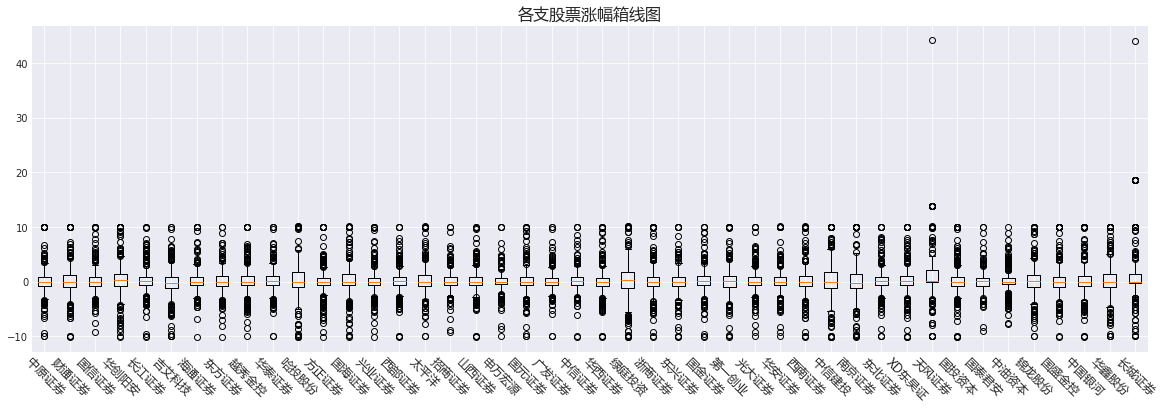

In [83]:
fig = plt.figure(figsize=[20, 6])
ax = fig.add_subplot(1, 1, 1)
ax.boxplot(df_p_change.T)
ax.set_title('各支股票涨幅箱线图', FontProperties=font, fontsize=16)
ax.set_xticklabels(total_volume.index, FontProperties=font, rotation=-45)
y_ticks = [i for i in range(-10, 20, 2)]
# ax.set_yticks(y_ticks)
plt.show()

### 各支股票累计涨幅折线图

In [84]:
total_p_change = df_p_change.sum()
# 将各支股票累计成交量按数量大小排序
total_p_change_sort_desc = total_p_change.sort_values(ascending=False)
total_p_change_sort_desc

长城证券     662.535220
天风证券     563.846055
中信建投     159.676990
绿庭投资     134.280082
华创阳安     129.648363
哈投股份     125.395858
华鑫股份     109.996985
太平洋      102.865321
中国银河      99.739994
国投资本      96.349966
国海证券      91.498611
海通证券      88.546579
XD东吴证     87.906378
中信证券      85.579672
华泰证券      84.667474
长江证券      83.314681
国信证券      83.089903
锦龙股份      76.545585
东北证券      74.608507
西南证券      74.341392
兴业证券      72.291215
国金证券      71.288785
西部证券      68.466724
国元证券      60.319581
东方证券      57.245859
国盛金控      55.408800
招商证券      54.572556
中原证券      51.051884
山西证券      50.350170
浙商证券      50.226894
华安证券      49.721275
越秀金控      49.603001
国泰君安      48.643738
申万宏源      39.214829
中油资本      38.023258
南京证券      37.810366
光大证券      34.004800
方正证券      33.660880
华西证券      33.328900
财通证券      30.197298
广发证券      25.734032
第一创业      21.054138
东兴证券      17.950506
吉艾科技     -56.381061
dtype: float64

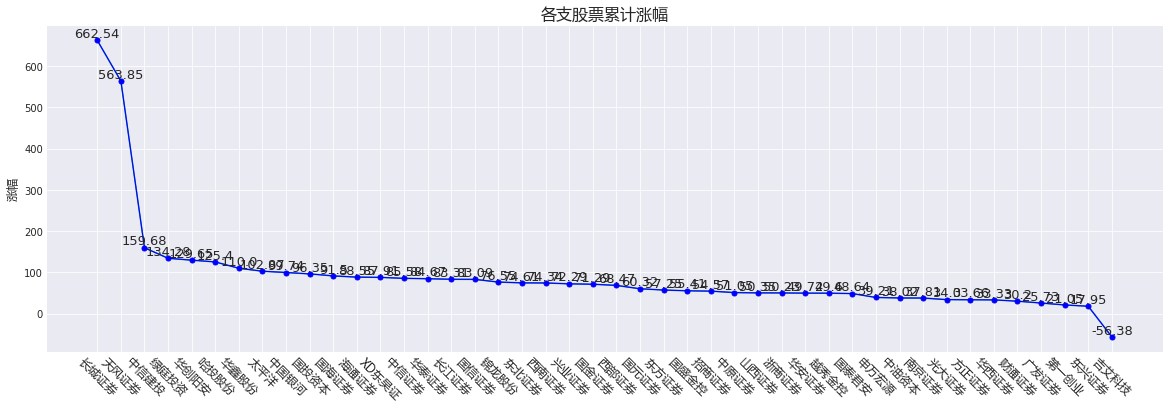

In [85]:
fig = plt.figure(figsize=[20, 6])
ax = fig.add_subplot(1, 1, 1)
ax.plot(total_p_change_sort_desc)
plt.plot(total_p_change_sort_desc,
         linewidth=1,
         color='b',
         marker='o',
         markerfacecolor='blue',
         markersize=5)
ax.set_title('各支股票累计涨幅', FontProperties=font, fontsize=16)
ax.set_xticklabels(total_p_change_sort_desc.index,
                   FontProperties=font,
                   rotation=-45)
ax.set_ylabel('涨幅', FontProperties=font)
# 设置数字标签
for a, b in zip(total_p_change_sort_desc.index,
                total_p_change_sort_desc.values):
    plt.text(a,
             b,
             np.around(b, decimals=2),
             ha='center',
             va='bottom',
             fontsize=13)
plt.show()

## 各支股票累计成交量和累计涨幅对比

### 各支股票累计成交量和累计涨幅柱状图

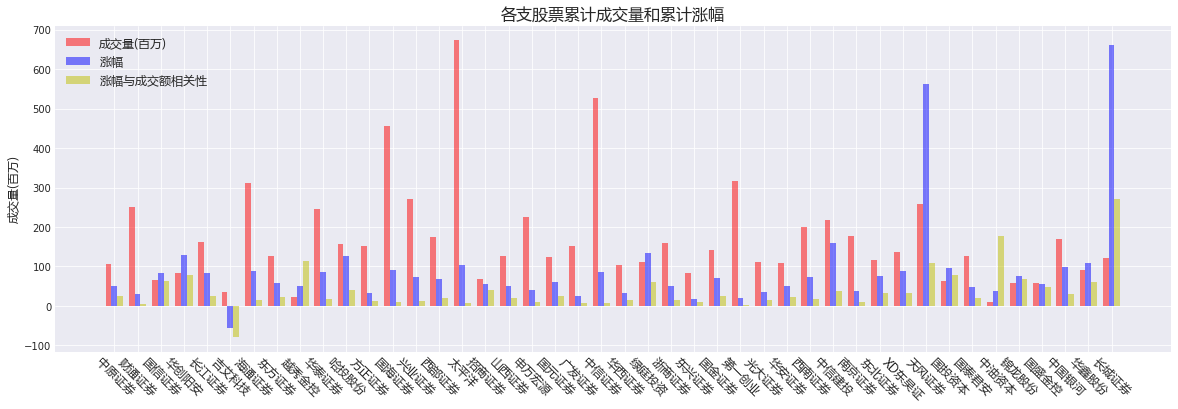

In [86]:
width = 0.25  # 条柱的宽度
ind = np.arange(len(total_p_change))  # 组的 x 坐标位置
b = ind + width  # 中间条柱的x坐标
c = b + width  # 第三个条柱的x坐标

plt.figure(figsize=[20, 6])
plt.bar(ind, total_volume, width, color='r', alpha=.5, label='成交量(百万)')
plt.bar(b, total_p_change, width, color='b', alpha=.5, label='涨幅')
plt.bar(c,
        total_p_change / total_volume * 50,
        width,
        color='y',
        alpha=.5,
        label='涨幅与成交额相关性')
labels = list(securties_datas.keys())  # x 坐标刻度标签
locations = ind + width  # x 坐标刻度位置
plt.xticks(locations, labels, FontProperties=font, rotation=-45)
plt.title('各支股票累计成交量和累计涨幅', FontProperties=font, fontsize=16)
plt.ylabel('成交量(百万)', FontProperties=font)
plt.legend(prop=font, loc='best')
plt.show()

用Pandas绘制上面柱状图会比较简单

In [87]:
df_totals = pd.DataFrame(
    [total_volume, total_p_change, total_p_change / total_volume * 50],
    index=['累计成交量(百万)', '累计涨幅', '涨幅与成交额相关性']).T

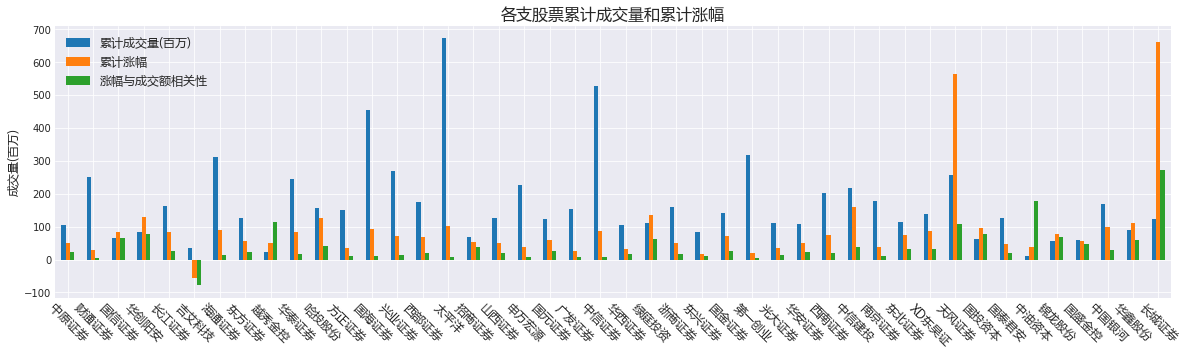

In [88]:
plot = df_totals.plot.bar(figsize=[20, 5])
plot.set_title('各支股票累计成交量和累计涨幅', FontProperties=font, fontsize=16)
plot.set_ylabel('成交量(百万)', FontProperties=font)
plot.set_xticklabels(df_totals.index, FontProperties=font, rotation=-45)
plot.legend(df_totals.columns, prop=font)
plt.show()

## 涨幅波动分析

### 月线

以月为单位，汇总数据

In [89]:
df_p_change_month = df_volume.resample('M').sum().to_period('M')
df_p_change_month

中原证券       财通证券       国信证券       华创阳安       长江证券      吉艾科技       海通证券       东方证券      越秀金控       华泰证券       哈投股份       方正证券       国海证券       兴业证券       西部证券         太平洋       招商证券       山西证券       申万宏源       国元证券       广发证券        中信证券       华西证券       绿庭投资       浙商证券       东兴证券       国金证券       第一创业       光大证券       华安证券       西南证券       中信建投       南京证券       东北证券      XD东吴证       天风证券       国投资本       国泰君安      中油资本      锦龙股份       国盛金控       中国银河       华鑫股份       长城证券
2018-07   3.415429   4.155905   1.128077   2.020712   4.392588  1.151435  11.803103   3.632294  1.003372  12.429573   2.042980   8.267892   5.334237  10.910923   8.101829   10.868781   2.610753   5.977525   4.559628   3.672607   5.890419   23.563477   6.779627   8.654512   6.459972   2.328728   5.104254  12.838440   2.590700   2.280737   4.022853  26.689459  29.365746   3.225351   2.776023   0.000000   2.025928   4.821668  0.329069  1.653346   0.702014   5.139186   3.097965   0.000000
2018-08   2.524442   2.412310   1.040911   1.011215   3.720577  0.789337  11.123413   2.612873  0.736651  12.529667   1.381983   3.972751   4.412991   5.793938  12.075278    7.539097   2.049621   4.773726   4.452210   2.946267   4.661481   18.040678   3.371273   2.493200   4.771670   3.025651   3.364161  10.671665   2.132543   1.792100   3.701967  11.878314  12.860392   2.454177   2.487422   0.000000   1.414134   4.328524  0.306801  1.421628   0.358649   4.032608   2.394903   0.000000
2018-09   2.196573   2.078613   0.970589   1.201165   3.316156  0.513954   9.137514   2.484711  0.639423  11.637450   1.267755   2.807416   3.609023   5.327543   9.853120    7.569485   1.800238   3.625686   4.775563   2.987116   2.777668   16.951883   2.563306   2.835505   6.186924   2.769893   3.252099   9.672867   3.357919   1.618239   2.775241   7.225980  13.067052   2.042164   1.717805   0.000000   1.140930   4.205509  0.244370  3.532819   0.443666   2.912790   2.317950   0.000000
2018-10  12.175399  13.335052   3.346020   3.025669  12.637610  1.645100  25.517009   6.666186  1.516555  21.223424  10.979246   6.873133  40.903147  26.918880  14.380274   46.270585   5.376393  10.010364  11.083729   9.381248  14.185755   40.766121   7.608179   7.600052  13.571034   5.305979   8.870960  23.842337   7.199186   9.333361  18.461974  16.325744  19.010663   6.937202   8.657647   1.074408   3.416967  10.407942  0.437502  6.076146   1.390993   7.308287   4.180247   0.361830
2018-11  12.656460  25.007289   5.765067   5.364889  15.825283  1.179413  22.706588   7.348835  1.927528  17.819733  20.278926   7.209893  68.311924  26.653264  14.624206   62.760310   4.859087  12.712422  12.612343  14.803345  11.440379   40.260025  10.486541  20.907684  21.023267   6.819819  13.387466  31.520919   7.343461  11.828418  19.809945  16.975463  18.157122   8.161019   9.815307  49.084153   5.632332   9.002936  0.564194  6.081143   3.434622   9.388404  10.174182  25.219723
2018-12   3.786194  10.741225   2.104009   3.993602   7.825910  0.805385  12.246898   6.233216  0.803080  14.314922  10.113128   3.455753  31.670580  11.244850   5.413315   33.445098   3.559993   5.597216   6.977046   6.744205   5.803041   24.316843   3.580878  11.696761  10.339261   3.243355   6.680012  24.799761   5.255374   3.661060   6.381408  13.957081   7.455897   3.598584   3.907227  24.585647   3.700262   6.226687  0.407280  2.422183   2.868245   4.503669   5.456099   7.105056
2019-01   8.454722  14.925638   3.094596   3.563609  10.048609  3.574691  15.159677   8.745814  1.629689  14.743169   9.518827  28.281174  64.053784  17.178217   6.468581   51.902410   3.676163   7.391888   9.401454   8.145569   9.812878   33.192301   5.162887   7.057296  11.527028   3.964719   7.768693  34.196287   6.781703   7.344092  15.977064  18.694804  10.402805   4.660467   5.766465  42.126123   3.871052   7.783155  0.482700  4.127599   2.710292   7.502319   4.525539  14.151027
2019-02  15.536518  42.888164   9.867189   6.021227  23.481534  4.873599  33.322986  24.180090

In [90]:
df_p_change_month.iplot()

df_p_change_month为`PeriodIndex`类型，Matplotlib绘图之前要先转换为`DatetimeIndex`，否则会报下面错误。

`ValueError: view limit minimum 0.0 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units`

PeriodDtype转Datetime，用`data.to_timestamp()`方法

In [91]:
df_p_change_month.index = df_p_change_month.index.to_timestamp()
df_p_change_month.index

DatetimeIndex(['2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01', '2019-01-01', '2019-02-01',
               '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01'],
              dtype='datetime64[ns]', freq='MS')

In [92]:
df_p_change_month.iplot(kind='histogram',
                        histnorm='probability density',
                        title='所有股票涨幅密度分布(月线)',
                        xTitle='波动百分比',
                        yTitle='Probability Density')

### 周线

以周为单位，汇总数据

In [93]:
df_p_change_week = df_volume.resample('W').sum().to_period('W')
df_p_change_week.index = df_p_change_week.index.to_timestamp()
df_p_change_week.head()

中原证券      财通证券      国信证券      华创阳安      长江证券      吉艾科技      海通证券      东方证券      越秀金控      华泰证券      哈投股份      方正证券      国海证券      兴业证券      西部证券       太平洋      招商证券      山西证券      申万宏源      国元证券      广发证券      中信证券      华西证券      绿庭投资      浙商证券      东兴证券      国金证券      第一创业      光大证券      华安证券      西南证券      中信建投      南京证券      东北证券     XD东吴证  天风证券      国投资本      国泰君安      中油资本      锦龙股份      国盛金控      中国银河      华鑫股份  长城证券
2018-06-25  0.110175  0.134061  0.036390  0.065184  0.141696  0.037143  0.380745  0.117171  0.032367  0.400954  0.065903  0.266706  0.172072  0.351965  0.261349  0.350606  0.084218  0.192823  0.147085  0.118471  0.190014  0.760112  0.218698  0.279178  0.208386  0.075120  0.164653  0.414143  0.083571  0.073572  0.129769  0.860950  0.947282  0.104044  0.089549   0.0  0.065353  0.155538  0.010615  0.053334  0.022646  0.165780  0.099934   0.0
2018-07-02  0.707716  0.851867  0.276144  0.594761  0.873722  0.461542  2.241933  0.805359  0.191820  2.886360  0.372864  2.399658  0.997680  1.693030  1.999635  2.250177  0.641025  1.410835  1.039369  0.826298  1.609572  5.233395  1.400806  2.089733  1.549737  0.546131  1.360307  3.145278  0.578748  0.469877  0.837449  6.775590  7.679136  0.643778  0.584036   0.0  0.435453  1.056087  0.065962  0.335561  0.200647  1.143682  0.769886   0.0
2018-07-09  0.734403  0.920855  0.220764  0.471823  0.914891  0.210519  2.474365  0.901797  0.235519  2.684645  0.539086  1.868485  1.187802  1.766215  1.906051  2.718416  0.526164  1.403870  0.926469  0.826722  1.278493  4.910296  1.663031  2.082499  1.344152  0.520577  1.116366  2.754303  0.576498  0.478250  0.830261  6.225914  7.594565  0.744843  0.643071   0.0  0.410199  1.020947  0.062860  0.371157  0.136759  1.133360  0.705802   0.0
2018-07-16  0.668942  0.737793  0.212452  0.330670  0.835303  0.228524  2.416948  0.724086  0.205769  2.562942  0.415861  1.573828  1.048366  1.601830  1.507843  1.853284  0.541618  1.074722  0.960342  0.691747  1.050835  5.236329  1.353645  1.797014  1.123323  0.475810  0.912872  2.472320  0.534604  0.450571  0.732844  5.102827  6.768673  0.694187  0.578269   0.0  0.375906  1.153774  0.059763  0.308315  0.143170  0.957034  0.608545   0.0
2018-07-23  1.002419  1.330424  0.319024  0.470524  1.383920  0.179478  3.752068  0.863620  0.236612  3.444123  0.521438  1.914996  1.667447  4.390573  2.060857  3.152062  0.682325  1.591544  1.251884  1.009132  1.569501  6.313040  1.913517  2.074789  1.897425  0.616708  1.345417  3.398543  0.707458  0.695882  1.250934  6.622760  5.586269  0.875644  0.747329   0.0  0.516852  1.215172  0.100559  0.486152  0.156100  1.528802  0.744053   0.0

In [94]:
df_p_change_week.iplot()

In [95]:
df_p_change_week.iplot(kind='histogram',
                        histnorm='probability density',
                        title='所有股票涨幅密度分布(周线)',
                        xTitle='波动百分比',
                        yTitle='Probability Density')

通过时间线可以发现，今年2,3, 4月份是股市上涨最快的时间

# 结论

- 累计成交量Top20

In [96]:
total_volume_top20 = list(total_volume_sort_desc.index)[:20]
total_volume_top20

['太平洋',
 '中信证券',
 '国海证券',
 '第一创业',
 '海通证券',
 '兴业证券',
 '天风证券',
 '财通证券',
 '华泰证券',
 '申万宏源',
 '中信建投',
 '西南证券',
 '南京证券',
 '西部证券',
 '中国银河',
 '长江证券',
 '浙商证券',
 '哈投股份',
 '广发证券',
 '方正证券']

- 累计涨幅Top20

In [97]:
total_p_change_top20 = list(total_p_change_sort_desc.index)[:20]
total_p_change_top20

['长城证券',
 '天风证券',
 '中信建投',
 '绿庭投资',
 '华创阳安',
 '哈投股份',
 '华鑫股份',
 '太平洋',
 '中国银河',
 '国投资本',
 '国海证券',
 '海通证券',
 'XD东吴证',
 '中信证券',
 '华泰证券',
 '长江证券',
 '国信证券',
 '锦龙股份',
 '东北证券',
 '西南证券']

- 取累计成交量和累计涨幅Top20的交集

In [98]:
golden_share = list(set(total_volume_top20).intersection(set(total_p_change_top20)))
golden_share

['太平洋',
 '中国银河',
 '华泰证券',
 '海通证券',
 '哈投股份',
 '天风证券',
 '国海证券',
 '中信证券',
 '长江证券',
 '中信建投',
 '西南证券']

从上面取到的“黄金股”是涨幅以及成交量都不错的。  

下面具体看下他们涨幅是否稳定

In [99]:
df_p_change_month[golden_share].iplot(kind='histogram',
                        histnorm='probability density',
                        title='“黄金股”涨幅密度分布(月线)',
                        xTitle='波动百分比',
                        yTitle='Probability Density')

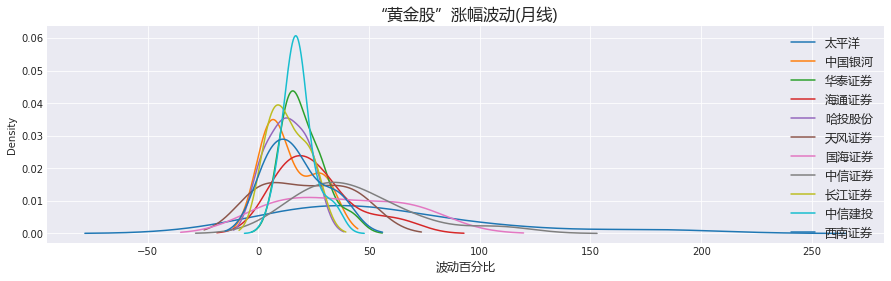

In [100]:
plot = df_p_change_month[golden_share].plot(
    kind='kde', figsize=[15, 4])  # xticks=np.linspace(-100, 100, 10)
plot.set_title('“黄金股”涨幅波动(月线)', FontProperties=font, fontsize=16)
plot.legend(golden_share, prop=font)
plot.set_xlabel('波动百分比', FontProperties=font)
plt.show()

- 哈投股份: [0, 30]
- 华泰证券: [0, 50]
- 长江证券: [0, 30]
- 国海证券: [0, 100]
- 太平洋: [0, 200]
- 中信建投: [0, 35]
- 天风证券: [0, 50]
- 中国银河: [0, 40]
- 西南证券: [0, 40]
- 海通证券: [0, 80]
- 中信证券: [0, 120]

通过观察上面这些股票的密度曲线，发现这些股票**太平洋分布范围最不稳定，中信证券次之，国海证券也不够稳定**。  

比较稳定的是**哈投股份，长江证券，中信建投**。

In [101]:
df_p_change_week[golden_share].iplot(kind='histogram',
                        histnorm='probability density',
                        title='“黄金股”涨幅密度分布(周线)',
                        xTitle='波动百分比',
                        yTitle='Probability Density')

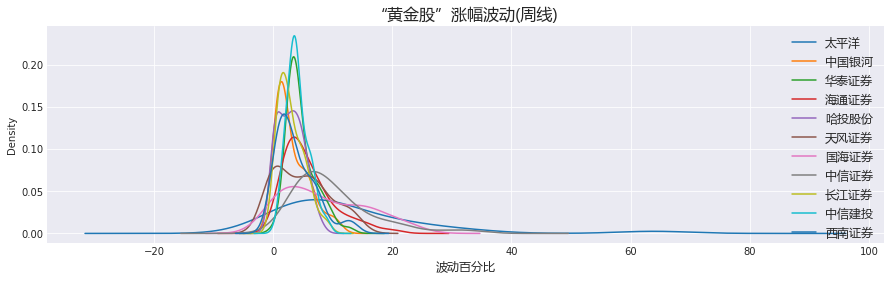

In [102]:
plot = df_p_change_week[golden_share].plot(
    kind='kde',
    figsize=[15, 4],
    #                      xticks=np.linspace(-20, 30, 10)
)
plot.set_title('“黄金股”涨幅波动(周线)', FontProperties=font, fontsize=16)
plot.legend(golden_share, prop=font)
plot.set_xlabel('波动百分比', FontProperties=font)
plt.show()

周线和月线分布趋势类似

- 通过箱线图整体观察一下这些“黄金股”的数据分布

In [103]:
df_p_change[golden_share].iplot(kind='box')

比较稳定的哈投股份，长江证券，中信建投三支股里面，哈投证券和中信证券箱体都比长江证券的长，说明长江证券是最稳的，其他两支次之。

<span style="font-size:27px;cursor: auto;text-align:center;"><a href="#top">**Back to Top**</a></span>

<a href="https://hufe09.github.io"><button>Hufe Blog</button></a>